In [4]:
import numpy as np
import xgboost as xgb
import pandas as pd
from IPython.display import display #方便对数据进行可视化
from sklearn.model_selection import train_test_split

In [2]:
# 导入训练数据
train_data = pd.read_csv(
    "train.csv", 
    low_memory=False)

store_features = pd.read_csv("store.csv")
# 导入测试数据
test_data = pd.read_csv("test.csv")

# 显示头5条记录

display(train_data.head(n=5))
display(store_features.head(n=5))
display(test_data.head(n=5))

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   
2      3         a          a              14130.0                       12.0   
3      4         c          c                620.0                        9.0   
4      5         a          a              29910.0                        4.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   
2                    2006.0       1             14.0           2011.0   
3                    2009.0       0              NaN              NaN   
4                    2015.0       0              NaN              NaN   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct  
2  Jan,Apr,Jul,Oct  
3              NaN  
4              NaN

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0

In [3]:
#融合
train_data = pd.merge(train_data, store_features, on = 'Store')
test_data = pd.merge(test_data, store_features, on = 'Store')
#显示头5条记录
display(train_data.head(n=5))
display(test_data.head(n=5))

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      1          4  2015-07-30   5020        546     1      1            0   
2      1          3  2015-07-29   4782        523     1      1            0   
3      1          2  2015-07-28   5011        560     1      1            0   
4      1          1  2015-07-27   6102        612     1      1            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              1         c          a               1270.0   
1              1         c          a               1270.0   
2              1         c          a               1270.0   
3              1         c          a               1270.0   
4              1         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  \
0     1      1          4  2015-09-17   1.0      1            0   
1   857      1          3  2015-09-16   1.0      1            0   
2  1713      1          2  2015-09-15   1.0      1            0   
3  2569      1          1  2015-09-14   1.0      1            0   
4  3425      1          7  2015-09-13   0.0      0            0   

   SchoolHoliday StoreType Assortment  CompetitionDistance  \
0              0         c          a               1270.0   
1              0         c          a               1270.0   
2              0         c          a               1270.0   
3              0         c          a               1270.0   
4              0         c          a               1270.0   

   CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                        9.0                    2008.0       0   
1                        9.0                    2008.0       0   
2                        9.0                    2008.0       0   
3                        9.0                    2008.0       0   
4                        9.0                    2008.0       0   

   Promo2SinceWeek  Promo2SinceYear PromoInterval  
0              NaN              NaN           NaN  
1              NaN              NaN           NaN  
2              NaN              NaN           NaN  
3              NaN              NaN           NaN  
4              NaN              NaN           NaN

In [4]:
train_data = train_data.drop('Customers', axis = 1)
sales = train_data['Sales']
features = train_data.drop('Sales', axis = 1)

display(sales.head(n=1))
display(features.head(n=1))

0    5263
Name: Sales, dtype: int64

Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday  \
0      1          5  2015-07-31     1      1            0              1   

  StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0         c          a               1270.0                        9.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   

  PromoInterval  
0           NaN

In [5]:
# 对字符串特征进行独热编码
category = ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']


#首先将训练集和测试集合并，然后统一独热编码，然后再拆分为训练集和测试集
features_test = test_data.drop('Id', axis = 1)
data_merge = pd.concat([features, features_test], ignore_index = True)
data_merge_pd = pd.get_dummies(data_merge, columns = category)

# 需要把NA/NAN的数据转化成0
data_merge_pd.fillna(0, inplace = True)


#将字符串转化为时间戳数值
data_merge_pd['Date'] = pd.to_datetime(data_merge_pd['Date'])


#然后再把时间戳数值转化为浮点值

data_merge_pd['Date'] = pd.to_numeric(data_merge_pd['Date'], downcast = 'float')


start_date = min(data_merge_pd['Date'])
end_date = max(data_merge_pd['Date'])
data_merge_pd['Date'] = (data_merge_pd['Date'] - start_date)/(end_date - start_date)

#看一下转化后的结果
pd.options.display.max_columns = 100
display(data_merge_pd.head(n=5))





Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
0      1          5  0.951466   1.0      1              1   
1      1          4  0.950454   1.0      1              1   
2      1          3  0.949443   1.0      1              1   
3      1          2  0.948432   1.0      1              1   
4      1          1  0.947421   1.0      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1               1270.0                        9.0                    2008.0   
2               1270.0                        9.0                    2008.0   
3               1270.0                        9.0                    2008.0   
4               1270.0                        9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  StoreType_a  StoreType_b  \
0       0              0.0              0.0            0            0   
1       0              0.0              0.0            0            0   
2       0              0.0              0.0            0            0   
3       0              0.0              0.0            0            0   
4       0              0.0              0.0            0            0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0            1            0             1             0             0   
1            1            0             1             0             0   
2            1            0             1             0             0   
3            1            0             1             0             0   
4            1            0             1             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  StateHoliday_0  StateHoliday_a  \
0                               0               1               0   
1                               0               1               0   
2                               0               1               0   
3                               0               1               0   
4                               0               1               0   

   StateHoliday_b  StateHoliday_c  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0

In [6]:
#拆分
print(features.shape)
print(features_test.shape)
features_pd = data_merge_pd[0:features.shape[0]]
features_test_pd = data_merge_pd[features.shape[0]:data_merge_pd.shape[0]]
print(features_pd.shape)
print(features_test_pd.shape)

display(features_pd.head(n=5))
display(features_test_pd.head(n=5))

(1017209, 16)
(41088, 16)
(1017209, 26)
(41088, 26)


Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
0      1          5  0.951466   1.0      1              1   
1      1          4  0.950454   1.0      1              1   
2      1          3  0.949443   1.0      1              1   
3      1          2  0.948432   1.0      1              1   
4      1          1  0.947421   1.0      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1               1270.0                        9.0                    2008.0   
2               1270.0                        9.0                    2008.0   
3               1270.0                        9.0                    2008.0   
4               1270.0                        9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  StoreType_a  StoreType_b  \
0       0              0.0              0.0            0            0   
1       0              0.0              0.0            0            0   
2       0              0.0              0.0            0            0   
3       0              0.0              0.0            0            0   
4       0              0.0              0.0            0            0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0            1            0             1             0             0   
1            1            0             1             0             0   
2            1            0             1             0             0   
3            1            0             1             0             0   
4            1            0             1             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  StateHoliday_0  StateHoliday_a  \
0                               0               1               0   
1                               0               1               0   
2                               0               1               0   
3                               0               1               0   
4                               0               1               0   

   StateHoliday_b  StateHoliday_c  
0               0               0  
1               0               0  
2               0               0  
3               0               0  
4               0               0

Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
1017209      1          4  1.000000   1.0      1              0   
1017210      1          3  0.998988   1.0      1              0   
1017211      1          2  0.997977   1.0      1              0   
1017212      1          1  0.996967   1.0      1              0   
1017213      1          7  0.995955   0.0      0              0   

         CompetitionDistance  CompetitionOpenSinceMonth  \
1017209               1270.0                        9.0   
1017210               1270.0                        9.0   
1017211               1270.0                        9.0   
1017212               1270.0                        9.0   
1017213               1270.0                        9.0   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
1017209                    2008.0       0              0.0              0.0   
1017210                    2008.0       0              0.0              0.0   
1017211                    2008.0       0              0.0              0.0   
1017212                    2008.0       0              0.0              0.0   
1017213                    2008.0       0              0.0              0.0   

         StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
1017209            0            0            1            0             1   
1017210            0            0            1            0             1   
1017211            0            0            1            0             1   
1017212            0            0            1            0             1   
1017213            0            0            1            0             1   

         Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
1017209             0             0                              0   
1017210             0             0                              0   
1017211             0             0                              0   
1017212             0             0                              0   
1017213             0             0                              0   

         PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
1017209                              0                               0   
1017210                              0                               0   
1017211                              0                               0   
1017212                              0                               0   
1017213                              0                               0   

         StateHoliday_0  StateHoliday_a  StateHoliday_b  StateHoliday_c  
1017209               1               0               0               0  
1017210               1               0               0               0  
1017211               1               0               0               0  
1017212               1               0               0               0  
1017213               1               0               0               0

In [7]:
from sklearn.model_selection import train_test_split

#下面将sales做log处理

sales_log = np.log(train_data['Sales'] + 1) #+1是为了避免log（0）的情况同时使得数据从0开始

sales_log.plot.hist()


X_train, X_val, y_train, y_val = train_test_split(
    features_pd, sales_log, test_size = 0.2, random_state = 1)

display(X_train.head(n=5))
display(y_train.head(n=5))

Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
903560    991          2  0.339737   1.0      1              0   
509452    559          5  0.385238   1.0      0              0   
570376    626          5  0.739130   1.0      0              1   
264963    292          5  0.165823   1.0      0              0   
961639   1055          2  0.898887   1.0      0              0   

        CompetitionDistance  CompetitionOpenSinceMonth  \
903560               1010.0                        0.0   
509452               3910.0                       11.0   
570376              10740.0                       11.0   
264963               1100.0                        6.0   
961639               1980.0                        4.0   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
903560                       0.0       0              0.0              0.0   
509452                    2006.0       1              5.0           2013.0   
570376                    2013.0       0              0.0              0.0   
264963                    2009.0       0              0.0              0.0   
961639                    2009.0       0              0.0              0.0   

        StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
903560            1            0            0            0             1   
509452            0            0            0            1             1   
570376            0            0            1            0             0   
264963            1            0            0            0             1   
961639            0            0            1            0             1   

        Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
903560             0             0                              0   
509452             0             0                              1   
570376             0             1                              0   
264963             0             0                              0   
961639             0             0                              0   

        PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
903560                              0                               0   
509452                              0                               0   
570376                              0                               0   
264963                              0                               0   
961639                              0                               0   

        StateHoliday_0  StateHoliday_a  StateHoliday_b  StateHoliday_c  
903560               1               0               0               0  
509452               1               0               0               0  
570376               1               0               0               0  
264963               1               0               0               0  
961639               1               0               0               0

903560    8.860783
509452    8.515392
570376    9.162620
264963    8.570734
961639    8.736971
Name: Sales, dtype: float64

In [8]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dval = xgb.DMatrix(X_val, label = y_val)

至此，数据的特征工程算是处理完了，下面用网格搜索两两确定最佳参数。

In [17]:
def rmspe(y, y_hat):
    #由于sales取了对数，这里要还原
    y = np.exp(y) - 1
    y_hat = np.exp(y_hat) - 1
    
    #由于有yi=0的情况，直接计算会得出无穷大的结果，所以需要处理一下
    #定义一个y_rev来表示y的倒数，y为0时y_rev也赋值为0（因为在项目中提到“ Any day and store with 0 sales is ignored in scoring.“）
    y_rev = np.zeros(y.shape, dtype = float)
    n_zero = y != 0
    y_rev[n_zero] = 1./y[n_zero]

    rmspe = np.sqrt(np.mean(((y - y_hat)*y_rev)**2))
    return rmspe


#自定义一个评价函数

def rmspe_feval(y_hat, dy):
    y = dy.get_label()
    rmspe_score = rmspe(y, y_hat)
    return 'rmspe', rmspe_score



param_test1 = {
    'n_estimators': [50, 100, 150, 200, 250, 300], 
    'learning_rate': [0.1, 0.2, 0.3]
}

param_test2 = {
    'max_depth': [3, 5, 10], 
    'min_child_weight': list(range(1,6,2))
}

param_test3 = {
    'sub_sample':[0.5, 0.6, 0.8],
    'colsample_bytree':[0.5, 0.6, 0.8]
}


In [10]:
from sklearn.model_selection import GridSearchCV as gscv

gs1 = gscv(
    estimator = xgb.XGBRegressor(
        learning_rate = 0.1,
        n_estimators = 100,
        max_depth = 5,
        min_child_weight = 1,
        sub_sample = 0.8,
        colsample_bytree = 0.8,
        objective = 'reg:linear',
    ), 
    param_grid = param_test1,
    cv = 5
)

gs2 = gscv(
    estimator = xgb.XGBRegressor(
        learning_rate = 0.1,
        n_estimators = 100,
        max_depth = 5,
        min_child_weight = 1,
        sub_sample = 0.8,
        colsample_bytree = 0.8,
        objective = 'reg:linear',
    ), 
    param_grid = param_test2,
    cv = 5
)

gs3 = gscv(
    estimator = xgb.XGBRegressor(
        learning_rate = 0.1,
        n_estimators = 100,
        max_depth = 5,
        min_child_weight = 1,
        sub_sample = 0.8,
        colsample_bytree = 0.8,
        objective = 'reg:linear',
    ), 
    param_grid = param_test3,
    cv = 5
)



In [11]:
gs1.fit(X_train, y_train)
print(gs1.grid_scores_, gs1.best_params_, gs1.best_score_)

[mean: 0.99090, std: 0.00005, params: {'learning_rate': 0.1, 'n_estimators': 50}, mean: 0.99270, std: 0.00006, params: {'learning_rate': 0.1, 'n_estimators': 100}, mean: 0.99393, std: 0.00009, params: {'learning_rate': 0.1, 'n_estimators': 150}, mean: 0.99482, std: 0.00007, params: {'learning_rate': 0.1, 'n_estimators': 200}, mean: 0.99548, std: 0.00009, params: {'learning_rate': 0.1, 'n_estimators': 250}, mean: 0.99594, std: 0.00008, params: {'learning_rate': 0.1, 'n_estimators': 300}, mean: 0.99286, std: 0.00009, params: {'learning_rate': 0.2, 'n_estimators': 50}, mean: 0.99492, std: 0.00014, params: {'learning_rate': 0.2, 'n_estimators': 100}, mean: 0.99607, std: 0.00010, params: {'learning_rate': 0.2, 'n_estimators': 150}, mean: 0.99665, std: 0.00007, params: {'learning_rate': 0.2, 'n_estimators': 200}, mean: 0.99706, std: 0.00005, params: {'learning_rate': 0.2, 'n_estimators': 250}, mean: 0.99737, std: 0.00006, params: {'learning_rate': 0.2, 'n_estimators': 300}, mean: 0.99433, st

/Users/liushengxi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [12]:
gs2.fit(X_train, y_train)
print(gs2.grid_scores_, gs2.best_params_, gs2.best_score_)

[mean: 0.99065, std: 0.00006, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.99065, std: 0.00007, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.99063, std: 0.00008, params: {'max_depth': 3, 'min_child_weight': 5}, mean: 0.99270, std: 0.00006, params: {'max_depth': 5, 'min_child_weight': 1}, mean: 0.99263, std: 0.00006, params: {'max_depth': 5, 'min_child_weight': 3}, mean: 0.99270, std: 0.00007, params: {'max_depth': 5, 'min_child_weight': 5}, mean: 0.99731, std: 0.00010, params: {'max_depth': 10, 'min_child_weight': 1}, mean: 0.99734, std: 0.00008, params: {'max_depth': 10, 'min_child_weight': 3}, mean: 0.99736, std: 0.00007, params: {'max_depth': 10, 'min_child_weight': 5}] {'max_depth': 10, 'min_child_weight': 5} 0.9973553561395878


/Users/liushengxi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [13]:
gs3.fit(X_train, y_train)
print(gs3.grid_scores_, gs3.best_params_, gs3.best_score_)

[mean: 0.99189, std: 0.00010, params: {'colsample_bytree': 0.5, 'sub_sample': 0.5}, mean: 0.99189, std: 0.00010, params: {'colsample_bytree': 0.5, 'sub_sample': 0.6}, mean: 0.99189, std: 0.00010, params: {'colsample_bytree': 0.5, 'sub_sample': 0.8}, mean: 0.99220, std: 0.00008, params: {'colsample_bytree': 0.6, 'sub_sample': 0.5}, mean: 0.99220, std: 0.00008, params: {'colsample_bytree': 0.6, 'sub_sample': 0.6}, mean: 0.99220, std: 0.00008, params: {'colsample_bytree': 0.6, 'sub_sample': 0.8}, mean: 0.99270, std: 0.00006, params: {'colsample_bytree': 0.8, 'sub_sample': 0.5}, mean: 0.99270, std: 0.00006, params: {'colsample_bytree': 0.8, 'sub_sample': 0.6}, mean: 0.99270, std: 0.00006, params: {'colsample_bytree': 0.8, 'sub_sample': 0.8}] {'colsample_bytree': 0.8, 'sub_sample': 0.5} 0.9927044030339216


/Users/liushengxi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


然后用上面得到的最佳参数进行训练，并且增加几个参数，主要参考了这篇文章：

https://blog.csdn.net/u010414589/article/details/51153310

In [18]:

#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.8, 'subsample':0.5}

#设定迭代次数

num_round = 300


#定义训练函数
def train(param, dtrain, dval, num_round, feval_c):
    train_time = time.clock()

    model = xgb.train(
        param, dtrain, num_round, feval = feval_c, 
        evals = [(dtrain, 'train'), (dval, 'val')], early_stopping_rounds = 100, 
        verbose_eval = True
    )

    train_time = time.clock() - train_time

    print('The training time of the model is: {:.0f}s'.format(train_time))
    
    return model

#定义一个打分函数
def score(bst, dval):
    y_pred = bst.predict(dval)
#print(y_pred)
    y_val = dval.get_label()
    score = rmspe(y_val, y_pred)
#print(score)
    print('The rmspe of the model on validation data set is {:.6f}'.format(score))
    pass


#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)

[0]	train-rmse:5.28013	val-rmse:5.28232	train-rmspe:0.90811	val-rmspe:0.908524
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70334	val-rmse:3.70487	train-rmspe:0.89413	val-rmspe:0.894533
[2]	train-rmse:2.60737	val-rmse:2.60864	train-rmspe:0.854723	val-rmspe:0.855102
[3]	train-rmse:1.83735	val-rmse:1.83822	train-rmspe:0.780661	val-rmspe:0.780937
[4]	train-rmse:1.30293	val-rmse:1.30349	train-rmspe:0.678101	val-rmspe:0.678057
[5]	train-rmse:0.934022	val-rmse:0.934175	train-rmspe:0.564626	val-rmspe:0.563827
[6]	train-rmse:0.682274	val-rmse:0.682136	train-rmspe:0.459665	val-rmspe:0.457469
[7]	train-rmse:0.514991	val-rmse:0.514731	train-rmspe:0.375738	val-rmspe:0.372696
[8]	train-rmse:0.407012	val-rmse:0.406564	train-rmspe:0.320058	val-rmspe:0.314866
[9]	train-rmse:0.340451	val-rmse:0.339823	train-rmspe:0.287613	val-rmspe:0.280844
[10]	train-rmse:0.297402	val-rmse:0.296689	train

[98]	train-rmse:0.114048	val-rmse:0.12006	train-rmspe:0.145078	val-rmspe:0.127172
[99]	train-rmse:0.113471	val-rmse:0.11951	train-rmspe:0.144512	val-rmspe:0.126583
[100]	train-rmse:0.113122	val-rmse:0.119204	train-rmspe:0.144113	val-rmspe:0.126271
[101]	train-rmse:0.112593	val-rmse:0.118908	train-rmspe:0.143698	val-rmspe:0.125945
[102]	train-rmse:0.112274	val-rmse:0.118712	train-rmspe:0.143731	val-rmspe:0.125882
[103]	train-rmse:0.112033	val-rmse:0.118566	train-rmspe:0.143611	val-rmspe:0.125826
[104]	train-rmse:0.111693	val-rmse:0.118395	train-rmspe:0.143115	val-rmspe:0.125533
[105]	train-rmse:0.111434	val-rmse:0.118599	train-rmspe:0.143041	val-rmspe:0.12552
[106]	train-rmse:0.111272	val-rmse:0.1185	train-rmspe:0.141769	val-rmspe:0.125417
[107]	train-rmse:0.111024	val-rmse:0.118282	train-rmspe:0.141559	val-rmspe:0.125164
[108]	train-rmse:0.110843	val-rmse:0.118138	train-rmspe:0.141354	val-rmspe:0.125029
[109]	train-rmse:0.110673	val-rmse:0.118049	train-rmspe:0.141243	val-rmspe:0.124956

[197]	train-rmse:0.094566	val-rmse:0.110298	train-rmspe:0.11721	val-rmspe:0.115577
[198]	train-rmse:0.094368	val-rmse:0.11033	train-rmspe:0.117182	val-rmspe:0.11552
[199]	train-rmse:0.094254	val-rmse:0.110242	train-rmspe:0.117339	val-rmspe:0.115438
[200]	train-rmse:0.094171	val-rmse:0.110232	train-rmspe:0.117252	val-rmspe:0.115382
[201]	train-rmse:0.094141	val-rmse:0.110208	train-rmspe:0.117208	val-rmspe:0.115365
[202]	train-rmse:0.093939	val-rmse:0.110238	train-rmspe:0.116937	val-rmspe:0.115357
[203]	train-rmse:0.093846	val-rmse:0.1102	train-rmspe:0.116915	val-rmspe:0.11528
[204]	train-rmse:0.093625	val-rmse:0.110239	train-rmspe:0.116818	val-rmspe:0.115226
[205]	train-rmse:0.093537	val-rmse:0.110152	train-rmspe:0.116741	val-rmspe:0.115157
[206]	train-rmse:0.093387	val-rmse:0.110064	train-rmspe:0.116656	val-rmspe:0.115146
[207]	train-rmse:0.093292	val-rmse:0.110114	train-rmspe:0.116518	val-rmspe:0.115146
[208]	train-rmse:0.093201	val-rmse:0.110045	train-rmspe:0.116263	val-rmspe:0.11507

[296]	train-rmse:0.085649	val-rmse:0.108768	train-rmspe:0.099512	val-rmspe:0.113398
[297]	train-rmse:0.085538	val-rmse:0.108926	train-rmspe:0.099475	val-rmspe:0.113389
[298]	train-rmse:0.085532	val-rmse:0.108921	train-rmspe:0.09947	val-rmspe:0.113384
[299]	train-rmse:0.08543	val-rmse:0.108918	train-rmspe:0.099375	val-rmspe:0.113415
The training time of the model is: 544s
The rmspe of the model on validation data set is 0.113415


尝试在测试集上跑

In [20]:
dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit.csv', index = False)

得分为0.30762，比之前都要好，有进步，在此基础上继续调整。

因为此前网格搜索中最佳参数n_estimator顶格到了300，这里把num_round调大，看是否有提升。

In [21]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.8, 'subsample':0.5}

#设定迭代次数

num_round = 500
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-1.csv', index = False)

[0]	train-rmse:5.28013	val-rmse:5.28232	train-rmspe:0.90811	val-rmspe:0.908524
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70334	val-rmse:3.70487	train-rmspe:0.89413	val-rmspe:0.894533
[2]	train-rmse:2.60737	val-rmse:2.60864	train-rmspe:0.854723	val-rmspe:0.855102
[3]	train-rmse:1.83735	val-rmse:1.83822	train-rmspe:0.780661	val-rmspe:0.780937
[4]	train-rmse:1.30293	val-rmse:1.30349	train-rmspe:0.678101	val-rmspe:0.678057
[5]	train-rmse:0.934022	val-rmse:0.934175	train-rmspe:0.564626	val-rmspe:0.563827
[6]	train-rmse:0.682274	val-rmse:0.682136	train-rmspe:0.459665	val-rmspe:0.457469
[7]	train-rmse:0.514991	val-rmse:0.514731	train-rmspe:0.375738	val-rmspe:0.372696
[8]	train-rmse:0.407012	val-rmse:0.406564	train-rmspe:0.320058	val-rmspe:0.314866
[9]	train-rmse:0.340451	val-rmse:0.339823	train-rmspe:0.287613	val-rmspe:0.280844
[10]	train-rmse:0.297402	val-rmse:0.296689	train

[98]	train-rmse:0.114048	val-rmse:0.12006	train-rmspe:0.145078	val-rmspe:0.127172
[99]	train-rmse:0.113471	val-rmse:0.11951	train-rmspe:0.144512	val-rmspe:0.126583
[100]	train-rmse:0.113122	val-rmse:0.119204	train-rmspe:0.144113	val-rmspe:0.126271
[101]	train-rmse:0.112593	val-rmse:0.118908	train-rmspe:0.143698	val-rmspe:0.125945
[102]	train-rmse:0.112274	val-rmse:0.118712	train-rmspe:0.143731	val-rmspe:0.125882
[103]	train-rmse:0.112033	val-rmse:0.118566	train-rmspe:0.143611	val-rmspe:0.125826
[104]	train-rmse:0.111693	val-rmse:0.118395	train-rmspe:0.143115	val-rmspe:0.125533
[105]	train-rmse:0.111434	val-rmse:0.118599	train-rmspe:0.143041	val-rmspe:0.12552
[106]	train-rmse:0.111272	val-rmse:0.1185	train-rmspe:0.141769	val-rmspe:0.125417
[107]	train-rmse:0.111024	val-rmse:0.118282	train-rmspe:0.141559	val-rmspe:0.125164
[108]	train-rmse:0.110843	val-rmse:0.118138	train-rmspe:0.141354	val-rmspe:0.125029
[109]	train-rmse:0.110673	val-rmse:0.118049	train-rmspe:0.141243	val-rmspe:0.124956

[197]	train-rmse:0.094566	val-rmse:0.110298	train-rmspe:0.11721	val-rmspe:0.115577
[198]	train-rmse:0.094368	val-rmse:0.11033	train-rmspe:0.117182	val-rmspe:0.11552
[199]	train-rmse:0.094254	val-rmse:0.110242	train-rmspe:0.117339	val-rmspe:0.115438
[200]	train-rmse:0.094171	val-rmse:0.110232	train-rmspe:0.117252	val-rmspe:0.115382
[201]	train-rmse:0.094141	val-rmse:0.110208	train-rmspe:0.117208	val-rmspe:0.115365
[202]	train-rmse:0.093939	val-rmse:0.110238	train-rmspe:0.116937	val-rmspe:0.115357
[203]	train-rmse:0.093846	val-rmse:0.1102	train-rmspe:0.116915	val-rmspe:0.11528
[204]	train-rmse:0.093625	val-rmse:0.110239	train-rmspe:0.116818	val-rmspe:0.115226
[205]	train-rmse:0.093537	val-rmse:0.110152	train-rmspe:0.116741	val-rmspe:0.115157
[206]	train-rmse:0.093387	val-rmse:0.110064	train-rmspe:0.116656	val-rmspe:0.115146
[207]	train-rmse:0.093292	val-rmse:0.110114	train-rmspe:0.116518	val-rmspe:0.115146
[208]	train-rmse:0.093201	val-rmse:0.110045	train-rmspe:0.116263	val-rmspe:0.11507

[296]	train-rmse:0.085649	val-rmse:0.108768	train-rmspe:0.099512	val-rmspe:0.113398
[297]	train-rmse:0.085538	val-rmse:0.108926	train-rmspe:0.099475	val-rmspe:0.113389
[298]	train-rmse:0.085532	val-rmse:0.108921	train-rmspe:0.09947	val-rmspe:0.113384
[299]	train-rmse:0.08543	val-rmse:0.108918	train-rmspe:0.099375	val-rmspe:0.113415
[300]	train-rmse:0.085383	val-rmse:0.10884	train-rmspe:0.099317	val-rmspe:0.11338
[301]	train-rmse:0.085279	val-rmse:0.10879	train-rmspe:0.100257	val-rmspe:0.113367
[302]	train-rmse:0.085162	val-rmse:0.108734	train-rmspe:0.100155	val-rmspe:0.113335
[303]	train-rmse:0.085088	val-rmse:0.108747	train-rmspe:0.100112	val-rmspe:0.113318
[304]	train-rmse:0.085005	val-rmse:0.108817	train-rmspe:0.100094	val-rmspe:0.113352
[305]	train-rmse:0.084921	val-rmse:0.108859	train-rmspe:0.100029	val-rmspe:0.113384
[306]	train-rmse:0.084893	val-rmse:0.10883	train-rmspe:0.100019	val-rmspe:0.11337
[307]	train-rmse:0.084852	val-rmse:0.108787	train-rmspe:0.099531	val-rmspe:0.113309

[395]	train-rmse:0.079774	val-rmse:0.108712	train-rmspe:0.082265	val-rmspe:0.112247
[396]	train-rmse:0.079692	val-rmse:0.108732	train-rmspe:0.082244	val-rmspe:0.112261
[397]	train-rmse:0.079643	val-rmse:0.108766	train-rmspe:0.082181	val-rmspe:0.112274
[398]	train-rmse:0.079621	val-rmse:0.108751	train-rmspe:0.082157	val-rmspe:0.112253
[399]	train-rmse:0.079557	val-rmse:0.108721	train-rmspe:0.082106	val-rmspe:0.112223
[400]	train-rmse:0.079456	val-rmse:0.108721	train-rmspe:0.082076	val-rmspe:0.112223
[401]	train-rmse:0.079405	val-rmse:0.108637	train-rmspe:0.082642	val-rmspe:0.112308
[402]	train-rmse:0.079375	val-rmse:0.108603	train-rmspe:0.08245	val-rmspe:0.1123
[403]	train-rmse:0.07937	val-rmse:0.108602	train-rmspe:0.082444	val-rmspe:0.112289
[404]	train-rmse:0.079303	val-rmse:0.108609	train-rmspe:0.083064	val-rmspe:0.11228
[405]	train-rmse:0.079236	val-rmse:0.108567	train-rmspe:0.083029	val-rmspe:0.112275
[406]	train-rmse:0.079191	val-rmse:0.108562	train-rmspe:0.082999	val-rmspe:0.1122

[493]	train-rmse:0.075008	val-rmse:0.108597	train-rmspe:0.077058	val-rmspe:0.111801
[494]	train-rmse:0.074969	val-rmse:0.108603	train-rmspe:0.077032	val-rmspe:0.111803
[495]	train-rmse:0.074953	val-rmse:0.108591	train-rmspe:0.077015	val-rmspe:0.111791
[496]	train-rmse:0.074914	val-rmse:0.108599	train-rmspe:0.076998	val-rmspe:0.111802
[497]	train-rmse:0.074853	val-rmse:0.108602	train-rmspe:0.077603	val-rmspe:0.111798
[498]	train-rmse:0.07484	val-rmse:0.108601	train-rmspe:0.077579	val-rmspe:0.111803
[499]	train-rmse:0.074801	val-rmse:0.108567	train-rmspe:0.077559	val-rmspe:0.111806
The training time of the model is: 946s
The rmspe of the model on validation data set is 0.111806


从上面的结果来看，到421之后验证集的得分就开始变差了

然后前面网格调参中有几个参数都顶格选择了，应该看看是否还有优化空间

In [23]:
param_test4 = {
    'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5]
}

param_test5 = {
    'max_depth': [3, 5, 10],
    'min_child_weight': list(range(1,10,2))
}

param_test6 = {
    'sub_sample': [0.5, 0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 0.9, 1.0]
}

gs4 = gscv(
    estimator = xgb.XGBRegressor(
        learning_rate = 0.1,
        n_estimators = 400,
        max_depth = 10,
        min_child_weight = 1,
        sub_sample = 0.8,
        colsample_bytree = 0.8,
        objective = 'reg:linear',
    ), 
    param_grid = param_test4,
    cv = 5
)

gs5 = gscv(
    estimator = xgb.XGBRegressor(
        learning_rate = 0.1,
        n_estimators = 400,
        max_depth = 10,
        min_child_weight = 1,
        sub_sample = 0.8,
        colsample_bytree = 0.8,
        objective = 'reg:linear',
    ), 
    param_grid = param_test5,
    cv = 5
)

gs6 = gscv(
    estimator = xgb.XGBRegressor(
        learning_rate = 0.1,
        n_estimators = 400,
        max_depth = 10,
        min_child_weight = 1,
        sub_sample = 0.8,
        colsample_bytree = 0.8,
        objective = 'reg:linear',
    ), 
    param_grid = param_test6,
    cv = 5
)




In [24]:
gs4.fit(X_train, y_train)
print(gs4.grid_scores_, '\n', gs4.best_params_, '\n', gs4.best_score_)

[mean: 0.99877, std: 0.00008, params: {'learning_rate': 0.1}, mean: 0.99888, std: 0.00007, params: {'learning_rate': 0.2}, mean: 0.99889, std: 0.00004, params: {'learning_rate': 0.3}, mean: 0.99885, std: 0.00006, params: {'learning_rate': 0.4}, mean: 0.99883, std: 0.00006, params: {'learning_rate': 0.5}] 
 {'learning_rate': 0.3} 
 0.9988897086494702


/Users/liushengxi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [25]:
gs5.fit(X_train, y_train)
print(gs5.grid_scores_, '\n', gs5.best_params_, '\n', gs5.best_score_)

[mean: 0.99336, std: 0.00006, params: {'max_depth': 3, 'min_child_weight': 1}, mean: 0.99334, std: 0.00008, params: {'max_depth': 3, 'min_child_weight': 3}, mean: 0.99331, std: 0.00008, params: {'max_depth': 3, 'min_child_weight': 5}, mean: 0.99334, std: 0.00009, params: {'max_depth': 3, 'min_child_weight': 7}, mean: 0.99335, std: 0.00008, params: {'max_depth': 3, 'min_child_weight': 9}, mean: 0.99660, std: 0.00007, params: {'max_depth': 5, 'min_child_weight': 1}, mean: 0.99659, std: 0.00009, params: {'max_depth': 5, 'min_child_weight': 3}, mean: 0.99660, std: 0.00007, params: {'max_depth': 5, 'min_child_weight': 5}, mean: 0.99656, std: 0.00005, params: {'max_depth': 5, 'min_child_weight': 7}, mean: 0.99658, std: 0.00008, params: {'max_depth': 5, 'min_child_weight': 9}, mean: 0.99877, std: 0.00008, params: {'max_depth': 10, 'min_child_weight': 1}, mean: 0.99878, std: 0.00007, params: {'max_depth': 10, 'min_child_weight': 3}, mean: 0.99878, std: 0.00006, params: {'max_depth': 10, 'min_c

/Users/liushengxi/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [26]:
gs6.fit(X_train, y_train)
print(gs6.grid_scores_, '\n', gs6.best_params_, '\n', gs6.best_score_)

KeyboardInterrupt: 

这里最后一对参数的网格搜索似乎出错了，重写如下：

In [27]:
#为提高效率，将n_estimators降低为100，其他参数也改为最佳参数
param_test7 = {
    'sub_sample': [0.5, 0.6, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.5, 0.6, 0.8, 0.9, 1.0]
}

gs7 = gscv(
    estimator = xgb.XGBRegressor(
        learning_rate = 0.3,
        n_estimators = 100,
        max_depth = 10,
        min_child_weight = 5,
        sub_sample = 0.8,
        colsample_bytree = 0.8,
        objective = 'reg:linear',
        silent = False
    ), 
    param_grid = param_test7,
    cv = 5
)

gs7.fit(X_train, y_train)
print(gs7.cv_results_, '\n', gs7.best_params_, '\n', gs7.best_score_)

{'mean_fit_time': array([ 77.90691748,  77.72336745,  77.35137248,  77.96191201,
        77.49289837,  87.63642225,  88.89140182,  84.85824256,
        85.19070482,  84.4910296 , 113.66701012, 110.06983671,
       109.86197066, 105.89055991, 103.05040474, 113.8639997 ,
       123.08950486, 123.31177597, 117.49105787, 113.27317514,
       128.44531341, 126.37625122, 126.93814468, 126.41446657,
       126.28264699]), 'std_fit_time': array([0.7966348 , 1.33055826, 0.55931576, 1.1386419 , 0.75239599,
       0.9294982 , 2.92869786, 0.45399103, 2.37842063, 2.37135553,
       3.63970044, 3.0091756 , 3.87530043, 2.06109491, 2.84919453,
       0.64919651, 5.16491971, 0.37001132, 4.2978673 , 0.40781816,
       3.896115  , 0.39300393, 0.75068084, 0.30570429, 0.25560894]), 'mean_score_time': array([1.73956237, 1.70289693, 1.67604132, 1.7200407 , 1.65512738,
       1.69777679, 1.65657382, 1.64651427, 1.59589171, 1.56669641,
       1.69061723, 1.64421196, 1.64218798, 1.58925862, 1.52590146,
       1

使用上面得到的最佳参数重新训练

In [28]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 400
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-2.csv', index = False)

[0]	train-rmse:5.28016	val-rmse:5.28234	train-rmspe:0.908112	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70292	val-rmse:3.70444	train-rmspe:0.894176	val-rmspe:0.894579
[2]	train-rmse:2.60126	val-rmse:2.60233	train-rmspe:0.854621	val-rmspe:0.854987
[3]	train-rmse:1.83301	val-rmse:1.83384	train-rmspe:0.780446	val-rmspe:0.780699
[4]	train-rmse:1.29964	val-rmse:1.30017	train-rmspe:0.677819	val-rmspe:0.677728
[5]	train-rmse:0.930854	val-rmse:0.931019	train-rmspe:0.564426	val-rmspe:0.563534
[6]	train-rmse:0.679761	val-rmse:0.679692	train-rmspe:0.459352	val-rmspe:0.457017
[7]	train-rmse:0.511716	val-rmse:0.511435	train-rmspe:0.376385	val-rmspe:0.371617
[8]	train-rmse:0.400322	val-rmse:0.399873	train-rmspe:0.319485	val-rmspe:0.311659
[9]	train-rmse:0.331697	val-rmse:0.331126	train-rmspe:0.286763	val-rmspe:0.27625
[10]	train-rmse:0.287108	val-rmse:0.286255	trai

[98]	train-rmse:0.109477	val-rmse:0.116477	train-rmspe:0.120233	val-rmspe:0.124969
[99]	train-rmse:0.109211	val-rmse:0.116233	train-rmspe:0.119982	val-rmspe:0.124666
[100]	train-rmse:0.109093	val-rmse:0.116172	train-rmspe:0.119882	val-rmspe:0.12459
[101]	train-rmse:0.108937	val-rmse:0.116062	train-rmspe:0.119716	val-rmspe:0.124632
[102]	train-rmse:0.108362	val-rmse:0.115704	train-rmspe:0.119446	val-rmspe:0.124319
[103]	train-rmse:0.107969	val-rmse:0.115585	train-rmspe:0.119226	val-rmspe:0.123522
[104]	train-rmse:0.10782	val-rmse:0.115608	train-rmspe:0.119158	val-rmspe:0.123519
[105]	train-rmse:0.107334	val-rmse:0.115364	train-rmspe:0.118838	val-rmspe:0.122615
[106]	train-rmse:0.107106	val-rmse:0.115371	train-rmspe:0.118712	val-rmspe:0.122544
[107]	train-rmse:0.106923	val-rmse:0.11526	train-rmspe:0.118572	val-rmspe:0.122427
[108]	train-rmse:0.106764	val-rmse:0.115126	train-rmspe:0.118434	val-rmspe:0.122373
[109]	train-rmse:0.10667	val-rmse:0.115053	train-rmspe:0.118349	val-rmspe:0.12230

[197]	train-rmse:0.091253	val-rmse:0.110817	train-rmspe:0.09713	val-rmspe:0.116465
[198]	train-rmse:0.09107	val-rmse:0.110744	train-rmspe:0.097445	val-rmspe:0.116415
[199]	train-rmse:0.090922	val-rmse:0.110775	train-rmspe:0.09738	val-rmspe:0.116332
[200]	train-rmse:0.090849	val-rmse:0.110745	train-rmspe:0.097257	val-rmspe:0.11613
[201]	train-rmse:0.090695	val-rmse:0.110664	train-rmspe:0.097182	val-rmspe:0.116097
[202]	train-rmse:0.090594	val-rmse:0.110649	train-rmspe:0.097109	val-rmspe:0.116029
[203]	train-rmse:0.090494	val-rmse:0.110646	train-rmspe:0.097024	val-rmspe:0.115974
[204]	train-rmse:0.090399	val-rmse:0.110698	train-rmspe:0.097132	val-rmspe:0.115967
[205]	train-rmse:0.090319	val-rmse:0.110614	train-rmspe:0.097077	val-rmspe:0.115936
[206]	train-rmse:0.090184	val-rmse:0.11057	train-rmspe:0.096877	val-rmspe:0.115872
[207]	train-rmse:0.090062	val-rmse:0.110578	train-rmspe:0.096791	val-rmspe:0.115828
[208]	train-rmse:0.089924	val-rmse:0.110565	train-rmspe:0.09671	val-rmspe:0.11588

[296]	train-rmse:0.081968	val-rmse:0.109893	train-rmspe:0.083828	val-rmspe:0.114849
[297]	train-rmse:0.081887	val-rmse:0.109845	train-rmspe:0.083765	val-rmspe:0.114825
[298]	train-rmse:0.081841	val-rmse:0.109825	train-rmspe:0.083755	val-rmspe:0.11483
[299]	train-rmse:0.081769	val-rmse:0.109846	train-rmspe:0.083644	val-rmspe:0.114879
[300]	train-rmse:0.081693	val-rmse:0.109863	train-rmspe:0.083547	val-rmspe:0.114879
[301]	train-rmse:0.081601	val-rmse:0.109885	train-rmspe:0.083502	val-rmspe:0.114889
[302]	train-rmse:0.081505	val-rmse:0.109895	train-rmspe:0.083517	val-rmspe:0.114882
[303]	train-rmse:0.081437	val-rmse:0.109906	train-rmspe:0.08346	val-rmspe:0.114743
[304]	train-rmse:0.081343	val-rmse:0.109974	train-rmspe:0.083351	val-rmspe:0.11476
[305]	train-rmse:0.081298	val-rmse:0.109992	train-rmspe:0.083305	val-rmspe:0.114748
[306]	train-rmse:0.081252	val-rmse:0.11001	train-rmspe:0.083277	val-rmspe:0.11477
[307]	train-rmse:0.081162	val-rmse:0.110002	train-rmspe:0.083196	val-rmspe:0.1147

[395]	train-rmse:0.075958	val-rmse:0.109919	train-rmspe:0.076373	val-rmspe:0.112594
[396]	train-rmse:0.075922	val-rmse:0.109993	train-rmspe:0.076348	val-rmspe:0.112579
[397]	train-rmse:0.075895	val-rmse:0.109974	train-rmspe:0.076343	val-rmspe:0.112597
[398]	train-rmse:0.075873	val-rmse:0.110017	train-rmspe:0.07632	val-rmspe:0.112598
[399]	train-rmse:0.075813	val-rmse:0.110012	train-rmspe:0.076295	val-rmspe:0.112599
The training time of the model is: 876s
The rmspe of the model on validation data set is 0.112599


得分0.20814，大有改善！尝试增加迭代次数再试试？

In [29]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 420
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-3.csv', index = False)

[0]	train-rmse:5.28016	val-rmse:5.28234	train-rmspe:0.908112	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70292	val-rmse:3.70444	train-rmspe:0.894176	val-rmspe:0.894579
[2]	train-rmse:2.60126	val-rmse:2.60233	train-rmspe:0.854621	val-rmspe:0.854987
[3]	train-rmse:1.83301	val-rmse:1.83384	train-rmspe:0.780446	val-rmspe:0.780699
[4]	train-rmse:1.29964	val-rmse:1.30017	train-rmspe:0.677819	val-rmspe:0.677728
[5]	train-rmse:0.930854	val-rmse:0.931019	train-rmspe:0.564426	val-rmspe:0.563534
[6]	train-rmse:0.679761	val-rmse:0.679692	train-rmspe:0.459352	val-rmspe:0.457017
[7]	train-rmse:0.511716	val-rmse:0.511435	train-rmspe:0.376385	val-rmspe:0.371617
[8]	train-rmse:0.400322	val-rmse:0.399873	train-rmspe:0.319485	val-rmspe:0.311659
[9]	train-rmse:0.331697	val-rmse:0.331126	train-rmspe:0.286763	val-rmspe:0.27625
[10]	train-rmse:0.287108	val-rmse:0.286255	trai

[98]	train-rmse:0.109477	val-rmse:0.116477	train-rmspe:0.120233	val-rmspe:0.124969
[99]	train-rmse:0.109211	val-rmse:0.116233	train-rmspe:0.119982	val-rmspe:0.124666
[100]	train-rmse:0.109093	val-rmse:0.116172	train-rmspe:0.119882	val-rmspe:0.12459
[101]	train-rmse:0.108937	val-rmse:0.116062	train-rmspe:0.119716	val-rmspe:0.124632
[102]	train-rmse:0.108362	val-rmse:0.115704	train-rmspe:0.119446	val-rmspe:0.124319
[103]	train-rmse:0.107969	val-rmse:0.115585	train-rmspe:0.119226	val-rmspe:0.123522
[104]	train-rmse:0.10782	val-rmse:0.115608	train-rmspe:0.119158	val-rmspe:0.123519
[105]	train-rmse:0.107334	val-rmse:0.115364	train-rmspe:0.118838	val-rmspe:0.122615
[106]	train-rmse:0.107106	val-rmse:0.115371	train-rmspe:0.118712	val-rmspe:0.122544
[107]	train-rmse:0.106923	val-rmse:0.11526	train-rmspe:0.118572	val-rmspe:0.122427
[108]	train-rmse:0.106764	val-rmse:0.115126	train-rmspe:0.118434	val-rmspe:0.122373
[109]	train-rmse:0.10667	val-rmse:0.115053	train-rmspe:0.118349	val-rmspe:0.12230

[197]	train-rmse:0.091253	val-rmse:0.110817	train-rmspe:0.09713	val-rmspe:0.116465
[198]	train-rmse:0.09107	val-rmse:0.110744	train-rmspe:0.097445	val-rmspe:0.116415
[199]	train-rmse:0.090922	val-rmse:0.110775	train-rmspe:0.09738	val-rmspe:0.116332
[200]	train-rmse:0.090849	val-rmse:0.110745	train-rmspe:0.097257	val-rmspe:0.11613
[201]	train-rmse:0.090695	val-rmse:0.110664	train-rmspe:0.097182	val-rmspe:0.116097
[202]	train-rmse:0.090594	val-rmse:0.110649	train-rmspe:0.097109	val-rmspe:0.116029
[203]	train-rmse:0.090494	val-rmse:0.110646	train-rmspe:0.097024	val-rmspe:0.115974
[204]	train-rmse:0.090399	val-rmse:0.110698	train-rmspe:0.097132	val-rmspe:0.115967
[205]	train-rmse:0.090319	val-rmse:0.110614	train-rmspe:0.097077	val-rmspe:0.115936
[206]	train-rmse:0.090184	val-rmse:0.11057	train-rmspe:0.096877	val-rmspe:0.115872
[207]	train-rmse:0.090062	val-rmse:0.110578	train-rmspe:0.096791	val-rmspe:0.115828
[208]	train-rmse:0.089924	val-rmse:0.110565	train-rmspe:0.09671	val-rmspe:0.11588

[296]	train-rmse:0.081968	val-rmse:0.109893	train-rmspe:0.083828	val-rmspe:0.114849
[297]	train-rmse:0.081887	val-rmse:0.109845	train-rmspe:0.083765	val-rmspe:0.114825
[298]	train-rmse:0.081841	val-rmse:0.109825	train-rmspe:0.083755	val-rmspe:0.11483
[299]	train-rmse:0.081769	val-rmse:0.109846	train-rmspe:0.083644	val-rmspe:0.114879
[300]	train-rmse:0.081693	val-rmse:0.109863	train-rmspe:0.083547	val-rmspe:0.114879
[301]	train-rmse:0.081601	val-rmse:0.109885	train-rmspe:0.083502	val-rmspe:0.114889
[302]	train-rmse:0.081505	val-rmse:0.109895	train-rmspe:0.083517	val-rmspe:0.114882
[303]	train-rmse:0.081437	val-rmse:0.109906	train-rmspe:0.08346	val-rmspe:0.114743
[304]	train-rmse:0.081343	val-rmse:0.109974	train-rmspe:0.083351	val-rmspe:0.11476
[305]	train-rmse:0.081298	val-rmse:0.109992	train-rmspe:0.083305	val-rmspe:0.114748
[306]	train-rmse:0.081252	val-rmse:0.11001	train-rmspe:0.083277	val-rmspe:0.11477
[307]	train-rmse:0.081162	val-rmse:0.110002	train-rmspe:0.083196	val-rmspe:0.1147

[395]	train-rmse:0.075958	val-rmse:0.109919	train-rmspe:0.076373	val-rmspe:0.112594
[396]	train-rmse:0.075922	val-rmse:0.109993	train-rmspe:0.076348	val-rmspe:0.112579
[397]	train-rmse:0.075895	val-rmse:0.109974	train-rmspe:0.076343	val-rmspe:0.112597
[398]	train-rmse:0.075873	val-rmse:0.110017	train-rmspe:0.07632	val-rmspe:0.112598
[399]	train-rmse:0.075813	val-rmse:0.110012	train-rmspe:0.076295	val-rmspe:0.112599
[400]	train-rmse:0.075771	val-rmse:0.110004	train-rmspe:0.076256	val-rmspe:0.112441
[401]	train-rmse:0.075748	val-rmse:0.109952	train-rmspe:0.076254	val-rmspe:0.112476
[402]	train-rmse:0.075714	val-rmse:0.109969	train-rmspe:0.076201	val-rmspe:0.112477
[403]	train-rmse:0.075654	val-rmse:0.109974	train-rmspe:0.076119	val-rmspe:0.112482
[404]	train-rmse:0.075593	val-rmse:0.109966	train-rmspe:0.076063	val-rmspe:0.112489
[405]	train-rmse:0.075563	val-rmse:0.109986	train-rmspe:0.076052	val-rmspe:0.112482
[406]	train-rmse:0.075519	val-rmse:0.109996	train-rmspe:0.076004	val-rmspe:0.

In [30]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 500
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-4.csv', index = False)

[0]	train-rmse:5.28016	val-rmse:5.28234	train-rmspe:0.908112	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70292	val-rmse:3.70444	train-rmspe:0.894176	val-rmspe:0.894579
[2]	train-rmse:2.60126	val-rmse:2.60233	train-rmspe:0.854621	val-rmspe:0.854987
[3]	train-rmse:1.83301	val-rmse:1.83384	train-rmspe:0.780446	val-rmspe:0.780699
[4]	train-rmse:1.29964	val-rmse:1.30017	train-rmspe:0.677819	val-rmspe:0.677728
[5]	train-rmse:0.930854	val-rmse:0.931019	train-rmspe:0.564426	val-rmspe:0.563534
[6]	train-rmse:0.679761	val-rmse:0.679692	train-rmspe:0.459352	val-rmspe:0.457017
[7]	train-rmse:0.511716	val-rmse:0.511435	train-rmspe:0.376385	val-rmspe:0.371617
[8]	train-rmse:0.400322	val-rmse:0.399873	train-rmspe:0.319485	val-rmspe:0.311659
[9]	train-rmse:0.331697	val-rmse:0.331126	train-rmspe:0.286763	val-rmspe:0.27625
[10]	train-rmse:0.287108	val-rmse:0.286255	trai

[98]	train-rmse:0.109477	val-rmse:0.116477	train-rmspe:0.120233	val-rmspe:0.124969
[99]	train-rmse:0.109211	val-rmse:0.116233	train-rmspe:0.119982	val-rmspe:0.124666
[100]	train-rmse:0.109093	val-rmse:0.116172	train-rmspe:0.119882	val-rmspe:0.12459
[101]	train-rmse:0.108937	val-rmse:0.116062	train-rmspe:0.119716	val-rmspe:0.124632
[102]	train-rmse:0.108362	val-rmse:0.115704	train-rmspe:0.119446	val-rmspe:0.124319
[103]	train-rmse:0.107969	val-rmse:0.115585	train-rmspe:0.119226	val-rmspe:0.123522
[104]	train-rmse:0.10782	val-rmse:0.115608	train-rmspe:0.119158	val-rmspe:0.123519
[105]	train-rmse:0.107334	val-rmse:0.115364	train-rmspe:0.118838	val-rmspe:0.122615
[106]	train-rmse:0.107106	val-rmse:0.115371	train-rmspe:0.118712	val-rmspe:0.122544
[107]	train-rmse:0.106923	val-rmse:0.11526	train-rmspe:0.118572	val-rmspe:0.122427
[108]	train-rmse:0.106764	val-rmse:0.115126	train-rmspe:0.118434	val-rmspe:0.122373
[109]	train-rmse:0.10667	val-rmse:0.115053	train-rmspe:0.118349	val-rmspe:0.12230

[197]	train-rmse:0.091253	val-rmse:0.110817	train-rmspe:0.09713	val-rmspe:0.116465
[198]	train-rmse:0.09107	val-rmse:0.110744	train-rmspe:0.097445	val-rmspe:0.116415
[199]	train-rmse:0.090922	val-rmse:0.110775	train-rmspe:0.09738	val-rmspe:0.116332
[200]	train-rmse:0.090849	val-rmse:0.110745	train-rmspe:0.097257	val-rmspe:0.11613
[201]	train-rmse:0.090695	val-rmse:0.110664	train-rmspe:0.097182	val-rmspe:0.116097
[202]	train-rmse:0.090594	val-rmse:0.110649	train-rmspe:0.097109	val-rmspe:0.116029
[203]	train-rmse:0.090494	val-rmse:0.110646	train-rmspe:0.097024	val-rmspe:0.115974
[204]	train-rmse:0.090399	val-rmse:0.110698	train-rmspe:0.097132	val-rmspe:0.115967
[205]	train-rmse:0.090319	val-rmse:0.110614	train-rmspe:0.097077	val-rmspe:0.115936
[206]	train-rmse:0.090184	val-rmse:0.11057	train-rmspe:0.096877	val-rmspe:0.115872
[207]	train-rmse:0.090062	val-rmse:0.110578	train-rmspe:0.096791	val-rmspe:0.115828
[208]	train-rmse:0.089924	val-rmse:0.110565	train-rmspe:0.09671	val-rmspe:0.11588

[296]	train-rmse:0.081968	val-rmse:0.109893	train-rmspe:0.083828	val-rmspe:0.114849
[297]	train-rmse:0.081887	val-rmse:0.109845	train-rmspe:0.083765	val-rmspe:0.114825
[298]	train-rmse:0.081841	val-rmse:0.109825	train-rmspe:0.083755	val-rmspe:0.11483
[299]	train-rmse:0.081769	val-rmse:0.109846	train-rmspe:0.083644	val-rmspe:0.114879
[300]	train-rmse:0.081693	val-rmse:0.109863	train-rmspe:0.083547	val-rmspe:0.114879
[301]	train-rmse:0.081601	val-rmse:0.109885	train-rmspe:0.083502	val-rmspe:0.114889
[302]	train-rmse:0.081505	val-rmse:0.109895	train-rmspe:0.083517	val-rmspe:0.114882
[303]	train-rmse:0.081437	val-rmse:0.109906	train-rmspe:0.08346	val-rmspe:0.114743
[304]	train-rmse:0.081343	val-rmse:0.109974	train-rmspe:0.083351	val-rmspe:0.11476
[305]	train-rmse:0.081298	val-rmse:0.109992	train-rmspe:0.083305	val-rmspe:0.114748
[306]	train-rmse:0.081252	val-rmse:0.11001	train-rmspe:0.083277	val-rmspe:0.11477
[307]	train-rmse:0.081162	val-rmse:0.110002	train-rmspe:0.083196	val-rmspe:0.1147

[395]	train-rmse:0.075958	val-rmse:0.109919	train-rmspe:0.076373	val-rmspe:0.112594
[396]	train-rmse:0.075922	val-rmse:0.109993	train-rmspe:0.076348	val-rmspe:0.112579
[397]	train-rmse:0.075895	val-rmse:0.109974	train-rmspe:0.076343	val-rmspe:0.112597
[398]	train-rmse:0.075873	val-rmse:0.110017	train-rmspe:0.07632	val-rmspe:0.112598
[399]	train-rmse:0.075813	val-rmse:0.110012	train-rmspe:0.076295	val-rmspe:0.112599
[400]	train-rmse:0.075771	val-rmse:0.110004	train-rmspe:0.076256	val-rmspe:0.112441
[401]	train-rmse:0.075748	val-rmse:0.109952	train-rmspe:0.076254	val-rmspe:0.112476
[402]	train-rmse:0.075714	val-rmse:0.109969	train-rmspe:0.076201	val-rmspe:0.112477
[403]	train-rmse:0.075654	val-rmse:0.109974	train-rmspe:0.076119	val-rmspe:0.112482
[404]	train-rmse:0.075593	val-rmse:0.109966	train-rmspe:0.076063	val-rmspe:0.112489
[405]	train-rmse:0.075563	val-rmse:0.109986	train-rmspe:0.076052	val-rmspe:0.112482
[406]	train-rmse:0.075519	val-rmse:0.109996	train-rmspe:0.076004	val-rmspe:0.

[494]	train-rmse:0.07163	val-rmse:0.109871	train-rmspe:0.071143	val-rmspe:0.112016
[495]	train-rmse:0.071578	val-rmse:0.109873	train-rmspe:0.071091	val-rmspe:0.11201
[496]	train-rmse:0.071556	val-rmse:0.10989	train-rmspe:0.071074	val-rmspe:0.11203
[497]	train-rmse:0.071531	val-rmse:0.109853	train-rmspe:0.071046	val-rmspe:0.11176
[498]	train-rmse:0.071481	val-rmse:0.109856	train-rmspe:0.070857	val-rmspe:0.111737
[499]	train-rmse:0.071423	val-rmse:0.109829	train-rmspe:0.070815	val-rmspe:0.111774
The training time of the model is: 1090s
The rmspe of the model on validation data set is 0.111774


In [31]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 450
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-5.csv', index = False)

[0]	train-rmse:5.28016	val-rmse:5.28234	train-rmspe:0.908112	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70292	val-rmse:3.70444	train-rmspe:0.894176	val-rmspe:0.894579
[2]	train-rmse:2.60126	val-rmse:2.60233	train-rmspe:0.854621	val-rmspe:0.854987
[3]	train-rmse:1.83301	val-rmse:1.83384	train-rmspe:0.780446	val-rmspe:0.780699
[4]	train-rmse:1.29964	val-rmse:1.30017	train-rmspe:0.677819	val-rmspe:0.677728
[5]	train-rmse:0.930854	val-rmse:0.931019	train-rmspe:0.564426	val-rmspe:0.563534
[6]	train-rmse:0.679761	val-rmse:0.679692	train-rmspe:0.459352	val-rmspe:0.457017
[7]	train-rmse:0.511716	val-rmse:0.511435	train-rmspe:0.376385	val-rmspe:0.371617
[8]	train-rmse:0.400322	val-rmse:0.399873	train-rmspe:0.319485	val-rmspe:0.311659
[9]	train-rmse:0.331697	val-rmse:0.331126	train-rmspe:0.286763	val-rmspe:0.27625
[10]	train-rmse:0.287108	val-rmse:0.286255	trai

[98]	train-rmse:0.109477	val-rmse:0.116477	train-rmspe:0.120233	val-rmspe:0.124969
[99]	train-rmse:0.109211	val-rmse:0.116233	train-rmspe:0.119982	val-rmspe:0.124666
[100]	train-rmse:0.109093	val-rmse:0.116172	train-rmspe:0.119882	val-rmspe:0.12459
[101]	train-rmse:0.108937	val-rmse:0.116062	train-rmspe:0.119716	val-rmspe:0.124632
[102]	train-rmse:0.108362	val-rmse:0.115704	train-rmspe:0.119446	val-rmspe:0.124319
[103]	train-rmse:0.107969	val-rmse:0.115585	train-rmspe:0.119226	val-rmspe:0.123522
[104]	train-rmse:0.10782	val-rmse:0.115608	train-rmspe:0.119158	val-rmspe:0.123519
[105]	train-rmse:0.107334	val-rmse:0.115364	train-rmspe:0.118838	val-rmspe:0.122615
[106]	train-rmse:0.107106	val-rmse:0.115371	train-rmspe:0.118712	val-rmspe:0.122544
[107]	train-rmse:0.106923	val-rmse:0.11526	train-rmspe:0.118572	val-rmspe:0.122427
[108]	train-rmse:0.106764	val-rmse:0.115126	train-rmspe:0.118434	val-rmspe:0.122373
[109]	train-rmse:0.10667	val-rmse:0.115053	train-rmspe:0.118349	val-rmspe:0.12230

[197]	train-rmse:0.091253	val-rmse:0.110817	train-rmspe:0.09713	val-rmspe:0.116465
[198]	train-rmse:0.09107	val-rmse:0.110744	train-rmspe:0.097445	val-rmspe:0.116415
[199]	train-rmse:0.090922	val-rmse:0.110775	train-rmspe:0.09738	val-rmspe:0.116332
[200]	train-rmse:0.090849	val-rmse:0.110745	train-rmspe:0.097257	val-rmspe:0.11613
[201]	train-rmse:0.090695	val-rmse:0.110664	train-rmspe:0.097182	val-rmspe:0.116097
[202]	train-rmse:0.090594	val-rmse:0.110649	train-rmspe:0.097109	val-rmspe:0.116029
[203]	train-rmse:0.090494	val-rmse:0.110646	train-rmspe:0.097024	val-rmspe:0.115974
[204]	train-rmse:0.090399	val-rmse:0.110698	train-rmspe:0.097132	val-rmspe:0.115967
[205]	train-rmse:0.090319	val-rmse:0.110614	train-rmspe:0.097077	val-rmspe:0.115936
[206]	train-rmse:0.090184	val-rmse:0.11057	train-rmspe:0.096877	val-rmspe:0.115872
[207]	train-rmse:0.090062	val-rmse:0.110578	train-rmspe:0.096791	val-rmspe:0.115828
[208]	train-rmse:0.089924	val-rmse:0.110565	train-rmspe:0.09671	val-rmspe:0.11588

[296]	train-rmse:0.081968	val-rmse:0.109893	train-rmspe:0.083828	val-rmspe:0.114849
[297]	train-rmse:0.081887	val-rmse:0.109845	train-rmspe:0.083765	val-rmspe:0.114825
[298]	train-rmse:0.081841	val-rmse:0.109825	train-rmspe:0.083755	val-rmspe:0.11483
[299]	train-rmse:0.081769	val-rmse:0.109846	train-rmspe:0.083644	val-rmspe:0.114879
[300]	train-rmse:0.081693	val-rmse:0.109863	train-rmspe:0.083547	val-rmspe:0.114879
[301]	train-rmse:0.081601	val-rmse:0.109885	train-rmspe:0.083502	val-rmspe:0.114889
[302]	train-rmse:0.081505	val-rmse:0.109895	train-rmspe:0.083517	val-rmspe:0.114882
[303]	train-rmse:0.081437	val-rmse:0.109906	train-rmspe:0.08346	val-rmspe:0.114743
[304]	train-rmse:0.081343	val-rmse:0.109974	train-rmspe:0.083351	val-rmspe:0.11476
[305]	train-rmse:0.081298	val-rmse:0.109992	train-rmspe:0.083305	val-rmspe:0.114748
[306]	train-rmse:0.081252	val-rmse:0.11001	train-rmspe:0.083277	val-rmspe:0.11477
[307]	train-rmse:0.081162	val-rmse:0.110002	train-rmspe:0.083196	val-rmspe:0.1147

[395]	train-rmse:0.075958	val-rmse:0.109919	train-rmspe:0.076373	val-rmspe:0.112594
[396]	train-rmse:0.075922	val-rmse:0.109993	train-rmspe:0.076348	val-rmspe:0.112579
[397]	train-rmse:0.075895	val-rmse:0.109974	train-rmspe:0.076343	val-rmspe:0.112597
[398]	train-rmse:0.075873	val-rmse:0.110017	train-rmspe:0.07632	val-rmspe:0.112598
[399]	train-rmse:0.075813	val-rmse:0.110012	train-rmspe:0.076295	val-rmspe:0.112599
[400]	train-rmse:0.075771	val-rmse:0.110004	train-rmspe:0.076256	val-rmspe:0.112441
[401]	train-rmse:0.075748	val-rmse:0.109952	train-rmspe:0.076254	val-rmspe:0.112476
[402]	train-rmse:0.075714	val-rmse:0.109969	train-rmspe:0.076201	val-rmspe:0.112477
[403]	train-rmse:0.075654	val-rmse:0.109974	train-rmspe:0.076119	val-rmspe:0.112482
[404]	train-rmse:0.075593	val-rmse:0.109966	train-rmspe:0.076063	val-rmspe:0.112489
[405]	train-rmse:0.075563	val-rmse:0.109986	train-rmspe:0.076052	val-rmspe:0.112482
[406]	train-rmse:0.075519	val-rmse:0.109996	train-rmspe:0.076004	val-rmspe:0.

增加一个gamma参数

In [32]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5, 'gamma': 0.1}

#设定迭代次数

num_round = 420
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-6.csv', index = False)

[0]	train-rmse:5.28016	val-rmse:5.28234	train-rmspe:0.908112	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70292	val-rmse:3.70444	train-rmspe:0.894176	val-rmspe:0.894579
[2]	train-rmse:2.60126	val-rmse:2.60233	train-rmspe:0.854621	val-rmspe:0.854987
[3]	train-rmse:1.83301	val-rmse:1.83384	train-rmspe:0.780446	val-rmspe:0.780699
[4]	train-rmse:1.29964	val-rmse:1.30017	train-rmspe:0.677818	val-rmspe:0.677727
[5]	train-rmse:0.930858	val-rmse:0.931024	train-rmspe:0.564424	val-rmspe:0.563533
[6]	train-rmse:0.679767	val-rmse:0.679697	train-rmspe:0.45935	val-rmspe:0.457014
[7]	train-rmse:0.511729	val-rmse:0.511446	train-rmspe:0.376389	val-rmspe:0.371614
[8]	train-rmse:0.400343	val-rmse:0.399899	train-rmspe:0.319493	val-rmspe:0.311663
[9]	train-rmse:0.331777	val-rmse:0.331198	train-rmspe:0.286812	val-rmspe:0.276291
[10]	train-rmse:0.287406	val-rmse:0.28652	train

[98]	train-rmse:0.111315	val-rmse:0.117342	train-rmspe:0.126926	val-rmspe:0.125862
[99]	train-rmse:0.111063	val-rmse:0.117079	train-rmspe:0.126731	val-rmspe:0.12567
[100]	train-rmse:0.110971	val-rmse:0.117039	train-rmspe:0.126649	val-rmspe:0.125613
[101]	train-rmse:0.110877	val-rmse:0.116999	train-rmspe:0.126507	val-rmspe:0.125436
[102]	train-rmse:0.110648	val-rmse:0.116882	train-rmspe:0.126599	val-rmspe:0.125302
[103]	train-rmse:0.110213	val-rmse:0.116726	train-rmspe:0.126302	val-rmspe:0.124922
[104]	train-rmse:0.110085	val-rmse:0.116579	train-rmspe:0.126207	val-rmspe:0.12485
[105]	train-rmse:0.109712	val-rmse:0.116436	train-rmspe:0.126201	val-rmspe:0.124688
[106]	train-rmse:0.109562	val-rmse:0.116381	train-rmspe:0.125799	val-rmspe:0.124559
[107]	train-rmse:0.109295	val-rmse:0.116368	train-rmspe:0.125614	val-rmspe:0.124379
[108]	train-rmse:0.109232	val-rmse:0.11631	train-rmspe:0.125478	val-rmspe:0.124329
[109]	train-rmse:0.109033	val-rmse:0.116255	train-rmspe:0.125356	val-rmspe:0.1242

[196]	train-rmse:0.097785	val-rmse:0.112395	train-rmspe:0.11048	val-rmspe:0.118614
[197]	train-rmse:0.097599	val-rmse:0.11235	train-rmspe:0.110392	val-rmspe:0.118542
[198]	train-rmse:0.09756	val-rmse:0.112376	train-rmspe:0.110369	val-rmspe:0.118528
[199]	train-rmse:0.097525	val-rmse:0.112353	train-rmspe:0.111622	val-rmspe:0.118509
[200]	train-rmse:0.097458	val-rmse:0.112346	train-rmspe:0.111579	val-rmspe:0.118487
[201]	train-rmse:0.097386	val-rmse:0.112349	train-rmspe:0.107089	val-rmspe:0.11868
[202]	train-rmse:0.09729	val-rmse:0.11232	train-rmspe:0.106954	val-rmspe:0.118719
[203]	train-rmse:0.097159	val-rmse:0.112319	train-rmspe:0.106485	val-rmspe:0.118656
[204]	train-rmse:0.097011	val-rmse:0.112302	train-rmspe:0.106429	val-rmspe:0.118631
[205]	train-rmse:0.096927	val-rmse:0.112136	train-rmspe:0.106384	val-rmspe:0.118624
[206]	train-rmse:0.096819	val-rmse:0.112	train-rmspe:0.106325	val-rmspe:0.118565
[207]	train-rmse:0.096728	val-rmse:0.111965	train-rmspe:0.106568	val-rmspe:0.118561
[

[295]	train-rmse:0.0923	val-rmse:0.111292	train-rmspe:0.102036	val-rmspe:0.116582
[296]	train-rmse:0.092246	val-rmse:0.111271	train-rmspe:0.102021	val-rmspe:0.11654
[297]	train-rmse:0.092237	val-rmse:0.111273	train-rmspe:0.102004	val-rmspe:0.116525
[298]	train-rmse:0.092211	val-rmse:0.111273	train-rmspe:0.101085	val-rmspe:0.116538
[299]	train-rmse:0.09218	val-rmse:0.111319	train-rmspe:0.101069	val-rmspe:0.116569
[300]	train-rmse:0.092164	val-rmse:0.111334	train-rmspe:0.101065	val-rmspe:0.116568
[301]	train-rmse:0.092139	val-rmse:0.11131	train-rmspe:0.10104	val-rmspe:0.116563
[302]	train-rmse:0.092113	val-rmse:0.111309	train-rmspe:0.101011	val-rmspe:0.116584
[303]	train-rmse:0.092097	val-rmse:0.111304	train-rmspe:0.100982	val-rmspe:0.116579
[304]	train-rmse:0.09207	val-rmse:0.111322	train-rmspe:0.100919	val-rmspe:0.116562
[305]	train-rmse:0.092026	val-rmse:0.111279	train-rmspe:0.10087	val-rmspe:0.116544
[306]	train-rmse:0.091941	val-rmse:0.111289	train-rmspe:0.100857	val-rmspe:0.116549


[394]	train-rmse:0.089159	val-rmse:0.111187	train-rmspe:0.096999	val-rmspe:0.115344
[395]	train-rmse:0.089121	val-rmse:0.111215	train-rmspe:0.096989	val-rmspe:0.115321
[396]	train-rmse:0.08909	val-rmse:0.111196	train-rmspe:0.096972	val-rmspe:0.115324
[397]	train-rmse:0.089079	val-rmse:0.111196	train-rmspe:0.096949	val-rmspe:0.115314
[398]	train-rmse:0.089048	val-rmse:0.111203	train-rmspe:0.096818	val-rmspe:0.115308
[399]	train-rmse:0.08901	val-rmse:0.111188	train-rmspe:0.096785	val-rmspe:0.115313
[400]	train-rmse:0.088983	val-rmse:0.111156	train-rmspe:0.096776	val-rmspe:0.115292
[401]	train-rmse:0.088973	val-rmse:0.111147	train-rmspe:0.09677	val-rmspe:0.115264
[402]	train-rmse:0.088954	val-rmse:0.111145	train-rmspe:0.096768	val-rmspe:0.115273
[403]	train-rmse:0.088924	val-rmse:0.111136	train-rmspe:0.096745	val-rmspe:0.115264
[404]	train-rmse:0.088878	val-rmse:0.111153	train-rmspe:0.096717	val-rmspe:0.115229
[405]	train-rmse:0.08886	val-rmse:0.111166	train-rmspe:0.09672	val-rmspe:0.1152

尝试一个很大的num_round，让early_stop_round触发，看看停止点

In [33]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 1000
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-7.csv', index = False)

[0]	train-rmse:5.28016	val-rmse:5.28234	train-rmspe:0.908112	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70292	val-rmse:3.70444	train-rmspe:0.894176	val-rmspe:0.894579
[2]	train-rmse:2.60126	val-rmse:2.60233	train-rmspe:0.854621	val-rmspe:0.854987
[3]	train-rmse:1.83301	val-rmse:1.83384	train-rmspe:0.780446	val-rmspe:0.780699
[4]	train-rmse:1.29964	val-rmse:1.30017	train-rmspe:0.677819	val-rmspe:0.677728
[5]	train-rmse:0.930854	val-rmse:0.931019	train-rmspe:0.564426	val-rmspe:0.563534
[6]	train-rmse:0.679761	val-rmse:0.679692	train-rmspe:0.459352	val-rmspe:0.457017
[7]	train-rmse:0.511716	val-rmse:0.511435	train-rmspe:0.376385	val-rmspe:0.371617
[8]	train-rmse:0.400322	val-rmse:0.399873	train-rmspe:0.319485	val-rmspe:0.311659
[9]	train-rmse:0.331697	val-rmse:0.331126	train-rmspe:0.286763	val-rmspe:0.27625
[10]	train-rmse:0.287108	val-rmse:0.286255	trai

[98]	train-rmse:0.109477	val-rmse:0.116477	train-rmspe:0.120233	val-rmspe:0.124969
[99]	train-rmse:0.109211	val-rmse:0.116233	train-rmspe:0.119982	val-rmspe:0.124666
[100]	train-rmse:0.109093	val-rmse:0.116172	train-rmspe:0.119882	val-rmspe:0.12459
[101]	train-rmse:0.108937	val-rmse:0.116062	train-rmspe:0.119716	val-rmspe:0.124632
[102]	train-rmse:0.108362	val-rmse:0.115704	train-rmspe:0.119446	val-rmspe:0.124319
[103]	train-rmse:0.107969	val-rmse:0.115585	train-rmspe:0.119226	val-rmspe:0.123522
[104]	train-rmse:0.10782	val-rmse:0.115608	train-rmspe:0.119158	val-rmspe:0.123519
[105]	train-rmse:0.107334	val-rmse:0.115364	train-rmspe:0.118838	val-rmspe:0.122615
[106]	train-rmse:0.107106	val-rmse:0.115371	train-rmspe:0.118712	val-rmspe:0.122544
[107]	train-rmse:0.106923	val-rmse:0.11526	train-rmspe:0.118572	val-rmspe:0.122427
[108]	train-rmse:0.106764	val-rmse:0.115126	train-rmspe:0.118434	val-rmspe:0.122373
[109]	train-rmse:0.10667	val-rmse:0.115053	train-rmspe:0.118349	val-rmspe:0.12230

[197]	train-rmse:0.091253	val-rmse:0.110817	train-rmspe:0.09713	val-rmspe:0.116465
[198]	train-rmse:0.09107	val-rmse:0.110744	train-rmspe:0.097445	val-rmspe:0.116415
[199]	train-rmse:0.090922	val-rmse:0.110775	train-rmspe:0.09738	val-rmspe:0.116332
[200]	train-rmse:0.090849	val-rmse:0.110745	train-rmspe:0.097257	val-rmspe:0.11613
[201]	train-rmse:0.090695	val-rmse:0.110664	train-rmspe:0.097182	val-rmspe:0.116097
[202]	train-rmse:0.090594	val-rmse:0.110649	train-rmspe:0.097109	val-rmspe:0.116029
[203]	train-rmse:0.090494	val-rmse:0.110646	train-rmspe:0.097024	val-rmspe:0.115974
[204]	train-rmse:0.090399	val-rmse:0.110698	train-rmspe:0.097132	val-rmspe:0.115967
[205]	train-rmse:0.090319	val-rmse:0.110614	train-rmspe:0.097077	val-rmspe:0.115936
[206]	train-rmse:0.090184	val-rmse:0.11057	train-rmspe:0.096877	val-rmspe:0.115872
[207]	train-rmse:0.090062	val-rmse:0.110578	train-rmspe:0.096791	val-rmspe:0.115828
[208]	train-rmse:0.089924	val-rmse:0.110565	train-rmspe:0.09671	val-rmspe:0.11588

[296]	train-rmse:0.081968	val-rmse:0.109893	train-rmspe:0.083828	val-rmspe:0.114849
[297]	train-rmse:0.081887	val-rmse:0.109845	train-rmspe:0.083765	val-rmspe:0.114825
[298]	train-rmse:0.081841	val-rmse:0.109825	train-rmspe:0.083755	val-rmspe:0.11483
[299]	train-rmse:0.081769	val-rmse:0.109846	train-rmspe:0.083644	val-rmspe:0.114879
[300]	train-rmse:0.081693	val-rmse:0.109863	train-rmspe:0.083547	val-rmspe:0.114879
[301]	train-rmse:0.081601	val-rmse:0.109885	train-rmspe:0.083502	val-rmspe:0.114889
[302]	train-rmse:0.081505	val-rmse:0.109895	train-rmspe:0.083517	val-rmspe:0.114882
[303]	train-rmse:0.081437	val-rmse:0.109906	train-rmspe:0.08346	val-rmspe:0.114743
[304]	train-rmse:0.081343	val-rmse:0.109974	train-rmspe:0.083351	val-rmspe:0.11476
[305]	train-rmse:0.081298	val-rmse:0.109992	train-rmspe:0.083305	val-rmspe:0.114748
[306]	train-rmse:0.081252	val-rmse:0.11001	train-rmspe:0.083277	val-rmspe:0.11477
[307]	train-rmse:0.081162	val-rmse:0.110002	train-rmspe:0.083196	val-rmspe:0.1147

[395]	train-rmse:0.075958	val-rmse:0.109919	train-rmspe:0.076373	val-rmspe:0.112594
[396]	train-rmse:0.075922	val-rmse:0.109993	train-rmspe:0.076348	val-rmspe:0.112579
[397]	train-rmse:0.075895	val-rmse:0.109974	train-rmspe:0.076343	val-rmspe:0.112597
[398]	train-rmse:0.075873	val-rmse:0.110017	train-rmspe:0.07632	val-rmspe:0.112598
[399]	train-rmse:0.075813	val-rmse:0.110012	train-rmspe:0.076295	val-rmspe:0.112599
[400]	train-rmse:0.075771	val-rmse:0.110004	train-rmspe:0.076256	val-rmspe:0.112441
[401]	train-rmse:0.075748	val-rmse:0.109952	train-rmspe:0.076254	val-rmspe:0.112476
[402]	train-rmse:0.075714	val-rmse:0.109969	train-rmspe:0.076201	val-rmspe:0.112477
[403]	train-rmse:0.075654	val-rmse:0.109974	train-rmspe:0.076119	val-rmspe:0.112482
[404]	train-rmse:0.075593	val-rmse:0.109966	train-rmspe:0.076063	val-rmspe:0.112489
[405]	train-rmse:0.075563	val-rmse:0.109986	train-rmspe:0.076052	val-rmspe:0.112482
[406]	train-rmse:0.075519	val-rmse:0.109996	train-rmspe:0.076004	val-rmspe:0.

[494]	train-rmse:0.07163	val-rmse:0.109871	train-rmspe:0.071143	val-rmspe:0.112016
[495]	train-rmse:0.071578	val-rmse:0.109873	train-rmspe:0.071091	val-rmspe:0.11201
[496]	train-rmse:0.071556	val-rmse:0.10989	train-rmspe:0.071074	val-rmspe:0.11203
[497]	train-rmse:0.071531	val-rmse:0.109853	train-rmspe:0.071046	val-rmspe:0.11176
[498]	train-rmse:0.071481	val-rmse:0.109856	train-rmspe:0.070857	val-rmspe:0.111737
[499]	train-rmse:0.071423	val-rmse:0.109829	train-rmspe:0.070815	val-rmspe:0.111774
[500]	train-rmse:0.071387	val-rmse:0.109859	train-rmspe:0.070798	val-rmspe:0.111768
[501]	train-rmse:0.071335	val-rmse:0.109814	train-rmspe:0.070751	val-rmspe:0.111776
[502]	train-rmse:0.071285	val-rmse:0.109826	train-rmspe:0.070706	val-rmspe:0.111802
[503]	train-rmse:0.071259	val-rmse:0.109832	train-rmspe:0.070684	val-rmspe:0.111834
[504]	train-rmse:0.071225	val-rmse:0.109803	train-rmspe:0.070609	val-rmspe:0.111838
[505]	train-rmse:0.071179	val-rmse:0.109811	train-rmspe:0.070591	val-rmspe:0.1118

[593]	train-rmse:0.068065	val-rmse:0.110384	train-rmspe:0.067357	val-rmspe:0.111641
[594]	train-rmse:0.068037	val-rmse:0.110371	train-rmspe:0.067326	val-rmspe:0.11165
[595]	train-rmse:0.067999	val-rmse:0.110355	train-rmspe:0.067301	val-rmspe:0.111671
[596]	train-rmse:0.067969	val-rmse:0.110319	train-rmspe:0.06726	val-rmspe:0.111673
[597]	train-rmse:0.067928	val-rmse:0.110319	train-rmspe:0.067224	val-rmspe:0.111664
[598]	train-rmse:0.067908	val-rmse:0.110328	train-rmspe:0.067197	val-rmspe:0.111658
[599]	train-rmse:0.067886	val-rmse:0.11033	train-rmspe:0.067017	val-rmspe:0.111642
[600]	train-rmse:0.067849	val-rmse:0.110324	train-rmspe:0.066995	val-rmspe:0.111657
[601]	train-rmse:0.06782	val-rmse:0.110334	train-rmspe:0.066965	val-rmspe:0.111688
[602]	train-rmse:0.067778	val-rmse:0.110313	train-rmspe:0.066942	val-rmspe:0.111708
[603]	train-rmse:0.067739	val-rmse:0.11032	train-rmspe:0.066902	val-rmspe:0.111711
[604]	train-rmse:0.067718	val-rmse:0.110312	train-rmspe:0.066883	val-rmspe:0.1117

[692]	train-rmse:0.065103	val-rmse:0.110614	train-rmspe:0.064294	val-rmspe:0.112217
[693]	train-rmse:0.065083	val-rmse:0.110625	train-rmspe:0.064274	val-rmspe:0.112202
Stopping. Best iteration:
[593]	train-rmse:0.068065	val-rmse:0.110384	train-rmspe:0.067357	val-rmspe:0.111641

The training time of the model is: 1523s
The rmspe of the model on validation data set is 0.112202


使用最佳iteration，然后去掉objective参数，避免2个评价指标，只使用自定义的评价指标

In [34]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0,'min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 593
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-8.csv', index = False)

[0]	train-rmse:5.28016	val-rmse:5.28234	train-rmspe:0.908112	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70292	val-rmse:3.70444	train-rmspe:0.894176	val-rmspe:0.894579
[2]	train-rmse:2.60126	val-rmse:2.60233	train-rmspe:0.854621	val-rmspe:0.854987
[3]	train-rmse:1.83301	val-rmse:1.83384	train-rmspe:0.780446	val-rmspe:0.780699
[4]	train-rmse:1.29964	val-rmse:1.30017	train-rmspe:0.677819	val-rmspe:0.677728
[5]	train-rmse:0.930854	val-rmse:0.931019	train-rmspe:0.564426	val-rmspe:0.563534
[6]	train-rmse:0.679761	val-rmse:0.679692	train-rmspe:0.459352	val-rmspe:0.457017
[7]	train-rmse:0.511716	val-rmse:0.511435	train-rmspe:0.376385	val-rmspe:0.371617
[8]	train-rmse:0.400322	val-rmse:0.399873	train-rmspe:0.319485	val-rmspe:0.311659
[9]	train-rmse:0.331697	val-rmse:0.331126	train-rmspe:0.286763	val-rmspe:0.27625
[10]	train-rmse:0.287108	val-rmse:0.286255	trai

[98]	train-rmse:0.109477	val-rmse:0.116477	train-rmspe:0.120233	val-rmspe:0.124969
[99]	train-rmse:0.109211	val-rmse:0.116233	train-rmspe:0.119982	val-rmspe:0.124666
[100]	train-rmse:0.109093	val-rmse:0.116172	train-rmspe:0.119882	val-rmspe:0.12459
[101]	train-rmse:0.108937	val-rmse:0.116062	train-rmspe:0.119716	val-rmspe:0.124632
[102]	train-rmse:0.108362	val-rmse:0.115704	train-rmspe:0.119446	val-rmspe:0.124319
[103]	train-rmse:0.107969	val-rmse:0.115585	train-rmspe:0.119226	val-rmspe:0.123522
[104]	train-rmse:0.10782	val-rmse:0.115608	train-rmspe:0.119158	val-rmspe:0.123519
[105]	train-rmse:0.107334	val-rmse:0.115364	train-rmspe:0.118838	val-rmspe:0.122615
[106]	train-rmse:0.107106	val-rmse:0.115371	train-rmspe:0.118712	val-rmspe:0.122544
[107]	train-rmse:0.106923	val-rmse:0.11526	train-rmspe:0.118572	val-rmspe:0.122427
[108]	train-rmse:0.106764	val-rmse:0.115126	train-rmspe:0.118434	val-rmspe:0.122373
[109]	train-rmse:0.10667	val-rmse:0.115053	train-rmspe:0.118349	val-rmspe:0.12230

[197]	train-rmse:0.091253	val-rmse:0.110817	train-rmspe:0.09713	val-rmspe:0.116465
[198]	train-rmse:0.09107	val-rmse:0.110744	train-rmspe:0.097445	val-rmspe:0.116415
[199]	train-rmse:0.090922	val-rmse:0.110775	train-rmspe:0.09738	val-rmspe:0.116332
[200]	train-rmse:0.090849	val-rmse:0.110745	train-rmspe:0.097257	val-rmspe:0.11613
[201]	train-rmse:0.090695	val-rmse:0.110664	train-rmspe:0.097182	val-rmspe:0.116097
[202]	train-rmse:0.090594	val-rmse:0.110649	train-rmspe:0.097109	val-rmspe:0.116029
[203]	train-rmse:0.090494	val-rmse:0.110646	train-rmspe:0.097024	val-rmspe:0.115974
[204]	train-rmse:0.090399	val-rmse:0.110698	train-rmspe:0.097132	val-rmspe:0.115967
[205]	train-rmse:0.090319	val-rmse:0.110614	train-rmspe:0.097077	val-rmspe:0.115936
[206]	train-rmse:0.090184	val-rmse:0.11057	train-rmspe:0.096877	val-rmspe:0.115872
[207]	train-rmse:0.090062	val-rmse:0.110578	train-rmspe:0.096791	val-rmspe:0.115828
[208]	train-rmse:0.089924	val-rmse:0.110565	train-rmspe:0.09671	val-rmspe:0.11588

[296]	train-rmse:0.081968	val-rmse:0.109893	train-rmspe:0.083828	val-rmspe:0.114849
[297]	train-rmse:0.081887	val-rmse:0.109845	train-rmspe:0.083765	val-rmspe:0.114825
[298]	train-rmse:0.081841	val-rmse:0.109825	train-rmspe:0.083755	val-rmspe:0.11483
[299]	train-rmse:0.081769	val-rmse:0.109846	train-rmspe:0.083644	val-rmspe:0.114879
[300]	train-rmse:0.081693	val-rmse:0.109863	train-rmspe:0.083547	val-rmspe:0.114879
[301]	train-rmse:0.081601	val-rmse:0.109885	train-rmspe:0.083502	val-rmspe:0.114889
[302]	train-rmse:0.081505	val-rmse:0.109895	train-rmspe:0.083517	val-rmspe:0.114882
[303]	train-rmse:0.081437	val-rmse:0.109906	train-rmspe:0.08346	val-rmspe:0.114743
[304]	train-rmse:0.081343	val-rmse:0.109974	train-rmspe:0.083351	val-rmspe:0.11476
[305]	train-rmse:0.081298	val-rmse:0.109992	train-rmspe:0.083305	val-rmspe:0.114748
[306]	train-rmse:0.081252	val-rmse:0.11001	train-rmspe:0.083277	val-rmspe:0.11477
[307]	train-rmse:0.081162	val-rmse:0.110002	train-rmspe:0.083196	val-rmspe:0.1147

[395]	train-rmse:0.075958	val-rmse:0.109919	train-rmspe:0.076373	val-rmspe:0.112594
[396]	train-rmse:0.075922	val-rmse:0.109993	train-rmspe:0.076348	val-rmspe:0.112579
[397]	train-rmse:0.075895	val-rmse:0.109974	train-rmspe:0.076343	val-rmspe:0.112597
[398]	train-rmse:0.075873	val-rmse:0.110017	train-rmspe:0.07632	val-rmspe:0.112598
[399]	train-rmse:0.075813	val-rmse:0.110012	train-rmspe:0.076295	val-rmspe:0.112599
[400]	train-rmse:0.075771	val-rmse:0.110004	train-rmspe:0.076256	val-rmspe:0.112441
[401]	train-rmse:0.075748	val-rmse:0.109952	train-rmspe:0.076254	val-rmspe:0.112476
[402]	train-rmse:0.075714	val-rmse:0.109969	train-rmspe:0.076201	val-rmspe:0.112477
[403]	train-rmse:0.075654	val-rmse:0.109974	train-rmspe:0.076119	val-rmspe:0.112482
[404]	train-rmse:0.075593	val-rmse:0.109966	train-rmspe:0.076063	val-rmspe:0.112489
[405]	train-rmse:0.075563	val-rmse:0.109986	train-rmspe:0.076052	val-rmspe:0.112482
[406]	train-rmse:0.075519	val-rmse:0.109996	train-rmspe:0.076004	val-rmspe:0.

[494]	train-rmse:0.07163	val-rmse:0.109871	train-rmspe:0.071143	val-rmspe:0.112016
[495]	train-rmse:0.071578	val-rmse:0.109873	train-rmspe:0.071091	val-rmspe:0.11201
[496]	train-rmse:0.071556	val-rmse:0.10989	train-rmspe:0.071074	val-rmspe:0.11203
[497]	train-rmse:0.071531	val-rmse:0.109853	train-rmspe:0.071046	val-rmspe:0.11176
[498]	train-rmse:0.071481	val-rmse:0.109856	train-rmspe:0.070857	val-rmspe:0.111737
[499]	train-rmse:0.071423	val-rmse:0.109829	train-rmspe:0.070815	val-rmspe:0.111774
[500]	train-rmse:0.071387	val-rmse:0.109859	train-rmspe:0.070798	val-rmspe:0.111768
[501]	train-rmse:0.071335	val-rmse:0.109814	train-rmspe:0.070751	val-rmspe:0.111776
[502]	train-rmse:0.071285	val-rmse:0.109826	train-rmspe:0.070706	val-rmspe:0.111802
[503]	train-rmse:0.071259	val-rmse:0.109832	train-rmspe:0.070684	val-rmspe:0.111834
[504]	train-rmse:0.071225	val-rmse:0.109803	train-rmspe:0.070609	val-rmspe:0.111838
[505]	train-rmse:0.071179	val-rmse:0.109811	train-rmspe:0.070591	val-rmspe:0.1118

The training time of the model is: 1314s
The rmspe of the model on validation data set is 0.111670


从提交的得分来看，submit-3.csv是最佳的。
但是得分最好也只到0.2，离0.1差距较大，估计是特征工程部分的问题。前面将时序数据转化成了浮点数，主要思想是认为如果在时间序列上存在规律性，模型应当可以自动学习得到该规律，从结果来看不够理想，下面再增加3个维度，即，将时间序列数据拆分为“年”，“月”，“日”三个分类数据，这样将隐含在时间序列浮点数中的规律性和周期性显性表示出来，看得分是否有提升。

Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
0      1          5  0.951466   1.0      1              1   
1      1          4  0.950454   1.0      1              1   
2      1          3  0.949443   1.0      1              1   
3      1          2  0.948432   1.0      1              1   
4      1          1  0.947421   1.0      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1               1270.0                        9.0                    2008.0   
2               1270.0                        9.0                    2008.0   
3               1270.0                        9.0                    2008.0   
4               1270.0                        9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  StoreType_a  StoreType_b  \
0       0              0.0              0.0            0            0   
1       0              0.0              0.0            0            0   
2       0              0.0              0.0            0            0   
3       0              0.0              0.0            0            0   
4       0              0.0              0.0            0            0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0            1            0             1             0             0   
1            1            0             1             0             0   
2            1            0             1             0             0   
3            1            0             1             0             0   
4            1            0             1             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  StateHoliday_0  StateHoliday_a  \
0                               0               1               0   
1                               0               1               0   
2                               0               1               0   
3                               0               1               0   
4                               0               1               0   

   StateHoliday_b  StateHoliday_c    year  month   day  
0               0               0  2015.0    7.0  31.0  
1               0               0  2015.0    7.0  30.0  
2               0               0  2015.0    7.0  29.0  
3               0               0  2015.0    7.0  28.0  
4               0               0  2015.0    7.0  27.0

(1017209, 16)
(41088, 16)
(1017209, 29)
(41088, 29)


Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
0      1          5  0.951466   1.0      1              1   
1      1          4  0.950454   1.0      1              1   
2      1          3  0.949443   1.0      1              1   
3      1          2  0.948432   1.0      1              1   
4      1          1  0.947421   1.0      1              1   

   CompetitionDistance  CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0               1270.0                        9.0                    2008.0   
1               1270.0                        9.0                    2008.0   
2               1270.0                        9.0                    2008.0   
3               1270.0                        9.0                    2008.0   
4               1270.0                        9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  StoreType_a  StoreType_b  \
0       0              0.0              0.0            0            0   
1       0              0.0              0.0            0            0   
2       0              0.0              0.0            0            0   
3       0              0.0              0.0            0            0   
4       0              0.0              0.0            0            0   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0            1            0             1             0             0   
1            1            0             1             0             0   
2            1            0             1             0             0   
3            1            0             1             0             0   
4            1            0             1             0             0   

   PromoInterval_Feb,May,Aug,Nov  PromoInterval_Jan,Apr,Jul,Oct  \
0                              0                              0   
1                              0                              0   
2                              0                              0   
3                              0                              0   
4                              0                              0   

   PromoInterval_Mar,Jun,Sept,Dec  StateHoliday_0  StateHoliday_a  \
0                               0               1               0   
1                               0               1               0   
2                               0               1               0   
3                               0               1               0   
4                               0               1               0   

   StateHoliday_b  StateHoliday_c    year  month   day  
0               0               0  2015.0    7.0  31.0  
1               0               0  2015.0    7.0  30.0  
2               0               0  2015.0    7.0  29.0  
3               0               0  2015.0    7.0  28.0  
4               0               0  2015.0    7.0  27.0

Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
1017209      1          4  1.000000   1.0      1              0   
1017210      1          3  0.998988   1.0      1              0   
1017211      1          2  0.997977   1.0      1              0   
1017212      1          1  0.996967   1.0      1              0   
1017213      1          7  0.995955   0.0      0              0   

         CompetitionDistance  CompetitionOpenSinceMonth  \
1017209               1270.0                        9.0   
1017210               1270.0                        9.0   
1017211               1270.0                        9.0   
1017212               1270.0                        9.0   
1017213               1270.0                        9.0   

         CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
1017209                    2008.0       0              0.0              0.0   
1017210                    2008.0       0              0.0              0.0   
1017211                    2008.0       0              0.0              0.0   
1017212                    2008.0       0              0.0              0.0   
1017213                    2008.0       0              0.0              0.0   

         StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
1017209            0            0            1            0             1   
1017210            0            0            1            0             1   
1017211            0            0            1            0             1   
1017212            0            0            1            0             1   
1017213            0            0            1            0             1   

         Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
1017209             0             0                              0   
1017210             0             0                              0   
1017211             0             0                              0   
1017212             0             0                              0   
1017213             0             0                              0   

         PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
1017209                              0                               0   
1017210                              0                               0   
1017211                              0                               0   
1017212                              0                               0   
1017213                              0                               0   

         StateHoliday_0  StateHoliday_a  StateHoliday_b  StateHoliday_c  \
1017209               1               0               0               0   
1017210               1               0               0               0   
1017211               1               0               0               0   
1017212               1               0               0               0   
1017213               1               0               0               0   

           year  month   day  
1017209  2015.0    9.0  17.0  
1017210  2015.0    9.0  16.0  
1017211  2015.0    9.0  15.0  
1017212  2015.0    9.0  14.0  
1017213  2015.0    9.0  13.0

Store  DayOfWeek      Date  Open  Promo  SchoolHoliday  \
903560    991          2  0.339737   1.0      1              0   
509452    559          5  0.385238   1.0      0              0   
570376    626          5  0.739130   1.0      0              1   
264963    292          5  0.165823   1.0      0              0   
961639   1055          2  0.898887   1.0      0              0   

        CompetitionDistance  CompetitionOpenSinceMonth  \
903560               1010.0                        0.0   
509452               3910.0                       11.0   
570376              10740.0                       11.0   
264963               1100.0                        6.0   
961639               1980.0                        4.0   

        CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
903560                       0.0       0              0.0              0.0   
509452                    2006.0       1              5.0           2013.0   
570376                    2013.0       0              0.0              0.0   
264963                    2009.0       0              0.0              0.0   
961639                    2009.0       0              0.0              0.0   

        StoreType_a  StoreType_b  StoreType_c  StoreType_d  Assortment_a  \
903560            1            0            0            0             1   
509452            0            0            0            1             1   
570376            0            0            1            0             0   
264963            1            0            0            0             1   
961639            0            0            1            0             1   

        Assortment_b  Assortment_c  PromoInterval_Feb,May,Aug,Nov  \
903560             0             0                              0   
509452             0             0                              1   
570376             0             1                              0   
264963             0             0                              0   
961639             0             0                              0   

        PromoInterval_Jan,Apr,Jul,Oct  PromoInterval_Mar,Jun,Sept,Dec  \
903560                              0                               0   
509452                              0                               0   
570376                              0                               0   
264963                              0                               0   
961639                              0                               0   

        StateHoliday_0  StateHoliday_a  StateHoliday_b  StateHoliday_c  \
903560               1               0               0               0   
509452               1               0               0               0   
570376               1               0               0               0   
264963               1               0               0               0   
961639               1               0               0               0   

          year  month   day  
903560  2013.0   12.0   3.0  
509452  2014.0    1.0  17.0  
570376  2015.0    1.0   2.0  
264963  2013.0    6.0  14.0  
961639  2015.0    6.0   9.0

903560    8.860783
509452    8.515392
570376    9.162620
264963    8.570734
961639    8.736971
Name: Sales, dtype: float64

[0]	train-rmse:5.28011	val-rmse:5.28228	train-rmspe:0.908113	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70306	val-rmse:3.70446	train-rmspe:0.894169	val-rmspe:0.894569
[2]	train-rmse:2.60163	val-rmse:2.6025	train-rmspe:0.854549	val-rmspe:0.854903
[3]	train-rmse:1.83387	val-rmse:1.83428	train-rmspe:0.780277	val-rmspe:0.780485
[4]	train-rmse:1.29961	val-rmse:1.29971	train-rmspe:0.677766	val-rmspe:0.677639
[5]	train-rmse:0.932527	val-rmse:0.932455	train-rmspe:0.564215	val-rmspe:0.563466
[6]	train-rmse:0.679915	val-rmse:0.679534	train-rmspe:0.459415	val-rmspe:0.457522
[7]	train-rmse:0.508894	val-rmse:0.508308	train-rmspe:0.374986	val-rmspe:0.37118
[8]	train-rmse:0.401406	val-rmse:0.400729	train-rmspe:0.319101	val-rmspe:0.313308
[9]	train-rmse:0.329088	val-rmse:0.328362	train-rmspe:0.282847	val-rmspe:0.274903
[10]	train-rmse:0.289594	val-rmse:0.288946	train

[98]	train-rmse:0.108203	val-rmse:0.116777	train-rmspe:0.118746	val-rmspe:0.124111
[99]	train-rmse:0.107693	val-rmse:0.116458	train-rmspe:0.120386	val-rmspe:0.123796
[100]	train-rmse:0.107454	val-rmse:0.116379	train-rmspe:0.120208	val-rmspe:0.123706
[101]	train-rmse:0.107162	val-rmse:0.116131	train-rmspe:0.119864	val-rmspe:0.12358
[102]	train-rmse:0.106794	val-rmse:0.116161	train-rmspe:0.11974	val-rmspe:0.123499
[103]	train-rmse:0.106421	val-rmse:0.115891	train-rmspe:0.119424	val-rmspe:0.123252
[104]	train-rmse:0.106206	val-rmse:0.115704	train-rmspe:0.119266	val-rmspe:0.123152
[105]	train-rmse:0.10606	val-rmse:0.115687	train-rmspe:0.119123	val-rmspe:0.123114
[106]	train-rmse:0.105786	val-rmse:0.115579	train-rmspe:0.118964	val-rmspe:0.123012
[107]	train-rmse:0.105394	val-rmse:0.115523	train-rmspe:0.118783	val-rmspe:0.122909
[108]	train-rmse:0.105225	val-rmse:0.1154	train-rmspe:0.118625	val-rmspe:0.122779
[109]	train-rmse:0.105024	val-rmse:0.115313	train-rmspe:0.118427	val-rmspe:0.122704

[197]	train-rmse:0.090179	val-rmse:0.110855	train-rmspe:0.098355	val-rmspe:0.11747
[198]	train-rmse:0.090114	val-rmse:0.110808	train-rmspe:0.098292	val-rmspe:0.117413
[199]	train-rmse:0.089882	val-rmse:0.110718	train-rmspe:0.098052	val-rmspe:0.117326
[200]	train-rmse:0.089725	val-rmse:0.110746	train-rmspe:0.098053	val-rmspe:0.117619
[201]	train-rmse:0.089662	val-rmse:0.110815	train-rmspe:0.098026	val-rmspe:0.117637
[202]	train-rmse:0.089536	val-rmse:0.110836	train-rmspe:0.097887	val-rmspe:0.11762
[203]	train-rmse:0.08942	val-rmse:0.110822	train-rmspe:0.097779	val-rmspe:0.117621
[204]	train-rmse:0.089264	val-rmse:0.110963	train-rmspe:0.097421	val-rmspe:0.117603
[205]	train-rmse:0.089202	val-rmse:0.110945	train-rmspe:0.097362	val-rmspe:0.117594
[206]	train-rmse:0.089105	val-rmse:0.110952	train-rmspe:0.097308	val-rmspe:0.117611
[207]	train-rmse:0.088988	val-rmse:0.110996	train-rmspe:0.097243	val-rmspe:0.117678
[208]	train-rmse:0.088879	val-rmse:0.110968	train-rmspe:0.097182	val-rmspe:0.11

[295]	train-rmse:0.080904	val-rmse:0.110353	train-rmspe:0.085535	val-rmspe:0.116213
[296]	train-rmse:0.080834	val-rmse:0.110361	train-rmspe:0.085492	val-rmspe:0.116246
[297]	train-rmse:0.08078	val-rmse:0.110381	train-rmspe:0.085442	val-rmspe:0.116266
[298]	train-rmse:0.080721	val-rmse:0.110362	train-rmspe:0.083577	val-rmspe:0.116312
[299]	train-rmse:0.080613	val-rmse:0.110347	train-rmspe:0.083584	val-rmspe:0.116267
[300]	train-rmse:0.080559	val-rmse:0.110304	train-rmspe:0.083517	val-rmspe:0.116198
[301]	train-rmse:0.080476	val-rmse:0.110337	train-rmspe:0.083419	val-rmspe:0.116175
[302]	train-rmse:0.080415	val-rmse:0.110317	train-rmspe:0.082276	val-rmspe:0.116176
[303]	train-rmse:0.080383	val-rmse:0.110311	train-rmspe:0.08222	val-rmspe:0.116212
[304]	train-rmse:0.080272	val-rmse:0.11031	train-rmspe:0.082194	val-rmspe:0.116176
[305]	train-rmse:0.080209	val-rmse:0.11032	train-rmspe:0.082112	val-rmspe:0.116179
[306]	train-rmse:0.080144	val-rmse:0.110393	train-rmspe:0.082051	val-rmspe:0.116

[393]	train-rmse:0.074639	val-rmse:0.110811	train-rmspe:0.075867	val-rmspe:0.115683
[394]	train-rmse:0.074565	val-rmse:0.11084	train-rmspe:0.075832	val-rmspe:0.115641
[395]	train-rmse:0.074509	val-rmse:0.110848	train-rmspe:0.075781	val-rmspe:0.115693
[396]	train-rmse:0.074457	val-rmse:0.110869	train-rmspe:0.075632	val-rmspe:0.115596
[397]	train-rmse:0.074417	val-rmse:0.110895	train-rmspe:0.075595	val-rmspe:0.115599
[398]	train-rmse:0.074357	val-rmse:0.110883	train-rmspe:0.075505	val-rmspe:0.115622
[399]	train-rmse:0.074284	val-rmse:0.110893	train-rmspe:0.075464	val-rmspe:0.115649
[400]	train-rmse:0.07424	val-rmse:0.110889	train-rmspe:0.075389	val-rmspe:0.115657
[401]	train-rmse:0.074188	val-rmse:0.11086	train-rmspe:0.07532	val-rmspe:0.115625
[402]	train-rmse:0.074127	val-rmse:0.110846	train-rmspe:0.074544	val-rmspe:0.115682
[403]	train-rmse:0.074039	val-rmse:0.110874	train-rmspe:0.074495	val-rmspe:0.115676
[404]	train-rmse:0.073964	val-rmse:0.110851	train-rmspe:0.074435	val-rmspe:0.115

[491]	train-rmse:0.069819	val-rmse:0.111057	train-rmspe:0.070295	val-rmspe:0.115309
[492]	train-rmse:0.069777	val-rmse:0.11105	train-rmspe:0.070257	val-rmspe:0.115359
[493]	train-rmse:0.069726	val-rmse:0.111038	train-rmspe:0.0702	val-rmspe:0.115334
[494]	train-rmse:0.069691	val-rmse:0.11103	train-rmspe:0.069588	val-rmspe:0.115326
[495]	train-rmse:0.069632	val-rmse:0.111	train-rmspe:0.069537	val-rmspe:0.115396
[496]	train-rmse:0.069602	val-rmse:0.111002	train-rmspe:0.069506	val-rmspe:0.115399
[497]	train-rmse:0.069554	val-rmse:0.111042	train-rmspe:0.069444	val-rmspe:0.115422
[498]	train-rmse:0.069486	val-rmse:0.111035	train-rmspe:0.069416	val-rmspe:0.115456
[499]	train-rmse:0.069449	val-rmse:0.111014	train-rmspe:0.069352	val-rmspe:0.115467
[500]	train-rmse:0.069428	val-rmse:0.111029	train-rmspe:0.069337	val-rmspe:0.11552
[501]	train-rmse:0.069362	val-rmse:0.111031	train-rmspe:0.069301	val-rmspe:0.115504
[502]	train-rmse:0.069323	val-rmse:0.111036	train-rmspe:0.069258	val-rmspe:0.115517


Stopping. Best iteration:
[489]	train-rmse:0.069931	val-rmse:0.111048	train-rmspe:0.070136	val-rmspe:0.11528

The training time of the model is: 1481s
The rmspe of the model on validation data set is 0.115824


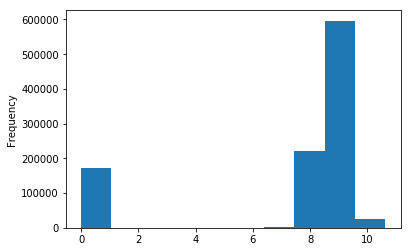

In [37]:
#从头开始处理数据

# 导入训练数据
train_data = pd.read_csv(
    "train.csv", 
    low_memory=False)

store_features = pd.read_csv("store.csv")
# 导入测试数据
test_data = pd.read_csv("test.csv")

#融合
train_data = pd.merge(train_data, store_features, on = 'Store')
test_data = pd.merge(test_data, store_features, on = 'Store')

train_data = train_data.drop('Customers', axis = 1)
sales = train_data['Sales']
features = train_data.drop('Sales', axis = 1)

# 对字符串特征进行独热编码
category = ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']


#首先将训练集和测试集合并，然后统一独热编码，然后再拆分为训练集和测试集
features_test = test_data.drop('Id', axis = 1)
data_merge = pd.concat([features, features_test], ignore_index = True)
data_merge_pd = pd.get_dummies(data_merge, columns = category)

# 需要把NA/NAN的数据转化成0
data_merge_pd.fillna(0, inplace = True)

#增加一步，增加‘Year', 'month', 'day'三个有序分类数据

data_merge_pd['year'] = data_merge_pd['Date'].apply(lambda x: float(x.split('-')[0]))
data_merge_pd['month'] = data_merge_pd['Date'].apply(lambda x: float(x.split('-')[1]))
data_merge_pd['day'] = data_merge_pd['Date'].apply(lambda x: float(x.split('-')[2]))

#将字符串转化为时间戳数值
data_merge_pd['Date'] = pd.to_datetime(data_merge_pd['Date'])


#然后再把时间戳数值转化为浮点值

data_merge_pd['Date'] = pd.to_numeric(data_merge_pd['Date'], downcast = 'float')


start_date = min(data_merge_pd['Date'])
end_date = max(data_merge_pd['Date'])
data_merge_pd['Date'] = (data_merge_pd['Date'] - start_date)/(end_date - start_date)

#看一下转化后的结果
pd.options.display.max_columns = 100
display(data_merge_pd.head(n=5))

#拆分
print(features.shape)
print(features_test.shape)
features_pd = data_merge_pd[0:features.shape[0]]
features_test_pd = data_merge_pd[features.shape[0]:data_merge_pd.shape[0]]
print(features_pd.shape)
print(features_test_pd.shape)

display(features_pd.head(n=5))
display(features_test_pd.head(n=5))

#下面将sales做log处理

sales_log = np.log(train_data['Sales'] + 1) #+1是为了避免log（0）的情况同时使得数据从0开始

sales_log.plot.hist()


X_train, X_val, y_train, y_val = train_test_split(
    features_pd, sales_log, test_size = 0.2, random_state = 1)

display(X_train.head(n=5))
display(y_train.head(n=5))

dtrain = xgb.DMatrix(X_train, label = y_train)
dval = xgb.DMatrix(X_val, label = y_val)

#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 1000
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



In [38]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 1.0, 'subsample':0.5}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-9.csv', index = False)

[0]	train-rmse:5.28011	val-rmse:5.28228	train-rmspe:0.908113	val-rmspe:0.908526
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70306	val-rmse:3.70446	train-rmspe:0.894169	val-rmspe:0.894569
[2]	train-rmse:2.60163	val-rmse:2.6025	train-rmspe:0.854549	val-rmspe:0.854903
[3]	train-rmse:1.83387	val-rmse:1.83428	train-rmspe:0.780277	val-rmspe:0.780485
[4]	train-rmse:1.29961	val-rmse:1.29971	train-rmspe:0.677766	val-rmspe:0.677639
[5]	train-rmse:0.932527	val-rmse:0.932455	train-rmspe:0.564215	val-rmspe:0.563466
[6]	train-rmse:0.679915	val-rmse:0.679534	train-rmspe:0.459415	val-rmspe:0.457522
[7]	train-rmse:0.508894	val-rmse:0.508308	train-rmspe:0.374986	val-rmspe:0.37118
[8]	train-rmse:0.401406	val-rmse:0.400729	train-rmspe:0.319101	val-rmspe:0.313308
[9]	train-rmse:0.329088	val-rmse:0.328362	train-rmspe:0.282847	val-rmspe:0.274903
[10]	train-rmse:0.289594	val-rmse:0.288946	train

[98]	train-rmse:0.108203	val-rmse:0.116777	train-rmspe:0.118746	val-rmspe:0.124111
[99]	train-rmse:0.107693	val-rmse:0.116458	train-rmspe:0.120386	val-rmspe:0.123796
[100]	train-rmse:0.107454	val-rmse:0.116379	train-rmspe:0.120208	val-rmspe:0.123706
[101]	train-rmse:0.107162	val-rmse:0.116131	train-rmspe:0.119864	val-rmspe:0.12358
[102]	train-rmse:0.106794	val-rmse:0.116161	train-rmspe:0.11974	val-rmspe:0.123499
[103]	train-rmse:0.106421	val-rmse:0.115891	train-rmspe:0.119424	val-rmspe:0.123252
[104]	train-rmse:0.106206	val-rmse:0.115704	train-rmspe:0.119266	val-rmspe:0.123152
[105]	train-rmse:0.10606	val-rmse:0.115687	train-rmspe:0.119123	val-rmspe:0.123114
[106]	train-rmse:0.105786	val-rmse:0.115579	train-rmspe:0.118964	val-rmspe:0.123012
[107]	train-rmse:0.105394	val-rmse:0.115523	train-rmspe:0.118783	val-rmspe:0.122909
[108]	train-rmse:0.105225	val-rmse:0.1154	train-rmspe:0.118625	val-rmspe:0.122779
[109]	train-rmse:0.105024	val-rmse:0.115313	train-rmspe:0.118427	val-rmspe:0.122704

[197]	train-rmse:0.090179	val-rmse:0.110855	train-rmspe:0.098355	val-rmspe:0.11747
[198]	train-rmse:0.090114	val-rmse:0.110808	train-rmspe:0.098292	val-rmspe:0.117413
[199]	train-rmse:0.089882	val-rmse:0.110718	train-rmspe:0.098052	val-rmspe:0.117326
[200]	train-rmse:0.089725	val-rmse:0.110746	train-rmspe:0.098053	val-rmspe:0.117619
[201]	train-rmse:0.089662	val-rmse:0.110815	train-rmspe:0.098026	val-rmspe:0.117637
[202]	train-rmse:0.089536	val-rmse:0.110836	train-rmspe:0.097887	val-rmspe:0.11762
[203]	train-rmse:0.08942	val-rmse:0.110822	train-rmspe:0.097779	val-rmspe:0.117621
[204]	train-rmse:0.089264	val-rmse:0.110963	train-rmspe:0.097421	val-rmspe:0.117603
[205]	train-rmse:0.089202	val-rmse:0.110945	train-rmspe:0.097362	val-rmspe:0.117594
[206]	train-rmse:0.089105	val-rmse:0.110952	train-rmspe:0.097308	val-rmspe:0.117611
[207]	train-rmse:0.088988	val-rmse:0.110996	train-rmspe:0.097243	val-rmspe:0.117678
[208]	train-rmse:0.088879	val-rmse:0.110968	train-rmspe:0.097182	val-rmspe:0.11

[295]	train-rmse:0.080904	val-rmse:0.110353	train-rmspe:0.085535	val-rmspe:0.116213
[296]	train-rmse:0.080834	val-rmse:0.110361	train-rmspe:0.085492	val-rmspe:0.116246
[297]	train-rmse:0.08078	val-rmse:0.110381	train-rmspe:0.085442	val-rmspe:0.116266
[298]	train-rmse:0.080721	val-rmse:0.110362	train-rmspe:0.083577	val-rmspe:0.116312
[299]	train-rmse:0.080613	val-rmse:0.110347	train-rmspe:0.083584	val-rmspe:0.116267
[300]	train-rmse:0.080559	val-rmse:0.110304	train-rmspe:0.083517	val-rmspe:0.116198
[301]	train-rmse:0.080476	val-rmse:0.110337	train-rmspe:0.083419	val-rmspe:0.116175
[302]	train-rmse:0.080415	val-rmse:0.110317	train-rmspe:0.082276	val-rmspe:0.116176
[303]	train-rmse:0.080383	val-rmse:0.110311	train-rmspe:0.08222	val-rmspe:0.116212
[304]	train-rmse:0.080272	val-rmse:0.11031	train-rmspe:0.082194	val-rmspe:0.116176
[305]	train-rmse:0.080209	val-rmse:0.11032	train-rmspe:0.082112	val-rmspe:0.116179
[306]	train-rmse:0.080144	val-rmse:0.110393	train-rmspe:0.082051	val-rmspe:0.116

[393]	train-rmse:0.074639	val-rmse:0.110811	train-rmspe:0.075867	val-rmspe:0.115683
[394]	train-rmse:0.074565	val-rmse:0.11084	train-rmspe:0.075832	val-rmspe:0.115641
[395]	train-rmse:0.074509	val-rmse:0.110848	train-rmspe:0.075781	val-rmspe:0.115693
[396]	train-rmse:0.074457	val-rmse:0.110869	train-rmspe:0.075632	val-rmspe:0.115596
[397]	train-rmse:0.074417	val-rmse:0.110895	train-rmspe:0.075595	val-rmspe:0.115599
[398]	train-rmse:0.074357	val-rmse:0.110883	train-rmspe:0.075505	val-rmspe:0.115622
[399]	train-rmse:0.074284	val-rmse:0.110893	train-rmspe:0.075464	val-rmspe:0.115649
[400]	train-rmse:0.07424	val-rmse:0.110889	train-rmspe:0.075389	val-rmspe:0.115657
[401]	train-rmse:0.074188	val-rmse:0.11086	train-rmspe:0.07532	val-rmspe:0.115625
[402]	train-rmse:0.074127	val-rmse:0.110846	train-rmspe:0.074544	val-rmspe:0.115682
[403]	train-rmse:0.074039	val-rmse:0.110874	train-rmspe:0.074495	val-rmspe:0.115676
[404]	train-rmse:0.073964	val-rmse:0.110851	train-rmspe:0.074435	val-rmspe:0.115

进入0.1区间啦～～～再微调一下参数看看

In [39]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.9, 'subsample':0.5}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-10.csv', index = False)

[0]	train-rmse:5.2891	val-rmse:5.29162	train-rmspe:0.908133	val-rmspe:0.908547
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70957	val-rmse:3.71139	train-rmspe:0.894232	val-rmspe:0.894637
[2]	train-rmse:2.60619	val-rmse:2.6075	train-rmspe:0.854753	val-rmspe:0.855125
[3]	train-rmse:1.84294	val-rmse:1.84418	train-rmspe:0.781007	val-rmspe:0.781272
[4]	train-rmse:1.30761	val-rmse:1.30852	train-rmspe:0.678375	val-rmspe:0.678296
[5]	train-rmse:0.938722	val-rmse:0.939313	train-rmspe:0.565176	val-rmspe:0.56429
[6]	train-rmse:0.687464	val-rmse:0.687756	train-rmspe:0.461362	val-rmspe:0.458747
[7]	train-rmse:0.518749	val-rmse:0.518801	train-rmspe:0.37933	val-rmspe:0.373575
[8]	train-rmse:0.412972	val-rmse:0.412948	train-rmspe:0.326886	val-rmspe:0.317938
[9]	train-rmse:0.346342	val-rmse:0.346114	train-rmspe:0.298893	val-rmspe:0.286497
[10]	train-rmse:0.295507	val-rmse:0.29518	train-rm

[98]	train-rmse:0.109872	val-rmse:0.118016	train-rmspe:0.121106	val-rmspe:0.124138
[99]	train-rmse:0.109601	val-rmse:0.117972	train-rmspe:0.120857	val-rmspe:0.12404
[100]	train-rmse:0.10927	val-rmse:0.117775	train-rmspe:0.120462	val-rmspe:0.123819
[101]	train-rmse:0.10891	val-rmse:0.117637	train-rmspe:0.12013	val-rmspe:0.123648
[102]	train-rmse:0.108688	val-rmse:0.117454	train-rmspe:0.119994	val-rmspe:0.123548
[103]	train-rmse:0.108413	val-rmse:0.117271	train-rmspe:0.119779	val-rmspe:0.123411
[104]	train-rmse:0.108327	val-rmse:0.117205	train-rmspe:0.119704	val-rmspe:0.123375
[105]	train-rmse:0.10799	val-rmse:0.117165	train-rmspe:0.119537	val-rmspe:0.12327
[106]	train-rmse:0.107806	val-rmse:0.117152	train-rmspe:0.119383	val-rmspe:0.12319
[107]	train-rmse:0.107593	val-rmse:0.116978	train-rmspe:0.119207	val-rmspe:0.123045
[108]	train-rmse:0.107521	val-rmse:0.116959	train-rmspe:0.119157	val-rmspe:0.123072
[109]	train-rmse:0.107237	val-rmse:0.116858	train-rmspe:0.118182	val-rmspe:0.122962
[

[197]	train-rmse:0.092131	val-rmse:0.112342	train-rmspe:0.092901	val-rmspe:0.116553
[198]	train-rmse:0.092001	val-rmse:0.112247	train-rmspe:0.092724	val-rmspe:0.116448
[199]	train-rmse:0.091805	val-rmse:0.112282	train-rmspe:0.092608	val-rmspe:0.116407
[200]	train-rmse:0.091635	val-rmse:0.112298	train-rmspe:0.092392	val-rmspe:0.116426
[201]	train-rmse:0.091573	val-rmse:0.112299	train-rmspe:0.092299	val-rmspe:0.116439
[202]	train-rmse:0.091453	val-rmse:0.112303	train-rmspe:0.092259	val-rmspe:0.116494
[203]	train-rmse:0.09139	val-rmse:0.112304	train-rmspe:0.092234	val-rmspe:0.116488
[204]	train-rmse:0.091279	val-rmse:0.112305	train-rmspe:0.091216	val-rmspe:0.116513
[205]	train-rmse:0.091201	val-rmse:0.112289	train-rmspe:0.09107	val-rmspe:0.116502
[206]	train-rmse:0.091044	val-rmse:0.112226	train-rmspe:0.090825	val-rmspe:0.116459
[207]	train-rmse:0.090942	val-rmse:0.112293	train-rmspe:0.090788	val-rmspe:0.116508
[208]	train-rmse:0.090854	val-rmse:0.112201	train-rmspe:0.090729	val-rmspe:0.1

[296]	train-rmse:0.082671	val-rmse:0.111578	train-rmspe:0.081592	val-rmspe:0.11493
[297]	train-rmse:0.082582	val-rmse:0.111521	train-rmspe:0.081539	val-rmspe:0.114901
[298]	train-rmse:0.082484	val-rmse:0.11154	train-rmspe:0.081442	val-rmspe:0.114896
[299]	train-rmse:0.082368	val-rmse:0.111623	train-rmspe:0.081402	val-rmspe:0.114929
[300]	train-rmse:0.08231	val-rmse:0.111596	train-rmspe:0.08132	val-rmspe:0.114938
[301]	train-rmse:0.082217	val-rmse:0.111565	train-rmspe:0.081227	val-rmspe:0.114957
[302]	train-rmse:0.082154	val-rmse:0.111538	train-rmspe:0.081181	val-rmspe:0.11498
[303]	train-rmse:0.082074	val-rmse:0.111475	train-rmspe:0.081098	val-rmspe:0.114959
[304]	train-rmse:0.082017	val-rmse:0.111497	train-rmspe:0.081032	val-rmspe:0.114982
[305]	train-rmse:0.081954	val-rmse:0.111462	train-rmspe:0.080961	val-rmspe:0.114941
[306]	train-rmse:0.081847	val-rmse:0.111446	train-rmspe:0.080895	val-rmspe:0.114934
[307]	train-rmse:0.081755	val-rmse:0.111425	train-rmspe:0.080821	val-rmspe:0.1149

[395]	train-rmse:0.075962	val-rmse:0.110947	train-rmspe:0.075274	val-rmspe:0.114559
[396]	train-rmse:0.075878	val-rmse:0.110924	train-rmspe:0.075166	val-rmspe:0.11454
[397]	train-rmse:0.075818	val-rmse:0.110924	train-rmspe:0.075109	val-rmspe:0.114518
[398]	train-rmse:0.075766	val-rmse:0.110924	train-rmspe:0.075039	val-rmspe:0.114498
[399]	train-rmse:0.075673	val-rmse:0.110958	train-rmspe:0.074981	val-rmspe:0.114622
[400]	train-rmse:0.075626	val-rmse:0.110971	train-rmspe:0.074941	val-rmspe:0.114607
[401]	train-rmse:0.075597	val-rmse:0.110965	train-rmspe:0.074911	val-rmspe:0.114599
[402]	train-rmse:0.075552	val-rmse:0.110937	train-rmspe:0.07486	val-rmspe:0.114583
[403]	train-rmse:0.075511	val-rmse:0.110963	train-rmspe:0.074825	val-rmspe:0.114495
[404]	train-rmse:0.075453	val-rmse:0.110961	train-rmspe:0.074738	val-rmspe:0.114435
[405]	train-rmse:0.075431	val-rmse:0.110949	train-rmspe:0.074716	val-rmspe:0.114437
[406]	train-rmse:0.075379	val-rmse:0.111003	train-rmspe:0.074653	val-rmspe:0.1

In [40]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.8, 'subsample':0.5}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-11.csv', index = False)
print('\a')
print('\a')
print('\a')

[0]	train-rmse:5.28947	val-rmse:5.29212	train-rmspe:0.908135	val-rmspe:0.908549
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70985	val-rmse:3.71176	train-rmspe:0.894239	val-rmspe:0.894646
[2]	train-rmse:2.60639	val-rmse:2.60772	train-rmspe:0.854778	val-rmspe:0.85515
[3]	train-rmse:1.84406	val-rmse:1.84536	train-rmspe:0.781034	val-rmspe:0.781283
[4]	train-rmse:1.30851	val-rmse:1.30939	train-rmspe:0.678545	val-rmspe:0.678386
[5]	train-rmse:0.939643	val-rmse:0.940296	train-rmspe:0.565707	val-rmspe:0.564671
[6]	train-rmse:0.688724	val-rmse:0.688832	train-rmspe:0.462443	val-rmspe:0.459602
[7]	train-rmse:0.521413	val-rmse:0.521373	train-rmspe:0.382928	val-rmspe:0.377162
[8]	train-rmse:0.432876	val-rmse:0.432679	train-rmspe:0.338585	val-rmspe:0.330326
[9]	train-rmse:0.358127	val-rmse:0.35763	train-rmspe:0.305644	val-rmspe:0.294804
[10]	train-rmse:0.313982	val-rmse:0.313415	train

[98]	train-rmse:0.111416	val-rmse:0.118403	train-rmspe:0.152945	val-rmspe:0.123612
[99]	train-rmse:0.111051	val-rmse:0.118263	train-rmspe:0.153148	val-rmspe:0.123503
[100]	train-rmse:0.110692	val-rmse:0.118114	train-rmspe:0.153036	val-rmspe:0.123409
[101]	train-rmse:0.110331	val-rmse:0.117828	train-rmspe:0.15263	val-rmspe:0.12319
[102]	train-rmse:0.110117	val-rmse:0.117591	train-rmspe:0.152537	val-rmspe:0.123059
[103]	train-rmse:0.109946	val-rmse:0.117521	train-rmspe:0.152427	val-rmspe:0.122976
[104]	train-rmse:0.109705	val-rmse:0.117324	train-rmspe:0.152004	val-rmspe:0.122767
[105]	train-rmse:0.109482	val-rmse:0.117174	train-rmspe:0.137418	val-rmspe:0.1226
[106]	train-rmse:0.109291	val-rmse:0.117092	train-rmspe:0.137336	val-rmspe:0.122549
[107]	train-rmse:0.108727	val-rmse:0.11676	train-rmspe:0.13699	val-rmspe:0.122198
[108]	train-rmse:0.10818	val-rmse:0.116411	train-rmspe:0.136722	val-rmspe:0.121843
[109]	train-rmse:0.107996	val-rmse:0.116432	train-rmspe:0.136492	val-rmspe:0.121841
[

[197]	train-rmse:0.093154	val-rmse:0.11129	train-rmspe:0.112959	val-rmspe:0.11569
[198]	train-rmse:0.092996	val-rmse:0.11134	train-rmspe:0.113072	val-rmspe:0.115651
[199]	train-rmse:0.09287	val-rmse:0.111375	train-rmspe:0.112993	val-rmspe:0.115692
[200]	train-rmse:0.092707	val-rmse:0.111391	train-rmspe:0.112859	val-rmspe:0.115693
[201]	train-rmse:0.092565	val-rmse:0.111407	train-rmspe:0.112764	val-rmspe:0.115632
[202]	train-rmse:0.09245	val-rmse:0.111435	train-rmspe:0.112705	val-rmspe:0.115695
[203]	train-rmse:0.092403	val-rmse:0.111515	train-rmspe:0.112682	val-rmspe:0.115728
[204]	train-rmse:0.092266	val-rmse:0.111477	train-rmspe:0.112601	val-rmspe:0.115695
[205]	train-rmse:0.092195	val-rmse:0.111564	train-rmspe:0.112251	val-rmspe:0.115685
[206]	train-rmse:0.092125	val-rmse:0.111546	train-rmspe:0.112231	val-rmspe:0.115597
[207]	train-rmse:0.092007	val-rmse:0.111523	train-rmspe:0.111824	val-rmspe:0.115594
[208]	train-rmse:0.091899	val-rmse:0.111494	train-rmspe:0.111775	val-rmspe:0.1155

[296]	train-rmse:0.083382	val-rmse:0.110944	train-rmspe:0.087149	val-rmspe:0.115075
[297]	train-rmse:0.083325	val-rmse:0.11098	train-rmspe:0.087112	val-rmspe:0.115072
[298]	train-rmse:0.083222	val-rmse:0.110883	train-rmspe:0.087036	val-rmspe:0.115049
[299]	train-rmse:0.083151	val-rmse:0.11095	train-rmspe:0.086987	val-rmspe:0.115114
[300]	train-rmse:0.083024	val-rmse:0.110922	train-rmspe:0.086884	val-rmspe:0.11511
[301]	train-rmse:0.082923	val-rmse:0.110919	train-rmspe:0.086708	val-rmspe:0.115156
[302]	train-rmse:0.082886	val-rmse:0.11091	train-rmspe:0.086639	val-rmspe:0.115163
[303]	train-rmse:0.082831	val-rmse:0.110921	train-rmspe:0.086542	val-rmspe:0.115157
[304]	train-rmse:0.082781	val-rmse:0.110921	train-rmspe:0.086504	val-rmspe:0.115144
[305]	train-rmse:0.082719	val-rmse:0.110932	train-rmspe:0.086424	val-rmspe:0.115217
[306]	train-rmse:0.082631	val-rmse:0.110863	train-rmspe:0.086297	val-rmspe:0.115197
[307]	train-rmse:0.082531	val-rmse:0.110865	train-rmspe:0.086244	val-rmspe:0.115

[395]	train-rmse:0.077092	val-rmse:0.110963	train-rmspe:0.079878	val-rmspe:0.114204
[396]	train-rmse:0.077048	val-rmse:0.110964	train-rmspe:0.07965	val-rmspe:0.11417
[397]	train-rmse:0.076944	val-rmse:0.110918	train-rmspe:0.079592	val-rmspe:0.11413
[398]	train-rmse:0.076876	val-rmse:0.110908	train-rmspe:0.07952	val-rmspe:0.114155
[399]	train-rmse:0.076803	val-rmse:0.11091	train-rmspe:0.079124	val-rmspe:0.11412
[400]	train-rmse:0.076746	val-rmse:0.110914	train-rmspe:0.079046	val-rmspe:0.114148
[401]	train-rmse:0.076709	val-rmse:0.110927	train-rmspe:0.078943	val-rmspe:0.114155
[402]	train-rmse:0.076669	val-rmse:0.110914	train-rmspe:0.078898	val-rmspe:0.114153
[403]	train-rmse:0.076623	val-rmse:0.110894	train-rmspe:0.078861	val-rmspe:0.114153
[404]	train-rmse:0.076541	val-rmse:0.110913	train-rmspe:0.07894	val-rmspe:0.114093
[405]	train-rmse:0.076494	val-rmse:0.110891	train-rmspe:0.078833	val-rmspe:0.114136
[406]	train-rmse:0.076476	val-rmse:0.110913	train-rmspe:0.078854	val-rmspe:0.114148

In [42]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.7, 'subsample':0.5}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-12.csv', index = False)

from IPython.display import Audio
soundfile = '/Users/liushengxi/Desktop/70108.wav'
Audio(url = soundfile, autoplay = True)

[0]	train-rmse:5.2905	val-rmse:5.29319	train-rmspe:0.908131	val-rmspe:0.908545
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.71138	val-rmse:3.71346	train-rmspe:0.894174	val-rmspe:0.894587
[2]	train-rmse:2.60757	val-rmse:2.60912	train-rmspe:0.854654	val-rmspe:0.855044
[3]	train-rmse:1.84557	val-rmse:1.84708	train-rmspe:0.780718	val-rmspe:0.781013
[4]	train-rmse:1.30911	val-rmse:1.31012	train-rmspe:0.678398	val-rmspe:0.678341
[5]	train-rmse:0.937539	val-rmse:0.93834	train-rmspe:0.565578	val-rmspe:0.564719
[6]	train-rmse:0.685223	val-rmse:0.685718	train-rmspe:0.460923	val-rmspe:0.458343
[7]	train-rmse:0.544214	val-rmse:0.544658	train-rmspe:0.389499	val-rmspe:0.385107
[8]	train-rmse:0.459215	val-rmse:0.459673	train-rmspe:0.341215	val-rmspe:0.334642
[9]	train-rmse:0.371238	val-rmse:0.37133	train-rmspe:0.303854	val-rmspe:0.293426
[10]	train-rmse:0.321075	val-rmse:0.321279	train-

[98]	train-rmse:0.115363	val-rmse:0.122503	train-rmspe:0.159773	val-rmspe:0.131073
[99]	train-rmse:0.114561	val-rmse:0.12186	train-rmspe:0.159091	val-rmspe:0.129866
[100]	train-rmse:0.11414	val-rmse:0.121765	train-rmspe:0.15875	val-rmspe:0.129683
[101]	train-rmse:0.113704	val-rmse:0.121563	train-rmspe:0.158559	val-rmspe:0.129435
[102]	train-rmse:0.113513	val-rmse:0.121314	train-rmspe:0.158578	val-rmspe:0.12933
[103]	train-rmse:0.113218	val-rmse:0.121046	train-rmspe:0.158475	val-rmspe:0.129235
[104]	train-rmse:0.112902	val-rmse:0.120772	train-rmspe:0.15819	val-rmspe:0.128975
[105]	train-rmse:0.112519	val-rmse:0.120472	train-rmspe:0.157921	val-rmspe:0.128713
[106]	train-rmse:0.112372	val-rmse:0.120371	train-rmspe:0.157872	val-rmspe:0.128657
[107]	train-rmse:0.112166	val-rmse:0.120302	train-rmspe:0.157787	val-rmspe:0.128517
[108]	train-rmse:0.111774	val-rmse:0.120041	train-rmspe:0.157451	val-rmspe:0.128247
[109]	train-rmse:0.111352	val-rmse:0.119785	train-rmspe:0.157357	val-rmspe:0.127872

[197]	train-rmse:0.095249	val-rmse:0.113865	train-rmspe:0.10854	val-rmspe:0.120491
[198]	train-rmse:0.09514	val-rmse:0.113846	train-rmspe:0.108472	val-rmspe:0.120491
[199]	train-rmse:0.095046	val-rmse:0.113842	train-rmspe:0.108423	val-rmspe:0.120423
[200]	train-rmse:0.094814	val-rmse:0.113847	train-rmspe:0.108198	val-rmspe:0.120364
[201]	train-rmse:0.094657	val-rmse:0.113807	train-rmspe:0.10813	val-rmspe:0.120314
[202]	train-rmse:0.094597	val-rmse:0.11381	train-rmspe:0.108039	val-rmspe:0.12033
[203]	train-rmse:0.094479	val-rmse:0.113772	train-rmspe:0.108036	val-rmspe:0.120278
[204]	train-rmse:0.094372	val-rmse:0.113853	train-rmspe:0.107998	val-rmspe:0.120306
[205]	train-rmse:0.094265	val-rmse:0.113854	train-rmspe:0.107931	val-rmspe:0.120659
[206]	train-rmse:0.094158	val-rmse:0.113901	train-rmspe:0.107871	val-rmspe:0.120704
[207]	train-rmse:0.094028	val-rmse:0.113893	train-rmspe:0.107806	val-rmspe:0.120664
[208]	train-rmse:0.093949	val-rmse:0.113911	train-rmspe:0.10774	val-rmspe:0.12074

[295]	train-rmse:0.085466	val-rmse:0.112153	train-rmspe:0.085374	val-rmspe:0.119133
[296]	train-rmse:0.085428	val-rmse:0.112144	train-rmspe:0.085313	val-rmspe:0.119093
[297]	train-rmse:0.08536	val-rmse:0.112127	train-rmspe:0.085261	val-rmspe:0.119116
[298]	train-rmse:0.085318	val-rmse:0.112112	train-rmspe:0.085206	val-rmspe:0.119085
[299]	train-rmse:0.085212	val-rmse:0.112156	train-rmspe:0.085167	val-rmspe:0.119175
[300]	train-rmse:0.085116	val-rmse:0.112112	train-rmspe:0.085043	val-rmspe:0.11918
[301]	train-rmse:0.085081	val-rmse:0.112077	train-rmspe:0.085003	val-rmspe:0.119271
[302]	train-rmse:0.085039	val-rmse:0.11206	train-rmspe:0.084983	val-rmspe:0.119357
[303]	train-rmse:0.084972	val-rmse:0.112015	train-rmspe:0.083967	val-rmspe:0.119366
[304]	train-rmse:0.084922	val-rmse:0.112005	train-rmspe:0.083927	val-rmspe:0.11932
[305]	train-rmse:0.084817	val-rmse:0.112001	train-rmspe:0.083875	val-rmspe:0.119292
[306]	train-rmse:0.084727	val-rmse:0.112003	train-rmspe:0.083808	val-rmspe:0.118

[394]	train-rmse:0.078996	val-rmse:0.111702	train-rmspe:0.078148	val-rmspe:0.116815
[395]	train-rmse:0.078919	val-rmse:0.111701	train-rmspe:0.078081	val-rmspe:0.116788
[396]	train-rmse:0.078893	val-rmse:0.111683	train-rmspe:0.078057	val-rmspe:0.116548
[397]	train-rmse:0.078819	val-rmse:0.111635	train-rmspe:0.077992	val-rmspe:0.116482
[398]	train-rmse:0.078783	val-rmse:0.111605	train-rmspe:0.077965	val-rmspe:0.116479
[399]	train-rmse:0.078741	val-rmse:0.111636	train-rmspe:0.077924	val-rmspe:0.116471
[400]	train-rmse:0.078674	val-rmse:0.111674	train-rmspe:0.077872	val-rmspe:0.116431
[401]	train-rmse:0.078631	val-rmse:0.111673	train-rmspe:0.077357	val-rmspe:0.116434
[402]	train-rmse:0.07859	val-rmse:0.111682	train-rmspe:0.077331	val-rmspe:0.116477
[403]	train-rmse:0.07852	val-rmse:0.111682	train-rmspe:0.077287	val-rmspe:0.116447
[404]	train-rmse:0.078482	val-rmse:0.111669	train-rmspe:0.077232	val-rmspe:0.116435
[405]	train-rmse:0.078386	val-rmse:0.111659	train-rmspe:0.077138	val-rmspe:0.1

In [43]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.9, 'subsample':0.6}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-13.csv', index = False)

[0]	train-rmse:5.28898	val-rmse:5.29153	train-rmspe:0.908135	val-rmspe:0.908548
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70943	val-rmse:3.71119	train-rmspe:0.894239	val-rmspe:0.894643
[2]	train-rmse:2.6058	val-rmse:2.60699	train-rmspe:0.854775	val-rmspe:0.855136
[3]	train-rmse:1.84232	val-rmse:1.84332	train-rmspe:0.781082	val-rmspe:0.7813
[4]	train-rmse:1.30676	val-rmse:1.3075	train-rmspe:0.678503	val-rmspe:0.678381
[5]	train-rmse:0.936563	val-rmse:0.936905	train-rmspe:0.565342	val-rmspe:0.564323
[6]	train-rmse:0.684752	val-rmse:0.684923	train-rmspe:0.460336	val-rmspe:0.458244
[7]	train-rmse:0.518497	val-rmse:0.518538	train-rmspe:0.378772	val-rmspe:0.374694
[8]	train-rmse:0.407245	val-rmse:0.407132	train-rmspe:0.323401	val-rmspe:0.316694
[9]	train-rmse:0.339252	val-rmse:0.338953	train-rmspe:0.293516	val-rmspe:0.282466
[10]	train-rmse:0.301607	val-rmse:0.301314	train-r

[98]	train-rmse:0.110273	val-rmse:0.119442	train-rmspe:0.131881	val-rmspe:0.124806
[99]	train-rmse:0.109952	val-rmse:0.119392	train-rmspe:0.131743	val-rmspe:0.124697
[100]	train-rmse:0.109568	val-rmse:0.119127	train-rmspe:0.131451	val-rmspe:0.124469
[101]	train-rmse:0.109078	val-rmse:0.118679	train-rmspe:0.131045	val-rmspe:0.123995
[102]	train-rmse:0.10881	val-rmse:0.118632	train-rmspe:0.130943	val-rmspe:0.123907
[103]	train-rmse:0.108644	val-rmse:0.118543	train-rmspe:0.130815	val-rmspe:0.12381
[104]	train-rmse:0.108349	val-rmse:0.118447	train-rmspe:0.130579	val-rmspe:0.123618
[105]	train-rmse:0.108125	val-rmse:0.118294	train-rmspe:0.130717	val-rmspe:0.123432
[106]	train-rmse:0.107818	val-rmse:0.118215	train-rmspe:0.130066	val-rmspe:0.123598
[107]	train-rmse:0.107546	val-rmse:0.118076	train-rmspe:0.129849	val-rmspe:0.123531
[108]	train-rmse:0.10722	val-rmse:0.117792	train-rmspe:0.129561	val-rmspe:0.123255
[109]	train-rmse:0.107021	val-rmse:0.11773	train-rmspe:0.129252	val-rmspe:0.12313

[196]	train-rmse:0.091341	val-rmse:0.111823	train-rmspe:0.100087	val-rmspe:0.116942
[197]	train-rmse:0.091207	val-rmse:0.111717	train-rmspe:0.099966	val-rmspe:0.116889
[198]	train-rmse:0.091045	val-rmse:0.111629	train-rmspe:0.099834	val-rmspe:0.11687
[199]	train-rmse:0.090861	val-rmse:0.111501	train-rmspe:0.099683	val-rmspe:0.116736
[200]	train-rmse:0.09068	val-rmse:0.111554	train-rmspe:0.099619	val-rmspe:0.116772
[201]	train-rmse:0.090581	val-rmse:0.111556	train-rmspe:0.099561	val-rmspe:0.116821
[202]	train-rmse:0.090473	val-rmse:0.111585	train-rmspe:0.099504	val-rmspe:0.116826
[203]	train-rmse:0.090321	val-rmse:0.111678	train-rmspe:0.099434	val-rmspe:0.116902
[204]	train-rmse:0.090166	val-rmse:0.111565	train-rmspe:0.09915	val-rmspe:0.116922
[205]	train-rmse:0.090093	val-rmse:0.111561	train-rmspe:0.099092	val-rmspe:0.116944
[206]	train-rmse:0.089954	val-rmse:0.111451	train-rmspe:0.098965	val-rmspe:0.116935
[207]	train-rmse:0.089875	val-rmse:0.11144	train-rmspe:0.098909	val-rmspe:0.116

[295]	train-rmse:0.080746	val-rmse:0.110817	train-rmspe:0.085917	val-rmspe:0.114999
[296]	train-rmse:0.080679	val-rmse:0.110832	train-rmspe:0.085871	val-rmspe:0.115031
[297]	train-rmse:0.080588	val-rmse:0.11072	train-rmspe:0.085834	val-rmspe:0.115043
[298]	train-rmse:0.080528	val-rmse:0.11071	train-rmspe:0.085793	val-rmspe:0.115021
[299]	train-rmse:0.080426	val-rmse:0.110707	train-rmspe:0.08574	val-rmspe:0.115023
[300]	train-rmse:0.080367	val-rmse:0.110657	train-rmspe:0.085708	val-rmspe:0.115034
[301]	train-rmse:0.080282	val-rmse:0.110635	train-rmspe:0.084758	val-rmspe:0.11507
[302]	train-rmse:0.080228	val-rmse:0.110597	train-rmspe:0.084734	val-rmspe:0.115094
[303]	train-rmse:0.080165	val-rmse:0.110628	train-rmspe:0.083904	val-rmspe:0.115108
[304]	train-rmse:0.080119	val-rmse:0.110608	train-rmspe:0.082227	val-rmspe:0.115066
[305]	train-rmse:0.080084	val-rmse:0.110602	train-rmspe:0.082197	val-rmspe:0.115069
[306]	train-rmse:0.08002	val-rmse:0.11061	train-rmspe:0.082135	val-rmspe:0.11506

[394]	train-rmse:0.073883	val-rmse:0.110413	train-rmspe:0.07486	val-rmspe:0.113586
[395]	train-rmse:0.073814	val-rmse:0.11041	train-rmspe:0.074799	val-rmspe:0.113535
[396]	train-rmse:0.073751	val-rmse:0.110415	train-rmspe:0.07471	val-rmspe:0.113579
[397]	train-rmse:0.073687	val-rmse:0.110433	train-rmspe:0.074678	val-rmspe:0.113573
[398]	train-rmse:0.073624	val-rmse:0.110429	train-rmspe:0.074633	val-rmspe:0.113562
[399]	train-rmse:0.073554	val-rmse:0.110409	train-rmspe:0.074588	val-rmspe:0.113549
[400]	train-rmse:0.073505	val-rmse:0.110402	train-rmspe:0.074549	val-rmspe:0.11353
[401]	train-rmse:0.073449	val-rmse:0.110409	train-rmspe:0.074508	val-rmspe:0.113531
[402]	train-rmse:0.073385	val-rmse:0.110413	train-rmspe:0.074458	val-rmspe:0.113528
[403]	train-rmse:0.07332	val-rmse:0.11038	train-rmspe:0.074394	val-rmspe:0.113509
[404]	train-rmse:0.073233	val-rmse:0.11035	train-rmspe:0.07434	val-rmspe:0.113515
[405]	train-rmse:0.073141	val-rmse:0.11033	train-rmspe:0.074256	val-rmspe:0.113496
[

In [44]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-13.csv', index = False)

[0]	train-rmse:5.28906	val-rmse:5.29166	train-rmspe:0.908136	val-rmspe:0.908551
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70953	val-rmse:3.71143	train-rmspe:0.894251	val-rmspe:0.894659
[2]	train-rmse:2.60572	val-rmse:2.607	train-rmspe:0.854837	val-rmspe:0.855206
[3]	train-rmse:1.84244	val-rmse:1.8437	train-rmspe:0.781116	val-rmspe:0.781377
[4]	train-rmse:1.30674	val-rmse:1.30758	train-rmspe:0.67858	val-rmspe:0.678489
[5]	train-rmse:0.937604	val-rmse:0.938289	train-rmspe:0.56561	val-rmspe:0.564734
[6]	train-rmse:0.686181	val-rmse:0.686421	train-rmspe:0.461488	val-rmspe:0.45922
[7]	train-rmse:0.511186	val-rmse:0.511162	train-rmspe:0.377712	val-rmspe:0.372625
[8]	train-rmse:0.421041	val-rmse:0.42092	train-rmspe:0.329732	val-rmspe:0.322436
[9]	train-rmse:0.343803	val-rmse:0.343429	train-rmspe:0.292435	val-rmspe:0.282332
[10]	train-rmse:0.301168	val-rmse:0.300767	train-rmsp

[98]	train-rmse:0.108244	val-rmse:0.117234	train-rmspe:0.134039	val-rmspe:0.125284
[99]	train-rmse:0.107987	val-rmse:0.116975	train-rmspe:0.133661	val-rmspe:0.125144
[100]	train-rmse:0.107694	val-rmse:0.116771	train-rmspe:0.133461	val-rmspe:0.124933
[101]	train-rmse:0.107276	val-rmse:0.116423	train-rmspe:0.133108	val-rmspe:0.124557
[102]	train-rmse:0.107058	val-rmse:0.116269	train-rmspe:0.133367	val-rmspe:0.124451
[103]	train-rmse:0.106876	val-rmse:0.116114	train-rmspe:0.132789	val-rmspe:0.12441
[104]	train-rmse:0.106569	val-rmse:0.115943	train-rmspe:0.132538	val-rmspe:0.124214
[105]	train-rmse:0.106433	val-rmse:0.115892	train-rmspe:0.132382	val-rmspe:0.124148
[106]	train-rmse:0.106317	val-rmse:0.115769	train-rmspe:0.132275	val-rmspe:0.124215
[107]	train-rmse:0.10582	val-rmse:0.11575	train-rmspe:0.13195	val-rmspe:0.124011
[108]	train-rmse:0.105598	val-rmse:0.115554	train-rmspe:0.131808	val-rmspe:0.123849
[109]	train-rmse:0.105071	val-rmse:0.115284	train-rmspe:0.131177	val-rmspe:0.12361

[196]	train-rmse:0.089484	val-rmse:0.109885	train-rmspe:0.104641	val-rmspe:0.115932
[197]	train-rmse:0.089377	val-rmse:0.109908	train-rmspe:0.104601	val-rmspe:0.11593
[198]	train-rmse:0.089262	val-rmse:0.109913	train-rmspe:0.104528	val-rmspe:0.115879
[199]	train-rmse:0.089084	val-rmse:0.1099	train-rmspe:0.104299	val-rmspe:0.115845
[200]	train-rmse:0.08891	val-rmse:0.109878	train-rmspe:0.104208	val-rmspe:0.115792
[201]	train-rmse:0.088755	val-rmse:0.1098	train-rmspe:0.104077	val-rmspe:0.115709
[202]	train-rmse:0.088561	val-rmse:0.109842	train-rmspe:0.103976	val-rmspe:0.1157
[203]	train-rmse:0.08842	val-rmse:0.109821	train-rmspe:0.103893	val-rmspe:0.115489
[204]	train-rmse:0.088253	val-rmse:0.109759	train-rmspe:0.103795	val-rmspe:0.115447
[205]	train-rmse:0.088213	val-rmse:0.10975	train-rmspe:0.103755	val-rmspe:0.115422
[206]	train-rmse:0.088154	val-rmse:0.109756	train-rmspe:0.103722	val-rmspe:0.115414
[207]	train-rmse:0.088015	val-rmse:0.10973	train-rmspe:0.103662	val-rmspe:0.115375
[20

[295]	train-rmse:0.07889	val-rmse:0.108798	train-rmspe:0.082466	val-rmspe:0.113386
[296]	train-rmse:0.078824	val-rmse:0.108842	train-rmspe:0.082441	val-rmspe:0.113377
[297]	train-rmse:0.078736	val-rmse:0.108838	train-rmspe:0.082373	val-rmspe:0.113381
[298]	train-rmse:0.078608	val-rmse:0.10888	train-rmspe:0.082244	val-rmspe:0.113362
[299]	train-rmse:0.078541	val-rmse:0.108877	train-rmspe:0.082183	val-rmspe:0.113348
[300]	train-rmse:0.078493	val-rmse:0.108881	train-rmspe:0.082152	val-rmspe:0.113311
[301]	train-rmse:0.078409	val-rmse:0.108853	train-rmspe:0.082073	val-rmspe:0.113276
[302]	train-rmse:0.078328	val-rmse:0.108837	train-rmspe:0.081969	val-rmspe:0.113284
[303]	train-rmse:0.078232	val-rmse:0.108808	train-rmspe:0.081878	val-rmspe:0.113189
[304]	train-rmse:0.078175	val-rmse:0.108821	train-rmspe:0.081808	val-rmspe:0.113167
[305]	train-rmse:0.078094	val-rmse:0.108787	train-rmspe:0.081714	val-rmspe:0.112783
[306]	train-rmse:0.077998	val-rmse:0.108821	train-rmspe:0.081648	val-rmspe:0.1

[394]	train-rmse:0.071909	val-rmse:0.108684	train-rmspe:0.074773	val-rmspe:0.112286
[395]	train-rmse:0.071849	val-rmse:0.108672	train-rmspe:0.074709	val-rmspe:0.112261
[396]	train-rmse:0.071788	val-rmse:0.108659	train-rmspe:0.073656	val-rmspe:0.112211
[397]	train-rmse:0.071684	val-rmse:0.108664	train-rmspe:0.073634	val-rmspe:0.112226
[398]	train-rmse:0.071628	val-rmse:0.108639	train-rmspe:0.073586	val-rmspe:0.112219
[399]	train-rmse:0.071556	val-rmse:0.108597	train-rmspe:0.07354	val-rmspe:0.112204
[400]	train-rmse:0.071492	val-rmse:0.108591	train-rmspe:0.073409	val-rmspe:0.112189
[401]	train-rmse:0.071443	val-rmse:0.108581	train-rmspe:0.073363	val-rmspe:0.112173
[402]	train-rmse:0.071401	val-rmse:0.108594	train-rmspe:0.073318	val-rmspe:0.112154
[403]	train-rmse:0.071323	val-rmse:0.108622	train-rmspe:0.073242	val-rmspe:0.112165
[404]	train-rmse:0.071273	val-rmse:0.108621	train-rmspe:0.073229	val-rmspe:0.112165
[405]	train-rmse:0.071178	val-rmse:0.108667	train-rmspe:0.073177	val-rmspe:0.

In [45]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.8, 'subsample':0.8}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-14.csv', index = False)

[0]	train-rmse:5.28933	val-rmse:5.29192	train-rmspe:0.908137	val-rmspe:0.908551
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70973	val-rmse:3.71153	train-rmspe:0.894248	val-rmspe:0.894653
[2]	train-rmse:2.60592	val-rmse:2.60726	train-rmspe:0.854827	val-rmspe:0.855195
[3]	train-rmse:1.84315	val-rmse:1.8444	train-rmspe:0.781091	val-rmspe:0.781321
[4]	train-rmse:1.30722	val-rmse:1.30814	train-rmspe:0.678585	val-rmspe:0.67843
[5]	train-rmse:0.937467	val-rmse:0.938018	train-rmspe:0.56559	val-rmspe:0.564573
[6]	train-rmse:0.68584	val-rmse:0.686135	train-rmspe:0.461654	val-rmspe:0.459043
[7]	train-rmse:0.518491	val-rmse:0.518589	train-rmspe:0.380849	val-rmspe:0.375742
[8]	train-rmse:0.429356	val-rmse:0.429365	train-rmspe:0.335172	val-rmspe:0.327677
[9]	train-rmse:0.350734	val-rmse:0.350645	train-rmspe:0.29919	val-rmspe:0.288961
[10]	train-rmse:0.307062	val-rmse:0.30697	train-rms

[98]	train-rmse:0.107595	val-rmse:0.116433	train-rmspe:0.145424	val-rmspe:0.124132
[99]	train-rmse:0.107297	val-rmse:0.116286	train-rmspe:0.145255	val-rmspe:0.124068
[100]	train-rmse:0.106988	val-rmse:0.116223	train-rmspe:0.144688	val-rmspe:0.123922
[101]	train-rmse:0.1068	val-rmse:0.116115	train-rmspe:0.144493	val-rmspe:0.123805
[102]	train-rmse:0.106592	val-rmse:0.116037	train-rmspe:0.144365	val-rmspe:0.12371
[103]	train-rmse:0.106487	val-rmse:0.115957	train-rmspe:0.144182	val-rmspe:0.123682
[104]	train-rmse:0.106309	val-rmse:0.115834	train-rmspe:0.144034	val-rmspe:0.12353
[105]	train-rmse:0.105998	val-rmse:0.115658	train-rmspe:0.143628	val-rmspe:0.123424
[106]	train-rmse:0.105635	val-rmse:0.115411	train-rmspe:0.143333	val-rmspe:0.122746
[107]	train-rmse:0.105344	val-rmse:0.115272	train-rmspe:0.143174	val-rmspe:0.122577
[108]	train-rmse:0.105153	val-rmse:0.115126	train-rmspe:0.143054	val-rmspe:0.122461
[109]	train-rmse:0.104932	val-rmse:0.115102	train-rmspe:0.142671	val-rmspe:0.12246

[197]	train-rmse:0.088867	val-rmse:0.109234	train-rmspe:0.101358	val-rmspe:0.11603
[198]	train-rmse:0.088811	val-rmse:0.109209	train-rmspe:0.101332	val-rmspe:0.116026
[199]	train-rmse:0.088695	val-rmse:0.109206	train-rmspe:0.101276	val-rmspe:0.116012
[200]	train-rmse:0.088456	val-rmse:0.109104	train-rmspe:0.10114	val-rmspe:0.115915
[201]	train-rmse:0.088347	val-rmse:0.109092	train-rmspe:0.100847	val-rmspe:0.115883
[202]	train-rmse:0.088238	val-rmse:0.109068	train-rmspe:0.100762	val-rmspe:0.115871
[203]	train-rmse:0.088184	val-rmse:0.109051	train-rmspe:0.1007	val-rmspe:0.115847
[204]	train-rmse:0.087959	val-rmse:0.108919	train-rmspe:0.10025	val-rmspe:0.115792
[205]	train-rmse:0.087834	val-rmse:0.108928	train-rmspe:0.100169	val-rmspe:0.115761
[206]	train-rmse:0.087561	val-rmse:0.108827	train-rmspe:0.100033	val-rmspe:0.115713
[207]	train-rmse:0.087468	val-rmse:0.108783	train-rmspe:0.099972	val-rmspe:0.115608
[208]	train-rmse:0.087334	val-rmse:0.108788	train-rmspe:0.099903	val-rmspe:0.1155

[295]	train-rmse:0.078299	val-rmse:0.1075	train-rmspe:0.084379	val-rmspe:0.113481
[296]	train-rmse:0.078214	val-rmse:0.107525	train-rmspe:0.084325	val-rmspe:0.113462
[297]	train-rmse:0.078129	val-rmse:0.107522	train-rmspe:0.084265	val-rmspe:0.113378
[298]	train-rmse:0.078017	val-rmse:0.107526	train-rmspe:0.084187	val-rmspe:0.113341
[299]	train-rmse:0.077936	val-rmse:0.107526	train-rmspe:0.084378	val-rmspe:0.113345
[300]	train-rmse:0.077865	val-rmse:0.107518	train-rmspe:0.084311	val-rmspe:0.113329
[301]	train-rmse:0.0778	val-rmse:0.107478	train-rmspe:0.084273	val-rmspe:0.113317
[302]	train-rmse:0.077693	val-rmse:0.107482	train-rmspe:0.082085	val-rmspe:0.113307
[303]	train-rmse:0.077613	val-rmse:0.107469	train-rmspe:0.079937	val-rmspe:0.113505
[304]	train-rmse:0.07754	val-rmse:0.107496	train-rmspe:0.079872	val-rmspe:0.113437
[305]	train-rmse:0.077464	val-rmse:0.107515	train-rmspe:0.079748	val-rmspe:0.113405
[306]	train-rmse:0.077342	val-rmse:0.107509	train-rmspe:0.079491	val-rmspe:0.1134

[394]	train-rmse:0.071017	val-rmse:0.107073	train-rmspe:0.072337	val-rmspe:0.112314
[395]	train-rmse:0.070989	val-rmse:0.107068	train-rmspe:0.072306	val-rmspe:0.112301
[396]	train-rmse:0.070896	val-rmse:0.107117	train-rmspe:0.072258	val-rmspe:0.112297
[397]	train-rmse:0.070835	val-rmse:0.10711	train-rmspe:0.072215	val-rmspe:0.112298
[398]	train-rmse:0.070794	val-rmse:0.107109	train-rmspe:0.072184	val-rmspe:0.1123
[399]	train-rmse:0.070712	val-rmse:0.10712	train-rmspe:0.072112	val-rmspe:0.112289
[400]	train-rmse:0.070676	val-rmse:0.107118	train-rmspe:0.072072	val-rmspe:0.112271
[401]	train-rmse:0.070644	val-rmse:0.107101	train-rmspe:0.072044	val-rmspe:0.112261
[402]	train-rmse:0.07059	val-rmse:0.107119	train-rmspe:0.071979	val-rmspe:0.112248
[403]	train-rmse:0.070536	val-rmse:0.10712	train-rmspe:0.071937	val-rmspe:0.112263
[404]	train-rmse:0.070457	val-rmse:0.107102	train-rmspe:0.071911	val-rmspe:0.112304
[405]	train-rmse:0.070381	val-rmse:0.10708	train-rmspe:0.071856	val-rmspe:0.112317

In [46]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.8, 'subsample':0.6}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-15.csv', index = False)

[0]	train-rmse:5.28937	val-rmse:5.29195	train-rmspe:0.908136	val-rmspe:0.90855
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70974	val-rmse:3.71157	train-rmspe:0.894247	val-rmspe:0.894654
[2]	train-rmse:2.60582	val-rmse:2.60705	train-rmspe:0.854833	val-rmspe:0.855202
[3]	train-rmse:1.84301	val-rmse:1.84416	train-rmspe:0.781169	val-rmspe:0.781407
[4]	train-rmse:1.3071	val-rmse:1.30799	train-rmspe:0.678741	val-rmspe:0.678587
[5]	train-rmse:0.937398	val-rmse:0.937888	train-rmspe:0.565881	val-rmspe:0.564725
[6]	train-rmse:0.68599	val-rmse:0.686127	train-rmspe:0.462235	val-rmspe:0.458956
[7]	train-rmse:0.516663	val-rmse:0.516632	train-rmspe:0.381248	val-rmspe:0.374941
[8]	train-rmse:0.427968	val-rmse:0.427766	train-rmspe:0.335946	val-rmspe:0.326772
[9]	train-rmse:0.352428	val-rmse:0.352036	train-rmspe:0.302838	val-rmspe:0.290353
[10]	train-rmse:0.308837	val-rmse:0.308427	train-

[98]	train-rmse:0.110433	val-rmse:0.118687	train-rmspe:0.145793	val-rmspe:0.125657
[99]	train-rmse:0.109949	val-rmse:0.118325	train-rmspe:0.145589	val-rmspe:0.125216
[100]	train-rmse:0.109469	val-rmse:0.118181	train-rmspe:0.145389	val-rmspe:0.125114
[101]	train-rmse:0.109064	val-rmse:0.118022	train-rmspe:0.145155	val-rmspe:0.124992
[102]	train-rmse:0.108898	val-rmse:0.117781	train-rmspe:0.145251	val-rmspe:0.124988
[103]	train-rmse:0.108561	val-rmse:0.117701	train-rmspe:0.145038	val-rmspe:0.124882
[104]	train-rmse:0.108163	val-rmse:0.117411	train-rmspe:0.144816	val-rmspe:0.124635
[105]	train-rmse:0.107829	val-rmse:0.117242	train-rmspe:0.14475	val-rmspe:0.124503
[106]	train-rmse:0.10752	val-rmse:0.117171	train-rmspe:0.144274	val-rmspe:0.12442
[107]	train-rmse:0.107107	val-rmse:0.117122	train-rmspe:0.144025	val-rmspe:0.124413
[108]	train-rmse:0.106943	val-rmse:0.11702	train-rmspe:0.143937	val-rmspe:0.124343
[109]	train-rmse:0.106732	val-rmse:0.116952	train-rmspe:0.143679	val-rmspe:0.12428

[197]	train-rmse:0.091574	val-rmse:0.110946	train-rmspe:0.109323	val-rmspe:0.115761
[198]	train-rmse:0.09143	val-rmse:0.111011	train-rmspe:0.109329	val-rmspe:0.115795
[199]	train-rmse:0.091246	val-rmse:0.110896	train-rmspe:0.109197	val-rmspe:0.115656
[200]	train-rmse:0.091074	val-rmse:0.110809	train-rmspe:0.109384	val-rmspe:0.115612
[201]	train-rmse:0.0909	val-rmse:0.110778	train-rmspe:0.109209	val-rmspe:0.115502
[202]	train-rmse:0.090751	val-rmse:0.110776	train-rmspe:0.109166	val-rmspe:0.115496
[203]	train-rmse:0.090616	val-rmse:0.11076	train-rmspe:0.10912	val-rmspe:0.115468
[204]	train-rmse:0.090371	val-rmse:0.110934	train-rmspe:0.10905	val-rmspe:0.115518
[205]	train-rmse:0.090289	val-rmse:0.110965	train-rmspe:0.109009	val-rmspe:0.115496
[206]	train-rmse:0.090097	val-rmse:0.110871	train-rmspe:0.108833	val-rmspe:0.115415
[207]	train-rmse:0.089971	val-rmse:0.110837	train-rmspe:0.108798	val-rmspe:0.115407
[208]	train-rmse:0.08988	val-rmse:0.110776	train-rmspe:0.108755	val-rmspe:0.11539


[296]	train-rmse:0.081104	val-rmse:0.109394	train-rmspe:0.090554	val-rmspe:0.114267
[297]	train-rmse:0.081031	val-rmse:0.109323	train-rmspe:0.090499	val-rmspe:0.114268
[298]	train-rmse:0.08096	val-rmse:0.109288	train-rmspe:0.090434	val-rmspe:0.114255
[299]	train-rmse:0.08084	val-rmse:0.109237	train-rmspe:0.090286	val-rmspe:0.114246
[300]	train-rmse:0.080795	val-rmse:0.109259	train-rmspe:0.090261	val-rmspe:0.114228
[301]	train-rmse:0.08075	val-rmse:0.109248	train-rmspe:0.090154	val-rmspe:0.114197
[302]	train-rmse:0.080687	val-rmse:0.109228	train-rmspe:0.089988	val-rmspe:0.1142
[303]	train-rmse:0.080603	val-rmse:0.109181	train-rmspe:0.089452	val-rmspe:0.114191
[304]	train-rmse:0.080533	val-rmse:0.109141	train-rmspe:0.089407	val-rmspe:0.114214
[305]	train-rmse:0.080431	val-rmse:0.109185	train-rmspe:0.089335	val-rmspe:0.114201
[306]	train-rmse:0.080294	val-rmse:0.109165	train-rmspe:0.089263	val-rmspe:0.114187
[307]	train-rmse:0.08025	val-rmse:0.109123	train-rmspe:0.089216	val-rmspe:0.11414

[395]	train-rmse:0.074234	val-rmse:0.109102	train-rmspe:0.076268	val-rmspe:0.112482
[396]	train-rmse:0.074169	val-rmse:0.1091	train-rmspe:0.076208	val-rmspe:0.112448
[397]	train-rmse:0.074115	val-rmse:0.109087	train-rmspe:0.076151	val-rmspe:0.112435
[398]	train-rmse:0.074042	val-rmse:0.109146	train-rmspe:0.076089	val-rmspe:0.112579
[399]	train-rmse:0.073989	val-rmse:0.109178	train-rmspe:0.076043	val-rmspe:0.112559
[400]	train-rmse:0.073943	val-rmse:0.109176	train-rmspe:0.076008	val-rmspe:0.112661
[401]	train-rmse:0.073911	val-rmse:0.109193	train-rmspe:0.075977	val-rmspe:0.112701
[402]	train-rmse:0.073842	val-rmse:0.109202	train-rmspe:0.074773	val-rmspe:0.112748
[403]	train-rmse:0.073761	val-rmse:0.109213	train-rmspe:0.074702	val-rmspe:0.112758
[404]	train-rmse:0.073696	val-rmse:0.109211	train-rmspe:0.074648	val-rmspe:0.112762
[405]	train-rmse:0.073657	val-rmse:0.109212	train-rmspe:0.074607	val-rmspe:0.112769
[406]	train-rmse:0.073587	val-rmse:0.109192	train-rmspe:0.074569	val-rmspe:0.1

In [47]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-16.csv', index = False)

[0]	train-rmse:5.28907	val-rmse:5.29167	train-rmspe:0.908136	val-rmspe:0.908551
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70954	val-rmse:3.71143	train-rmspe:0.894251	val-rmspe:0.894659
[2]	train-rmse:2.60572	val-rmse:2.607	train-rmspe:0.854838	val-rmspe:0.855206
[3]	train-rmse:1.84244	val-rmse:1.8437	train-rmspe:0.781117	val-rmspe:0.781377
[4]	train-rmse:1.30674	val-rmse:1.30756	train-rmspe:0.67858	val-rmspe:0.678488
[5]	train-rmse:0.937618	val-rmse:0.938272	train-rmspe:0.565612	val-rmspe:0.564732
[6]	train-rmse:0.686193	val-rmse:0.686399	train-rmspe:0.461491	val-rmspe:0.459222
[7]	train-rmse:0.51121	val-rmse:0.511157	train-rmspe:0.37772	val-rmspe:0.372639
[8]	train-rmse:0.420995	val-rmse:0.420839	train-rmspe:0.3297	val-rmspe:0.32243
[9]	train-rmse:0.344141	val-rmse:0.343748	train-rmspe:0.292715	val-rmspe:0.282423
[10]	train-rmse:0.301297	val-rmse:0.300927	train-rmspe:

[98]	train-rmse:0.108863	val-rmse:0.116913	train-rmspe:0.135269	val-rmspe:0.12266
[99]	train-rmse:0.108506	val-rmse:0.116719	train-rmspe:0.136573	val-rmspe:0.122546
[100]	train-rmse:0.108311	val-rmse:0.11664	train-rmspe:0.13643	val-rmspe:0.122432
[101]	train-rmse:0.107962	val-rmse:0.116434	train-rmspe:0.136118	val-rmspe:0.122242
[102]	train-rmse:0.107735	val-rmse:0.116333	train-rmspe:0.136034	val-rmspe:0.122209
[103]	train-rmse:0.107399	val-rmse:0.116245	train-rmspe:0.135844	val-rmspe:0.122109
[104]	train-rmse:0.107248	val-rmse:0.116114	train-rmspe:0.135602	val-rmspe:0.121974
[105]	train-rmse:0.106916	val-rmse:0.11605	train-rmspe:0.135592	val-rmspe:0.121838
[106]	train-rmse:0.106688	val-rmse:0.115956	train-rmspe:0.13529	val-rmspe:0.121697
[107]	train-rmse:0.106342	val-rmse:0.115742	train-rmspe:0.13498	val-rmspe:0.121497
[108]	train-rmse:0.10612	val-rmse:0.115697	train-rmspe:0.134702	val-rmspe:0.121487
[109]	train-rmse:0.105979	val-rmse:0.115653	train-rmspe:0.134278	val-rmspe:0.121431
[

[197]	train-rmse:0.089973	val-rmse:0.110094	train-rmspe:0.111481	val-rmspe:0.114948
[198]	train-rmse:0.089898	val-rmse:0.110054	train-rmspe:0.111388	val-rmspe:0.114915
[199]	train-rmse:0.089797	val-rmse:0.110026	train-rmspe:0.11131	val-rmspe:0.114911
[200]	train-rmse:0.0896	val-rmse:0.109997	train-rmspe:0.111215	val-rmspe:0.114922
[201]	train-rmse:0.089474	val-rmse:0.109956	train-rmspe:0.111114	val-rmspe:0.114902
[202]	train-rmse:0.08934	val-rmse:0.110059	train-rmspe:0.111088	val-rmspe:0.114934
[203]	train-rmse:0.089229	val-rmse:0.110067	train-rmspe:0.111098	val-rmspe:0.114914
[204]	train-rmse:0.089158	val-rmse:0.110053	train-rmspe:0.110744	val-rmspe:0.114908
[205]	train-rmse:0.08901	val-rmse:0.110062	train-rmspe:0.10962	val-rmspe:0.114465
[206]	train-rmse:0.088903	val-rmse:0.110046	train-rmspe:0.109344	val-rmspe:0.114392
[207]	train-rmse:0.088825	val-rmse:0.109976	train-rmspe:0.109324	val-rmspe:0.114356
[208]	train-rmse:0.088731	val-rmse:0.10999	train-rmspe:0.109243	val-rmspe:0.114271

[295]	train-rmse:0.079746	val-rmse:0.108563	train-rmspe:0.08489	val-rmspe:0.112242
[296]	train-rmse:0.079719	val-rmse:0.10857	train-rmspe:0.084876	val-rmspe:0.11223
[297]	train-rmse:0.079653	val-rmse:0.108506	train-rmspe:0.084811	val-rmspe:0.112156
[298]	train-rmse:0.079571	val-rmse:0.108479	train-rmspe:0.084736	val-rmspe:0.11217
[299]	train-rmse:0.079484	val-rmse:0.108431	train-rmspe:0.084877	val-rmspe:0.112149
[300]	train-rmse:0.079393	val-rmse:0.108422	train-rmspe:0.084782	val-rmspe:0.112151
[301]	train-rmse:0.079319	val-rmse:0.108408	train-rmspe:0.084693	val-rmspe:0.11214
[302]	train-rmse:0.079263	val-rmse:0.108428	train-rmspe:0.082677	val-rmspe:0.112113
[303]	train-rmse:0.079215	val-rmse:0.108359	train-rmspe:0.082414	val-rmspe:0.112097
[304]	train-rmse:0.079151	val-rmse:0.108332	train-rmspe:0.082291	val-rmspe:0.112037
[305]	train-rmse:0.079097	val-rmse:0.108324	train-rmspe:0.082069	val-rmspe:0.112013
[306]	train-rmse:0.079001	val-rmse:0.10833	train-rmspe:0.081998	val-rmspe:0.11199

[394]	train-rmse:0.073206	val-rmse:0.107975	train-rmspe:0.07455	val-rmspe:0.111159
[395]	train-rmse:0.073166	val-rmse:0.107969	train-rmspe:0.07439	val-rmspe:0.111092
[396]	train-rmse:0.073073	val-rmse:0.107976	train-rmspe:0.074313	val-rmspe:0.111089
[397]	train-rmse:0.073015	val-rmse:0.108	train-rmspe:0.074269	val-rmspe:0.111085
[398]	train-rmse:0.072938	val-rmse:0.108017	train-rmspe:0.074218	val-rmspe:0.111054
[399]	train-rmse:0.072875	val-rmse:0.108003	train-rmspe:0.074134	val-rmspe:0.111034
[400]	train-rmse:0.072784	val-rmse:0.107984	train-rmspe:0.074086	val-rmspe:0.11101
[401]	train-rmse:0.07274	val-rmse:0.108002	train-rmspe:0.074039	val-rmspe:0.111002
[402]	train-rmse:0.072691	val-rmse:0.108003	train-rmspe:0.073996	val-rmspe:0.110976
[403]	train-rmse:0.072622	val-rmse:0.107991	train-rmspe:0.073919	val-rmspe:0.110873
[404]	train-rmse:0.072568	val-rmse:0.107982	train-rmspe:0.074174	val-rmspe:0.110917
[405]	train-rmse:0.072504	val-rmse:0.107989	train-rmspe:0.073661	val-rmspe:0.110942

In [48]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 7,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 489
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-17.csv', index = False)

[0]	train-rmse:5.28908	val-rmse:5.29167	train-rmspe:0.908137	val-rmspe:0.908551
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70955	val-rmse:3.71142	train-rmspe:0.894251	val-rmspe:0.894659
[2]	train-rmse:2.60573	val-rmse:2.60699	train-rmspe:0.854838	val-rmspe:0.855206
[3]	train-rmse:1.84247	val-rmse:1.84371	train-rmspe:0.781118	val-rmspe:0.781377
[4]	train-rmse:1.30676	val-rmse:1.30759	train-rmspe:0.678581	val-rmspe:0.678491
[5]	train-rmse:0.937629	val-rmse:0.938306	train-rmspe:0.565611	val-rmspe:0.564734
[6]	train-rmse:0.686201	val-rmse:0.686428	train-rmspe:0.461485	val-rmspe:0.459221
[7]	train-rmse:0.511214	val-rmse:0.511178	train-rmspe:0.377706	val-rmspe:0.37263
[8]	train-rmse:0.421006	val-rmse:0.420869	train-rmspe:0.329678	val-rmspe:0.322418
[9]	train-rmse:0.344161	val-rmse:0.343789	train-rmspe:0.292663	val-rmspe:0.282395
[10]	train-rmse:0.301306	val-rmse:0.300928	trai

[98]	train-rmse:0.108987	val-rmse:0.115901	train-rmspe:0.138452	val-rmspe:0.125784
[99]	train-rmse:0.108495	val-rmse:0.115468	train-rmspe:0.140961	val-rmspe:0.125395
[100]	train-rmse:0.108161	val-rmse:0.115399	train-rmspe:0.140868	val-rmspe:0.125387
[101]	train-rmse:0.107915	val-rmse:0.115211	train-rmspe:0.14066	val-rmspe:0.125195
[102]	train-rmse:0.10768	val-rmse:0.115074	train-rmspe:0.140527	val-rmspe:0.125175
[103]	train-rmse:0.107482	val-rmse:0.115041	train-rmspe:0.140421	val-rmspe:0.125099
[104]	train-rmse:0.107306	val-rmse:0.114928	train-rmspe:0.140368	val-rmspe:0.124971
[105]	train-rmse:0.107163	val-rmse:0.114879	train-rmspe:0.140399	val-rmspe:0.124973
[106]	train-rmse:0.106816	val-rmse:0.114814	train-rmspe:0.140305	val-rmspe:0.124984
[107]	train-rmse:0.106538	val-rmse:0.11469	train-rmspe:0.139999	val-rmspe:0.124709
[108]	train-rmse:0.106474	val-rmse:0.114656	train-rmspe:0.139909	val-rmspe:0.124748
[109]	train-rmse:0.106351	val-rmse:0.11462	train-rmspe:0.139697	val-rmspe:0.12471

[197]	train-rmse:0.09085	val-rmse:0.108046	train-rmspe:0.113072	val-rmspe:0.11648
[198]	train-rmse:0.090753	val-rmse:0.108068	train-rmspe:0.113008	val-rmspe:0.116523
[199]	train-rmse:0.090661	val-rmse:0.108021	train-rmspe:0.112906	val-rmspe:0.116446
[200]	train-rmse:0.090486	val-rmse:0.107985	train-rmspe:0.113031	val-rmspe:0.116436
[201]	train-rmse:0.090334	val-rmse:0.107954	train-rmspe:0.112908	val-rmspe:0.116362
[202]	train-rmse:0.090214	val-rmse:0.107932	train-rmspe:0.112758	val-rmspe:0.116304
[203]	train-rmse:0.090004	val-rmse:0.107845	train-rmspe:0.112605	val-rmspe:0.116259
[204]	train-rmse:0.089931	val-rmse:0.107841	train-rmspe:0.112538	val-rmspe:0.116245
[205]	train-rmse:0.089828	val-rmse:0.107754	train-rmspe:0.112283	val-rmspe:0.116223
[206]	train-rmse:0.089671	val-rmse:0.107689	train-rmspe:0.112147	val-rmspe:0.116189
[207]	train-rmse:0.089603	val-rmse:0.10765	train-rmspe:0.11219	val-rmspe:0.11613
[208]	train-rmse:0.08938	val-rmse:0.107667	train-rmspe:0.112151	val-rmspe:0.11614

[296]	train-rmse:0.080864	val-rmse:0.106626	train-rmspe:0.092883	val-rmspe:0.114322
[297]	train-rmse:0.080784	val-rmse:0.106569	train-rmspe:0.091143	val-rmspe:0.114328
[298]	train-rmse:0.080654	val-rmse:0.106534	train-rmspe:0.091046	val-rmspe:0.11431
[299]	train-rmse:0.08057	val-rmse:0.106509	train-rmspe:0.091014	val-rmspe:0.114307
[300]	train-rmse:0.080468	val-rmse:0.106509	train-rmspe:0.090829	val-rmspe:0.114222
[301]	train-rmse:0.080373	val-rmse:0.106509	train-rmspe:0.090653	val-rmspe:0.114213
[302]	train-rmse:0.080296	val-rmse:0.106503	train-rmspe:0.090588	val-rmspe:0.114201
[303]	train-rmse:0.080203	val-rmse:0.106501	train-rmspe:0.08813	val-rmspe:0.114198
[304]	train-rmse:0.080149	val-rmse:0.106548	train-rmspe:0.088072	val-rmspe:0.114133
[305]	train-rmse:0.080084	val-rmse:0.106508	train-rmspe:0.087917	val-rmspe:0.114101
[306]	train-rmse:0.07996	val-rmse:0.106566	train-rmspe:0.087852	val-rmspe:0.114074
[307]	train-rmse:0.079937	val-rmse:0.106548	train-rmspe:0.087839	val-rmspe:0.114

[395]	train-rmse:0.074291	val-rmse:0.106437	train-rmspe:0.076913	val-rmspe:0.113839
[396]	train-rmse:0.074236	val-rmse:0.106435	train-rmspe:0.07682	val-rmspe:0.113857
[397]	train-rmse:0.074181	val-rmse:0.106452	train-rmspe:0.076837	val-rmspe:0.113861
[398]	train-rmse:0.074146	val-rmse:0.106449	train-rmspe:0.076806	val-rmspe:0.113842
[399]	train-rmse:0.0741	val-rmse:0.106458	train-rmspe:0.076769	val-rmspe:0.113833
[400]	train-rmse:0.074035	val-rmse:0.106439	train-rmspe:0.076727	val-rmspe:0.113836
[401]	train-rmse:0.074001	val-rmse:0.106436	train-rmspe:0.076702	val-rmspe:0.113838
[402]	train-rmse:0.073962	val-rmse:0.106426	train-rmspe:0.076656	val-rmspe:0.113827
[403]	train-rmse:0.073878	val-rmse:0.106443	train-rmspe:0.0766	val-rmspe:0.113775
[404]	train-rmse:0.073825	val-rmse:0.10641	train-rmspe:0.076545	val-rmspe:0.113809
[405]	train-rmse:0.073771	val-rmse:0.106395	train-rmspe:0.076474	val-rmspe:0.113823
[406]	train-rmse:0.073716	val-rmse:0.106338	train-rmspe:0.076434	val-rmspe:0.11382

In [49]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 1000
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-18.csv', index = False)

[0]	train-rmse:5.28907	val-rmse:5.29167	train-rmspe:0.908136	val-rmspe:0.908551
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70954	val-rmse:3.71143	train-rmspe:0.894251	val-rmspe:0.894659
[2]	train-rmse:2.60572	val-rmse:2.607	train-rmspe:0.854838	val-rmspe:0.855206
[3]	train-rmse:1.84244	val-rmse:1.8437	train-rmspe:0.781117	val-rmspe:0.781377
[4]	train-rmse:1.30674	val-rmse:1.30756	train-rmspe:0.67858	val-rmspe:0.678488
[5]	train-rmse:0.937618	val-rmse:0.938272	train-rmspe:0.565612	val-rmspe:0.564732
[6]	train-rmse:0.686193	val-rmse:0.686399	train-rmspe:0.461491	val-rmspe:0.459222
[7]	train-rmse:0.51121	val-rmse:0.511157	train-rmspe:0.37772	val-rmspe:0.372639
[8]	train-rmse:0.420995	val-rmse:0.420839	train-rmspe:0.3297	val-rmspe:0.32243
[9]	train-rmse:0.344141	val-rmse:0.343748	train-rmspe:0.292715	val-rmspe:0.282423
[10]	train-rmse:0.301297	val-rmse:0.300927	train-rmspe:

[98]	train-rmse:0.108863	val-rmse:0.116913	train-rmspe:0.135269	val-rmspe:0.12266
[99]	train-rmse:0.108506	val-rmse:0.116719	train-rmspe:0.136573	val-rmspe:0.122546
[100]	train-rmse:0.108311	val-rmse:0.11664	train-rmspe:0.13643	val-rmspe:0.122432
[101]	train-rmse:0.107962	val-rmse:0.116434	train-rmspe:0.136118	val-rmspe:0.122242
[102]	train-rmse:0.107735	val-rmse:0.116333	train-rmspe:0.136034	val-rmspe:0.122209
[103]	train-rmse:0.107399	val-rmse:0.116245	train-rmspe:0.135844	val-rmspe:0.122109
[104]	train-rmse:0.107248	val-rmse:0.116114	train-rmspe:0.135602	val-rmspe:0.121974
[105]	train-rmse:0.106916	val-rmse:0.11605	train-rmspe:0.135592	val-rmspe:0.121838
[106]	train-rmse:0.106688	val-rmse:0.115956	train-rmspe:0.13529	val-rmspe:0.121697
[107]	train-rmse:0.106342	val-rmse:0.115742	train-rmspe:0.13498	val-rmspe:0.121497
[108]	train-rmse:0.10612	val-rmse:0.115697	train-rmspe:0.134702	val-rmspe:0.121487
[109]	train-rmse:0.105979	val-rmse:0.115653	train-rmspe:0.134278	val-rmspe:0.121431
[

[197]	train-rmse:0.089973	val-rmse:0.110094	train-rmspe:0.111481	val-rmspe:0.114948
[198]	train-rmse:0.089898	val-rmse:0.110054	train-rmspe:0.111388	val-rmspe:0.114915
[199]	train-rmse:0.089797	val-rmse:0.110026	train-rmspe:0.11131	val-rmspe:0.114911
[200]	train-rmse:0.0896	val-rmse:0.109997	train-rmspe:0.111215	val-rmspe:0.114922
[201]	train-rmse:0.089474	val-rmse:0.109956	train-rmspe:0.111114	val-rmspe:0.114902
[202]	train-rmse:0.08934	val-rmse:0.110059	train-rmspe:0.111088	val-rmspe:0.114934
[203]	train-rmse:0.089229	val-rmse:0.110067	train-rmspe:0.111098	val-rmspe:0.114914
[204]	train-rmse:0.089158	val-rmse:0.110053	train-rmspe:0.110744	val-rmspe:0.114908
[205]	train-rmse:0.08901	val-rmse:0.110062	train-rmspe:0.10962	val-rmspe:0.114465
[206]	train-rmse:0.088903	val-rmse:0.110046	train-rmspe:0.109344	val-rmspe:0.114392
[207]	train-rmse:0.088825	val-rmse:0.109976	train-rmspe:0.109324	val-rmspe:0.114356
[208]	train-rmse:0.088731	val-rmse:0.10999	train-rmspe:0.109243	val-rmspe:0.114271

[295]	train-rmse:0.079746	val-rmse:0.108563	train-rmspe:0.08489	val-rmspe:0.112242
[296]	train-rmse:0.079719	val-rmse:0.10857	train-rmspe:0.084876	val-rmspe:0.11223
[297]	train-rmse:0.079653	val-rmse:0.108506	train-rmspe:0.084811	val-rmspe:0.112156
[298]	train-rmse:0.079571	val-rmse:0.108479	train-rmspe:0.084736	val-rmspe:0.11217
[299]	train-rmse:0.079484	val-rmse:0.108431	train-rmspe:0.084877	val-rmspe:0.112149
[300]	train-rmse:0.079393	val-rmse:0.108422	train-rmspe:0.084782	val-rmspe:0.112151
[301]	train-rmse:0.079319	val-rmse:0.108408	train-rmspe:0.084693	val-rmspe:0.11214
[302]	train-rmse:0.079263	val-rmse:0.108428	train-rmspe:0.082677	val-rmspe:0.112113
[303]	train-rmse:0.079215	val-rmse:0.108359	train-rmspe:0.082414	val-rmspe:0.112097
[304]	train-rmse:0.079151	val-rmse:0.108332	train-rmspe:0.082291	val-rmspe:0.112037
[305]	train-rmse:0.079097	val-rmse:0.108324	train-rmspe:0.082069	val-rmspe:0.112013
[306]	train-rmse:0.079001	val-rmse:0.10833	train-rmspe:0.081998	val-rmspe:0.11199

[394]	train-rmse:0.073206	val-rmse:0.107975	train-rmspe:0.07455	val-rmspe:0.111159
[395]	train-rmse:0.073166	val-rmse:0.107969	train-rmspe:0.07439	val-rmspe:0.111092
[396]	train-rmse:0.073073	val-rmse:0.107976	train-rmspe:0.074313	val-rmspe:0.111089
[397]	train-rmse:0.073015	val-rmse:0.108	train-rmspe:0.074269	val-rmspe:0.111085
[398]	train-rmse:0.072938	val-rmse:0.108017	train-rmspe:0.074218	val-rmspe:0.111054
[399]	train-rmse:0.072875	val-rmse:0.108003	train-rmspe:0.074134	val-rmspe:0.111034
[400]	train-rmse:0.072784	val-rmse:0.107984	train-rmspe:0.074086	val-rmspe:0.11101
[401]	train-rmse:0.07274	val-rmse:0.108002	train-rmspe:0.074039	val-rmspe:0.111002
[402]	train-rmse:0.072691	val-rmse:0.108003	train-rmspe:0.073996	val-rmspe:0.110976
[403]	train-rmse:0.072622	val-rmse:0.107991	train-rmspe:0.073919	val-rmspe:0.110873
[404]	train-rmse:0.072568	val-rmse:0.107982	train-rmspe:0.074174	val-rmspe:0.110917
[405]	train-rmse:0.072504	val-rmse:0.107989	train-rmspe:0.073661	val-rmspe:0.110942

[493]	train-rmse:0.068163	val-rmse:0.107935	train-rmspe:0.06933	val-rmspe:0.111204
[494]	train-rmse:0.068135	val-rmse:0.107899	train-rmspe:0.069312	val-rmspe:0.11122
[495]	train-rmse:0.068092	val-rmse:0.107897	train-rmspe:0.069289	val-rmspe:0.111205
[496]	train-rmse:0.068041	val-rmse:0.10792	train-rmspe:0.069255	val-rmspe:0.111201
[497]	train-rmse:0.068006	val-rmse:0.107917	train-rmspe:0.069206	val-rmspe:0.111198
[498]	train-rmse:0.067946	val-rmse:0.107912	train-rmspe:0.068694	val-rmspe:0.111208
[499]	train-rmse:0.067918	val-rmse:0.107915	train-rmspe:0.068664	val-rmspe:0.11123
[500]	train-rmse:0.067864	val-rmse:0.107894	train-rmspe:0.0686	val-rmspe:0.111189
[501]	train-rmse:0.067834	val-rmse:0.107899	train-rmspe:0.06857	val-rmspe:0.111189
[502]	train-rmse:0.067786	val-rmse:0.107897	train-rmspe:0.068663	val-rmspe:0.111168
[503]	train-rmse:0.067729	val-rmse:0.107867	train-rmspe:0.068585	val-rmspe:0.111202
Stopping. Best iteration:
[403]	train-rmse:0.072622	val-rmse:0.107991	train-rmspe:0

In [50]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 403
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-19.csv', index = False)

[0]	train-rmse:5.28907	val-rmse:5.29167	train-rmspe:0.908136	val-rmspe:0.908551
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70954	val-rmse:3.71143	train-rmspe:0.894251	val-rmspe:0.894659
[2]	train-rmse:2.60572	val-rmse:2.607	train-rmspe:0.854838	val-rmspe:0.855206
[3]	train-rmse:1.84244	val-rmse:1.8437	train-rmspe:0.781117	val-rmspe:0.781377
[4]	train-rmse:1.30674	val-rmse:1.30756	train-rmspe:0.67858	val-rmspe:0.678488
[5]	train-rmse:0.937618	val-rmse:0.938272	train-rmspe:0.565612	val-rmspe:0.564732
[6]	train-rmse:0.686193	val-rmse:0.686399	train-rmspe:0.461491	val-rmspe:0.459222
[7]	train-rmse:0.51121	val-rmse:0.511157	train-rmspe:0.37772	val-rmspe:0.372639
[8]	train-rmse:0.420995	val-rmse:0.420839	train-rmspe:0.3297	val-rmspe:0.32243
[9]	train-rmse:0.344141	val-rmse:0.343748	train-rmspe:0.292715	val-rmspe:0.282423
[10]	train-rmse:0.301297	val-rmse:0.300927	train-rmspe:

[98]	train-rmse:0.108863	val-rmse:0.116913	train-rmspe:0.135269	val-rmspe:0.12266
[99]	train-rmse:0.108506	val-rmse:0.116719	train-rmspe:0.136573	val-rmspe:0.122546
[100]	train-rmse:0.108311	val-rmse:0.11664	train-rmspe:0.13643	val-rmspe:0.122432
[101]	train-rmse:0.107962	val-rmse:0.116434	train-rmspe:0.136118	val-rmspe:0.122242
[102]	train-rmse:0.107735	val-rmse:0.116333	train-rmspe:0.136034	val-rmspe:0.122209
[103]	train-rmse:0.107399	val-rmse:0.116245	train-rmspe:0.135844	val-rmspe:0.122109
[104]	train-rmse:0.107248	val-rmse:0.116114	train-rmspe:0.135602	val-rmspe:0.121974
[105]	train-rmse:0.106916	val-rmse:0.11605	train-rmspe:0.135592	val-rmspe:0.121838
[106]	train-rmse:0.106688	val-rmse:0.115956	train-rmspe:0.13529	val-rmspe:0.121697
[107]	train-rmse:0.106342	val-rmse:0.115742	train-rmspe:0.13498	val-rmspe:0.121497
[108]	train-rmse:0.10612	val-rmse:0.115697	train-rmspe:0.134702	val-rmspe:0.121487
[109]	train-rmse:0.105979	val-rmse:0.115653	train-rmspe:0.134278	val-rmspe:0.121431
[

[197]	train-rmse:0.089973	val-rmse:0.110094	train-rmspe:0.111481	val-rmspe:0.114948
[198]	train-rmse:0.089898	val-rmse:0.110054	train-rmspe:0.111388	val-rmspe:0.114915
[199]	train-rmse:0.089797	val-rmse:0.110026	train-rmspe:0.11131	val-rmspe:0.114911
[200]	train-rmse:0.0896	val-rmse:0.109997	train-rmspe:0.111215	val-rmspe:0.114922
[201]	train-rmse:0.089474	val-rmse:0.109956	train-rmspe:0.111114	val-rmspe:0.114902
[202]	train-rmse:0.08934	val-rmse:0.110059	train-rmspe:0.111088	val-rmspe:0.114934
[203]	train-rmse:0.089229	val-rmse:0.110067	train-rmspe:0.111098	val-rmspe:0.114914
[204]	train-rmse:0.089158	val-rmse:0.110053	train-rmspe:0.110744	val-rmspe:0.114908
[205]	train-rmse:0.08901	val-rmse:0.110062	train-rmspe:0.10962	val-rmspe:0.114465
[206]	train-rmse:0.088903	val-rmse:0.110046	train-rmspe:0.109344	val-rmspe:0.114392
[207]	train-rmse:0.088825	val-rmse:0.109976	train-rmspe:0.109324	val-rmspe:0.114356
[208]	train-rmse:0.088731	val-rmse:0.10999	train-rmspe:0.109243	val-rmspe:0.114271

[295]	train-rmse:0.079746	val-rmse:0.108563	train-rmspe:0.08489	val-rmspe:0.112242
[296]	train-rmse:0.079719	val-rmse:0.10857	train-rmspe:0.084876	val-rmspe:0.11223
[297]	train-rmse:0.079653	val-rmse:0.108506	train-rmspe:0.084811	val-rmspe:0.112156
[298]	train-rmse:0.079571	val-rmse:0.108479	train-rmspe:0.084736	val-rmspe:0.11217
[299]	train-rmse:0.079484	val-rmse:0.108431	train-rmspe:0.084877	val-rmspe:0.112149
[300]	train-rmse:0.079393	val-rmse:0.108422	train-rmspe:0.084782	val-rmspe:0.112151
[301]	train-rmse:0.079319	val-rmse:0.108408	train-rmspe:0.084693	val-rmspe:0.11214
[302]	train-rmse:0.079263	val-rmse:0.108428	train-rmspe:0.082677	val-rmspe:0.112113
[303]	train-rmse:0.079215	val-rmse:0.108359	train-rmspe:0.082414	val-rmspe:0.112097
[304]	train-rmse:0.079151	val-rmse:0.108332	train-rmspe:0.082291	val-rmspe:0.112037
[305]	train-rmse:0.079097	val-rmse:0.108324	train-rmspe:0.082069	val-rmspe:0.112013
[306]	train-rmse:0.079001	val-rmse:0.10833	train-rmspe:0.081998	val-rmspe:0.11199

[394]	train-rmse:0.073206	val-rmse:0.107975	train-rmspe:0.07455	val-rmspe:0.111159
[395]	train-rmse:0.073166	val-rmse:0.107969	train-rmspe:0.07439	val-rmspe:0.111092
[396]	train-rmse:0.073073	val-rmse:0.107976	train-rmspe:0.074313	val-rmspe:0.111089
[397]	train-rmse:0.073015	val-rmse:0.108	train-rmspe:0.074269	val-rmspe:0.111085
[398]	train-rmse:0.072938	val-rmse:0.108017	train-rmspe:0.074218	val-rmspe:0.111054
[399]	train-rmse:0.072875	val-rmse:0.108003	train-rmspe:0.074134	val-rmspe:0.111034
[400]	train-rmse:0.072784	val-rmse:0.107984	train-rmspe:0.074086	val-rmspe:0.11101
[401]	train-rmse:0.07274	val-rmse:0.108002	train-rmspe:0.074039	val-rmspe:0.111002
[402]	train-rmse:0.072691	val-rmse:0.108003	train-rmspe:0.073996	val-rmspe:0.110976
The training time of the model is: 822s
The rmspe of the model on validation data set is 0.110976


得分是0.14890，始终达不到前10%的0.10的得分，是否是数值化的日期造成了干扰呢？去掉数值化的日期试试！

In [3]:
from sklearn.model_selecting import train_test_split
#从头开始处理数据

# 导入训练数据
train_data = pd.read_csv(
    "train.csv", 
    low_memory=False)

store_features = pd.read_csv("store.csv")
# 导入测试数据
test_data = pd.read_csv("test.csv")

#融合
train_data = pd.merge(train_data, store_features, on = 'Store')
test_data = pd.merge(test_data, store_features, on = 'Store')

train_data = train_data.drop('Customers', axis = 1)
sales = train_data['Sales']
features = train_data.drop('Sales', axis = 1)

# 对字符串特征进行独热编码
category = ['StoreType', 'Assortment', 'PromoInterval', 'StateHoliday']


#首先将训练集和测试集合并，然后统一独热编码，然后再拆分为训练集和测试集
features_test = test_data.drop('Id', axis = 1)
data_merge = pd.concat([features, features_test], ignore_index = True)
data_merge_pd = pd.get_dummies(data_merge, columns = category)

# 需要把NA/NAN的数据转化成0
data_merge_pd.fillna(0, inplace = True)

#增加一步，增加‘Year', 'month', 'day'三个有序分类数据

data_merge_pd['year'] = data_merge_pd['Date'].apply(lambda x: float(x.split('-')[0]))
data_merge_pd['month'] = data_merge_pd['Date'].apply(lambda x: float(x.split('-')[1]))
data_merge_pd['day'] = data_merge_pd['Date'].apply(lambda x: float(x.split('-')[2]))
data_merge_pd = data_merge_pd.drop('Date', axis = 1)

#拆分

features_pd = data_merge_pd[0:features.shape[0]]
features_test_pd = data_merge_pd[features.shape[0]:data_merge_pd.shape[0]]

#下面将sales做log处理

sales_log = np.log(train_data['Sales'] + 1) #+1是为了避免log（0）的情况同时使得数据从0开始


X_train, X_val, y_train, y_val = train_test_split(
    features_pd, sales_log, test_size = 0.2, random_state = 1)

dtrain = xgb.DMatrix(X_train, label = y_train)
dval = xgb.DMatrix(X_val, label = y_val)



ModuleNotFoundError: No module named 'sklearn.model_selecting'

In [56]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 1000
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-20.csv', index = False)

[0]	train-rmse:5.29014	val-rmse:5.29294	train-rmspe:0.908122	val-rmspe:0.908537
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70983	val-rmse:3.71182	train-rmspe:0.894238	val-rmspe:0.894648
[2]	train-rmse:2.60729	val-rmse:2.60867	train-rmspe:0.854587	val-rmspe:0.85497
[3]	train-rmse:1.83751	val-rmse:1.83851	train-rmspe:0.780479	val-rmspe:0.780765
[4]	train-rmse:1.30346	val-rmse:1.30406	train-rmspe:0.677875	val-rmspe:0.677803
[5]	train-rmse:0.93477	val-rmse:0.93498	train-rmspe:0.564931	val-rmspe:0.563867
[6]	train-rmse:0.684123	val-rmse:0.684109	train-rmspe:0.460985	val-rmspe:0.458487
[7]	train-rmse:0.517565	val-rmse:0.517241	train-rmspe:0.380237	val-rmspe:0.375038
[8]	train-rmse:0.409879	val-rmse:0.409406	train-rmspe:0.326622	val-rmspe:0.318369
[9]	train-rmse:0.339294	val-rmse:0.338533	train-rmspe:0.294999	val-rmspe:0.281471
[10]	train-rmse:0.297198	val-rmse:0.296242	train-

[98]	train-rmse:0.111455	val-rmse:0.117509	train-rmspe:0.134077	val-rmspe:0.126888
[99]	train-rmse:0.111218	val-rmse:0.117317	train-rmspe:0.133875	val-rmspe:0.126703
[100]	train-rmse:0.110956	val-rmse:0.117192	train-rmspe:0.133689	val-rmspe:0.126576
[101]	train-rmse:0.110757	val-rmse:0.11709	train-rmspe:0.133463	val-rmspe:0.126387
[102]	train-rmse:0.11047	val-rmse:0.116915	train-rmspe:0.133301	val-rmspe:0.12618
[103]	train-rmse:0.110088	val-rmse:0.116734	train-rmspe:0.133032	val-rmspe:0.12593
[104]	train-rmse:0.109947	val-rmse:0.116583	train-rmspe:0.132864	val-rmspe:0.125843
[105]	train-rmse:0.109833	val-rmse:0.116496	train-rmspe:0.132773	val-rmspe:0.125786
[106]	train-rmse:0.109703	val-rmse:0.116401	train-rmspe:0.132644	val-rmspe:0.125728
[107]	train-rmse:0.109344	val-rmse:0.116193	train-rmspe:0.132132	val-rmspe:0.125456
[108]	train-rmse:0.109075	val-rmse:0.116015	train-rmspe:0.131921	val-rmspe:0.125265
[109]	train-rmse:0.108825	val-rmse:0.115829	train-rmspe:0.131715	val-rmspe:0.12514

[196]	train-rmse:0.094353	val-rmse:0.110108	train-rmspe:0.108135	val-rmspe:0.116718
[197]	train-rmse:0.094263	val-rmse:0.110047	train-rmspe:0.108062	val-rmspe:0.116666
[198]	train-rmse:0.094096	val-rmse:0.109962	train-rmspe:0.107906	val-rmspe:0.116605
[199]	train-rmse:0.093953	val-rmse:0.109942	train-rmspe:0.107819	val-rmspe:0.116497
[200]	train-rmse:0.093852	val-rmse:0.109892	train-rmspe:0.10783	val-rmspe:0.116463
[201]	train-rmse:0.093736	val-rmse:0.109856	train-rmspe:0.107706	val-rmspe:0.116316
[202]	train-rmse:0.093629	val-rmse:0.109856	train-rmspe:0.107619	val-rmspe:0.11629
[203]	train-rmse:0.093568	val-rmse:0.109854	train-rmspe:0.107506	val-rmspe:0.11628
[204]	train-rmse:0.093418	val-rmse:0.109878	train-rmspe:0.10742	val-rmspe:0.11623
[205]	train-rmse:0.093345	val-rmse:0.109912	train-rmspe:0.10739	val-rmspe:0.116236
[206]	train-rmse:0.093236	val-rmse:0.109893	train-rmspe:0.106991	val-rmspe:0.116209
[207]	train-rmse:0.09318	val-rmse:0.109869	train-rmspe:0.10695	val-rmspe:0.116191


[295]	train-rmse:0.085096	val-rmse:0.109369	train-rmspe:0.09281	val-rmspe:0.114824
[296]	train-rmse:0.085031	val-rmse:0.109344	train-rmspe:0.092785	val-rmspe:0.114784
[297]	train-rmse:0.084967	val-rmse:0.109325	train-rmspe:0.092724	val-rmspe:0.114684
[298]	train-rmse:0.084871	val-rmse:0.109382	train-rmspe:0.092679	val-rmspe:0.114702
[299]	train-rmse:0.084789	val-rmse:0.109411	train-rmspe:0.09262	val-rmspe:0.114737
[300]	train-rmse:0.084742	val-rmse:0.109426	train-rmspe:0.092579	val-rmspe:0.11475
[301]	train-rmse:0.084681	val-rmse:0.109416	train-rmspe:0.092587	val-rmspe:0.114745
[302]	train-rmse:0.084628	val-rmse:0.109361	train-rmspe:0.092598	val-rmspe:0.114725
[303]	train-rmse:0.084562	val-rmse:0.109364	train-rmspe:0.092576	val-rmspe:0.114715
[304]	train-rmse:0.084495	val-rmse:0.109367	train-rmspe:0.092508	val-rmspe:0.11483
[305]	train-rmse:0.08439	val-rmse:0.109365	train-rmspe:0.092793	val-rmspe:0.114798
[306]	train-rmse:0.084325	val-rmse:0.109339	train-rmspe:0.092734	val-rmspe:0.1147

[394]	train-rmse:0.078879	val-rmse:0.109508	train-rmspe:0.081894	val-rmspe:0.113522
[395]	train-rmse:0.078812	val-rmse:0.109453	train-rmspe:0.081839	val-rmspe:0.113536
[396]	train-rmse:0.078755	val-rmse:0.109411	train-rmspe:0.081801	val-rmspe:0.113529
[397]	train-rmse:0.078712	val-rmse:0.109427	train-rmspe:0.082424	val-rmspe:0.11357
[398]	train-rmse:0.078684	val-rmse:0.109423	train-rmspe:0.082399	val-rmspe:0.11356
[399]	train-rmse:0.078647	val-rmse:0.109414	train-rmspe:0.082374	val-rmspe:0.113532
[400]	train-rmse:0.078594	val-rmse:0.109377	train-rmspe:0.082305	val-rmspe:0.113539
[401]	train-rmse:0.078521	val-rmse:0.109393	train-rmspe:0.082419	val-rmspe:0.113525
[402]	train-rmse:0.078474	val-rmse:0.109388	train-rmspe:0.08238	val-rmspe:0.113528
[403]	train-rmse:0.078377	val-rmse:0.10936	train-rmspe:0.082322	val-rmspe:0.113515
[404]	train-rmse:0.078308	val-rmse:0.109321	train-rmspe:0.082085	val-rmspe:0.113539
[405]	train-rmse:0.07825	val-rmse:0.109353	train-rmspe:0.082092	val-rmspe:0.1135

[492]	train-rmse:0.074472	val-rmse:0.109823	train-rmspe:0.077653	val-rmspe:0.113099
[493]	train-rmse:0.074445	val-rmse:0.10982	train-rmspe:0.077605	val-rmspe:0.113089
[494]	train-rmse:0.074408	val-rmse:0.109826	train-rmspe:0.077589	val-rmspe:0.113084
[495]	train-rmse:0.074375	val-rmse:0.109826	train-rmspe:0.077571	val-rmspe:0.11307
[496]	train-rmse:0.074307	val-rmse:0.109823	train-rmspe:0.077526	val-rmspe:0.113093
[497]	train-rmse:0.074263	val-rmse:0.109821	train-rmspe:0.076536	val-rmspe:0.113079
[498]	train-rmse:0.07424	val-rmse:0.109815	train-rmspe:0.076498	val-rmspe:0.113098
[499]	train-rmse:0.074228	val-rmse:0.109817	train-rmspe:0.076577	val-rmspe:0.113099
[500]	train-rmse:0.074187	val-rmse:0.109797	train-rmspe:0.07653	val-rmspe:0.113086
[501]	train-rmse:0.074155	val-rmse:0.109858	train-rmspe:0.076504	val-rmspe:0.11309
[502]	train-rmse:0.07413	val-rmse:0.109862	train-rmspe:0.07648	val-rmspe:0.113097
[503]	train-rmse:0.074106	val-rmse:0.10987	train-rmspe:0.076464	val-rmspe:0.113092


In [57]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 5,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-21.csv', index = False)

[0]	train-rmse:5.29013	val-rmse:5.29293	train-rmspe:0.908122	val-rmspe:0.908537
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70982	val-rmse:3.71181	train-rmspe:0.894238	val-rmspe:0.894648
[2]	train-rmse:2.60728	val-rmse:2.60866	train-rmspe:0.854586	val-rmspe:0.85497
[3]	train-rmse:1.8375	val-rmse:1.83851	train-rmspe:0.780478	val-rmspe:0.780766
[4]	train-rmse:1.30347	val-rmse:1.30408	train-rmspe:0.67787	val-rmspe:0.677807
[5]	train-rmse:0.934787	val-rmse:0.935017	train-rmspe:0.564927	val-rmspe:0.563894
[6]	train-rmse:0.684133	val-rmse:0.68415	train-rmspe:0.460985	val-rmspe:0.458541
[7]	train-rmse:0.517604	val-rmse:0.517284	train-rmspe:0.380253	val-rmspe:0.375075
[8]	train-rmse:0.409923	val-rmse:0.409473	train-rmspe:0.326658	val-rmspe:0.318435
[9]	train-rmse:0.342092	val-rmse:0.341313	train-rmspe:0.297282	val-rmspe:0.286132
[10]	train-rmse:0.303154	val-rmse:0.302282	train-r

[98]	train-rmse:0.110886	val-rmse:0.117586	train-rmspe:0.153607	val-rmspe:0.124943
[99]	train-rmse:0.110564	val-rmse:0.117386	train-rmspe:0.153367	val-rmspe:0.124711
[100]	train-rmse:0.110417	val-rmse:0.117286	train-rmspe:0.153297	val-rmspe:0.124621
[101]	train-rmse:0.110184	val-rmse:0.117189	train-rmspe:0.153845	val-rmspe:0.124388
[102]	train-rmse:0.109894	val-rmse:0.116949	train-rmspe:0.153586	val-rmspe:0.124181
[103]	train-rmse:0.109449	val-rmse:0.116616	train-rmspe:0.15319	val-rmspe:0.123814
[104]	train-rmse:0.109349	val-rmse:0.116516	train-rmspe:0.151198	val-rmspe:0.1238
[105]	train-rmse:0.10916	val-rmse:0.116375	train-rmspe:0.150954	val-rmspe:0.123591
[106]	train-rmse:0.108909	val-rmse:0.116177	train-rmspe:0.150776	val-rmspe:0.123414
[107]	train-rmse:0.108437	val-rmse:0.115913	train-rmspe:0.147843	val-rmspe:0.123014
[108]	train-rmse:0.108175	val-rmse:0.115718	train-rmspe:0.147517	val-rmspe:0.122818
[109]	train-rmse:0.107812	val-rmse:0.115504	train-rmspe:0.147285	val-rmspe:0.12317

[197]	train-rmse:0.092401	val-rmse:0.109675	train-rmspe:0.133365	val-rmspe:0.1163
[198]	train-rmse:0.09225	val-rmse:0.109641	train-rmspe:0.120003	val-rmspe:0.116275
[199]	train-rmse:0.092136	val-rmse:0.10964	train-rmspe:0.119916	val-rmspe:0.116286
[200]	train-rmse:0.092054	val-rmse:0.109653	train-rmspe:0.119796	val-rmspe:0.11625
[201]	train-rmse:0.091965	val-rmse:0.10959	train-rmspe:0.119686	val-rmspe:0.116299
[202]	train-rmse:0.091909	val-rmse:0.109531	train-rmspe:0.119625	val-rmspe:0.116254
[203]	train-rmse:0.091864	val-rmse:0.109519	train-rmspe:0.119614	val-rmspe:0.116224
[204]	train-rmse:0.091712	val-rmse:0.109552	train-rmspe:0.119534	val-rmspe:0.116204
[205]	train-rmse:0.091605	val-rmse:0.109576	train-rmspe:0.119539	val-rmspe:0.116157
[206]	train-rmse:0.091513	val-rmse:0.109569	train-rmspe:0.114956	val-rmspe:0.116194
[207]	train-rmse:0.09148	val-rmse:0.10955	train-rmspe:0.114932	val-rmspe:0.116191
[208]	train-rmse:0.091381	val-rmse:0.109502	train-rmspe:0.114878	val-rmspe:0.116164


[296]	train-rmse:0.083711	val-rmse:0.108867	train-rmspe:0.093642	val-rmspe:0.114149
[297]	train-rmse:0.083646	val-rmse:0.108865	train-rmspe:0.093588	val-rmspe:0.114067
[298]	train-rmse:0.083573	val-rmse:0.108908	train-rmspe:0.093552	val-rmspe:0.11405
[299]	train-rmse:0.083501	val-rmse:0.108921	train-rmspe:0.093177	val-rmspe:0.114172
[300]	train-rmse:0.083429	val-rmse:0.108956	train-rmspe:0.09311	val-rmspe:0.114135
[301]	train-rmse:0.083345	val-rmse:0.108792	train-rmspe:0.093066	val-rmspe:0.114037
[302]	train-rmse:0.083284	val-rmse:0.108761	train-rmspe:0.093014	val-rmspe:0.11404
[303]	train-rmse:0.083219	val-rmse:0.108753	train-rmspe:0.092977	val-rmspe:0.114057
[304]	train-rmse:0.083161	val-rmse:0.108762	train-rmspe:0.092785	val-rmspe:0.11405
[305]	train-rmse:0.08305	val-rmse:0.108794	train-rmspe:0.092704	val-rmspe:0.114062
[306]	train-rmse:0.082998	val-rmse:0.10883	train-rmspe:0.092671	val-rmspe:0.114121
[307]	train-rmse:0.082925	val-rmse:0.108788	train-rmspe:0.09262	val-rmspe:0.114094

[395]	train-rmse:0.077444	val-rmse:0.109553	train-rmspe:0.081548	val-rmspe:0.113579
[396]	train-rmse:0.077395	val-rmse:0.10954	train-rmspe:0.081515	val-rmspe:0.113569
[397]	train-rmse:0.077325	val-rmse:0.109562	train-rmspe:0.081501	val-rmspe:0.113572
[398]	train-rmse:0.077294	val-rmse:0.109573	train-rmspe:0.08146	val-rmspe:0.113572
[399]	train-rmse:0.077197	val-rmse:0.109625	train-rmspe:0.082026	val-rmspe:0.11356
[400]	train-rmse:0.077155	val-rmse:0.109584	train-rmspe:0.081961	val-rmspe:0.113521
[401]	train-rmse:0.077057	val-rmse:0.109592	train-rmspe:0.081916	val-rmspe:0.113525
[402]	train-rmse:0.077002	val-rmse:0.109595	train-rmspe:0.081862	val-rmspe:0.113325
[403]	train-rmse:0.076937	val-rmse:0.10961	train-rmspe:0.08183	val-rmspe:0.113331
[404]	train-rmse:0.076881	val-rmse:0.109585	train-rmspe:0.08175	val-rmspe:0.113295
[405]	train-rmse:0.076806	val-rmse:0.109621	train-rmspe:0.080608	val-rmspe:0.113309
[406]	train-rmse:0.076745	val-rmse:0.109627	train-rmspe:0.080568	val-rmspe:0.1133


In [58]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 7,'colsample_bytree': 0.8, 'subsample':0.7}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-21.csv', index = False)

[0]	train-rmse:5.29016	val-rmse:5.29294	train-rmspe:0.908122	val-rmspe:0.908537
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70984	val-rmse:3.71183	train-rmspe:0.894238	val-rmspe:0.894648
[2]	train-rmse:2.60731	val-rmse:2.60869	train-rmspe:0.854587	val-rmspe:0.854971
[3]	train-rmse:1.83752	val-rmse:1.83852	train-rmspe:0.78048	val-rmspe:0.780767
[4]	train-rmse:1.30347	val-rmse:1.30408	train-rmspe:0.677876	val-rmspe:0.677805
[5]	train-rmse:0.934785	val-rmse:0.935017	train-rmspe:0.564932	val-rmspe:0.563877
[6]	train-rmse:0.684149	val-rmse:0.684172	train-rmspe:0.460987	val-rmspe:0.458504
[7]	train-rmse:0.517592	val-rmse:0.517293	train-rmspe:0.380078	val-rmspe:0.375027
[8]	train-rmse:0.409892	val-rmse:0.409461	train-rmspe:0.326377	val-rmspe:0.31834
[9]	train-rmse:0.340074	val-rmse:0.339345	train-rmspe:0.295145	val-rmspe:0.281953
[10]	train-rmse:0.298361	val-rmse:0.297502	train

[98]	train-rmse:0.111887	val-rmse:0.118146	train-rmspe:0.14486	val-rmspe:0.125874
[99]	train-rmse:0.111358	val-rmse:0.117744	train-rmspe:0.144494	val-rmspe:0.125423
[100]	train-rmse:0.111073	val-rmse:0.117533	train-rmspe:0.144234	val-rmspe:0.125304
[101]	train-rmse:0.110819	val-rmse:0.117421	train-rmspe:0.144086	val-rmspe:0.125083
[102]	train-rmse:0.110417	val-rmse:0.117271	train-rmspe:0.143829	val-rmspe:0.124942
[103]	train-rmse:0.110045	val-rmse:0.117073	train-rmspe:0.14345	val-rmspe:0.124677
[104]	train-rmse:0.109915	val-rmse:0.116954	train-rmspe:0.143335	val-rmspe:0.124641
[105]	train-rmse:0.109579	val-rmse:0.11672	train-rmspe:0.143116	val-rmspe:0.124349
[106]	train-rmse:0.109378	val-rmse:0.116595	train-rmspe:0.141638	val-rmspe:0.124203
[107]	train-rmse:0.108863	val-rmse:0.116228	train-rmspe:0.13995	val-rmspe:0.124174
[108]	train-rmse:0.108556	val-rmse:0.116079	train-rmspe:0.13977	val-rmspe:0.12402
[109]	train-rmse:0.10814	val-rmse:0.115832	train-rmspe:0.139499	val-rmspe:0.123703
[

[197]	train-rmse:0.094538	val-rmse:0.11017	train-rmspe:0.10357	val-rmspe:0.116824
[198]	train-rmse:0.094452	val-rmse:0.110081	train-rmspe:0.103459	val-rmspe:0.11677
[199]	train-rmse:0.094351	val-rmse:0.110055	train-rmspe:0.103307	val-rmspe:0.116749
[200]	train-rmse:0.094267	val-rmse:0.11005	train-rmspe:0.104101	val-rmspe:0.116704
[201]	train-rmse:0.094181	val-rmse:0.110077	train-rmspe:0.104025	val-rmspe:0.116689
[202]	train-rmse:0.093996	val-rmse:0.1101	train-rmspe:0.102437	val-rmspe:0.116632
[203]	train-rmse:0.093847	val-rmse:0.110093	train-rmspe:0.102286	val-rmspe:0.116595
[204]	train-rmse:0.093714	val-rmse:0.110123	train-rmspe:0.10219	val-rmspe:0.116541
[205]	train-rmse:0.093656	val-rmse:0.110151	train-rmspe:0.102117	val-rmspe:0.11654
[206]	train-rmse:0.093571	val-rmse:0.110063	train-rmspe:0.102054	val-rmspe:0.116527
[207]	train-rmse:0.093452	val-rmse:0.110061	train-rmspe:0.102066	val-rmspe:0.116521
[208]	train-rmse:0.093359	val-rmse:0.110003	train-rmspe:0.102046	val-rmspe:0.116532


[296]	train-rmse:0.085733	val-rmse:0.109046	train-rmspe:0.090743	val-rmspe:0.114188
[297]	train-rmse:0.08568	val-rmse:0.109009	train-rmspe:0.090675	val-rmspe:0.114135
[298]	train-rmse:0.085601	val-rmse:0.109082	train-rmspe:0.090626	val-rmspe:0.114134
[299]	train-rmse:0.085547	val-rmse:0.109096	train-rmspe:0.090573	val-rmspe:0.114065
[300]	train-rmse:0.085503	val-rmse:0.109087	train-rmspe:0.090547	val-rmspe:0.11407
[301]	train-rmse:0.085407	val-rmse:0.109022	train-rmspe:0.090486	val-rmspe:0.114001
[302]	train-rmse:0.085354	val-rmse:0.108996	train-rmspe:0.090405	val-rmspe:0.113992
[303]	train-rmse:0.08531	val-rmse:0.108965	train-rmspe:0.090356	val-rmspe:0.114028
[304]	train-rmse:0.085234	val-rmse:0.108984	train-rmspe:0.090265	val-rmspe:0.114066
[305]	train-rmse:0.085152	val-rmse:0.108976	train-rmspe:0.090214	val-rmspe:0.114057
[306]	train-rmse:0.085081	val-rmse:0.108987	train-rmspe:0.090147	val-rmspe:0.114077
[307]	train-rmse:0.085004	val-rmse:0.109025	train-rmspe:0.090087	val-rmspe:0.11

[395]	train-rmse:0.079583	val-rmse:0.109441	train-rmspe:0.083425	val-rmspe:0.113911
[396]	train-rmse:0.079555	val-rmse:0.109437	train-rmspe:0.083418	val-rmspe:0.113919
[397]	train-rmse:0.079494	val-rmse:0.109452	train-rmspe:0.083383	val-rmspe:0.113898
[398]	train-rmse:0.079472	val-rmse:0.109437	train-rmspe:0.083366	val-rmspe:0.113898
[399]	train-rmse:0.079425	val-rmse:0.109441	train-rmspe:0.083352	val-rmspe:0.113899
[400]	train-rmse:0.079365	val-rmse:0.109408	train-rmspe:0.083346	val-rmspe:0.113888
[401]	train-rmse:0.07932	val-rmse:0.109408	train-rmspe:0.083336	val-rmspe:0.113913
[402]	train-rmse:0.079266	val-rmse:0.109408	train-rmspe:0.083301	val-rmspe:0.113652
[403]	train-rmse:0.07921	val-rmse:0.109425	train-rmspe:0.083246	val-rmspe:0.113668
[404]	train-rmse:0.079149	val-rmse:0.109383	train-rmspe:0.083157	val-rmspe:0.113656
[405]	train-rmse:0.079107	val-rmse:0.109353	train-rmspe:0.083127	val-rmspe:0.113644
[406]	train-rmse:0.079073	val-rmse:0.109358	train-rmspe:0.082951	val-rmspe:0.1

In [59]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.9, 'subsample':0.7}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-21.csv', index = False)

[0]	train-rmse:5.2809	val-rmse:5.28321	train-rmspe:0.908102	val-rmspe:0.908516
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70311	val-rmse:3.70477	train-rmspe:0.894169	val-rmspe:0.894575
[2]	train-rmse:2.60195	val-rmse:2.60286	train-rmspe:0.854436	val-rmspe:0.854796
[3]	train-rmse:1.83358	val-rmse:1.83412	train-rmspe:0.780207	val-rmspe:0.780422
[4]	train-rmse:1.30041	val-rmse:1.30055	train-rmspe:0.677475	val-rmspe:0.677282
[5]	train-rmse:0.932603	val-rmse:0.932475	train-rmspe:0.564425	val-rmspe:0.563299
[6]	train-rmse:0.680468	val-rmse:0.680031	train-rmspe:0.460471	val-rmspe:0.457325
[7]	train-rmse:0.513049	val-rmse:0.512467	train-rmspe:0.378349	val-rmspe:0.373095
[8]	train-rmse:0.406403	val-rmse:0.405741	train-rmspe:0.324088	val-rmspe:0.316717
[9]	train-rmse:0.338626	val-rmse:0.337694	train-rmspe:0.293553	val-rmspe:0.283856
[10]	train-rmse:0.2987	val-rmse:0.29759	train-r

[98]	train-rmse:0.106641	val-rmse:0.11318	train-rmspe:0.136321	val-rmspe:0.121462
[99]	train-rmse:0.106486	val-rmse:0.113061	train-rmspe:0.136199	val-rmspe:0.121326
[100]	train-rmse:0.106211	val-rmse:0.112999	train-rmspe:0.135975	val-rmspe:0.121236
[101]	train-rmse:0.105981	val-rmse:0.11283	train-rmspe:0.135005	val-rmspe:0.121035
[102]	train-rmse:0.105741	val-rmse:0.11273	train-rmspe:0.134772	val-rmspe:0.120912
[103]	train-rmse:0.105341	val-rmse:0.112492	train-rmspe:0.134262	val-rmspe:0.120641
[104]	train-rmse:0.105183	val-rmse:0.11237	train-rmspe:0.134114	val-rmspe:0.120543
[105]	train-rmse:0.105052	val-rmse:0.112278	train-rmspe:0.134019	val-rmspe:0.120461
[106]	train-rmse:0.104799	val-rmse:0.112173	train-rmspe:0.133773	val-rmspe:0.120316
[107]	train-rmse:0.104622	val-rmse:0.112069	train-rmspe:0.128569	val-rmspe:0.120217
[108]	train-rmse:0.104503	val-rmse:0.111957	train-rmspe:0.128645	val-rmspe:0.120132
[109]	train-rmse:0.10424	val-rmse:0.111823	train-rmspe:0.128425	val-rmspe:0.120376

[197]	train-rmse:0.09109	val-rmse:0.108139	train-rmspe:0.097175	val-rmspe:0.116173
[198]	train-rmse:0.090943	val-rmse:0.108164	train-rmspe:0.097013	val-rmspe:0.11616
[199]	train-rmse:0.090866	val-rmse:0.10816	train-rmspe:0.096944	val-rmspe:0.116122
[200]	train-rmse:0.090748	val-rmse:0.108144	train-rmspe:0.096855	val-rmspe:0.116067
[201]	train-rmse:0.090496	val-rmse:0.108188	train-rmspe:0.096713	val-rmspe:0.115999
[202]	train-rmse:0.090419	val-rmse:0.108144	train-rmspe:0.096664	val-rmspe:0.115928
[203]	train-rmse:0.090305	val-rmse:0.10817	train-rmspe:0.096458	val-rmspe:0.11593
[204]	train-rmse:0.090121	val-rmse:0.108235	train-rmspe:0.096372	val-rmspe:0.115905
[205]	train-rmse:0.090024	val-rmse:0.108223	train-rmspe:0.096307	val-rmspe:0.115889
[206]	train-rmse:0.089986	val-rmse:0.108217	train-rmspe:0.096262	val-rmspe:0.115896
[207]	train-rmse:0.089859	val-rmse:0.108231	train-rmspe:0.096199	val-rmspe:0.115879
[208]	train-rmse:0.089741	val-rmse:0.108238	train-rmspe:0.096103	val-rmspe:0.1159

[295]	train-rmse:0.081854	val-rmse:0.108201	train-rmspe:0.085414	val-rmspe:0.115145
[296]	train-rmse:0.081766	val-rmse:0.108192	train-rmspe:0.085357	val-rmspe:0.115123
[297]	train-rmse:0.081697	val-rmse:0.108203	train-rmspe:0.0852	val-rmspe:0.115147
[298]	train-rmse:0.081664	val-rmse:0.108225	train-rmspe:0.08517	val-rmspe:0.115134
[299]	train-rmse:0.081608	val-rmse:0.108257	train-rmspe:0.085117	val-rmspe:0.115102
[300]	train-rmse:0.081554	val-rmse:0.108265	train-rmspe:0.084954	val-rmspe:0.115104
[301]	train-rmse:0.081474	val-rmse:0.108319	train-rmspe:0.084917	val-rmspe:0.115082
[302]	train-rmse:0.081418	val-rmse:0.108292	train-rmspe:0.084865	val-rmspe:0.115084
[303]	train-rmse:0.081347	val-rmse:0.108297	train-rmspe:0.084815	val-rmspe:0.115088
[304]	train-rmse:0.081305	val-rmse:0.108338	train-rmspe:0.084781	val-rmspe:0.115083
[305]	train-rmse:0.081205	val-rmse:0.108365	train-rmspe:0.085123	val-rmspe:0.115117
[306]	train-rmse:0.081111	val-rmse:0.108378	train-rmspe:0.085105	val-rmspe:0.11

[394]	train-rmse:0.075851	val-rmse:0.108941	train-rmspe:0.076096	val-rmspe:0.114414
[395]	train-rmse:0.075786	val-rmse:0.108907	train-rmspe:0.076068	val-rmspe:0.114399
[396]	train-rmse:0.075693	val-rmse:0.108912	train-rmspe:0.07601	val-rmspe:0.114417
[397]	train-rmse:0.075622	val-rmse:0.108928	train-rmspe:0.075913	val-rmspe:0.114438
[398]	train-rmse:0.075597	val-rmse:0.108922	train-rmspe:0.075878	val-rmspe:0.11444
[399]	train-rmse:0.075559	val-rmse:0.108922	train-rmspe:0.075846	val-rmspe:0.114445
[400]	train-rmse:0.075506	val-rmse:0.108909	train-rmspe:0.075802	val-rmspe:0.114417
[401]	train-rmse:0.07544	val-rmse:0.108881	train-rmspe:0.075738	val-rmspe:0.114414
[402]	train-rmse:0.075363	val-rmse:0.10889	train-rmspe:0.075646	val-rmspe:0.114427
[403]	train-rmse:0.075313	val-rmse:0.108883	train-rmspe:0.075607	val-rmspe:0.114513
[404]	train-rmse:0.075278	val-rmse:0.108895	train-rmspe:0.075594	val-rmspe:0.114512
[405]	train-rmse:0.075247	val-rmse:0.108945	train-rmspe:0.075567	val-rmspe:0.114

In [60]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.7, 'subsample':0.7}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-22.csv', index = False)

[0]	train-rmse:5.31334	val-rmse:5.31573	train-rmspe:0.908155	val-rmspe:0.908569
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.72743	val-rmse:3.72887	train-rmspe:0.894342	val-rmspe:0.894747
[2]	train-rmse:2.61933	val-rmse:2.62046	train-rmspe:0.855048	val-rmspe:0.855424
[3]	train-rmse:1.84607	val-rmse:1.8467	train-rmspe:0.781378	val-rmspe:0.781599
[4]	train-rmse:1.30802	val-rmse:1.30833	train-rmspe:0.679265	val-rmspe:0.679025
[5]	train-rmse:0.936129	val-rmse:0.936215	train-rmspe:0.566268	val-rmspe:0.564878
[6]	train-rmse:0.683189	val-rmse:0.683173	train-rmspe:0.461605	val-rmspe:0.458274
[7]	train-rmse:0.513708	val-rmse:0.513457	train-rmspe:0.379128	val-rmspe:0.372712
[8]	train-rmse:0.405775	val-rmse:0.40556	train-rmspe:0.323401	val-rmspe:0.313571
[9]	train-rmse:0.338201	val-rmse:0.338165	train-rmspe:0.291533	val-rmspe:0.278859
[10]	train-rmse:0.287298	val-rmse:0.287129	train

[98]	train-rmse:0.113076	val-rmse:0.11856	train-rmspe:0.14785	val-rmspe:0.126055
[99]	train-rmse:0.112769	val-rmse:0.118368	train-rmspe:0.147461	val-rmspe:0.125766
[100]	train-rmse:0.112703	val-rmse:0.118242	train-rmspe:0.147402	val-rmspe:0.125736
[101]	train-rmse:0.112471	val-rmse:0.118099	train-rmspe:0.146934	val-rmspe:0.125602
[102]	train-rmse:0.112167	val-rmse:0.117859	train-rmspe:0.146749	val-rmspe:0.12536
[103]	train-rmse:0.111792	val-rmse:0.117515	train-rmspe:0.146427	val-rmspe:0.125121
[104]	train-rmse:0.111733	val-rmse:0.117453	train-rmspe:0.146201	val-rmspe:0.125066
[105]	train-rmse:0.111526	val-rmse:0.117341	train-rmspe:0.146092	val-rmspe:0.124936
[106]	train-rmse:0.111303	val-rmse:0.117219	train-rmspe:0.145919	val-rmspe:0.124866
[107]	train-rmse:0.111085	val-rmse:0.117063	train-rmspe:0.145386	val-rmspe:0.124787
[108]	train-rmse:0.110788	val-rmse:0.116822	train-rmspe:0.145137	val-rmspe:0.124505
[109]	train-rmse:0.110423	val-rmse:0.116559	train-rmspe:0.143802	val-rmspe:0.1241

[197]	train-rmse:0.095833	val-rmse:0.109956	train-rmspe:0.126274	val-rmspe:0.115564
[198]	train-rmse:0.095698	val-rmse:0.109958	train-rmspe:0.126187	val-rmspe:0.115509
[199]	train-rmse:0.095609	val-rmse:0.109916	train-rmspe:0.126111	val-rmspe:0.115466
[200]	train-rmse:0.095533	val-rmse:0.109905	train-rmspe:0.126045	val-rmspe:0.115465
[201]	train-rmse:0.095437	val-rmse:0.109898	train-rmspe:0.125962	val-rmspe:0.115441
[202]	train-rmse:0.095338	val-rmse:0.109818	train-rmspe:0.12579	val-rmspe:0.11541
[203]	train-rmse:0.09522	val-rmse:0.109809	train-rmspe:0.122035	val-rmspe:0.115397
[204]	train-rmse:0.095081	val-rmse:0.109821	train-rmspe:0.121914	val-rmspe:0.115341
[205]	train-rmse:0.094958	val-rmse:0.109791	train-rmspe:0.121893	val-rmspe:0.115293
[206]	train-rmse:0.094929	val-rmse:0.109783	train-rmspe:0.121866	val-rmspe:0.115281
[207]	train-rmse:0.094837	val-rmse:0.109776	train-rmspe:0.121858	val-rmspe:0.115286
[208]	train-rmse:0.094778	val-rmse:0.109736	train-rmspe:0.121848	val-rmspe:0.11

[295]	train-rmse:0.086713	val-rmse:0.109296	train-rmspe:0.109849	val-rmspe:0.113218
[296]	train-rmse:0.086674	val-rmse:0.109252	train-rmspe:0.109815	val-rmspe:0.113189
[297]	train-rmse:0.086584	val-rmse:0.109185	train-rmspe:0.10974	val-rmspe:0.113126
[298]	train-rmse:0.086517	val-rmse:0.109235	train-rmspe:0.109694	val-rmspe:0.113129
[299]	train-rmse:0.086421	val-rmse:0.109236	train-rmspe:0.10962	val-rmspe:0.11312
[300]	train-rmse:0.086389	val-rmse:0.109225	train-rmspe:0.109585	val-rmspe:0.11313
[301]	train-rmse:0.086284	val-rmse:0.109218	train-rmspe:0.109406	val-rmspe:0.113106
[302]	train-rmse:0.086246	val-rmse:0.109159	train-rmspe:0.109376	val-rmspe:0.113114
[303]	train-rmse:0.086201	val-rmse:0.109185	train-rmspe:0.109312	val-rmspe:0.113338
[304]	train-rmse:0.086142	val-rmse:0.109223	train-rmspe:0.109266	val-rmspe:0.113337
[305]	train-rmse:0.086095	val-rmse:0.109212	train-rmspe:0.109421	val-rmspe:0.113327
[306]	train-rmse:0.086057	val-rmse:0.109278	train-rmspe:0.109441	val-rmspe:0.113

[393]	train-rmse:0.080919	val-rmse:0.10937	train-rmspe:0.090003	val-rmspe:0.113692
[394]	train-rmse:0.080844	val-rmse:0.109393	train-rmspe:0.088828	val-rmspe:0.113745
[395]	train-rmse:0.080748	val-rmse:0.109313	train-rmspe:0.08879	val-rmspe:0.113734
[396]	train-rmse:0.080707	val-rmse:0.109289	train-rmspe:0.088764	val-rmspe:0.113771
[397]	train-rmse:0.080639	val-rmse:0.109337	train-rmspe:0.088749	val-rmspe:0.113915
[398]	train-rmse:0.080613	val-rmse:0.109331	train-rmspe:0.088736	val-rmspe:0.113912
[399]	train-rmse:0.080591	val-rmse:0.109322	train-rmspe:0.088724	val-rmspe:0.113899
[400]	train-rmse:0.0805	val-rmse:0.109337	train-rmspe:0.088766	val-rmspe:0.113878
[401]	train-rmse:0.080413	val-rmse:0.109351	train-rmspe:0.089688	val-rmspe:0.113912
[402]	train-rmse:0.080376	val-rmse:0.109357	train-rmspe:0.089658	val-rmspe:0.113895
[403]	train-rmse:0.080298	val-rmse:0.109409	train-rmspe:0.089597	val-rmspe:0.113844
[404]	train-rmse:0.080216	val-rmse:0.109395	train-rmspe:0.089333	val-rmspe:0.113

In [61]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.6}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-23.csv', index = False)

[0]	train-rmse:5.29013	val-rmse:5.29282	train-rmspe:0.90812	val-rmspe:0.908535
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70994	val-rmse:3.71176	train-rmspe:0.894222	val-rmspe:0.89463
[2]	train-rmse:2.6075	val-rmse:2.6087	train-rmspe:0.854539	val-rmspe:0.854911
[3]	train-rmse:1.83782	val-rmse:1.83861	train-rmspe:0.780423	val-rmspe:0.780672
[4]	train-rmse:1.30384	val-rmse:1.30427	train-rmspe:0.677782	val-rmspe:0.677653
[5]	train-rmse:0.934613	val-rmse:0.934791	train-rmspe:0.564886	val-rmspe:0.56385
[6]	train-rmse:0.683277	val-rmse:0.683326	train-rmspe:0.460731	val-rmspe:0.458249
[7]	train-rmse:0.514854	val-rmse:0.514494	train-rmspe:0.378385	val-rmspe:0.373437
[8]	train-rmse:0.408928	val-rmse:0.408378	train-rmspe:0.325035	val-rmspe:0.317331
[9]	train-rmse:0.340111	val-rmse:0.339243	train-rmspe:0.29315	val-rmspe:0.282925
[10]	train-rmse:0.302639	val-rmse:0.301566	train-rms

[98]	train-rmse:0.11153	val-rmse:0.117911	train-rmspe:0.154354	val-rmspe:0.127546
[99]	train-rmse:0.111089	val-rmse:0.117523	train-rmspe:0.153954	val-rmspe:0.126039
[100]	train-rmse:0.110934	val-rmse:0.117405	train-rmspe:0.15381	val-rmspe:0.125926
[101]	train-rmse:0.110844	val-rmse:0.117362	train-rmspe:0.153688	val-rmspe:0.12575
[102]	train-rmse:0.110402	val-rmse:0.117189	train-rmspe:0.153461	val-rmspe:0.125628
[103]	train-rmse:0.11014	val-rmse:0.117083	train-rmspe:0.153301	val-rmspe:0.125507
[104]	train-rmse:0.110041	val-rmse:0.116995	train-rmspe:0.153232	val-rmspe:0.125432
[105]	train-rmse:0.109814	val-rmse:0.116819	train-rmspe:0.152602	val-rmspe:0.125142
[106]	train-rmse:0.109551	val-rmse:0.116683	train-rmspe:0.152216	val-rmspe:0.125039
[107]	train-rmse:0.109162	val-rmse:0.116514	train-rmspe:0.151828	val-rmspe:0.124626
[108]	train-rmse:0.108865	val-rmse:0.116435	train-rmspe:0.151656	val-rmspe:0.124377
[109]	train-rmse:0.108532	val-rmse:0.116232	train-rmspe:0.151317	val-rmspe:0.12412

[197]	train-rmse:0.094896	val-rmse:0.110606	train-rmspe:0.125407	val-rmspe:0.118014
[198]	train-rmse:0.094779	val-rmse:0.110627	train-rmspe:0.125261	val-rmspe:0.118008
[199]	train-rmse:0.0947	val-rmse:0.110593	train-rmspe:0.125145	val-rmspe:0.117992
[200]	train-rmse:0.09453	val-rmse:0.110558	train-rmspe:0.124863	val-rmspe:0.117893
[201]	train-rmse:0.09444	val-rmse:0.11065	train-rmspe:0.124692	val-rmspe:0.117845
[202]	train-rmse:0.094272	val-rmse:0.110572	train-rmspe:0.124688	val-rmspe:0.117737
[203]	train-rmse:0.094169	val-rmse:0.110569	train-rmspe:0.120312	val-rmspe:0.117776
[204]	train-rmse:0.094015	val-rmse:0.110552	train-rmspe:0.120232	val-rmspe:0.117762
[205]	train-rmse:0.093909	val-rmse:0.110592	train-rmspe:0.120178	val-rmspe:0.117757
[206]	train-rmse:0.093854	val-rmse:0.110574	train-rmspe:0.120106	val-rmspe:0.117727
[207]	train-rmse:0.093755	val-rmse:0.110689	train-rmspe:0.120303	val-rmspe:0.117729
[208]	train-rmse:0.093691	val-rmse:0.110707	train-rmspe:0.120267	val-rmspe:0.1177

[296]	train-rmse:0.086377	val-rmse:0.109928	train-rmspe:0.094615	val-rmspe:0.116938
[297]	train-rmse:0.086267	val-rmse:0.109898	train-rmspe:0.094561	val-rmspe:0.116941
[298]	train-rmse:0.08621	val-rmse:0.109918	train-rmspe:0.094447	val-rmspe:0.116939
[299]	train-rmse:0.086167	val-rmse:0.109921	train-rmspe:0.094161	val-rmspe:0.116914
[300]	train-rmse:0.086123	val-rmse:0.109987	train-rmspe:0.094149	val-rmspe:0.116921
[301]	train-rmse:0.086039	val-rmse:0.110059	train-rmspe:0.094106	val-rmspe:0.116898
[302]	train-rmse:0.085986	val-rmse:0.110086	train-rmspe:0.094063	val-rmspe:0.116918
[303]	train-rmse:0.085946	val-rmse:0.110105	train-rmspe:0.094455	val-rmspe:0.116926
[304]	train-rmse:0.085907	val-rmse:0.110133	train-rmspe:0.094433	val-rmspe:0.116929
[305]	train-rmse:0.085825	val-rmse:0.110128	train-rmspe:0.094399	val-rmspe:0.116949
[306]	train-rmse:0.085738	val-rmse:0.110127	train-rmspe:0.094352	val-rmspe:0.116928
[307]	train-rmse:0.085654	val-rmse:0.110131	train-rmspe:0.091442	val-rmspe:0.

[394]	train-rmse:0.080468	val-rmse:0.110583	train-rmspe:0.083244	val-rmspe:0.116519
[395]	train-rmse:0.080442	val-rmse:0.110561	train-rmspe:0.083198	val-rmspe:0.116482
[396]	train-rmse:0.080392	val-rmse:0.110537	train-rmspe:0.083078	val-rmspe:0.116482
[397]	train-rmse:0.08033	val-rmse:0.110537	train-rmspe:0.083034	val-rmspe:0.116499
[398]	train-rmse:0.080291	val-rmse:0.110553	train-rmspe:0.082993	val-rmspe:0.116519
[399]	train-rmse:0.080233	val-rmse:0.110518	train-rmspe:0.082966	val-rmspe:0.116509
[400]	train-rmse:0.080185	val-rmse:0.110479	train-rmspe:0.08291	val-rmspe:0.116577
[401]	train-rmse:0.080095	val-rmse:0.110396	train-rmspe:0.082813	val-rmspe:0.116445
[402]	train-rmse:0.080042	val-rmse:0.110437	train-rmspe:0.082773	val-rmspe:0.116436
[403]	train-rmse:0.079989	val-rmse:0.11043	train-rmspe:0.082745	val-rmspe:0.11641
[404]	train-rmse:0.079922	val-rmse:0.110427	train-rmspe:0.082685	val-rmspe:0.116711
[405]	train-rmse:0.079887	val-rmse:0.110422	train-rmspe:0.082668	val-rmspe:0.116

In [62]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.8}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-24.csv', index = False)

[0]	train-rmse:5.28954	val-rmse:5.29237	train-rmspe:0.908121	val-rmspe:0.908536
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70936	val-rmse:3.71143	train-rmspe:0.894234	val-rmspe:0.894644
[2]	train-rmse:2.60698	val-rmse:2.60842	train-rmspe:0.854587	val-rmspe:0.854969
[3]	train-rmse:1.83717	val-rmse:1.83808	train-rmspe:0.780521	val-rmspe:0.780777
[4]	train-rmse:1.30302	val-rmse:1.30362	train-rmspe:0.67792	val-rmspe:0.677807
[5]	train-rmse:0.934106	val-rmse:0.934378	train-rmspe:0.564954	val-rmspe:0.563938
[6]	train-rmse:0.682304	val-rmse:0.682518	train-rmspe:0.46068	val-rmspe:0.458081
[7]	train-rmse:0.516069	val-rmse:0.516031	train-rmspe:0.379301	val-rmspe:0.37456
[8]	train-rmse:0.409014	val-rmse:0.408898	train-rmspe:0.325659	val-rmspe:0.318124
[9]	train-rmse:0.342155	val-rmse:0.341631	train-rmspe:0.29699	val-rmspe:0.28662
[10]	train-rmse:0.303429	val-rmse:0.302815	train-rm

[98]	train-rmse:0.112409	val-rmse:0.118823	train-rmspe:0.143236	val-rmspe:0.126191
[99]	train-rmse:0.112024	val-rmse:0.118541	train-rmspe:0.14296	val-rmspe:0.125906
[100]	train-rmse:0.111856	val-rmse:0.118484	train-rmspe:0.142832	val-rmspe:0.125849
[101]	train-rmse:0.111634	val-rmse:0.11834	train-rmspe:0.142644	val-rmspe:0.125663
[102]	train-rmse:0.111204	val-rmse:0.118124	train-rmspe:0.141252	val-rmspe:0.125396
[103]	train-rmse:0.110891	val-rmse:0.118003	train-rmspe:0.141082	val-rmspe:0.125259
[104]	train-rmse:0.110726	val-rmse:0.117827	train-rmspe:0.140927	val-rmspe:0.125167
[105]	train-rmse:0.110282	val-rmse:0.117535	train-rmspe:0.14057	val-rmspe:0.124878
[106]	train-rmse:0.109887	val-rmse:0.117263	train-rmspe:0.140261	val-rmspe:0.124556
[107]	train-rmse:0.109644	val-rmse:0.117118	train-rmspe:0.140077	val-rmspe:0.12425
[108]	train-rmse:0.109112	val-rmse:0.11687	train-rmspe:0.1395	val-rmspe:0.123924
[109]	train-rmse:0.10894	val-rmse:0.116719	train-rmspe:0.138113	val-rmspe:0.123772
[1

[197]	train-rmse:0.091791	val-rmse:0.109158	train-rmspe:0.107418	val-rmspe:0.114307
[198]	train-rmse:0.091741	val-rmse:0.109116	train-rmspe:0.10732	val-rmspe:0.114267
[199]	train-rmse:0.091663	val-rmse:0.109085	train-rmspe:0.10724	val-rmspe:0.114194
[200]	train-rmse:0.091523	val-rmse:0.109044	train-rmspe:0.107094	val-rmspe:0.114109
[201]	train-rmse:0.091439	val-rmse:0.109055	train-rmspe:0.106986	val-rmspe:0.114085
[202]	train-rmse:0.091301	val-rmse:0.109026	train-rmspe:0.106874	val-rmspe:0.114031
[203]	train-rmse:0.091231	val-rmse:0.109006	train-rmspe:0.106814	val-rmspe:0.114063
[204]	train-rmse:0.091088	val-rmse:0.109021	train-rmspe:0.106461	val-rmspe:0.114046
[205]	train-rmse:0.091001	val-rmse:0.109009	train-rmspe:0.10642	val-rmspe:0.114039
[206]	train-rmse:0.090868	val-rmse:0.109006	train-rmspe:0.106146	val-rmspe:0.113998
[207]	train-rmse:0.090762	val-rmse:0.10901	train-rmspe:0.106031	val-rmspe:0.113986
[208]	train-rmse:0.090649	val-rmse:0.108911	train-rmspe:0.105979	val-rmspe:0.113

[295]	train-rmse:0.083304	val-rmse:0.108342	train-rmspe:0.095714	val-rmspe:0.112041
[296]	train-rmse:0.083241	val-rmse:0.108349	train-rmspe:0.09566	val-rmspe:0.112024
[297]	train-rmse:0.083164	val-rmse:0.108348	train-rmspe:0.095588	val-rmspe:0.112023
[298]	train-rmse:0.083094	val-rmse:0.108346	train-rmspe:0.095523	val-rmspe:0.112019
[299]	train-rmse:0.083023	val-rmse:0.108343	train-rmspe:0.095473	val-rmspe:0.112025
[300]	train-rmse:0.082937	val-rmse:0.108316	train-rmspe:0.095399	val-rmspe:0.112074
[301]	train-rmse:0.082841	val-rmse:0.108306	train-rmspe:0.092779	val-rmspe:0.112075
[302]	train-rmse:0.082803	val-rmse:0.108358	train-rmspe:0.092732	val-rmspe:0.112073
[303]	train-rmse:0.082721	val-rmse:0.108425	train-rmspe:0.092469	val-rmspe:0.112053
[304]	train-rmse:0.082634	val-rmse:0.108418	train-rmspe:0.092341	val-rmspe:0.112071
[305]	train-rmse:0.082543	val-rmse:0.108472	train-rmspe:0.092265	val-rmspe:0.112075
[306]	train-rmse:0.082495	val-rmse:0.10848	train-rmspe:0.091979	val-rmspe:0.1

[393]	train-rmse:0.076901	val-rmse:0.108587	train-rmspe:0.084411	val-rmspe:0.112018
[394]	train-rmse:0.076855	val-rmse:0.108559	train-rmspe:0.084353	val-rmspe:0.111981
[395]	train-rmse:0.076785	val-rmse:0.108581	train-rmspe:0.084286	val-rmspe:0.11196
[396]	train-rmse:0.076743	val-rmse:0.108553	train-rmspe:0.08423	val-rmspe:0.111964
[397]	train-rmse:0.076688	val-rmse:0.108558	train-rmspe:0.08496	val-rmspe:0.112013
[398]	train-rmse:0.076662	val-rmse:0.108553	train-rmspe:0.084943	val-rmspe:0.112021
[399]	train-rmse:0.076596	val-rmse:0.10856	train-rmspe:0.084951	val-rmspe:0.11198
[400]	train-rmse:0.076511	val-rmse:0.108553	train-rmspe:0.084899	val-rmspe:0.111972
[401]	train-rmse:0.076421	val-rmse:0.108522	train-rmspe:0.084851	val-rmspe:0.111976
[402]	train-rmse:0.076359	val-rmse:0.108529	train-rmspe:0.084769	val-rmspe:0.111998
[403]	train-rmse:0.076311	val-rmse:0.108572	train-rmspe:0.084726	val-rmspe:0.111948
[404]	train-rmse:0.076241	val-rmse:0.108572	train-rmspe:0.084681	val-rmspe:0.1118

In [63]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.9}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-25.csv', index = False)

[0]	train-rmse:5.28946	val-rmse:5.29229	train-rmspe:0.908121	val-rmspe:0.908536
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70928	val-rmse:3.71131	train-rmspe:0.894234	val-rmspe:0.894644
[2]	train-rmse:2.60683	val-rmse:2.60824	train-rmspe:0.854594	val-rmspe:0.854973
[3]	train-rmse:1.83711	val-rmse:1.83798	train-rmspe:0.780543	val-rmspe:0.780786
[4]	train-rmse:1.30296	val-rmse:1.3035	train-rmspe:0.678021	val-rmspe:0.677855
[5]	train-rmse:0.934066	val-rmse:0.934324	train-rmspe:0.565246	val-rmspe:0.564033
[6]	train-rmse:0.682953	val-rmse:0.682973	train-rmspe:0.461341	val-rmspe:0.458612
[7]	train-rmse:0.51568	val-rmse:0.515411	train-rmspe:0.380562	val-rmspe:0.375121
[8]	train-rmse:0.407775	val-rmse:0.407347	train-rmspe:0.328003	val-rmspe:0.317557
[9]	train-rmse:0.339983	val-rmse:0.339349	train-rmspe:0.299139	val-rmspe:0.284986
[10]	train-rmse:0.301528	val-rmse:0.30081	train-

[98]	train-rmse:0.113202	val-rmse:0.118191	train-rmspe:0.133971	val-rmspe:0.125472
[99]	train-rmse:0.11292	val-rmse:0.118094	train-rmspe:0.133837	val-rmspe:0.125353
[100]	train-rmse:0.112589	val-rmse:0.118025	train-rmspe:0.133693	val-rmspe:0.125182
[101]	train-rmse:0.112256	val-rmse:0.117859	train-rmspe:0.13342	val-rmspe:0.125009
[102]	train-rmse:0.111743	val-rmse:0.117457	train-rmspe:0.133145	val-rmspe:0.124624
[103]	train-rmse:0.111183	val-rmse:0.117115	train-rmspe:0.132657	val-rmspe:0.124348
[104]	train-rmse:0.111044	val-rmse:0.116973	train-rmspe:0.132526	val-rmspe:0.124283
[105]	train-rmse:0.110857	val-rmse:0.116812	train-rmspe:0.12806	val-rmspe:0.123909
[106]	train-rmse:0.110532	val-rmse:0.11663	train-rmspe:0.125757	val-rmspe:0.123691
[107]	train-rmse:0.110099	val-rmse:0.116321	train-rmspe:0.12493	val-rmspe:0.123159
[108]	train-rmse:0.109656	val-rmse:0.116025	train-rmspe:0.1244	val-rmspe:0.12284
[109]	train-rmse:0.109552	val-rmse:0.115955	train-rmspe:0.124299	val-rmspe:0.122758
[1

[197]	train-rmse:0.092803	val-rmse:0.108152	train-rmspe:0.099119	val-rmspe:0.115186
[198]	train-rmse:0.092672	val-rmse:0.108056	train-rmspe:0.099028	val-rmspe:0.115187
[199]	train-rmse:0.092575	val-rmse:0.108055	train-rmspe:0.098966	val-rmspe:0.114939
[200]	train-rmse:0.092406	val-rmse:0.107969	train-rmspe:0.098815	val-rmspe:0.114859
[201]	train-rmse:0.092335	val-rmse:0.107888	train-rmspe:0.098744	val-rmspe:0.114831
[202]	train-rmse:0.092223	val-rmse:0.107824	train-rmspe:0.098645	val-rmspe:0.114699
[203]	train-rmse:0.092086	val-rmse:0.107743	train-rmspe:0.098502	val-rmspe:0.114728
[204]	train-rmse:0.091903	val-rmse:0.10773	train-rmspe:0.097001	val-rmspe:0.114684
[205]	train-rmse:0.091856	val-rmse:0.107715	train-rmspe:0.096954	val-rmspe:0.114685
[206]	train-rmse:0.091751	val-rmse:0.107702	train-rmspe:0.096831	val-rmspe:0.114668
[207]	train-rmse:0.091663	val-rmse:0.107677	train-rmspe:0.097224	val-rmspe:0.11464
[208]	train-rmse:0.091585	val-rmse:0.107656	train-rmspe:0.09717	val-rmspe:0.11

[296]	train-rmse:0.083109	val-rmse:0.106358	train-rmspe:0.084528	val-rmspe:0.112459
[297]	train-rmse:0.083052	val-rmse:0.106325	train-rmspe:0.08445	val-rmspe:0.112456
[298]	train-rmse:0.082965	val-rmse:0.106325	train-rmspe:0.084373	val-rmspe:0.112459
[299]	train-rmse:0.082906	val-rmse:0.10628	train-rmspe:0.084296	val-rmspe:0.112406
[300]	train-rmse:0.082831	val-rmse:0.106245	train-rmspe:0.0842	val-rmspe:0.112411
[301]	train-rmse:0.082765	val-rmse:0.106272	train-rmspe:0.084176	val-rmspe:0.112429
[302]	train-rmse:0.082676	val-rmse:0.106289	train-rmspe:0.084127	val-rmspe:0.112417
[303]	train-rmse:0.082504	val-rmse:0.106394	train-rmspe:0.083968	val-rmspe:0.112451
[304]	train-rmse:0.082426	val-rmse:0.106395	train-rmspe:0.083922	val-rmspe:0.112435
[305]	train-rmse:0.08235	val-rmse:0.106342	train-rmspe:0.08373	val-rmspe:0.112339
[306]	train-rmse:0.082263	val-rmse:0.106322	train-rmspe:0.083513	val-rmspe:0.112311
[307]	train-rmse:0.082124	val-rmse:0.1063	train-rmspe:0.083337	val-rmspe:0.112123


[395]	train-rmse:0.076323	val-rmse:0.106618	train-rmspe:0.075437	val-rmspe:0.111445
[396]	train-rmse:0.076287	val-rmse:0.10661	train-rmspe:0.075386	val-rmspe:0.111463
[397]	train-rmse:0.076226	val-rmse:0.106568	train-rmspe:0.075331	val-rmspe:0.111345
[398]	train-rmse:0.076182	val-rmse:0.106563	train-rmspe:0.07523	val-rmspe:0.111345
[399]	train-rmse:0.076114	val-rmse:0.106558	train-rmspe:0.075182	val-rmspe:0.111314
[400]	train-rmse:0.076086	val-rmse:0.106577	train-rmspe:0.075315	val-rmspe:0.111314
[401]	train-rmse:0.07601	val-rmse:0.106554	train-rmspe:0.075316	val-rmspe:0.111315
[402]	train-rmse:0.075934	val-rmse:0.106558	train-rmspe:0.075273	val-rmspe:0.111313
[403]	train-rmse:0.075853	val-rmse:0.106584	train-rmspe:0.075227	val-rmspe:0.111325
[404]	train-rmse:0.075745	val-rmse:0.106586	train-rmspe:0.075135	val-rmspe:0.111396
[405]	train-rmse:0.075709	val-rmse:0.106603	train-rmspe:0.075123	val-rmspe:0.111394
[406]	train-rmse:0.075645	val-rmse:0.106619	train-rmspe:0.075078	val-rmspe:0.11

In [64]:
#设定参数
param = {'max_depth': 10, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':1.0}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-26.csv', index = False)

[0]	train-rmse:5.27999	val-rmse:5.28229	train-rmspe:0.908114	val-rmspe:0.908528
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70268	val-rmse:3.70416	train-rmspe:0.894182	val-rmspe:0.894585
[2]	train-rmse:2.60133	val-rmse:2.60211	train-rmspe:0.854519	val-rmspe:0.854863
[3]	train-rmse:1.83262	val-rmse:1.83309	train-rmspe:0.780445	val-rmspe:0.780647
[4]	train-rmse:1.29776	val-rmse:1.29792	train-rmspe:0.677961	val-rmspe:0.677819
[5]	train-rmse:0.928833	val-rmse:0.928717	train-rmspe:0.564386	val-rmspe:0.563527
[6]	train-rmse:0.678037	val-rmse:0.677705	train-rmspe:0.459152	val-rmspe:0.456984
[7]	train-rmse:0.509917	val-rmse:0.509336	train-rmspe:0.375943	val-rmspe:0.3719
[8]	train-rmse:0.401424	val-rmse:0.400647	train-rmspe:0.320797	val-rmspe:0.313938
[9]	train-rmse:0.33555	val-rmse:0.334607	train-rmspe:0.290573	val-rmspe:0.281352
[10]	train-rmse:0.292716	val-rmse:0.291649	train-

[98]	train-rmse:0.109978	val-rmse:0.115523	train-rmspe:0.141144	val-rmspe:0.123609
[99]	train-rmse:0.109638	val-rmse:0.115369	train-rmspe:0.140855	val-rmspe:0.123513
[100]	train-rmse:0.109211	val-rmse:0.115135	train-rmspe:0.140564	val-rmspe:0.12325
[101]	train-rmse:0.108859	val-rmse:0.114907	train-rmspe:0.140287	val-rmspe:0.123007
[102]	train-rmse:0.108781	val-rmse:0.114873	train-rmspe:0.139776	val-rmspe:0.122987
[103]	train-rmse:0.108522	val-rmse:0.114607	train-rmspe:0.13947	val-rmspe:0.122757
[104]	train-rmse:0.108136	val-rmse:0.114348	train-rmspe:0.139129	val-rmspe:0.122497
[105]	train-rmse:0.108042	val-rmse:0.114294	train-rmspe:0.139049	val-rmspe:0.122434
[106]	train-rmse:0.107785	val-rmse:0.114173	train-rmspe:0.138846	val-rmspe:0.122305
[107]	train-rmse:0.107722	val-rmse:0.114135	train-rmspe:0.138677	val-rmspe:0.122211
[108]	train-rmse:0.107389	val-rmse:0.113838	train-rmspe:0.139807	val-rmspe:0.121986
[109]	train-rmse:0.107154	val-rmse:0.113715	train-rmspe:0.139629	val-rmspe:0.121

[196]	train-rmse:0.093192	val-rmse:0.107115	train-rmspe:0.103904	val-rmspe:0.115324
[197]	train-rmse:0.093051	val-rmse:0.106987	train-rmspe:0.103805	val-rmspe:0.115266
[198]	train-rmse:0.092872	val-rmse:0.106977	train-rmspe:0.103637	val-rmspe:0.115263
[199]	train-rmse:0.092831	val-rmse:0.10698	train-rmspe:0.10362	val-rmspe:0.115255
[200]	train-rmse:0.092726	val-rmse:0.106947	train-rmspe:0.103513	val-rmspe:0.11522
[201]	train-rmse:0.092663	val-rmse:0.106903	train-rmspe:0.103443	val-rmspe:0.115175
[202]	train-rmse:0.092454	val-rmse:0.106907	train-rmspe:0.103301	val-rmspe:0.115153
[203]	train-rmse:0.092375	val-rmse:0.106885	train-rmspe:0.103235	val-rmspe:0.115121
[204]	train-rmse:0.092268	val-rmse:0.10688	train-rmspe:0.103179	val-rmspe:0.115123
[205]	train-rmse:0.092177	val-rmse:0.106823	train-rmspe:0.10311	val-rmspe:0.115072
[206]	train-rmse:0.092031	val-rmse:0.106803	train-rmspe:0.103025	val-rmspe:0.115068
[207]	train-rmse:0.091968	val-rmse:0.106778	train-rmspe:0.102957	val-rmspe:0.1150

[294]	train-rmse:0.083266	val-rmse:0.105204	train-rmspe:0.089767	val-rmspe:0.113407
[295]	train-rmse:0.083196	val-rmse:0.105184	train-rmspe:0.089679	val-rmspe:0.113348
[296]	train-rmse:0.083151	val-rmse:0.105171	train-rmspe:0.089635	val-rmspe:0.113215
[297]	train-rmse:0.083097	val-rmse:0.105165	train-rmspe:0.089564	val-rmspe:0.113209
[298]	train-rmse:0.083053	val-rmse:0.105156	train-rmspe:0.089527	val-rmspe:0.113203
[299]	train-rmse:0.083028	val-rmse:0.105149	train-rmspe:0.089499	val-rmspe:0.113199
[300]	train-rmse:0.082976	val-rmse:0.10516	train-rmspe:0.08946	val-rmspe:0.113192
[301]	train-rmse:0.082871	val-rmse:0.105143	train-rmspe:0.08938	val-rmspe:0.113166
[302]	train-rmse:0.082828	val-rmse:0.105116	train-rmspe:0.089341	val-rmspe:0.113135
[303]	train-rmse:0.082769	val-rmse:0.105082	train-rmspe:0.089305	val-rmspe:0.113049
[304]	train-rmse:0.082657	val-rmse:0.105055	train-rmspe:0.089238	val-rmspe:0.113024
[305]	train-rmse:0.082564	val-rmse:0.105045	train-rmspe:0.089165	val-rmspe:0.11

[393]	train-rmse:0.076664	val-rmse:0.105045	train-rmspe:0.08016	val-rmspe:0.112314
[394]	train-rmse:0.076602	val-rmse:0.105034	train-rmspe:0.080132	val-rmspe:0.112322
[395]	train-rmse:0.076545	val-rmse:0.105065	train-rmspe:0.080095	val-rmspe:0.112306
[396]	train-rmse:0.076464	val-rmse:0.105063	train-rmspe:0.080002	val-rmspe:0.112587
[397]	train-rmse:0.076449	val-rmse:0.105063	train-rmspe:0.079973	val-rmspe:0.11258
[398]	train-rmse:0.076428	val-rmse:0.105064	train-rmspe:0.079955	val-rmspe:0.112579
[399]	train-rmse:0.076366	val-rmse:0.105078	train-rmspe:0.079914	val-rmspe:0.11257
[400]	train-rmse:0.076326	val-rmse:0.105066	train-rmspe:0.079857	val-rmspe:0.112557
[401]	train-rmse:0.076292	val-rmse:0.105052	train-rmspe:0.079826	val-rmspe:0.11257
[402]	train-rmse:0.076233	val-rmse:0.105055	train-rmspe:0.079784	val-rmspe:0.112537
[403]	train-rmse:0.076208	val-rmse:0.105041	train-rmspe:0.079748	val-rmspe:0.112523
[404]	train-rmse:0.076142	val-rmse:0.105045	train-rmspe:0.079698	val-rmspe:0.112

In [65]:
#设定参数
param = {'max_depth': 11, 'eta': 0.3, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.9}

#设定迭代次数

num_round = 426
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-27.csv', index = False)

[0]	train-rmse:5.28872	val-rmse:5.29153	train-rmspe:0.908123	val-rmspe:0.908538
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:3.70846	val-rmse:3.71046	train-rmspe:0.894275	val-rmspe:0.894684
[2]	train-rmse:2.60573	val-rmse:2.60716	train-rmspe:0.854751	val-rmspe:0.855126
[3]	train-rmse:1.83493	val-rmse:1.83581	train-rmspe:0.781034	val-rmspe:0.781254
[4]	train-rmse:1.29995	val-rmse:1.30047	train-rmspe:0.678598	val-rmspe:0.678352
[5]	train-rmse:0.929388	val-rmse:0.929701	train-rmspe:0.565535	val-rmspe:0.564131
[6]	train-rmse:0.677026	val-rmse:0.677315	train-rmspe:0.460572	val-rmspe:0.45702
[7]	train-rmse:0.509221	val-rmse:0.509359	train-rmspe:0.378191	val-rmspe:0.37124
[8]	train-rmse:0.39922	val-rmse:0.399356	train-rmspe:0.322421	val-rmspe:0.311306
[9]	train-rmse:0.331129	val-rmse:0.331166	train-rmspe:0.291921	val-rmspe:0.275851
[10]	train-rmse:0.28874	val-rmse:0.28864	train-rm

[98]	train-rmse:0.098859	val-rmse:0.111609	train-rmspe:0.118851	val-rmspe:0.115389
[99]	train-rmse:0.098651	val-rmse:0.11147	train-rmspe:0.118672	val-rmspe:0.115282
[100]	train-rmse:0.098481	val-rmse:0.111431	train-rmspe:0.117056	val-rmspe:0.11524
[101]	train-rmse:0.098116	val-rmse:0.111286	train-rmspe:0.11678	val-rmspe:0.11506
[102]	train-rmse:0.097524	val-rmse:0.110954	train-rmspe:0.115932	val-rmspe:0.114957
[103]	train-rmse:0.097276	val-rmse:0.110919	train-rmspe:0.115736	val-rmspe:0.114855
[104]	train-rmse:0.097115	val-rmse:0.110786	train-rmspe:0.115492	val-rmspe:0.114768
[105]	train-rmse:0.096851	val-rmse:0.110603	train-rmspe:0.115289	val-rmspe:0.114645
[106]	train-rmse:0.096533	val-rmse:0.110555	train-rmspe:0.115081	val-rmspe:0.114511
[107]	train-rmse:0.096357	val-rmse:0.11049	train-rmspe:0.114391	val-rmspe:0.114451
[108]	train-rmse:0.096064	val-rmse:0.110453	train-rmspe:0.114262	val-rmspe:0.114401
[109]	train-rmse:0.095733	val-rmse:0.110316	train-rmspe:0.114026	val-rmspe:0.114241

[197]	train-rmse:0.081058	val-rmse:0.106983	train-rmspe:0.09002	val-rmspe:0.110258
[198]	train-rmse:0.080916	val-rmse:0.106959	train-rmspe:0.089914	val-rmspe:0.110249
[199]	train-rmse:0.080818	val-rmse:0.106977	train-rmspe:0.089838	val-rmspe:0.110258
[200]	train-rmse:0.080781	val-rmse:0.106955	train-rmspe:0.090426	val-rmspe:0.110239
[201]	train-rmse:0.08062	val-rmse:0.106967	train-rmspe:0.090276	val-rmspe:0.110271
[202]	train-rmse:0.080531	val-rmse:0.106934	train-rmspe:0.090178	val-rmspe:0.110235
[203]	train-rmse:0.080445	val-rmse:0.106922	train-rmspe:0.089585	val-rmspe:0.11022
[204]	train-rmse:0.080294	val-rmse:0.106924	train-rmspe:0.08938	val-rmspe:0.110207
[205]	train-rmse:0.080161	val-rmse:0.106961	train-rmspe:0.089291	val-rmspe:0.110229
[206]	train-rmse:0.080063	val-rmse:0.106939	train-rmspe:0.089178	val-rmspe:0.110219
[207]	train-rmse:0.07994	val-rmse:0.10694	train-rmspe:0.089218	val-rmspe:0.110221
[208]	train-rmse:0.079865	val-rmse:0.106924	train-rmspe:0.089187	val-rmspe:0.11022

[296]	train-rmse:0.071505	val-rmse:0.107051	train-rmspe:0.073472	val-rmspe:0.109445
[297]	train-rmse:0.071416	val-rmse:0.107069	train-rmspe:0.073402	val-rmspe:0.10943
[298]	train-rmse:0.071347	val-rmse:0.107073	train-rmspe:0.073346	val-rmspe:0.109404
[299]	train-rmse:0.071294	val-rmse:0.107084	train-rmspe:0.073292	val-rmspe:0.109479
[300]	train-rmse:0.071203	val-rmse:0.107105	train-rmspe:0.073222	val-rmspe:0.109473
[301]	train-rmse:0.071096	val-rmse:0.107121	train-rmspe:0.073129	val-rmspe:0.109458
[302]	train-rmse:0.071032	val-rmse:0.107132	train-rmspe:0.073066	val-rmspe:0.109465
[303]	train-rmse:0.070961	val-rmse:0.107103	train-rmspe:0.073005	val-rmspe:0.109556
[304]	train-rmse:0.070865	val-rmse:0.107119	train-rmspe:0.072928	val-rmspe:0.109556
[305]	train-rmse:0.070755	val-rmse:0.107139	train-rmspe:0.072832	val-rmspe:0.109558
[306]	train-rmse:0.070691	val-rmse:0.107141	train-rmspe:0.072789	val-rmspe:0.109569
[307]	train-rmse:0.070606	val-rmse:0.107175	train-rmspe:0.072716	val-rmspe:0.

[394]	train-rmse:0.064152	val-rmse:0.107926	train-rmspe:0.064145	val-rmspe:0.109008
[395]	train-rmse:0.064071	val-rmse:0.107875	train-rmspe:0.064072	val-rmspe:0.109016
[396]	train-rmse:0.064046	val-rmse:0.10787	train-rmspe:0.064045	val-rmspe:0.109031
[397]	train-rmse:0.063983	val-rmse:0.107869	train-rmspe:0.063964	val-rmspe:0.108985
[398]	train-rmse:0.063931	val-rmse:0.107854	train-rmspe:0.063897	val-rmspe:0.108977
[399]	train-rmse:0.063878	val-rmse:0.10786	train-rmspe:0.063821	val-rmspe:0.108991
[400]	train-rmse:0.063786	val-rmse:0.107875	train-rmspe:0.0637	val-rmspe:0.109009
[401]	train-rmse:0.063713	val-rmse:0.10787	train-rmspe:0.06364	val-rmspe:0.109009
[402]	train-rmse:0.063664	val-rmse:0.107867	train-rmspe:0.063639	val-rmspe:0.109008
[403]	train-rmse:0.063567	val-rmse:0.107852	train-rmspe:0.063558	val-rmspe:0.109012
[404]	train-rmse:0.06352	val-rmse:0.107852	train-rmspe:0.063506	val-rmspe:0.109026
[405]	train-rmse:0.063469	val-rmse:0.107866	train-rmspe:0.063466	val-rmspe:0.109024

In [66]:
#设定参数
param = {'max_depth': 10, 'eta': 0.01, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.9}

#设定迭代次数

num_round = 100000
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-28.csv', index = False)

[0]	train-rmse:7.46056	val-rmse:7.46389	train-rmspe:0.910866	val-rmspe:0.911281
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.3861	val-rmse:7.38939	train-rmspe:0.910842	val-rmspe:0.911257
[2]	train-rmse:7.31241	val-rmse:7.31566	train-rmspe:0.910816	val-rmspe:0.911232
[3]	train-rmse:7.23943	val-rmse:7.24265	train-rmspe:0.910789	val-rmspe:0.911204
[4]	train-rmse:7.1672	val-rmse:7.17038	train-rmspe:0.91076	val-rmspe:0.911175
[5]	train-rmse:7.09568	val-rmse:7.09883	train-rmspe:0.910728	val-rmspe:0.911144
[6]	train-rmse:7.02488	val-rmse:7.02799	train-rmspe:0.910695	val-rmspe:0.91111
[7]	train-rmse:6.95478	val-rmse:6.95787	train-rmspe:0.910659	val-rmspe:0.911074
[8]	train-rmse:6.88561	val-rmse:6.88867	train-rmspe:0.910621	val-rmspe:0.911036
[9]	train-rmse:6.81691	val-rmse:6.81993	train-rmspe:0.91058	val-rmspe:0.910995
[10]	train-rmse:6.7489	val-rmse:6.75189	train-rmspe:0.910536	

[101]	train-rmse:2.73047	val-rmse:2.73152	train-rmspe:0.862192	val-rmspe:0.862564
[102]	train-rmse:2.70348	val-rmse:2.70452	train-rmspe:0.860728	val-rmspe:0.861098
[103]	train-rmse:2.67675	val-rmse:2.67778	train-rmspe:0.859237	val-rmspe:0.859604
[104]	train-rmse:2.65029	val-rmse:2.6513	train-rmspe:0.857718	val-rmspe:0.858083
[105]	train-rmse:2.62411	val-rmse:2.6251	train-rmspe:0.856169	val-rmspe:0.856532
[106]	train-rmse:2.59819	val-rmse:2.59917	train-rmspe:0.854592	val-rmspe:0.854952
[107]	train-rmse:2.57254	val-rmse:2.5735	train-rmspe:0.852984	val-rmspe:0.853342
[108]	train-rmse:2.54729	val-rmse:2.54823	train-rmspe:0.851355	val-rmspe:0.851711
[109]	train-rmse:2.52214	val-rmse:2.52307	train-rmspe:0.849692	val-rmspe:0.850045
[110]	train-rmse:2.49726	val-rmse:2.49817	train-rmspe:0.847998	val-rmspe:0.848349
[111]	train-rmse:2.47262	val-rmse:2.47352	train-rmspe:0.846279	val-rmspe:0.846627
[112]	train-rmse:2.44821	val-rmse:2.4491	train-rmspe:0.844533	val-rmspe:0.844878
[113]	train-rmse:2.4

[202]	train-rmse:1.02805	val-rmse:1.0281	train-rmspe:0.599512	val-rmspe:0.598744
[203]	train-rmse:1.0184	val-rmse:1.01844	train-rmspe:0.596308	val-rmspe:0.595511
[204]	train-rmse:1.00895	val-rmse:1.00898	train-rmspe:0.593096	val-rmspe:0.592267
[205]	train-rmse:0.999676	val-rmse:0.999706	train-rmspe:0.589897	val-rmspe:0.58904
[206]	train-rmse:0.990425	val-rmse:0.990447	train-rmspe:0.586692	val-rmspe:0.585806
[207]	train-rmse:0.981263	val-rmse:0.981281	train-rmspe:0.583494	val-rmspe:0.582578
[208]	train-rmse:0.972123	val-rmse:0.972131	train-rmspe:0.580308	val-rmspe:0.579357
[209]	train-rmse:0.963131	val-rmse:0.963133	train-rmspe:0.577118	val-rmspe:0.576135
[210]	train-rmse:0.954162	val-rmse:0.954155	train-rmspe:0.573942	val-rmspe:0.572924
[211]	train-rmse:0.945379	val-rmse:0.945365	train-rmspe:0.570758	val-rmspe:0.569713
[212]	train-rmse:0.936655	val-rmse:0.936635	train-rmspe:0.567587	val-rmspe:0.566508
[213]	train-rmse:0.928059	val-rmse:0.928034	train-rmspe:0.564415	val-rmspe:0.563304
[

[301]	train-rmse:0.45001	val-rmse:0.449434	train-rmspe:0.345824	val-rmspe:0.339364
[302]	train-rmse:0.446878	val-rmse:0.446295	train-rmspe:0.344206	val-rmspe:0.337656
[303]	train-rmse:0.443796	val-rmse:0.443207	train-rmspe:0.342615	val-rmspe:0.335981
[304]	train-rmse:0.440708	val-rmse:0.440117	train-rmspe:0.341031	val-rmspe:0.334312
[305]	train-rmse:0.437767	val-rmse:0.437172	train-rmspe:0.339531	val-rmspe:0.332707
[306]	train-rmse:0.434782	val-rmse:0.434181	train-rmspe:0.338009	val-rmspe:0.331097
[307]	train-rmse:0.431918	val-rmse:0.431311	train-rmspe:0.336516	val-rmspe:0.329546
[308]	train-rmse:0.429142	val-rmse:0.428531	train-rmspe:0.335084	val-rmspe:0.328033
[309]	train-rmse:0.426349	val-rmse:0.425732	train-rmspe:0.333642	val-rmspe:0.326498
[310]	train-rmse:0.423492	val-rmse:0.422871	train-rmspe:0.332185	val-rmspe:0.324959
[311]	train-rmse:0.420782	val-rmse:0.420158	train-rmspe:0.330776	val-rmspe:0.323486
[312]	train-rmse:0.417974	val-rmse:0.417343	train-rmspe:0.329359	val-rmspe:0.

[399]	train-rmse:0.278745	val-rmse:0.277744	train-rmspe:0.267888	val-rmspe:0.252656
[400]	train-rmse:0.277974	val-rmse:0.276977	train-rmspe:0.267702	val-rmspe:0.252408
[401]	train-rmse:0.277232	val-rmse:0.276233	train-rmspe:0.2675	val-rmspe:0.252191
[402]	train-rmse:0.276431	val-rmse:0.275427	train-rmspe:0.267269	val-rmspe:0.251891
[403]	train-rmse:0.275728	val-rmse:0.274725	train-rmspe:0.267113	val-rmspe:0.251672
[404]	train-rmse:0.274971	val-rmse:0.273962	train-rmspe:0.266929	val-rmspe:0.251426
[405]	train-rmse:0.274296	val-rmse:0.273286	train-rmspe:0.266827	val-rmspe:0.251257
[406]	train-rmse:0.273211	val-rmse:0.272197	train-rmspe:0.266355	val-rmspe:0.25063
[407]	train-rmse:0.272585	val-rmse:0.271569	train-rmspe:0.266272	val-rmspe:0.250484
[408]	train-rmse:0.271871	val-rmse:0.27085	train-rmspe:0.266113	val-rmspe:0.250263
[409]	train-rmse:0.271253	val-rmse:0.270229	train-rmspe:0.26603	val-rmspe:0.250116
[410]	train-rmse:0.270361	val-rmse:0.269336	train-rmspe:0.265715	val-rmspe:0.2496

[498]	train-rmse:0.231993	val-rmse:0.230834	train-rmspe:0.258146	val-rmspe:0.237669
[499]	train-rmse:0.231852	val-rmse:0.23069	train-rmspe:0.258242	val-rmspe:0.237722
[500]	train-rmse:0.231469	val-rmse:0.230306	train-rmspe:0.258095	val-rmspe:0.237538
[501]	train-rmse:0.230849	val-rmse:0.229685	train-rmspe:0.25773	val-rmspe:0.237107
[502]	train-rmse:0.230541	val-rmse:0.229374	train-rmspe:0.25763	val-rmspe:0.236967
[503]	train-rmse:0.230187	val-rmse:0.229018	train-rmspe:0.257506	val-rmspe:0.236767
[504]	train-rmse:0.230056	val-rmse:0.228887	train-rmspe:0.257604	val-rmspe:0.236819
[505]	train-rmse:0.229893	val-rmse:0.228725	train-rmspe:0.25761	val-rmspe:0.236809
[506]	train-rmse:0.229603	val-rmse:0.228434	train-rmspe:0.257535	val-rmspe:0.236702
[507]	train-rmse:0.229448	val-rmse:0.22828	train-rmspe:0.257573	val-rmspe:0.236718
[508]	train-rmse:0.229308	val-rmse:0.228137	train-rmspe:0.257631	val-rmspe:0.236757
[509]	train-rmse:0.22915	val-rmse:0.227984	train-rmspe:0.25766	val-rmspe:0.236764

[597]	train-rmse:0.214287	val-rmse:0.213146	train-rmspe:0.253369	val-rmspe:0.230905
[598]	train-rmse:0.21414	val-rmse:0.212999	train-rmspe:0.253324	val-rmspe:0.230827
[599]	train-rmse:0.214047	val-rmse:0.21291	train-rmspe:0.253284	val-rmspe:0.230809
[600]	train-rmse:0.213847	val-rmse:0.212711	train-rmspe:0.253068	val-rmspe:0.230604
[601]	train-rmse:0.213799	val-rmse:0.212666	train-rmspe:0.253083	val-rmspe:0.230624
[602]	train-rmse:0.213587	val-rmse:0.212448	train-rmspe:0.25287	val-rmspe:0.230399
[603]	train-rmse:0.213445	val-rmse:0.21231	train-rmspe:0.252803	val-rmspe:0.230322
[604]	train-rmse:0.213307	val-rmse:0.212172	train-rmspe:0.252764	val-rmspe:0.230239
[605]	train-rmse:0.213249	val-rmse:0.212113	train-rmspe:0.252782	val-rmspe:0.230248
[606]	train-rmse:0.213202	val-rmse:0.212068	train-rmspe:0.252783	val-rmspe:0.230261
[607]	train-rmse:0.212928	val-rmse:0.211792	train-rmspe:0.252566	val-rmspe:0.229962
[608]	train-rmse:0.212831	val-rmse:0.211694	train-rmspe:0.25249	val-rmspe:0.2299

[695]	train-rmse:0.199638	val-rmse:0.198561	train-rmspe:0.242017	val-rmspe:0.21857
[696]	train-rmse:0.199433	val-rmse:0.198352	train-rmspe:0.241861	val-rmspe:0.218372
[697]	train-rmse:0.199238	val-rmse:0.198155	train-rmspe:0.241694	val-rmspe:0.218175
[698]	train-rmse:0.199197	val-rmse:0.198117	train-rmspe:0.241645	val-rmspe:0.21816
[699]	train-rmse:0.199178	val-rmse:0.198098	train-rmspe:0.241654	val-rmspe:0.218166
[700]	train-rmse:0.199092	val-rmse:0.198011	train-rmspe:0.241604	val-rmspe:0.218106
[701]	train-rmse:0.198886	val-rmse:0.197802	train-rmspe:0.241424	val-rmspe:0.217899
[702]	train-rmse:0.198784	val-rmse:0.197699	train-rmspe:0.241347	val-rmspe:0.217818
[703]	train-rmse:0.198524	val-rmse:0.197441	train-rmspe:0.241018	val-rmspe:0.217563
[704]	train-rmse:0.198426	val-rmse:0.197343	train-rmspe:0.240943	val-rmspe:0.217486
[705]	train-rmse:0.198157	val-rmse:0.197072	train-rmspe:0.240682	val-rmspe:0.217105
[706]	train-rmse:0.197984	val-rmse:0.196897	train-rmspe:0.240574	val-rmspe:0.2

[794]	train-rmse:0.187921	val-rmse:0.186943	train-rmspe:0.230183	val-rmspe:0.206803
[795]	train-rmse:0.187691	val-rmse:0.186712	train-rmspe:0.229953	val-rmspe:0.206433
[796]	train-rmse:0.187516	val-rmse:0.186535	train-rmspe:0.229804	val-rmspe:0.206254
[797]	train-rmse:0.187424	val-rmse:0.186443	train-rmspe:0.229724	val-rmspe:0.206174
[798]	train-rmse:0.18728	val-rmse:0.1863	train-rmspe:0.229607	val-rmspe:0.206047
[799]	train-rmse:0.187046	val-rmse:0.186066	train-rmspe:0.22937	val-rmspe:0.205776
[800]	train-rmse:0.186997	val-rmse:0.18602	train-rmspe:0.229318	val-rmspe:0.205735
[801]	train-rmse:0.186919	val-rmse:0.185942	train-rmspe:0.229244	val-rmspe:0.205667
[802]	train-rmse:0.18668	val-rmse:0.185701	train-rmspe:0.229007	val-rmspe:0.205397
[803]	train-rmse:0.186624	val-rmse:0.185644	train-rmspe:0.228959	val-rmspe:0.205346
[804]	train-rmse:0.186578	val-rmse:0.185602	train-rmspe:0.228921	val-rmspe:0.205294
[805]	train-rmse:0.186412	val-rmse:0.185436	train-rmspe:0.228762	val-rmspe:0.20512

[893]	train-rmse:0.176327	val-rmse:0.175445	train-rmspe:0.21868	val-rmspe:0.194151
[894]	train-rmse:0.176241	val-rmse:0.175362	train-rmspe:0.218599	val-rmspe:0.194066
[895]	train-rmse:0.176145	val-rmse:0.175267	train-rmspe:0.218523	val-rmspe:0.193971
[896]	train-rmse:0.176105	val-rmse:0.175231	train-rmspe:0.218493	val-rmspe:0.193931
[897]	train-rmse:0.176027	val-rmse:0.175155	train-rmspe:0.218387	val-rmspe:0.193854
[898]	train-rmse:0.175916	val-rmse:0.175047	train-rmspe:0.218312	val-rmspe:0.193736
[899]	train-rmse:0.175851	val-rmse:0.174984	train-rmspe:0.218253	val-rmspe:0.193674
[900]	train-rmse:0.175719	val-rmse:0.174852	train-rmspe:0.218126	val-rmspe:0.193533
[901]	train-rmse:0.175561	val-rmse:0.174688	train-rmspe:0.217977	val-rmspe:0.193358
[902]	train-rmse:0.175526	val-rmse:0.174657	train-rmspe:0.217939	val-rmspe:0.193329
[903]	train-rmse:0.175451	val-rmse:0.174584	train-rmspe:0.217878	val-rmspe:0.193255
[904]	train-rmse:0.175361	val-rmse:0.174499	train-rmspe:0.217793	val-rmspe:0.

[992]	train-rmse:0.167224	val-rmse:0.1665	train-rmspe:0.209679	val-rmspe:0.184144
[993]	train-rmse:0.167158	val-rmse:0.166438	train-rmspe:0.209544	val-rmspe:0.184077
[994]	train-rmse:0.166998	val-rmse:0.16628	train-rmspe:0.209401	val-rmspe:0.183907
[995]	train-rmse:0.166866	val-rmse:0.166151	train-rmspe:0.209271	val-rmspe:0.183765
[996]	train-rmse:0.166799	val-rmse:0.166082	train-rmspe:0.209218	val-rmspe:0.183697
[997]	train-rmse:0.166712	val-rmse:0.165997	train-rmspe:0.209139	val-rmspe:0.183611
[998]	train-rmse:0.166638	val-rmse:0.165921	train-rmspe:0.209089	val-rmspe:0.183468
[999]	train-rmse:0.166553	val-rmse:0.165838	train-rmspe:0.209006	val-rmspe:0.183369
[1000]	train-rmse:0.166429	val-rmse:0.165712	train-rmspe:0.208888	val-rmspe:0.18324
[1001]	train-rmse:0.166304	val-rmse:0.165589	train-rmspe:0.208791	val-rmspe:0.183103
[1002]	train-rmse:0.166228	val-rmse:0.165511	train-rmspe:0.208741	val-rmspe:0.183018
[1003]	train-rmse:0.166159	val-rmse:0.165443	train-rmspe:0.208644	val-rmspe:0

[1089]	train-rmse:0.159823	val-rmse:0.159258	train-rmspe:0.202162	val-rmspe:0.175842
[1090]	train-rmse:0.159789	val-rmse:0.15923	train-rmspe:0.202132	val-rmspe:0.175812
[1091]	train-rmse:0.159767	val-rmse:0.159209	train-rmspe:0.202113	val-rmspe:0.175792
[1092]	train-rmse:0.159655	val-rmse:0.159098	train-rmspe:0.202001	val-rmspe:0.175667
[1093]	train-rmse:0.159577	val-rmse:0.159023	train-rmspe:0.201926	val-rmspe:0.175576
[1094]	train-rmse:0.159453	val-rmse:0.158895	train-rmspe:0.201817	val-rmspe:0.17544
[1095]	train-rmse:0.159384	val-rmse:0.15883	train-rmspe:0.201751	val-rmspe:0.175372
[1096]	train-rmse:0.159298	val-rmse:0.158747	train-rmspe:0.201652	val-rmspe:0.175274
[1097]	train-rmse:0.159244	val-rmse:0.158693	train-rmspe:0.201607	val-rmspe:0.17522
[1098]	train-rmse:0.159171	val-rmse:0.15862	train-rmspe:0.201543	val-rmspe:0.175147
[1099]	train-rmse:0.159139	val-rmse:0.15859	train-rmspe:0.201462	val-rmspe:0.175118
[1100]	train-rmse:0.159104	val-rmse:0.158559	train-rmspe:0.201425	val-r

[1186]	train-rmse:0.152956	val-rmse:0.152548	train-rmspe:0.194702	val-rmspe:0.167987
[1187]	train-rmse:0.152889	val-rmse:0.152483	train-rmspe:0.19464	val-rmspe:0.167901
[1188]	train-rmse:0.152852	val-rmse:0.152447	train-rmspe:0.194606	val-rmspe:0.167864
[1189]	train-rmse:0.152737	val-rmse:0.152328	train-rmspe:0.194518	val-rmspe:0.16775
[1190]	train-rmse:0.152679	val-rmse:0.152273	train-rmspe:0.194427	val-rmspe:0.167685
[1191]	train-rmse:0.152595	val-rmse:0.15219	train-rmspe:0.194312	val-rmspe:0.167588
[1192]	train-rmse:0.152524	val-rmse:0.15212	train-rmspe:0.19426	val-rmspe:0.167507
[1193]	train-rmse:0.152475	val-rmse:0.152074	train-rmspe:0.194203	val-rmspe:0.167458
[1194]	train-rmse:0.152398	val-rmse:0.152001	train-rmspe:0.194131	val-rmspe:0.167384
[1195]	train-rmse:0.152307	val-rmse:0.15191	train-rmspe:0.194045	val-rmspe:0.167281
[1196]	train-rmse:0.15228	val-rmse:0.151886	train-rmspe:0.193912	val-rmspe:0.167256
[1197]	train-rmse:0.152235	val-rmse:0.151843	train-rmspe:0.193872	val-rm

[1283]	train-rmse:0.147393	val-rmse:0.147184	train-rmspe:0.188728	val-rmspe:0.162025
[1284]	train-rmse:0.147308	val-rmse:0.147101	train-rmspe:0.18866	val-rmspe:0.161927
[1285]	train-rmse:0.147254	val-rmse:0.147049	train-rmspe:0.188609	val-rmspe:0.161873
[1286]	train-rmse:0.14723	val-rmse:0.147027	train-rmspe:0.188578	val-rmspe:0.16185
[1287]	train-rmse:0.147161	val-rmse:0.146957	train-rmspe:0.188517	val-rmspe:0.16178
[1288]	train-rmse:0.147128	val-rmse:0.146929	train-rmspe:0.188494	val-rmspe:0.161745
[1289]	train-rmse:0.147111	val-rmse:0.146912	train-rmspe:0.188475	val-rmspe:0.161736
[1290]	train-rmse:0.147085	val-rmse:0.146888	train-rmspe:0.188453	val-rmspe:0.161712
[1291]	train-rmse:0.147048	val-rmse:0.146855	train-rmspe:0.18842	val-rmspe:0.161676
[1292]	train-rmse:0.147024	val-rmse:0.146832	train-rmspe:0.18843	val-rmspe:0.161656
[1293]	train-rmse:0.146969	val-rmse:0.146778	train-rmspe:0.188382	val-rmspe:0.161604
[1294]	train-rmse:0.14692	val-rmse:0.146733	train-rmspe:0.188338	val-rm

[1380]	train-rmse:0.142494	val-rmse:0.142522	train-rmspe:0.183652	val-rmspe:0.156724
[1381]	train-rmse:0.142438	val-rmse:0.142469	train-rmspe:0.183614	val-rmspe:0.156664
[1382]	train-rmse:0.142411	val-rmse:0.142447	train-rmspe:0.183592	val-rmspe:0.156641
[1383]	train-rmse:0.142394	val-rmse:0.14243	train-rmspe:0.183588	val-rmspe:0.156613
[1384]	train-rmse:0.142341	val-rmse:0.142382	train-rmspe:0.183537	val-rmspe:0.156548
[1385]	train-rmse:0.142299	val-rmse:0.142341	train-rmspe:0.1835	val-rmspe:0.156506
[1386]	train-rmse:0.142224	val-rmse:0.142268	train-rmspe:0.183438	val-rmspe:0.156421
[1387]	train-rmse:0.142177	val-rmse:0.14222	train-rmspe:0.183395	val-rmspe:0.156367
[1388]	train-rmse:0.142157	val-rmse:0.142201	train-rmspe:0.183399	val-rmspe:0.15635
[1389]	train-rmse:0.14211	val-rmse:0.142156	train-rmspe:0.183374	val-rmspe:0.156299
[1390]	train-rmse:0.142062	val-rmse:0.142113	train-rmspe:0.183334	val-rmspe:0.156255
[1391]	train-rmse:0.142019	val-rmse:0.142068	train-rmspe:0.183296	val-r

[1477]	train-rmse:0.137808	val-rmse:0.138052	train-rmspe:0.178888	val-rmspe:0.151534
[1478]	train-rmse:0.137787	val-rmse:0.138034	train-rmspe:0.178871	val-rmspe:0.15151
[1479]	train-rmse:0.137736	val-rmse:0.137984	train-rmspe:0.17883	val-rmspe:0.151461
[1480]	train-rmse:0.137689	val-rmse:0.13794	train-rmspe:0.178786	val-rmspe:0.151415
[1481]	train-rmse:0.137626	val-rmse:0.13788	train-rmspe:0.178753	val-rmspe:0.151348
[1482]	train-rmse:0.137603	val-rmse:0.137859	train-rmspe:0.17873	val-rmspe:0.151324
[1483]	train-rmse:0.13759	val-rmse:0.137847	train-rmspe:0.178703	val-rmspe:0.151312
[1484]	train-rmse:0.137568	val-rmse:0.137828	train-rmspe:0.178679	val-rmspe:0.15129
[1485]	train-rmse:0.137533	val-rmse:0.137795	train-rmspe:0.178371	val-rmspe:0.151235
[1486]	train-rmse:0.137495	val-rmse:0.137756	train-rmspe:0.178337	val-rmspe:0.151197
[1487]	train-rmse:0.137454	val-rmse:0.137718	train-rmspe:0.178305	val-rmspe:0.15116
[1488]	train-rmse:0.13743	val-rmse:0.137696	train-rmspe:0.178283	val-rmsp

[1574]	train-rmse:0.133891	val-rmse:0.134348	train-rmspe:0.174307	val-rmspe:0.147277
[1575]	train-rmse:0.133827	val-rmse:0.134286	train-rmspe:0.174242	val-rmspe:0.147202
[1576]	train-rmse:0.133807	val-rmse:0.134268	train-rmspe:0.174224	val-rmspe:0.147185
[1577]	train-rmse:0.133777	val-rmse:0.134245	train-rmspe:0.174163	val-rmspe:0.147155
[1578]	train-rmse:0.133741	val-rmse:0.134212	train-rmspe:0.174133	val-rmspe:0.147119
[1579]	train-rmse:0.1337	val-rmse:0.134172	train-rmspe:0.174094	val-rmspe:0.147022
[1580]	train-rmse:0.133591	val-rmse:0.134064	train-rmspe:0.17399	val-rmspe:0.146912
[1581]	train-rmse:0.133568	val-rmse:0.134045	train-rmspe:0.173972	val-rmspe:0.146892
[1582]	train-rmse:0.133556	val-rmse:0.134034	train-rmspe:0.17392	val-rmspe:0.146881
[1583]	train-rmse:0.133532	val-rmse:0.134015	train-rmspe:0.173713	val-rmspe:0.146861
[1584]	train-rmse:0.133511	val-rmse:0.134001	train-rmspe:0.173581	val-rmspe:0.146838
[1585]	train-rmse:0.133487	val-rmse:0.133981	train-rmspe:0.173557	val

[1671]	train-rmse:0.130641	val-rmse:0.131319	train-rmspe:0.170083	val-rmspe:0.14379
[1672]	train-rmse:0.130605	val-rmse:0.131287	train-rmspe:0.170043	val-rmspe:0.14376
[1673]	train-rmse:0.130595	val-rmse:0.131278	train-rmspe:0.170043	val-rmspe:0.143753
[1674]	train-rmse:0.130578	val-rmse:0.131264	train-rmspe:0.17003	val-rmspe:0.143738
[1675]	train-rmse:0.130528	val-rmse:0.131216	train-rmspe:0.169988	val-rmspe:0.143689
[1676]	train-rmse:0.130485	val-rmse:0.131175	train-rmspe:0.169955	val-rmspe:0.143642
[1677]	train-rmse:0.130453	val-rmse:0.131154	train-rmspe:0.169915	val-rmspe:0.143619
[1678]	train-rmse:0.130367	val-rmse:0.131068	train-rmspe:0.169828	val-rmspe:0.14352
[1679]	train-rmse:0.130342	val-rmse:0.131046	train-rmspe:0.169811	val-rmspe:0.143494
[1680]	train-rmse:0.130299	val-rmse:0.131004	train-rmspe:0.169789	val-rmspe:0.143448
[1681]	train-rmse:0.130283	val-rmse:0.130988	train-rmspe:0.169776	val-rmspe:0.143432
[1682]	train-rmse:0.130238	val-rmse:0.130945	train-rmspe:0.169733	val

[1768]	train-rmse:0.127701	val-rmse:0.128613	train-rmspe:0.167023	val-rmspe:0.140718
[1769]	train-rmse:0.12769	val-rmse:0.128605	train-rmspe:0.167018	val-rmspe:0.140706
[1770]	train-rmse:0.127673	val-rmse:0.128592	train-rmspe:0.166994	val-rmspe:0.140692
[1771]	train-rmse:0.127645	val-rmse:0.128565	train-rmspe:0.166975	val-rmspe:0.140659
[1772]	train-rmse:0.127587	val-rmse:0.128512	train-rmspe:0.166931	val-rmspe:0.140606
[1773]	train-rmse:0.127571	val-rmse:0.128496	train-rmspe:0.166916	val-rmspe:0.140589
[1774]	train-rmse:0.127551	val-rmse:0.128477	train-rmspe:0.1669	val-rmspe:0.140571
[1775]	train-rmse:0.127531	val-rmse:0.128462	train-rmspe:0.166872	val-rmspe:0.140549
[1776]	train-rmse:0.127489	val-rmse:0.128424	train-rmspe:0.166842	val-rmspe:0.140508
[1777]	train-rmse:0.127475	val-rmse:0.128411	train-rmspe:0.166839	val-rmspe:0.140496
[1778]	train-rmse:0.127461	val-rmse:0.128399	train-rmspe:0.16683	val-rmspe:0.140483
[1779]	train-rmse:0.127433	val-rmse:0.128371	train-rmspe:0.166798	val

[1865]	train-rmse:0.125094	val-rmse:0.126243	train-rmspe:0.164868	val-rmspe:0.137876
[1866]	train-rmse:0.125071	val-rmse:0.126221	train-rmspe:0.164848	val-rmspe:0.137851
[1867]	train-rmse:0.125054	val-rmse:0.126207	train-rmspe:0.164839	val-rmspe:0.137837
[1868]	train-rmse:0.124995	val-rmse:0.126149	train-rmspe:0.164784	val-rmspe:0.137768
[1869]	train-rmse:0.124967	val-rmse:0.126124	train-rmspe:0.164761	val-rmspe:0.137746
[1870]	train-rmse:0.124956	val-rmse:0.126113	train-rmspe:0.164752	val-rmspe:0.137735
[1871]	train-rmse:0.124903	val-rmse:0.126063	train-rmspe:0.164709	val-rmspe:0.137684
[1872]	train-rmse:0.124871	val-rmse:0.126032	train-rmspe:0.164683	val-rmspe:0.137653
[1873]	train-rmse:0.124846	val-rmse:0.126011	train-rmspe:0.164662	val-rmspe:0.13762
[1874]	train-rmse:0.12482	val-rmse:0.125993	train-rmspe:0.164634	val-rmspe:0.137604
[1875]	train-rmse:0.124798	val-rmse:0.125972	train-rmspe:0.164614	val-rmspe:0.137584
[1876]	train-rmse:0.124775	val-rmse:0.125951	train-rmspe:0.164596	v

[1962]	train-rmse:0.122528	val-rmse:0.123956	train-rmspe:0.162176	val-rmspe:0.135223
[1963]	train-rmse:0.1225	val-rmse:0.12394	train-rmspe:0.162156	val-rmspe:0.135206
[1964]	train-rmse:0.122476	val-rmse:0.123924	train-rmspe:0.162145	val-rmspe:0.135189
[1965]	train-rmse:0.122461	val-rmse:0.123914	train-rmspe:0.162136	val-rmspe:0.135179
[1966]	train-rmse:0.122431	val-rmse:0.123886	train-rmspe:0.162111	val-rmspe:0.135158
[1967]	train-rmse:0.122405	val-rmse:0.123863	train-rmspe:0.162082	val-rmspe:0.135123
[1968]	train-rmse:0.122386	val-rmse:0.12385	train-rmspe:0.16207	val-rmspe:0.13511
[1969]	train-rmse:0.12237	val-rmse:0.123836	train-rmspe:0.162049	val-rmspe:0.135096
[1970]	train-rmse:0.122348	val-rmse:0.123821	train-rmspe:0.16202	val-rmspe:0.13508
[1971]	train-rmse:0.122326	val-rmse:0.1238	train-rmspe:0.161997	val-rmspe:0.135058
[1972]	train-rmse:0.122307	val-rmse:0.123788	train-rmspe:0.161822	val-rmspe:0.135036
[1973]	train-rmse:0.122298	val-rmse:0.12378	train-rmspe:0.161728	val-rmspe:0

[2059]	train-rmse:0.12046	val-rmse:0.122141	train-rmspe:0.159716	val-rmspe:0.133185
[2060]	train-rmse:0.120442	val-rmse:0.122126	train-rmspe:0.1597	val-rmspe:0.133163
[2061]	train-rmse:0.120421	val-rmse:0.122115	train-rmspe:0.159345	val-rmspe:0.133144
[2062]	train-rmse:0.120417	val-rmse:0.122112	train-rmspe:0.159339	val-rmspe:0.133142
[2063]	train-rmse:0.120404	val-rmse:0.122105	train-rmspe:0.159334	val-rmspe:0.133129
[2064]	train-rmse:0.120389	val-rmse:0.122092	train-rmspe:0.159322	val-rmspe:0.133115
[2065]	train-rmse:0.120363	val-rmse:0.122066	train-rmspe:0.159296	val-rmspe:0.133091
[2066]	train-rmse:0.120347	val-rmse:0.122053	train-rmspe:0.159275	val-rmspe:0.133074
[2067]	train-rmse:0.120336	val-rmse:0.122045	train-rmspe:0.159264	val-rmspe:0.133067
[2068]	train-rmse:0.120311	val-rmse:0.12202	train-rmspe:0.159245	val-rmspe:0.133045
[2069]	train-rmse:0.120291	val-rmse:0.122001	train-rmspe:0.159225	val-rmspe:0.133024
[2070]	train-rmse:0.120275	val-rmse:0.12199	train-rmspe:0.159212	val-

[2156]	train-rmse:0.118584	val-rmse:0.120505	train-rmspe:0.156724	val-rmspe:0.13125
[2157]	train-rmse:0.118563	val-rmse:0.120487	train-rmspe:0.15671	val-rmspe:0.131233
[2158]	train-rmse:0.118542	val-rmse:0.120467	train-rmspe:0.156676	val-rmspe:0.131206
[2159]	train-rmse:0.11852	val-rmse:0.120447	train-rmspe:0.156643	val-rmspe:0.131183
[2160]	train-rmse:0.118506	val-rmse:0.120436	train-rmspe:0.15663	val-rmspe:0.131172
[2161]	train-rmse:0.118483	val-rmse:0.120414	train-rmspe:0.156611	val-rmspe:0.131156
[2162]	train-rmse:0.118457	val-rmse:0.120391	train-rmspe:0.156591	val-rmspe:0.131128
[2163]	train-rmse:0.118439	val-rmse:0.120376	train-rmspe:0.156573	val-rmspe:0.131117
[2164]	train-rmse:0.118423	val-rmse:0.120362	train-rmspe:0.156552	val-rmspe:0.131103
[2165]	train-rmse:0.118407	val-rmse:0.120347	train-rmspe:0.156541	val-rmspe:0.131092
[2166]	train-rmse:0.118402	val-rmse:0.120343	train-rmspe:0.156542	val-rmspe:0.131088
[2167]	train-rmse:0.118388	val-rmse:0.12033	train-rmspe:0.156531	val-

[2253]	train-rmse:0.116898	val-rmse:0.119079	train-rmspe:0.154545	val-rmspe:0.129716
[2254]	train-rmse:0.116887	val-rmse:0.119075	train-rmspe:0.154538	val-rmspe:0.129711
[2255]	train-rmse:0.116876	val-rmse:0.119066	train-rmspe:0.15453	val-rmspe:0.129701
[2256]	train-rmse:0.116862	val-rmse:0.119053	train-rmspe:0.154427	val-rmspe:0.129689
[2257]	train-rmse:0.11685	val-rmse:0.11904	train-rmspe:0.154418	val-rmspe:0.12968
[2258]	train-rmse:0.116837	val-rmse:0.119031	train-rmspe:0.154397	val-rmspe:0.129671
[2259]	train-rmse:0.116801	val-rmse:0.118996	train-rmspe:0.154323	val-rmspe:0.129631
[2260]	train-rmse:0.116786	val-rmse:0.118982	train-rmspe:0.154295	val-rmspe:0.129615
[2261]	train-rmse:0.116771	val-rmse:0.118967	train-rmspe:0.15428	val-rmspe:0.129598
[2262]	train-rmse:0.116756	val-rmse:0.118954	train-rmspe:0.154267	val-rmspe:0.129584
[2263]	train-rmse:0.116742	val-rmse:0.118943	train-rmspe:0.154256	val-rmspe:0.129574
[2264]	train-rmse:0.11673	val-rmse:0.118934	train-rmspe:0.154247	val-r

[2350]	train-rmse:0.115276	val-rmse:0.1177	train-rmspe:0.151888	val-rmspe:0.128093
[2351]	train-rmse:0.115268	val-rmse:0.117693	train-rmspe:0.15188	val-rmspe:0.128087
[2352]	train-rmse:0.115255	val-rmse:0.117682	train-rmspe:0.151866	val-rmspe:0.128075
[2353]	train-rmse:0.115235	val-rmse:0.117661	train-rmspe:0.151844	val-rmspe:0.128057
[2354]	train-rmse:0.115225	val-rmse:0.117651	train-rmspe:0.151547	val-rmspe:0.128059
[2355]	train-rmse:0.115196	val-rmse:0.117625	train-rmspe:0.15151	val-rmspe:0.128024
[2356]	train-rmse:0.115173	val-rmse:0.117604	train-rmspe:0.151492	val-rmspe:0.128003
[2357]	train-rmse:0.115145	val-rmse:0.117575	train-rmspe:0.151463	val-rmspe:0.127971
[2358]	train-rmse:0.115139	val-rmse:0.11757	train-rmspe:0.151458	val-rmspe:0.127965
[2359]	train-rmse:0.115123	val-rmse:0.117562	train-rmspe:0.15144	val-rmspe:0.127954
[2360]	train-rmse:0.115107	val-rmse:0.117551	train-rmspe:0.151467	val-rmspe:0.127943
[2361]	train-rmse:0.115097	val-rmse:0.117543	train-rmspe:0.151455	val-r

[2447]	train-rmse:0.113745	val-rmse:0.116435	train-rmspe:0.149358	val-rmspe:0.126581
[2448]	train-rmse:0.113721	val-rmse:0.116415	train-rmspe:0.14933	val-rmspe:0.12656
[2449]	train-rmse:0.113704	val-rmse:0.1164	train-rmspe:0.149317	val-rmspe:0.126545
[2450]	train-rmse:0.113697	val-rmse:0.116395	train-rmspe:0.149249	val-rmspe:0.126539
[2451]	train-rmse:0.113675	val-rmse:0.116382	train-rmspe:0.149232	val-rmspe:0.126524
[2452]	train-rmse:0.113662	val-rmse:0.116373	train-rmspe:0.149224	val-rmspe:0.126516
[2453]	train-rmse:0.11365	val-rmse:0.116364	train-rmspe:0.149213	val-rmspe:0.126506
[2454]	train-rmse:0.113636	val-rmse:0.116353	train-rmspe:0.149203	val-rmspe:0.126497
[2455]	train-rmse:0.113621	val-rmse:0.116338	train-rmspe:0.149189	val-rmspe:0.126481
[2456]	train-rmse:0.113603	val-rmse:0.116326	train-rmspe:0.149074	val-rmspe:0.126468
[2457]	train-rmse:0.113588	val-rmse:0.116314	train-rmspe:0.149064	val-rmspe:0.126457
[2458]	train-rmse:0.113568	val-rmse:0.116307	train-rmspe:0.149053	val-

[2544]	train-rmse:0.112384	val-rmse:0.115356	train-rmspe:0.147104	val-rmspe:0.125261
[2545]	train-rmse:0.112368	val-rmse:0.115342	train-rmspe:0.147092	val-rmspe:0.125248
[2546]	train-rmse:0.112357	val-rmse:0.115334	train-rmspe:0.146973	val-rmspe:0.125242
[2547]	train-rmse:0.112348	val-rmse:0.115325	train-rmspe:0.146967	val-rmspe:0.125235
[2548]	train-rmse:0.112338	val-rmse:0.115319	train-rmspe:0.146896	val-rmspe:0.125229
[2549]	train-rmse:0.112333	val-rmse:0.115315	train-rmspe:0.146891	val-rmspe:0.125224
[2550]	train-rmse:0.112325	val-rmse:0.115308	train-rmspe:0.146884	val-rmspe:0.125218
[2551]	train-rmse:0.112312	val-rmse:0.115296	train-rmspe:0.146872	val-rmspe:0.125206
[2552]	train-rmse:0.112303	val-rmse:0.115289	train-rmspe:0.146854	val-rmspe:0.125197
[2553]	train-rmse:0.112292	val-rmse:0.115281	train-rmspe:0.146761	val-rmspe:0.125189
[2554]	train-rmse:0.112284	val-rmse:0.115275	train-rmspe:0.146754	val-rmspe:0.12518
[2555]	train-rmse:0.112271	val-rmse:0.115263	train-rmspe:0.146744	

[2641]	train-rmse:0.111178	val-rmse:0.11442	train-rmspe:0.144902	val-rmspe:0.124128
[2642]	train-rmse:0.11117	val-rmse:0.114414	train-rmspe:0.144902	val-rmspe:0.124122
[2643]	train-rmse:0.111156	val-rmse:0.114402	train-rmspe:0.144867	val-rmspe:0.124113
[2644]	train-rmse:0.111148	val-rmse:0.114397	train-rmspe:0.14486	val-rmspe:0.124108
[2645]	train-rmse:0.111139	val-rmse:0.114392	train-rmspe:0.144858	val-rmspe:0.124104
[2646]	train-rmse:0.111126	val-rmse:0.114384	train-rmspe:0.144847	val-rmspe:0.124072
[2647]	train-rmse:0.111113	val-rmse:0.114374	train-rmspe:0.144836	val-rmspe:0.124026
[2648]	train-rmse:0.111099	val-rmse:0.114365	train-rmspe:0.144826	val-rmspe:0.124014
[2649]	train-rmse:0.111092	val-rmse:0.114359	train-rmspe:0.144819	val-rmspe:0.124007
[2650]	train-rmse:0.111087	val-rmse:0.114355	train-rmspe:0.144814	val-rmspe:0.124003
[2651]	train-rmse:0.111068	val-rmse:0.114336	train-rmspe:0.144801	val-rmspe:0.123982
[2652]	train-rmse:0.111062	val-rmse:0.114331	train-rmspe:0.144796	va

[2738]	train-rmse:0.110021	val-rmse:0.113547	train-rmspe:0.143379	val-rmspe:0.123127
[2739]	train-rmse:0.110006	val-rmse:0.113538	train-rmspe:0.143367	val-rmspe:0.123117
[2740]	train-rmse:0.109999	val-rmse:0.113532	train-rmspe:0.143372	val-rmspe:0.12311
[2741]	train-rmse:0.109993	val-rmse:0.113527	train-rmspe:0.143366	val-rmspe:0.123105
[2742]	train-rmse:0.109985	val-rmse:0.113524	train-rmspe:0.143363	val-rmspe:0.123102
[2743]	train-rmse:0.109978	val-rmse:0.11352	train-rmspe:0.143357	val-rmspe:0.123097
[2744]	train-rmse:0.109968	val-rmse:0.113513	train-rmspe:0.143348	val-rmspe:0.123091
[2745]	train-rmse:0.109951	val-rmse:0.1135	train-rmspe:0.143333	val-rmspe:0.12308
[2746]	train-rmse:0.109931	val-rmse:0.113482	train-rmspe:0.143314	val-rmspe:0.123052
[2747]	train-rmse:0.10992	val-rmse:0.113477	train-rmspe:0.143304	val-rmspe:0.123044
[2748]	train-rmse:0.109913	val-rmse:0.113471	train-rmspe:0.143212	val-rmspe:0.123039
[2749]	train-rmse:0.109902	val-rmse:0.113464	train-rmspe:0.143206	val-r

[2835]	train-rmse:0.108906	val-rmse:0.112709	train-rmspe:0.141481	val-rmspe:0.122188
[2836]	train-rmse:0.108898	val-rmse:0.112705	train-rmspe:0.141478	val-rmspe:0.122184
[2837]	train-rmse:0.108889	val-rmse:0.1127	train-rmspe:0.141472	val-rmspe:0.122177
[2838]	train-rmse:0.108881	val-rmse:0.112694	train-rmspe:0.141466	val-rmspe:0.122171
[2839]	train-rmse:0.108873	val-rmse:0.11269	train-rmspe:0.141387	val-rmspe:0.122168
[2840]	train-rmse:0.108864	val-rmse:0.112682	train-rmspe:0.14138	val-rmspe:0.12216
[2841]	train-rmse:0.108856	val-rmse:0.112676	train-rmspe:0.141373	val-rmspe:0.122154
[2842]	train-rmse:0.108846	val-rmse:0.112669	train-rmspe:0.141366	val-rmspe:0.122147
[2843]	train-rmse:0.108831	val-rmse:0.112656	train-rmspe:0.141353	val-rmspe:0.12213
[2844]	train-rmse:0.108821	val-rmse:0.112648	train-rmspe:0.141348	val-rmspe:0.122124
[2845]	train-rmse:0.108818	val-rmse:0.112646	train-rmspe:0.141351	val-rmspe:0.122122
[2846]	train-rmse:0.108804	val-rmse:0.112637	train-rmspe:0.141336	val-r

[2933]	train-rmse:0.107809	val-rmse:0.111895	train-rmspe:0.139969	val-rmspe:0.121229
[2934]	train-rmse:0.107803	val-rmse:0.111891	train-rmspe:0.139968	val-rmspe:0.121226
[2935]	train-rmse:0.107788	val-rmse:0.111878	train-rmspe:0.139954	val-rmspe:0.121216
[2936]	train-rmse:0.107777	val-rmse:0.11187	train-rmspe:0.139948	val-rmspe:0.121212
[2937]	train-rmse:0.107771	val-rmse:0.111866	train-rmspe:0.139943	val-rmspe:0.121208
[2938]	train-rmse:0.107764	val-rmse:0.111859	train-rmspe:0.139929	val-rmspe:0.121202
[2939]	train-rmse:0.107748	val-rmse:0.111851	train-rmspe:0.139913	val-rmspe:0.121191
[2940]	train-rmse:0.107736	val-rmse:0.111844	train-rmspe:0.139904	val-rmspe:0.121183
[2941]	train-rmse:0.107729	val-rmse:0.111839	train-rmspe:0.139634	val-rmspe:0.121158
[2942]	train-rmse:0.107726	val-rmse:0.111836	train-rmspe:0.139631	val-rmspe:0.121156
[2943]	train-rmse:0.107713	val-rmse:0.111825	train-rmspe:0.139537	val-rmspe:0.121145
[2944]	train-rmse:0.107703	val-rmse:0.111822	train-rmspe:0.139532	

[3030]	train-rmse:0.106775	val-rmse:0.111176	train-rmspe:0.137479	val-rmspe:0.120401
[3031]	train-rmse:0.106771	val-rmse:0.111174	train-rmspe:0.137404	val-rmspe:0.120399
[3032]	train-rmse:0.106764	val-rmse:0.111169	train-rmspe:0.137401	val-rmspe:0.120394
[3033]	train-rmse:0.106756	val-rmse:0.111162	train-rmspe:0.137395	val-rmspe:0.120386
[3034]	train-rmse:0.106746	val-rmse:0.111157	train-rmspe:0.13732	val-rmspe:0.120381
[3035]	train-rmse:0.106732	val-rmse:0.111141	train-rmspe:0.13731	val-rmspe:0.12037
[3036]	train-rmse:0.106717	val-rmse:0.111131	train-rmspe:0.13729	val-rmspe:0.120359
[3037]	train-rmse:0.106712	val-rmse:0.111127	train-rmspe:0.137273	val-rmspe:0.120354
[3038]	train-rmse:0.106698	val-rmse:0.111119	train-rmspe:0.13726	val-rmspe:0.120345
[3039]	train-rmse:0.10669	val-rmse:0.111111	train-rmspe:0.137255	val-rmspe:0.120341
[3040]	train-rmse:0.106676	val-rmse:0.111101	train-rmspe:0.137243	val-rmspe:0.120333
[3041]	train-rmse:0.106663	val-rmse:0.111091	train-rmspe:0.137232	val-r

[3127]	train-rmse:0.10582	val-rmse:0.110485	train-rmspe:0.135927	val-rmspe:0.119598
[3128]	train-rmse:0.105812	val-rmse:0.110478	train-rmspe:0.135922	val-rmspe:0.119591
[3129]	train-rmse:0.105801	val-rmse:0.110471	train-rmspe:0.1359	val-rmspe:0.119579
[3130]	train-rmse:0.105797	val-rmse:0.11047	train-rmspe:0.135897	val-rmspe:0.119571
[3131]	train-rmse:0.105781	val-rmse:0.110463	train-rmspe:0.135889	val-rmspe:0.119563
[3132]	train-rmse:0.105775	val-rmse:0.110458	train-rmspe:0.135883	val-rmspe:0.119557
[3133]	train-rmse:0.105769	val-rmse:0.110455	train-rmspe:0.135883	val-rmspe:0.119554
[3134]	train-rmse:0.105765	val-rmse:0.110453	train-rmspe:0.13588	val-rmspe:0.119552
[3135]	train-rmse:0.105752	val-rmse:0.110446	train-rmspe:0.135862	val-rmspe:0.11954
[3136]	train-rmse:0.105749	val-rmse:0.110445	train-rmspe:0.135796	val-rmspe:0.119538
[3137]	train-rmse:0.105741	val-rmse:0.110438	train-rmspe:0.135789	val-rmspe:0.119533
[3138]	train-rmse:0.105735	val-rmse:0.110432	train-rmspe:0.135783	val-r

[3224]	train-rmse:0.10493	val-rmse:0.10991	train-rmspe:0.134405	val-rmspe:0.118913
[3225]	train-rmse:0.104916	val-rmse:0.1099	train-rmspe:0.134389	val-rmspe:0.118904
[3226]	train-rmse:0.104908	val-rmse:0.109898	train-rmspe:0.134387	val-rmspe:0.118902
[3227]	train-rmse:0.104903	val-rmse:0.109894	train-rmspe:0.134378	val-rmspe:0.118896
[3228]	train-rmse:0.104896	val-rmse:0.109892	train-rmspe:0.134375	val-rmspe:0.11889
[3229]	train-rmse:0.104885	val-rmse:0.109883	train-rmspe:0.134366	val-rmspe:0.118882
[3230]	train-rmse:0.104875	val-rmse:0.109877	train-rmspe:0.134359	val-rmspe:0.118867
[3231]	train-rmse:0.104867	val-rmse:0.109871	train-rmspe:0.134359	val-rmspe:0.118861
[3232]	train-rmse:0.104855	val-rmse:0.109865	train-rmspe:0.13435	val-rmspe:0.118854
[3233]	train-rmse:0.104851	val-rmse:0.109863	train-rmspe:0.134347	val-rmspe:0.118851
[3234]	train-rmse:0.104841	val-rmse:0.109855	train-rmspe:0.134338	val-rmspe:0.118829
[3235]	train-rmse:0.104832	val-rmse:0.109849	train-rmspe:0.134332	val-r

[3321]	train-rmse:0.104103	val-rmse:0.109373	train-rmspe:0.132972	val-rmspe:0.118274
[3322]	train-rmse:0.104092	val-rmse:0.109366	train-rmspe:0.13296	val-rmspe:0.118265
[3323]	train-rmse:0.104083	val-rmse:0.109362	train-rmspe:0.132953	val-rmspe:0.11826
[3324]	train-rmse:0.104077	val-rmse:0.109357	train-rmspe:0.132961	val-rmspe:0.118255
[3325]	train-rmse:0.104071	val-rmse:0.109351	train-rmspe:0.132949	val-rmspe:0.118247
[3326]	train-rmse:0.104062	val-rmse:0.109344	train-rmspe:0.132941	val-rmspe:0.11824
[3327]	train-rmse:0.104057	val-rmse:0.109339	train-rmspe:0.133021	val-rmspe:0.118225
[3328]	train-rmse:0.104048	val-rmse:0.109335	train-rmspe:0.133016	val-rmspe:0.118221
[3329]	train-rmse:0.104043	val-rmse:0.10933	train-rmspe:0.133011	val-rmspe:0.118218
[3330]	train-rmse:0.104033	val-rmse:0.109323	train-rmspe:0.133003	val-rmspe:0.118213
[3331]	train-rmse:0.104028	val-rmse:0.109319	train-rmspe:0.132997	val-rmspe:0.118208
[3332]	train-rmse:0.104013	val-rmse:0.10931	train-rmspe:0.132983	val-

[3418]	train-rmse:0.103344	val-rmse:0.108869	train-rmspe:0.131558	val-rmspe:0.117746
[3419]	train-rmse:0.103337	val-rmse:0.108863	train-rmspe:0.131552	val-rmspe:0.117742
[3420]	train-rmse:0.10333	val-rmse:0.108859	train-rmspe:0.131547	val-rmspe:0.117734
[3421]	train-rmse:0.103319	val-rmse:0.108853	train-rmspe:0.13154	val-rmspe:0.117728
[3422]	train-rmse:0.103314	val-rmse:0.10885	train-rmspe:0.13155	val-rmspe:0.117722
[3423]	train-rmse:0.103299	val-rmse:0.108842	train-rmspe:0.131541	val-rmspe:0.117714
[3424]	train-rmse:0.103283	val-rmse:0.108828	train-rmspe:0.131526	val-rmspe:0.1177
[3425]	train-rmse:0.103273	val-rmse:0.108823	train-rmspe:0.131456	val-rmspe:0.117696
[3426]	train-rmse:0.103269	val-rmse:0.10882	train-rmspe:0.131457	val-rmspe:0.117693
[3427]	train-rmse:0.103258	val-rmse:0.108811	train-rmspe:0.131447	val-rmspe:0.117683
[3428]	train-rmse:0.10325	val-rmse:0.108806	train-rmspe:0.131442	val-rmspe:0.117671
[3429]	train-rmse:0.103244	val-rmse:0.1088	train-rmspe:0.131434	val-rmspe

[3516]	train-rmse:0.102543	val-rmse:0.108334	train-rmspe:0.130309	val-rmspe:0.117193
[3517]	train-rmse:0.102537	val-rmse:0.10833	train-rmspe:0.130304	val-rmspe:0.117189
[3518]	train-rmse:0.102528	val-rmse:0.108322	train-rmspe:0.130297	val-rmspe:0.117182
[3519]	train-rmse:0.102521	val-rmse:0.108317	train-rmspe:0.130289	val-rmspe:0.117174
[3520]	train-rmse:0.102512	val-rmse:0.108311	train-rmspe:0.130281	val-rmspe:0.117169
[3521]	train-rmse:0.102506	val-rmse:0.108308	train-rmspe:0.130278	val-rmspe:0.117164
[3522]	train-rmse:0.102503	val-rmse:0.108306	train-rmspe:0.130275	val-rmspe:0.117162
[3523]	train-rmse:0.102494	val-rmse:0.108299	train-rmspe:0.130267	val-rmspe:0.117155
[3524]	train-rmse:0.102488	val-rmse:0.108295	train-rmspe:0.130262	val-rmspe:0.117151
[3525]	train-rmse:0.102484	val-rmse:0.108292	train-rmspe:0.130106	val-rmspe:0.117148
[3526]	train-rmse:0.102471	val-rmse:0.108283	train-rmspe:0.130053	val-rmspe:0.11714
[3527]	train-rmse:0.102466	val-rmse:0.10828	train-rmspe:0.130048	va

[3613]	train-rmse:0.101823	val-rmse:0.107871	train-rmspe:0.129032	val-rmspe:0.116684
[3614]	train-rmse:0.101815	val-rmse:0.107867	train-rmspe:0.129016	val-rmspe:0.11668
[3615]	train-rmse:0.101805	val-rmse:0.107859	train-rmspe:0.129006	val-rmspe:0.116673
[3616]	train-rmse:0.101798	val-rmse:0.107854	train-rmspe:0.129001	val-rmspe:0.11667
[3617]	train-rmse:0.101791	val-rmse:0.107853	train-rmspe:0.128993	val-rmspe:0.116666
[3618]	train-rmse:0.101785	val-rmse:0.107849	train-rmspe:0.128989	val-rmspe:0.116661
[3619]	train-rmse:0.10178	val-rmse:0.107844	train-rmspe:0.128981	val-rmspe:0.116655
[3620]	train-rmse:0.101776	val-rmse:0.107842	train-rmspe:0.128976	val-rmspe:0.116653
[3621]	train-rmse:0.101769	val-rmse:0.107836	train-rmspe:0.128968	val-rmspe:0.116647
[3622]	train-rmse:0.101761	val-rmse:0.107833	train-rmspe:0.128963	val-rmspe:0.116641
[3623]	train-rmse:0.101755	val-rmse:0.107828	train-rmspe:0.128958	val-rmspe:0.116637
[3624]	train-rmse:0.101744	val-rmse:0.10782	train-rmspe:0.128919	val

[3710]	train-rmse:0.101085	val-rmse:0.107445	train-rmspe:0.128042	val-rmspe:0.116215
[3711]	train-rmse:0.101072	val-rmse:0.10744	train-rmspe:0.128032	val-rmspe:0.11621
[3712]	train-rmse:0.101068	val-rmse:0.107436	train-rmspe:0.128028	val-rmspe:0.116205
[3713]	train-rmse:0.101064	val-rmse:0.107433	train-rmspe:0.128023	val-rmspe:0.116202
[3714]	train-rmse:0.101056	val-rmse:0.107426	train-rmspe:0.128017	val-rmspe:0.116197
[3715]	train-rmse:0.101047	val-rmse:0.107418	train-rmspe:0.128031	val-rmspe:0.116189
[3716]	train-rmse:0.101038	val-rmse:0.107414	train-rmspe:0.128023	val-rmspe:0.116185
[3717]	train-rmse:0.101036	val-rmse:0.107414	train-rmspe:0.128022	val-rmspe:0.116184
[3718]	train-rmse:0.10103	val-rmse:0.10741	train-rmspe:0.128015	val-rmspe:0.116179
[3719]	train-rmse:0.10102	val-rmse:0.107405	train-rmspe:0.128007	val-rmspe:0.116174
[3720]	train-rmse:0.101014	val-rmse:0.107402	train-rmspe:0.128003	val-rmspe:0.116171
[3721]	train-rmse:0.101008	val-rmse:0.107397	train-rmspe:0.127998	val-

[3807]	train-rmse:0.10037	val-rmse:0.107032	train-rmspe:0.126924	val-rmspe:0.115758
[3808]	train-rmse:0.100358	val-rmse:0.107027	train-rmspe:0.126917	val-rmspe:0.115741
[3809]	train-rmse:0.100349	val-rmse:0.107021	train-rmspe:0.126907	val-rmspe:0.115731
[3810]	train-rmse:0.10034	val-rmse:0.107014	train-rmspe:0.126896	val-rmspe:0.115728
[3811]	train-rmse:0.100326	val-rmse:0.107004	train-rmspe:0.126882	val-rmspe:0.115716
[3812]	train-rmse:0.100323	val-rmse:0.107003	train-rmspe:0.126881	val-rmspe:0.115717
[3813]	train-rmse:0.100315	val-rmse:0.106998	train-rmspe:0.126873	val-rmspe:0.115711
[3814]	train-rmse:0.100309	val-rmse:0.106993	train-rmspe:0.126856	val-rmspe:0.115706
[3815]	train-rmse:0.100297	val-rmse:0.10699	train-rmspe:0.126802	val-rmspe:0.115703
[3816]	train-rmse:0.100288	val-rmse:0.106991	train-rmspe:0.126603	val-rmspe:0.115701
[3817]	train-rmse:0.100285	val-rmse:0.106988	train-rmspe:0.126605	val-rmspe:0.115694
[3818]	train-rmse:0.100279	val-rmse:0.106986	train-rmspe:0.1266	val-

[3904]	train-rmse:0.099668	val-rmse:0.106635	train-rmspe:0.125608	val-rmspe:0.115262
[3905]	train-rmse:0.099663	val-rmse:0.106631	train-rmspe:0.125606	val-rmspe:0.11526
[3906]	train-rmse:0.099652	val-rmse:0.106625	train-rmspe:0.125593	val-rmspe:0.115253
[3907]	train-rmse:0.099646	val-rmse:0.106623	train-rmspe:0.125592	val-rmspe:0.115251
[3908]	train-rmse:0.099635	val-rmse:0.106616	train-rmspe:0.125583	val-rmspe:0.115243
[3909]	train-rmse:0.09963	val-rmse:0.106614	train-rmspe:0.125582	val-rmspe:0.115241
[3910]	train-rmse:0.099622	val-rmse:0.106611	train-rmspe:0.125564	val-rmspe:0.115238
[3911]	train-rmse:0.099618	val-rmse:0.106609	train-rmspe:0.12556	val-rmspe:0.115236
[3912]	train-rmse:0.099614	val-rmse:0.106607	train-rmspe:0.125556	val-rmspe:0.115233
[3913]	train-rmse:0.099599	val-rmse:0.106603	train-rmspe:0.125543	val-rmspe:0.115227
[3914]	train-rmse:0.099586	val-rmse:0.106598	train-rmspe:0.125527	val-rmspe:0.115224
[3915]	train-rmse:0.099578	val-rmse:0.106593	train-rmspe:0.125473	va

[4001]	train-rmse:0.098956	val-rmse:0.106253	train-rmspe:0.124553	val-rmspe:0.114863
[4002]	train-rmse:0.098947	val-rmse:0.106244	train-rmspe:0.124547	val-rmspe:0.114857
[4003]	train-rmse:0.098941	val-rmse:0.106241	train-rmspe:0.124543	val-rmspe:0.114853
[4004]	train-rmse:0.09893	val-rmse:0.10623	train-rmspe:0.124534	val-rmspe:0.114845
[4005]	train-rmse:0.098924	val-rmse:0.106227	train-rmspe:0.12453	val-rmspe:0.114842
[4006]	train-rmse:0.098919	val-rmse:0.106226	train-rmspe:0.124526	val-rmspe:0.114839
[4007]	train-rmse:0.098912	val-rmse:0.106226	train-rmspe:0.124522	val-rmspe:0.114838
[4008]	train-rmse:0.098906	val-rmse:0.106223	train-rmspe:0.124515	val-rmspe:0.114824
[4009]	train-rmse:0.098899	val-rmse:0.10622	train-rmspe:0.124508	val-rmspe:0.11482
[4010]	train-rmse:0.098887	val-rmse:0.106219	train-rmspe:0.124483	val-rmspe:0.114816
[4011]	train-rmse:0.098885	val-rmse:0.106218	train-rmspe:0.124482	val-rmspe:0.114815
[4012]	train-rmse:0.098876	val-rmse:0.106211	train-rmspe:0.124472	val-

[4098]	train-rmse:0.098331	val-rmse:0.105926	train-rmspe:0.123666	val-rmspe:0.114457
[4099]	train-rmse:0.098323	val-rmse:0.105922	train-rmspe:0.123663	val-rmspe:0.114455
[4100]	train-rmse:0.098319	val-rmse:0.105921	train-rmspe:0.123661	val-rmspe:0.114454
[4101]	train-rmse:0.098314	val-rmse:0.105918	train-rmspe:0.123657	val-rmspe:0.114452
[4102]	train-rmse:0.098302	val-rmse:0.105914	train-rmspe:0.123641	val-rmspe:0.114448
[4103]	train-rmse:0.098291	val-rmse:0.105912	train-rmspe:0.123636	val-rmspe:0.114444
[4104]	train-rmse:0.098284	val-rmse:0.105907	train-rmspe:0.12363	val-rmspe:0.114439
[4105]	train-rmse:0.09828	val-rmse:0.105905	train-rmspe:0.123465	val-rmspe:0.114438
[4106]	train-rmse:0.098274	val-rmse:0.105901	train-rmspe:0.123457	val-rmspe:0.114433
[4107]	train-rmse:0.098264	val-rmse:0.105898	train-rmspe:0.123451	val-rmspe:0.114429
[4108]	train-rmse:0.098259	val-rmse:0.105894	train-rmspe:0.123446	val-rmspe:0.114425
[4109]	train-rmse:0.09825	val-rmse:0.105886	train-rmspe:0.123439	va

[4195]	train-rmse:0.097704	val-rmse:0.105611	train-rmspe:0.12271	val-rmspe:0.11415
[4196]	train-rmse:0.097696	val-rmse:0.105608	train-rmspe:0.122705	val-rmspe:0.114144
[4197]	train-rmse:0.097689	val-rmse:0.105606	train-rmspe:0.122687	val-rmspe:0.114141
[4198]	train-rmse:0.097683	val-rmse:0.105603	train-rmspe:0.122683	val-rmspe:0.114137
[4199]	train-rmse:0.097674	val-rmse:0.105599	train-rmspe:0.122676	val-rmspe:0.114135
[4200]	train-rmse:0.097669	val-rmse:0.105596	train-rmspe:0.122672	val-rmspe:0.114132
[4201]	train-rmse:0.097659	val-rmse:0.10559	train-rmspe:0.122663	val-rmspe:0.114114
[4202]	train-rmse:0.09765	val-rmse:0.105583	train-rmspe:0.122653	val-rmspe:0.114108
[4203]	train-rmse:0.097648	val-rmse:0.105582	train-rmspe:0.122647	val-rmspe:0.114106
[4204]	train-rmse:0.097634	val-rmse:0.105576	train-rmspe:0.122639	val-rmspe:0.114097
[4205]	train-rmse:0.097629	val-rmse:0.105573	train-rmspe:0.122633	val-rmspe:0.114092
[4206]	train-rmse:0.097623	val-rmse:0.105569	train-rmspe:0.12262	val-

[4292]	train-rmse:0.097072	val-rmse:0.10529	train-rmspe:0.121002	val-rmspe:0.11376
[4293]	train-rmse:0.097068	val-rmse:0.10529	train-rmspe:0.120999	val-rmspe:0.113759
[4294]	train-rmse:0.097062	val-rmse:0.105288	train-rmspe:0.121	val-rmspe:0.113757
[4295]	train-rmse:0.097053	val-rmse:0.105284	train-rmspe:0.120992	val-rmspe:0.113752
[4296]	train-rmse:0.097051	val-rmse:0.105282	train-rmspe:0.120988	val-rmspe:0.113747
[4297]	train-rmse:0.097038	val-rmse:0.105272	train-rmspe:0.120955	val-rmspe:0.11374
[4298]	train-rmse:0.097033	val-rmse:0.105268	train-rmspe:0.12095	val-rmspe:0.113737
[4299]	train-rmse:0.097027	val-rmse:0.105264	train-rmspe:0.120942	val-rmspe:0.113734
[4300]	train-rmse:0.097014	val-rmse:0.105251	train-rmspe:0.120901	val-rmspe:0.113728
[4301]	train-rmse:0.097009	val-rmse:0.105247	train-rmspe:0.120897	val-rmspe:0.113724
[4302]	train-rmse:0.097002	val-rmse:0.105241	train-rmspe:0.120893	val-rmspe:0.11372
[4303]	train-rmse:0.096993	val-rmse:0.105239	train-rmspe:0.120884	val-rmsp

[4389]	train-rmse:0.096501	val-rmse:0.105003	train-rmspe:0.119702	val-rmspe:0.113449
[4390]	train-rmse:0.096494	val-rmse:0.105	train-rmspe:0.119697	val-rmspe:0.113444
[4391]	train-rmse:0.096488	val-rmse:0.104997	train-rmspe:0.119693	val-rmspe:0.113441
[4392]	train-rmse:0.096483	val-rmse:0.104996	train-rmspe:0.11969	val-rmspe:0.113439
[4393]	train-rmse:0.096471	val-rmse:0.104993	train-rmspe:0.119681	val-rmspe:0.113435
[4394]	train-rmse:0.096465	val-rmse:0.10499	train-rmspe:0.119676	val-rmspe:0.113432
[4395]	train-rmse:0.09646	val-rmse:0.104986	train-rmspe:0.119671	val-rmspe:0.113427
[4396]	train-rmse:0.096447	val-rmse:0.104981	train-rmspe:0.119659	val-rmspe:0.113418
[4397]	train-rmse:0.096438	val-rmse:0.104977	train-rmspe:0.119637	val-rmspe:0.113413
[4398]	train-rmse:0.096432	val-rmse:0.104975	train-rmspe:0.119633	val-rmspe:0.113411
[4399]	train-rmse:0.09642	val-rmse:0.10497	train-rmspe:0.119621	val-rmspe:0.113405
[4400]	train-rmse:0.096416	val-rmse:0.104968	train-rmspe:0.119616	val-rms

[4486]	train-rmse:0.095942	val-rmse:0.104731	train-rmspe:0.118645	val-rmspe:0.113151
[4487]	train-rmse:0.095933	val-rmse:0.104724	train-rmspe:0.118633	val-rmspe:0.113142
[4488]	train-rmse:0.095931	val-rmse:0.104724	train-rmspe:0.118629	val-rmspe:0.113142
[4489]	train-rmse:0.095928	val-rmse:0.104722	train-rmspe:0.118627	val-rmspe:0.11314
[4490]	train-rmse:0.09592	val-rmse:0.104718	train-rmspe:0.118619	val-rmspe:0.113136
[4491]	train-rmse:0.095916	val-rmse:0.104717	train-rmspe:0.118611	val-rmspe:0.113133
[4492]	train-rmse:0.095904	val-rmse:0.10471	train-rmspe:0.118581	val-rmspe:0.11313
[4493]	train-rmse:0.095902	val-rmse:0.10471	train-rmspe:0.1186	val-rmspe:0.113131
[4494]	train-rmse:0.095897	val-rmse:0.104709	train-rmspe:0.118582	val-rmspe:0.11313
[4495]	train-rmse:0.09589	val-rmse:0.104705	train-rmspe:0.118579	val-rmspe:0.113127
[4496]	train-rmse:0.095887	val-rmse:0.104702	train-rmspe:0.118575	val-rmspe:0.113127
[4497]	train-rmse:0.095883	val-rmse:0.104702	train-rmspe:0.11857	val-rmspe

[4583]	train-rmse:0.095412	val-rmse:0.104496	train-rmspe:0.117872	val-rmspe:0.112878
[4584]	train-rmse:0.095401	val-rmse:0.104492	train-rmspe:0.117864	val-rmspe:0.112873
[4585]	train-rmse:0.095395	val-rmse:0.104489	train-rmspe:0.11786	val-rmspe:0.112869
[4586]	train-rmse:0.095387	val-rmse:0.104487	train-rmspe:0.117855	val-rmspe:0.112869
[4587]	train-rmse:0.095381	val-rmse:0.104485	train-rmspe:0.117851	val-rmspe:0.112864
[4588]	train-rmse:0.095376	val-rmse:0.104484	train-rmspe:0.117848	val-rmspe:0.112863
[4589]	train-rmse:0.095373	val-rmse:0.104484	train-rmspe:0.117845	val-rmspe:0.112862
[4590]	train-rmse:0.09537	val-rmse:0.104482	train-rmspe:0.117813	val-rmspe:0.112861
[4591]	train-rmse:0.095367	val-rmse:0.10448	train-rmspe:0.117813	val-rmspe:0.112856
[4592]	train-rmse:0.095362	val-rmse:0.104478	train-rmspe:0.117809	val-rmspe:0.112854
[4593]	train-rmse:0.095353	val-rmse:0.104477	train-rmspe:0.117804	val-rmspe:0.112851
[4594]	train-rmse:0.095347	val-rmse:0.104475	train-rmspe:0.11777	val

[4680]	train-rmse:0.094845	val-rmse:0.104268	train-rmspe:0.116464	val-rmspe:0.112579
[4681]	train-rmse:0.094842	val-rmse:0.104266	train-rmspe:0.116459	val-rmspe:0.112577
[4682]	train-rmse:0.094836	val-rmse:0.104264	train-rmspe:0.116454	val-rmspe:0.112576
[4683]	train-rmse:0.094831	val-rmse:0.104262	train-rmspe:0.116453	val-rmspe:0.112567
[4684]	train-rmse:0.094828	val-rmse:0.10426	train-rmspe:0.116449	val-rmspe:0.112566
[4685]	train-rmse:0.094824	val-rmse:0.104259	train-rmspe:0.116267	val-rmspe:0.112565
[4686]	train-rmse:0.094821	val-rmse:0.104257	train-rmspe:0.116269	val-rmspe:0.112565
[4687]	train-rmse:0.09482	val-rmse:0.104256	train-rmspe:0.116268	val-rmspe:0.112565
[4688]	train-rmse:0.094818	val-rmse:0.104256	train-rmspe:0.116268	val-rmspe:0.112564
[4689]	train-rmse:0.094815	val-rmse:0.104254	train-rmspe:0.116264	val-rmspe:0.112563
[4690]	train-rmse:0.094809	val-rmse:0.104251	train-rmspe:0.11626	val-rmspe:0.11256
[4691]	train-rmse:0.094803	val-rmse:0.10425	train-rmspe:0.116258	val-

[4777]	train-rmse:0.094317	val-rmse:0.104042	train-rmspe:0.114757	val-rmspe:0.112343
[4778]	train-rmse:0.094315	val-rmse:0.104041	train-rmspe:0.114755	val-rmspe:0.112342
[4779]	train-rmse:0.094309	val-rmse:0.104039	train-rmspe:0.114752	val-rmspe:0.112339
[4780]	train-rmse:0.094305	val-rmse:0.104035	train-rmspe:0.114748	val-rmspe:0.112336
[4781]	train-rmse:0.094301	val-rmse:0.104032	train-rmspe:0.114745	val-rmspe:0.112333
[4782]	train-rmse:0.094295	val-rmse:0.104027	train-rmspe:0.114728	val-rmspe:0.112329
[4783]	train-rmse:0.094292	val-rmse:0.104027	train-rmspe:0.114726	val-rmspe:0.112328
[4784]	train-rmse:0.094288	val-rmse:0.104026	train-rmspe:0.114723	val-rmspe:0.112328
[4785]	train-rmse:0.094277	val-rmse:0.104021	train-rmspe:0.114719	val-rmspe:0.112324
[4786]	train-rmse:0.094272	val-rmse:0.10402	train-rmspe:0.114716	val-rmspe:0.112321
[4787]	train-rmse:0.094269	val-rmse:0.104018	train-rmspe:0.114712	val-rmspe:0.112319
[4788]	train-rmse:0.094264	val-rmse:0.104019	train-rmspe:0.114709	

[4874]	train-rmse:0.093802	val-rmse:0.103822	train-rmspe:0.114112	val-rmspe:0.112049
[4875]	train-rmse:0.093797	val-rmse:0.103821	train-rmspe:0.114107	val-rmspe:0.112047
[4876]	train-rmse:0.093796	val-rmse:0.103821	train-rmspe:0.114105	val-rmspe:0.112045
[4877]	train-rmse:0.093794	val-rmse:0.103819	train-rmspe:0.1141	val-rmspe:0.112045
[4878]	train-rmse:0.09379	val-rmse:0.103817	train-rmspe:0.114095	val-rmspe:0.112041
[4879]	train-rmse:0.093789	val-rmse:0.103816	train-rmspe:0.114093	val-rmspe:0.11204
[4880]	train-rmse:0.093784	val-rmse:0.103815	train-rmspe:0.114087	val-rmspe:0.112037
[4881]	train-rmse:0.093782	val-rmse:0.103813	train-rmspe:0.114076	val-rmspe:0.112036
[4882]	train-rmse:0.093777	val-rmse:0.103811	train-rmspe:0.114073	val-rmspe:0.112034
[4883]	train-rmse:0.093773	val-rmse:0.103811	train-rmspe:0.114071	val-rmspe:0.112033
[4884]	train-rmse:0.09377	val-rmse:0.103808	train-rmspe:0.114067	val-rmspe:0.11203
[4885]	train-rmse:0.093762	val-rmse:0.103805	train-rmspe:0.11404	val-rm

[4971]	train-rmse:0.093312	val-rmse:0.103633	train-rmspe:0.113483	val-rmspe:0.111831
[4972]	train-rmse:0.093308	val-rmse:0.103632	train-rmspe:0.113481	val-rmspe:0.11183
[4973]	train-rmse:0.093306	val-rmse:0.103632	train-rmspe:0.11348	val-rmspe:0.11183
[4974]	train-rmse:0.093305	val-rmse:0.103632	train-rmspe:0.113478	val-rmspe:0.111829
[4975]	train-rmse:0.093301	val-rmse:0.103628	train-rmspe:0.113474	val-rmspe:0.111823
[4976]	train-rmse:0.093297	val-rmse:0.103626	train-rmspe:0.113471	val-rmspe:0.111821
[4977]	train-rmse:0.093291	val-rmse:0.103624	train-rmspe:0.113468	val-rmspe:0.111819
[4978]	train-rmse:0.093287	val-rmse:0.103621	train-rmspe:0.113466	val-rmspe:0.111818
[4979]	train-rmse:0.093285	val-rmse:0.10362	train-rmspe:0.113464	val-rmspe:0.111816
[4980]	train-rmse:0.093279	val-rmse:0.103617	train-rmspe:0.113459	val-rmspe:0.111813
[4981]	train-rmse:0.093273	val-rmse:0.103614	train-rmspe:0.113453	val-rmspe:0.111808
[4982]	train-rmse:0.093266	val-rmse:0.103611	train-rmspe:0.113444	val

[5068]	train-rmse:0.092822	val-rmse:0.103459	train-rmspe:0.112551	val-rmspe:0.111629
[5069]	train-rmse:0.092817	val-rmse:0.103456	train-rmspe:0.11255	val-rmspe:0.111626
[5070]	train-rmse:0.09281	val-rmse:0.103453	train-rmspe:0.112542	val-rmspe:0.111626
[5071]	train-rmse:0.092803	val-rmse:0.10345	train-rmspe:0.112537	val-rmspe:0.111622
[5072]	train-rmse:0.0928	val-rmse:0.10345	train-rmspe:0.112534	val-rmspe:0.111621
[5073]	train-rmse:0.092797	val-rmse:0.10345	train-rmspe:0.112532	val-rmspe:0.111621
[5074]	train-rmse:0.092789	val-rmse:0.103449	train-rmspe:0.11252	val-rmspe:0.111618
[5075]	train-rmse:0.092785	val-rmse:0.103448	train-rmspe:0.112517	val-rmspe:0.111617
[5076]	train-rmse:0.092781	val-rmse:0.103446	train-rmspe:0.112514	val-rmspe:0.111615
[5077]	train-rmse:0.092777	val-rmse:0.103445	train-rmspe:0.112511	val-rmspe:0.111613
[5078]	train-rmse:0.092772	val-rmse:0.10344	train-rmspe:0.112506	val-rmspe:0.111609
[5079]	train-rmse:0.092769	val-rmse:0.103439	train-rmspe:0.112505	val-rmsp

[5165]	train-rmse:0.092352	val-rmse:0.10329	train-rmspe:0.111449	val-rmspe:0.11145
[5166]	train-rmse:0.09235	val-rmse:0.10329	train-rmspe:0.111448	val-rmspe:0.111449
[5167]	train-rmse:0.092342	val-rmse:0.103289	train-rmspe:0.111444	val-rmspe:0.111448
[5168]	train-rmse:0.092331	val-rmse:0.103281	train-rmspe:0.111439	val-rmspe:0.111423
[5169]	train-rmse:0.092327	val-rmse:0.103279	train-rmspe:0.11144	val-rmspe:0.111421
[5170]	train-rmse:0.092324	val-rmse:0.103275	train-rmspe:0.111435	val-rmspe:0.11142
[5171]	train-rmse:0.092318	val-rmse:0.103274	train-rmspe:0.111432	val-rmspe:0.111417
[5172]	train-rmse:0.092314	val-rmse:0.103271	train-rmspe:0.111429	val-rmspe:0.111415
[5173]	train-rmse:0.092307	val-rmse:0.103269	train-rmspe:0.111425	val-rmspe:0.111412
[5174]	train-rmse:0.092301	val-rmse:0.103267	train-rmspe:0.111417	val-rmspe:0.11141
[5175]	train-rmse:0.092296	val-rmse:0.103265	train-rmspe:0.111413	val-rmspe:0.111408
[5176]	train-rmse:0.092293	val-rmse:0.103264	train-rmspe:0.11141	val-rms

[5262]	train-rmse:0.091831	val-rmse:0.103108	train-rmspe:0.110628	val-rmspe:0.111198
[5263]	train-rmse:0.091825	val-rmse:0.103106	train-rmspe:0.110622	val-rmspe:0.111194
[5264]	train-rmse:0.091824	val-rmse:0.103105	train-rmspe:0.110622	val-rmspe:0.111194
[5265]	train-rmse:0.091823	val-rmse:0.103104	train-rmspe:0.11062	val-rmspe:0.111193
[5266]	train-rmse:0.091817	val-rmse:0.103103	train-rmspe:0.11061	val-rmspe:0.111191
[5267]	train-rmse:0.091813	val-rmse:0.103101	train-rmspe:0.110608	val-rmspe:0.111193
[5268]	train-rmse:0.091805	val-rmse:0.103098	train-rmspe:0.110601	val-rmspe:0.111188
[5269]	train-rmse:0.0918	val-rmse:0.103096	train-rmspe:0.110599	val-rmspe:0.111188
[5270]	train-rmse:0.091792	val-rmse:0.103094	train-rmspe:0.110589	val-rmspe:0.111188
[5271]	train-rmse:0.091788	val-rmse:0.103093	train-rmspe:0.110563	val-rmspe:0.111187
[5272]	train-rmse:0.091783	val-rmse:0.103092	train-rmspe:0.110566	val-rmspe:0.111185
[5273]	train-rmse:0.091777	val-rmse:0.10309	train-rmspe:0.110562	val-

[5359]	train-rmse:0.091356	val-rmse:0.102953	train-rmspe:0.109585	val-rmspe:0.111035
[5360]	train-rmse:0.091353	val-rmse:0.102948	train-rmspe:0.109602	val-rmspe:0.111034
[5361]	train-rmse:0.091349	val-rmse:0.102945	train-rmspe:0.109599	val-rmspe:0.111031
[5362]	train-rmse:0.091342	val-rmse:0.102945	train-rmspe:0.109596	val-rmspe:0.111026
[5363]	train-rmse:0.091333	val-rmse:0.102941	train-rmspe:0.10959	val-rmspe:0.111023
[5364]	train-rmse:0.09133	val-rmse:0.10294	train-rmspe:0.109386	val-rmspe:0.111022
[5365]	train-rmse:0.091327	val-rmse:0.102938	train-rmspe:0.109372	val-rmspe:0.11102
[5366]	train-rmse:0.091321	val-rmse:0.102937	train-rmspe:0.10937	val-rmspe:0.111018
[5367]	train-rmse:0.091317	val-rmse:0.102935	train-rmspe:0.109366	val-rmspe:0.111016
[5368]	train-rmse:0.091311	val-rmse:0.102934	train-rmspe:0.109363	val-rmspe:0.111015
[5369]	train-rmse:0.091307	val-rmse:0.102931	train-rmspe:0.109361	val-rmspe:0.111014
[5370]	train-rmse:0.091304	val-rmse:0.10293	train-rmspe:0.109338	val-r

[5456]	train-rmse:0.090921	val-rmse:0.10279	train-rmspe:0.108899	val-rmspe:0.110847
[5457]	train-rmse:0.090915	val-rmse:0.102789	train-rmspe:0.108896	val-rmspe:0.110844
[5458]	train-rmse:0.090908	val-rmse:0.102787	train-rmspe:0.108894	val-rmspe:0.110842
[5459]	train-rmse:0.090903	val-rmse:0.102785	train-rmspe:0.10889	val-rmspe:0.11084
[5460]	train-rmse:0.090899	val-rmse:0.102785	train-rmspe:0.108888	val-rmspe:0.110839
[5461]	train-rmse:0.090896	val-rmse:0.102782	train-rmspe:0.108876	val-rmspe:0.110838
[5462]	train-rmse:0.090891	val-rmse:0.10278	train-rmspe:0.108873	val-rmspe:0.110836
[5463]	train-rmse:0.090888	val-rmse:0.102779	train-rmspe:0.10887	val-rmspe:0.110835
[5464]	train-rmse:0.090879	val-rmse:0.102776	train-rmspe:0.108866	val-rmspe:0.110834
[5465]	train-rmse:0.090876	val-rmse:0.102776	train-rmspe:0.108864	val-rmspe:0.110833
[5466]	train-rmse:0.090866	val-rmse:0.102773	train-rmspe:0.108791	val-rmspe:0.110828
[5467]	train-rmse:0.09086	val-rmse:0.102767	train-rmspe:0.108786	val-r

[5553]	train-rmse:0.090467	val-rmse:0.102644	train-rmspe:0.108301	val-rmspe:0.1107
[5554]	train-rmse:0.090462	val-rmse:0.102643	train-rmspe:0.108298	val-rmspe:0.1107
[5555]	train-rmse:0.090459	val-rmse:0.102641	train-rmspe:0.108297	val-rmspe:0.110701
[5556]	train-rmse:0.090454	val-rmse:0.10264	train-rmspe:0.108294	val-rmspe:0.110702
[5557]	train-rmse:0.090443	val-rmse:0.102639	train-rmspe:0.108287	val-rmspe:0.110701
[5558]	train-rmse:0.090441	val-rmse:0.102638	train-rmspe:0.108285	val-rmspe:0.1107
[5559]	train-rmse:0.090436	val-rmse:0.102635	train-rmspe:0.108279	val-rmspe:0.110694
[5560]	train-rmse:0.090434	val-rmse:0.102633	train-rmspe:0.108278	val-rmspe:0.110693
[5561]	train-rmse:0.09043	val-rmse:0.102631	train-rmspe:0.108274	val-rmspe:0.110691
[5562]	train-rmse:0.090426	val-rmse:0.102629	train-rmspe:0.108272	val-rmspe:0.11069
[5563]	train-rmse:0.09042	val-rmse:0.102627	train-rmspe:0.10827	val-rmspe:0.110688
[5564]	train-rmse:0.090415	val-rmse:0.102627	train-rmspe:0.108267	val-rmspe:

[5651]	train-rmse:0.089999	val-rmse:0.102494	train-rmspe:0.107653	val-rmspe:0.110524
[5652]	train-rmse:0.089994	val-rmse:0.102493	train-rmspe:0.10765	val-rmspe:0.110523
[5653]	train-rmse:0.08999	val-rmse:0.102493	train-rmspe:0.107648	val-rmspe:0.110521
[5654]	train-rmse:0.089986	val-rmse:0.102491	train-rmspe:0.10764	val-rmspe:0.110519
[5655]	train-rmse:0.089983	val-rmse:0.102491	train-rmspe:0.107632	val-rmspe:0.110515
[5656]	train-rmse:0.089981	val-rmse:0.102491	train-rmspe:0.107632	val-rmspe:0.110515
[5657]	train-rmse:0.089974	val-rmse:0.102489	train-rmspe:0.107619	val-rmspe:0.110511
[5658]	train-rmse:0.08997	val-rmse:0.102488	train-rmspe:0.107615	val-rmspe:0.110509
[5659]	train-rmse:0.089962	val-rmse:0.102486	train-rmspe:0.107612	val-rmspe:0.110507
[5660]	train-rmse:0.08996	val-rmse:0.102485	train-rmspe:0.107605	val-rmspe:0.110506
[5661]	train-rmse:0.089954	val-rmse:0.102482	train-rmspe:0.1076	val-rmspe:0.110502
[5662]	train-rmse:0.08995	val-rmse:0.102481	train-rmspe:0.107597	val-rms

[5748]	train-rmse:0.089579	val-rmse:0.102359	train-rmspe:0.107046	val-rmspe:0.110374
[5749]	train-rmse:0.089576	val-rmse:0.102358	train-rmspe:0.107043	val-rmspe:0.110373
[5750]	train-rmse:0.089573	val-rmse:0.102357	train-rmspe:0.107041	val-rmspe:0.11037
[5751]	train-rmse:0.08957	val-rmse:0.102355	train-rmspe:0.107037	val-rmspe:0.110368
[5752]	train-rmse:0.089568	val-rmse:0.102354	train-rmspe:0.107035	val-rmspe:0.11036
[5753]	train-rmse:0.089564	val-rmse:0.102353	train-rmspe:0.107027	val-rmspe:0.110359
[5754]	train-rmse:0.089561	val-rmse:0.102353	train-rmspe:0.107026	val-rmspe:0.110358
[5755]	train-rmse:0.089554	val-rmse:0.10235	train-rmspe:0.107013	val-rmspe:0.110357
[5756]	train-rmse:0.089547	val-rmse:0.102346	train-rmspe:0.107006	val-rmspe:0.110355
[5757]	train-rmse:0.089541	val-rmse:0.102346	train-rmspe:0.107004	val-rmspe:0.110355
[5758]	train-rmse:0.089535	val-rmse:0.102342	train-rmspe:0.106997	val-rmspe:0.110352
[5759]	train-rmse:0.089532	val-rmse:0.102341	train-rmspe:0.106995	val

[5845]	train-rmse:0.089163	val-rmse:0.102233	train-rmspe:0.106282	val-rmspe:0.11023
[5846]	train-rmse:0.089157	val-rmse:0.10223	train-rmspe:0.106279	val-rmspe:0.110227
[5847]	train-rmse:0.089153	val-rmse:0.102228	train-rmspe:0.106276	val-rmspe:0.110225
[5848]	train-rmse:0.089146	val-rmse:0.102229	train-rmspe:0.106273	val-rmspe:0.110224
[5849]	train-rmse:0.089141	val-rmse:0.102228	train-rmspe:0.10627	val-rmspe:0.110223
[5850]	train-rmse:0.089137	val-rmse:0.102226	train-rmspe:0.106267	val-rmspe:0.11022
[5851]	train-rmse:0.089135	val-rmse:0.102224	train-rmspe:0.106266	val-rmspe:0.110219
[5852]	train-rmse:0.089132	val-rmse:0.102224	train-rmspe:0.106262	val-rmspe:0.110218
[5853]	train-rmse:0.089127	val-rmse:0.102224	train-rmspe:0.106259	val-rmspe:0.110217
[5854]	train-rmse:0.089122	val-rmse:0.102223	train-rmspe:0.106256	val-rmspe:0.110217
[5855]	train-rmse:0.089119	val-rmse:0.102223	train-rmspe:0.106254	val-rmspe:0.110216
[5856]	train-rmse:0.089115	val-rmse:0.102222	train-rmspe:0.106252	val

[5942]	train-rmse:0.088721	val-rmse:0.102101	train-rmspe:0.105629	val-rmspe:0.110087
[5943]	train-rmse:0.088716	val-rmse:0.102099	train-rmspe:0.105626	val-rmspe:0.110085
[5944]	train-rmse:0.08871	val-rmse:0.102097	train-rmspe:0.105622	val-rmspe:0.110082
[5945]	train-rmse:0.088708	val-rmse:0.102096	train-rmspe:0.105622	val-rmspe:0.110076
[5946]	train-rmse:0.088705	val-rmse:0.102094	train-rmspe:0.105617	val-rmspe:0.110074
[5947]	train-rmse:0.088702	val-rmse:0.102092	train-rmspe:0.105602	val-rmspe:0.110072
[5948]	train-rmse:0.088701	val-rmse:0.102091	train-rmspe:0.105601	val-rmspe:0.110071
[5949]	train-rmse:0.088696	val-rmse:0.10209	train-rmspe:0.105567	val-rmspe:0.11007
[5950]	train-rmse:0.088691	val-rmse:0.102087	train-rmspe:0.105562	val-rmspe:0.110067
[5951]	train-rmse:0.088688	val-rmse:0.102087	train-rmspe:0.10556	val-rmspe:0.110067
[5952]	train-rmse:0.088685	val-rmse:0.102088	train-rmspe:0.10538	val-rmspe:0.110068
[5953]	train-rmse:0.088682	val-rmse:0.102087	train-rmspe:0.105364	val-

[6039]	train-rmse:0.088304	val-rmse:0.101988	train-rmspe:0.104734	val-rmspe:0.109933
[6040]	train-rmse:0.0883	val-rmse:0.101986	train-rmspe:0.104731	val-rmspe:0.109933
[6041]	train-rmse:0.088298	val-rmse:0.101986	train-rmspe:0.104729	val-rmspe:0.109937
[6042]	train-rmse:0.088295	val-rmse:0.101985	train-rmspe:0.104714	val-rmspe:0.109936
[6043]	train-rmse:0.088292	val-rmse:0.101983	train-rmspe:0.104712	val-rmspe:0.109933
[6044]	train-rmse:0.088286	val-rmse:0.101985	train-rmspe:0.1047	val-rmspe:0.109933
[6045]	train-rmse:0.088281	val-rmse:0.101984	train-rmspe:0.104695	val-rmspe:0.10993
[6046]	train-rmse:0.088278	val-rmse:0.101983	train-rmspe:0.104692	val-rmspe:0.109929
[6047]	train-rmse:0.088272	val-rmse:0.101984	train-rmspe:0.104691	val-rmspe:0.10993
[6048]	train-rmse:0.088268	val-rmse:0.101983	train-rmspe:0.104688	val-rmspe:0.109928
[6049]	train-rmse:0.088263	val-rmse:0.101982	train-rmspe:0.104674	val-rmspe:0.109925
[6050]	train-rmse:0.088258	val-rmse:0.10198	train-rmspe:0.104671	val-rm

[6136]	train-rmse:0.08792	val-rmse:0.101877	train-rmspe:0.10434	val-rmspe:0.109816
[6137]	train-rmse:0.087916	val-rmse:0.101875	train-rmspe:0.104325	val-rmspe:0.109814
[6138]	train-rmse:0.087912	val-rmse:0.101873	train-rmspe:0.10432	val-rmspe:0.109813
[6139]	train-rmse:0.087908	val-rmse:0.101873	train-rmspe:0.104317	val-rmspe:0.109811
[6140]	train-rmse:0.087903	val-rmse:0.101872	train-rmspe:0.104313	val-rmspe:0.10981
[6141]	train-rmse:0.087899	val-rmse:0.101872	train-rmspe:0.104304	val-rmspe:0.109808
[6142]	train-rmse:0.087898	val-rmse:0.101871	train-rmspe:0.104303	val-rmspe:0.109807
[6143]	train-rmse:0.087896	val-rmse:0.101871	train-rmspe:0.104301	val-rmspe:0.109808
[6144]	train-rmse:0.087893	val-rmse:0.10187	train-rmspe:0.104296	val-rmspe:0.109807
[6145]	train-rmse:0.08789	val-rmse:0.101869	train-rmspe:0.104293	val-rmspe:0.109806
[6146]	train-rmse:0.087887	val-rmse:0.101869	train-rmspe:0.104291	val-rmspe:0.109805
[6147]	train-rmse:0.087884	val-rmse:0.101868	train-rmspe:0.10429	val-rm

[6233]	train-rmse:0.087548	val-rmse:0.101789	train-rmspe:0.103843	val-rmspe:0.109683
[6234]	train-rmse:0.087542	val-rmse:0.101787	train-rmspe:0.103834	val-rmspe:0.109682
[6235]	train-rmse:0.087534	val-rmse:0.101785	train-rmspe:0.10383	val-rmspe:0.10968
[6236]	train-rmse:0.087531	val-rmse:0.101783	train-rmspe:0.103828	val-rmspe:0.109677
[6237]	train-rmse:0.087527	val-rmse:0.101782	train-rmspe:0.103826	val-rmspe:0.109676
[6238]	train-rmse:0.08752	val-rmse:0.101781	train-rmspe:0.1038	val-rmspe:0.109675
[6239]	train-rmse:0.087516	val-rmse:0.101778	train-rmspe:0.103797	val-rmspe:0.109665
[6240]	train-rmse:0.087513	val-rmse:0.101779	train-rmspe:0.103795	val-rmspe:0.109664
[6241]	train-rmse:0.087509	val-rmse:0.101779	train-rmspe:0.103792	val-rmspe:0.109663
[6242]	train-rmse:0.087504	val-rmse:0.101779	train-rmspe:0.103788	val-rmspe:0.109661
[6243]	train-rmse:0.087498	val-rmse:0.101779	train-rmspe:0.103714	val-rmspe:0.109658
[6244]	train-rmse:0.087495	val-rmse:0.101777	train-rmspe:0.103712	val-

[6330]	train-rmse:0.087149	val-rmse:0.101698	train-rmspe:0.102974	val-rmspe:0.109558
[6331]	train-rmse:0.087144	val-rmse:0.101696	train-rmspe:0.102971	val-rmspe:0.109557
[6332]	train-rmse:0.087141	val-rmse:0.101695	train-rmspe:0.102967	val-rmspe:0.109554
[6333]	train-rmse:0.087139	val-rmse:0.101693	train-rmspe:0.102965	val-rmspe:0.109553
[6334]	train-rmse:0.087134	val-rmse:0.101692	train-rmspe:0.102956	val-rmspe:0.109552
[6335]	train-rmse:0.087132	val-rmse:0.101693	train-rmspe:0.102955	val-rmspe:0.109552
[6336]	train-rmse:0.087123	val-rmse:0.101688	train-rmspe:0.102944	val-rmspe:0.10955
[6337]	train-rmse:0.087117	val-rmse:0.101689	train-rmspe:0.102939	val-rmspe:0.109549
[6338]	train-rmse:0.087114	val-rmse:0.101687	train-rmspe:0.102936	val-rmspe:0.109547
[6339]	train-rmse:0.087112	val-rmse:0.101686	train-rmspe:0.102931	val-rmspe:0.10954
[6340]	train-rmse:0.087109	val-rmse:0.101684	train-rmspe:0.102929	val-rmspe:0.109539
[6341]	train-rmse:0.087105	val-rmse:0.101682	train-rmspe:0.102925	v

[6427]	train-rmse:0.086777	val-rmse:0.101611	train-rmspe:0.102233	val-rmspe:0.109458
[6428]	train-rmse:0.086773	val-rmse:0.10161	train-rmspe:0.102229	val-rmspe:0.109455
[6429]	train-rmse:0.086772	val-rmse:0.101609	train-rmspe:0.102228	val-rmspe:0.109454
[6430]	train-rmse:0.086769	val-rmse:0.101608	train-rmspe:0.102225	val-rmspe:0.109453
[6431]	train-rmse:0.086761	val-rmse:0.101606	train-rmspe:0.102213	val-rmspe:0.109452
[6432]	train-rmse:0.086758	val-rmse:0.101605	train-rmspe:0.102054	val-rmspe:0.109451
[6433]	train-rmse:0.086752	val-rmse:0.101605	train-rmspe:0.10188	val-rmspe:0.109451
[6434]	train-rmse:0.086748	val-rmse:0.101605	train-rmspe:0.101876	val-rmspe:0.109448
[6435]	train-rmse:0.086743	val-rmse:0.101603	train-rmspe:0.101872	val-rmspe:0.109446
[6436]	train-rmse:0.086737	val-rmse:0.101603	train-rmspe:0.101869	val-rmspe:0.109444
[6437]	train-rmse:0.086734	val-rmse:0.101602	train-rmspe:0.101867	val-rmspe:0.109443
[6438]	train-rmse:0.086731	val-rmse:0.101603	train-rmspe:0.101861	v

[6524]	train-rmse:0.086407	val-rmse:0.101521	train-rmspe:0.100753	val-rmspe:0.109355
[6525]	train-rmse:0.086405	val-rmse:0.101519	train-rmspe:0.100748	val-rmspe:0.109354
[6526]	train-rmse:0.086403	val-rmse:0.10152	train-rmspe:0.100746	val-rmspe:0.109354
[6527]	train-rmse:0.0864	val-rmse:0.101519	train-rmspe:0.100744	val-rmspe:0.109353
[6528]	train-rmse:0.086394	val-rmse:0.101518	train-rmspe:0.100739	val-rmspe:0.109351
[6529]	train-rmse:0.086391	val-rmse:0.101516	train-rmspe:0.100737	val-rmspe:0.10935
[6530]	train-rmse:0.086389	val-rmse:0.101516	train-rmspe:0.100736	val-rmspe:0.109349
[6531]	train-rmse:0.086385	val-rmse:0.101516	train-rmspe:0.100733	val-rmspe:0.109344
[6532]	train-rmse:0.086382	val-rmse:0.101516	train-rmspe:0.100728	val-rmspe:0.109342
[6533]	train-rmse:0.086379	val-rmse:0.101515	train-rmspe:0.100726	val-rmspe:0.10934
[6534]	train-rmse:0.086377	val-rmse:0.101516	train-rmspe:0.10072	val-rmspe:0.10934
[6535]	train-rmse:0.086372	val-rmse:0.101513	train-rmspe:0.100715	val-rm

[6621]	train-rmse:0.086057	val-rmse:0.101463	train-rmspe:0.100209	val-rmspe:0.109239
[6622]	train-rmse:0.086053	val-rmse:0.101462	train-rmspe:0.100207	val-rmspe:0.109239
[6623]	train-rmse:0.086049	val-rmse:0.101462	train-rmspe:0.100206	val-rmspe:0.109239
[6624]	train-rmse:0.086047	val-rmse:0.10146	train-rmspe:0.100204	val-rmspe:0.109238
[6625]	train-rmse:0.086047	val-rmse:0.101459	train-rmspe:0.100203	val-rmspe:0.109238
[6626]	train-rmse:0.086042	val-rmse:0.101459	train-rmspe:0.100202	val-rmspe:0.109237
[6627]	train-rmse:0.08604	val-rmse:0.101458	train-rmspe:0.1002	val-rmspe:0.109236
[6628]	train-rmse:0.086037	val-rmse:0.101457	train-rmspe:0.100194	val-rmspe:0.109236
[6629]	train-rmse:0.086034	val-rmse:0.101455	train-rmspe:0.100186	val-rmspe:0.109235
[6630]	train-rmse:0.086031	val-rmse:0.101455	train-rmspe:0.100188	val-rmspe:0.109235
[6631]	train-rmse:0.086026	val-rmse:0.101456	train-rmspe:0.100185	val-rmspe:0.109235
[6632]	train-rmse:0.086024	val-rmse:0.101456	train-rmspe:0.100186	val

[6718]	train-rmse:0.085684	val-rmse:0.101389	train-rmspe:0.09975	val-rmspe:0.109158
[6719]	train-rmse:0.085681	val-rmse:0.101389	train-rmspe:0.099746	val-rmspe:0.109154
[6720]	train-rmse:0.085677	val-rmse:0.101388	train-rmspe:0.099742	val-rmspe:0.109153
[6721]	train-rmse:0.085672	val-rmse:0.101385	train-rmspe:0.099739	val-rmspe:0.109151
[6722]	train-rmse:0.085669	val-rmse:0.101386	train-rmspe:0.099737	val-rmspe:0.109152
[6723]	train-rmse:0.085664	val-rmse:0.101385	train-rmspe:0.099728	val-rmspe:0.109129
[6724]	train-rmse:0.085661	val-rmse:0.101384	train-rmspe:0.099724	val-rmspe:0.109129
[6725]	train-rmse:0.085657	val-rmse:0.101384	train-rmspe:0.099721	val-rmspe:0.109128
[6726]	train-rmse:0.085655	val-rmse:0.101383	train-rmspe:0.099719	val-rmspe:0.109127
[6727]	train-rmse:0.08565	val-rmse:0.101381	train-rmspe:0.099716	val-rmspe:0.109125
[6728]	train-rmse:0.085649	val-rmse:0.101382	train-rmspe:0.099714	val-rmspe:0.109125
[6729]	train-rmse:0.085647	val-rmse:0.101381	train-rmspe:0.099712	v

[6815]	train-rmse:0.085311	val-rmse:0.101307	train-rmspe:0.099126	val-rmspe:0.109061
[6816]	train-rmse:0.085307	val-rmse:0.101306	train-rmspe:0.099111	val-rmspe:0.109061
[6817]	train-rmse:0.085304	val-rmse:0.101304	train-rmspe:0.099108	val-rmspe:0.109061
[6818]	train-rmse:0.085301	val-rmse:0.101303	train-rmspe:0.099105	val-rmspe:0.10906
[6819]	train-rmse:0.085298	val-rmse:0.101303	train-rmspe:0.099096	val-rmspe:0.10906
[6820]	train-rmse:0.085295	val-rmse:0.101302	train-rmspe:0.099092	val-rmspe:0.109059
[6821]	train-rmse:0.08529	val-rmse:0.101303	train-rmspe:0.099089	val-rmspe:0.109058
[6822]	train-rmse:0.085283	val-rmse:0.1013	train-rmspe:0.099089	val-rmspe:0.109058
[6823]	train-rmse:0.085279	val-rmse:0.101299	train-rmspe:0.099087	val-rmspe:0.109056
[6824]	train-rmse:0.085274	val-rmse:0.101298	train-rmspe:0.099078	val-rmspe:0.109053
[6825]	train-rmse:0.085272	val-rmse:0.101296	train-rmspe:0.099076	val-rmspe:0.109052
[6826]	train-rmse:0.085268	val-rmse:0.101295	train-rmspe:0.099073	val-

[6912]	train-rmse:0.084966	val-rmse:0.101248	train-rmspe:0.09858	val-rmspe:0.108972
[6913]	train-rmse:0.084962	val-rmse:0.101248	train-rmspe:0.098578	val-rmspe:0.108972
[6914]	train-rmse:0.08496	val-rmse:0.101247	train-rmspe:0.098573	val-rmspe:0.108971
[6915]	train-rmse:0.084959	val-rmse:0.101247	train-rmspe:0.098572	val-rmspe:0.108971
[6916]	train-rmse:0.084956	val-rmse:0.101245	train-rmspe:0.098568	val-rmspe:0.108969
[6917]	train-rmse:0.084951	val-rmse:0.101244	train-rmspe:0.098564	val-rmspe:0.10897
[6918]	train-rmse:0.084948	val-rmse:0.101244	train-rmspe:0.098563	val-rmspe:0.108969
[6919]	train-rmse:0.084944	val-rmse:0.101244	train-rmspe:0.09856	val-rmspe:0.108968
[6920]	train-rmse:0.084941	val-rmse:0.101243	train-rmspe:0.098558	val-rmspe:0.108966
[6921]	train-rmse:0.084935	val-rmse:0.101242	train-rmspe:0.098554	val-rmspe:0.108966
[6922]	train-rmse:0.08493	val-rmse:0.101242	train-rmspe:0.098553	val-rmspe:0.108966
[6923]	train-rmse:0.084927	val-rmse:0.101242	train-rmspe:0.098552	val-

[7009]	train-rmse:0.084636	val-rmse:0.101202	train-rmspe:0.097784	val-rmspe:0.108889
[7010]	train-rmse:0.084631	val-rmse:0.101201	train-rmspe:0.097775	val-rmspe:0.108887
[7011]	train-rmse:0.084629	val-rmse:0.1012	train-rmspe:0.097774	val-rmspe:0.108887
[7012]	train-rmse:0.084626	val-rmse:0.101199	train-rmspe:0.097756	val-rmspe:0.108886
[7013]	train-rmse:0.084625	val-rmse:0.1012	train-rmspe:0.097755	val-rmspe:0.108886
[7014]	train-rmse:0.08462	val-rmse:0.101201	train-rmspe:0.097751	val-rmspe:0.108885
[7015]	train-rmse:0.084618	val-rmse:0.101201	train-rmspe:0.097749	val-rmspe:0.108884
[7016]	train-rmse:0.084616	val-rmse:0.1012	train-rmspe:0.097747	val-rmspe:0.108883
[7017]	train-rmse:0.08461	val-rmse:0.101199	train-rmspe:0.097734	val-rmspe:0.108883
[7018]	train-rmse:0.084605	val-rmse:0.101199	train-rmspe:0.097729	val-rmspe:0.108883
[7019]	train-rmse:0.084601	val-rmse:0.101199	train-rmspe:0.097726	val-rmspe:0.108884
[7020]	train-rmse:0.0846	val-rmse:0.101198	train-rmspe:0.097724	val-rmspe

[7106]	train-rmse:0.084286	val-rmse:0.101179	train-rmspe:0.096974	val-rmspe:0.108846
[7107]	train-rmse:0.084283	val-rmse:0.101178	train-rmspe:0.096972	val-rmspe:0.10885
[7108]	train-rmse:0.084276	val-rmse:0.101176	train-rmspe:0.096973	val-rmspe:0.108848
[7109]	train-rmse:0.084274	val-rmse:0.101175	train-rmspe:0.096879	val-rmspe:0.108847
[7110]	train-rmse:0.084272	val-rmse:0.101174	train-rmspe:0.096876	val-rmspe:0.108846
[7111]	train-rmse:0.084267	val-rmse:0.101173	train-rmspe:0.096869	val-rmspe:0.108843
[7112]	train-rmse:0.084259	val-rmse:0.101173	train-rmspe:0.096864	val-rmspe:0.108841
[7113]	train-rmse:0.084251	val-rmse:0.101173	train-rmspe:0.096861	val-rmspe:0.108842
[7114]	train-rmse:0.084249	val-rmse:0.101171	train-rmspe:0.096859	val-rmspe:0.108845
[7115]	train-rmse:0.084247	val-rmse:0.101171	train-rmspe:0.096853	val-rmspe:0.108845
[7116]	train-rmse:0.084244	val-rmse:0.101172	train-rmspe:0.096851	val-rmspe:0.108843
[7117]	train-rmse:0.084241	val-rmse:0.101171	train-rmspe:0.096851	

[7203]	train-rmse:0.083941	val-rmse:0.101126	train-rmspe:0.096323	val-rmspe:0.108791
[7204]	train-rmse:0.083937	val-rmse:0.101126	train-rmspe:0.09632	val-rmspe:0.108791
[7205]	train-rmse:0.083932	val-rmse:0.101124	train-rmspe:0.096317	val-rmspe:0.10879
[7206]	train-rmse:0.083929	val-rmse:0.101125	train-rmspe:0.096306	val-rmspe:0.108789
[7207]	train-rmse:0.083924	val-rmse:0.101123	train-rmspe:0.096249	val-rmspe:0.108787
[7208]	train-rmse:0.083922	val-rmse:0.101122	train-rmspe:0.096247	val-rmspe:0.108786
[7209]	train-rmse:0.08392	val-rmse:0.101121	train-rmspe:0.096199	val-rmspe:0.108784
[7210]	train-rmse:0.083918	val-rmse:0.101121	train-rmspe:0.096198	val-rmspe:0.108784
[7211]	train-rmse:0.083914	val-rmse:0.10112	train-rmspe:0.096196	val-rmspe:0.108762
[7212]	train-rmse:0.083911	val-rmse:0.10112	train-rmspe:0.096194	val-rmspe:0.108762
[7213]	train-rmse:0.083909	val-rmse:0.101119	train-rmspe:0.096184	val-rmspe:0.10876
[7214]	train-rmse:0.083904	val-rmse:0.10112	train-rmspe:0.096183	val-rm

[7300]	train-rmse:0.083632	val-rmse:0.101065	train-rmspe:0.095839	val-rmspe:0.108684
[7301]	train-rmse:0.083629	val-rmse:0.101064	train-rmspe:0.09584	val-rmspe:0.108683
[7302]	train-rmse:0.083626	val-rmse:0.101066	train-rmspe:0.095837	val-rmspe:0.108682
[7303]	train-rmse:0.083621	val-rmse:0.101065	train-rmspe:0.095824	val-rmspe:0.10868
[7304]	train-rmse:0.083617	val-rmse:0.101066	train-rmspe:0.095795	val-rmspe:0.10868
[7305]	train-rmse:0.083612	val-rmse:0.101066	train-rmspe:0.095757	val-rmspe:0.10868
[7306]	train-rmse:0.083608	val-rmse:0.101067	train-rmspe:0.095749	val-rmspe:0.10868
[7307]	train-rmse:0.083604	val-rmse:0.101067	train-rmspe:0.095748	val-rmspe:0.10868
[7308]	train-rmse:0.0836	val-rmse:0.101068	train-rmspe:0.095745	val-rmspe:0.108679
[7309]	train-rmse:0.083597	val-rmse:0.101068	train-rmspe:0.095742	val-rmspe:0.108679
[7310]	train-rmse:0.083593	val-rmse:0.101069	train-rmspe:0.095739	val-rmspe:0.10868
[7311]	train-rmse:0.08359	val-rmse:0.101068	train-rmspe:0.09573	val-rmspe:

[7397]	train-rmse:0.083275	val-rmse:0.101024	train-rmspe:0.095046	val-rmspe:0.108607
[7398]	train-rmse:0.083274	val-rmse:0.101024	train-rmspe:0.095045	val-rmspe:0.108607
[7399]	train-rmse:0.083272	val-rmse:0.101024	train-rmspe:0.095044	val-rmspe:0.108606
[7400]	train-rmse:0.083269	val-rmse:0.101023	train-rmspe:0.09504	val-rmspe:0.108602
[7401]	train-rmse:0.083262	val-rmse:0.101024	train-rmspe:0.095035	val-rmspe:0.1086
[7402]	train-rmse:0.08326	val-rmse:0.101023	train-rmspe:0.095034	val-rmspe:0.108601
[7403]	train-rmse:0.083255	val-rmse:0.101022	train-rmspe:0.09503	val-rmspe:0.1086
[7404]	train-rmse:0.083251	val-rmse:0.101022	train-rmspe:0.095028	val-rmspe:0.108599
[7405]	train-rmse:0.083247	val-rmse:0.101022	train-rmspe:0.095025	val-rmspe:0.108599
[7406]	train-rmse:0.08324	val-rmse:0.101023	train-rmspe:0.095021	val-rmspe:0.108598
[7407]	train-rmse:0.083236	val-rmse:0.101023	train-rmspe:0.095017	val-rmspe:0.108598
[7408]	train-rmse:0.083233	val-rmse:0.101022	train-rmspe:0.095015	val-rms

[7494]	train-rmse:0.08294	val-rmse:0.100967	train-rmspe:0.094511	val-rmspe:0.108517
[7495]	train-rmse:0.082936	val-rmse:0.100964	train-rmspe:0.094508	val-rmspe:0.108516
[7496]	train-rmse:0.082931	val-rmse:0.100964	train-rmspe:0.094505	val-rmspe:0.108516
[7497]	train-rmse:0.082928	val-rmse:0.100964	train-rmspe:0.094504	val-rmspe:0.108515
[7498]	train-rmse:0.082927	val-rmse:0.100963	train-rmspe:0.094501	val-rmspe:0.108514
[7499]	train-rmse:0.082924	val-rmse:0.100961	train-rmspe:0.094499	val-rmspe:0.108514
[7500]	train-rmse:0.08292	val-rmse:0.100961	train-rmspe:0.094498	val-rmspe:0.108514
[7501]	train-rmse:0.082918	val-rmse:0.100962	train-rmspe:0.094496	val-rmspe:0.108516
[7502]	train-rmse:0.082916	val-rmse:0.100961	train-rmspe:0.094495	val-rmspe:0.108516
[7503]	train-rmse:0.082914	val-rmse:0.10096	train-rmspe:0.094494	val-rmspe:0.108515
[7504]	train-rmse:0.082907	val-rmse:0.10096	train-rmspe:0.09449	val-rmspe:0.108513
[7505]	train-rmse:0.082901	val-rmse:0.10096	train-rmspe:0.094485	val-r

[7592]	train-rmse:0.082608	val-rmse:0.100916	train-rmspe:0.093699	val-rmspe:0.108469
[7593]	train-rmse:0.082606	val-rmse:0.100918	train-rmspe:0.093698	val-rmspe:0.108469
[7594]	train-rmse:0.082602	val-rmse:0.100918	train-rmspe:0.093688	val-rmspe:0.108469
[7595]	train-rmse:0.082599	val-rmse:0.100916	train-rmspe:0.093685	val-rmspe:0.108468
[7596]	train-rmse:0.082598	val-rmse:0.100916	train-rmspe:0.093684	val-rmspe:0.108468
[7597]	train-rmse:0.082595	val-rmse:0.100914	train-rmspe:0.093684	val-rmspe:0.108467
[7598]	train-rmse:0.082592	val-rmse:0.100912	train-rmspe:0.093679	val-rmspe:0.108465
[7599]	train-rmse:0.082588	val-rmse:0.10091	train-rmspe:0.093678	val-rmspe:0.108464
[7600]	train-rmse:0.082585	val-rmse:0.100911	train-rmspe:0.093676	val-rmspe:0.108464
[7601]	train-rmse:0.08258	val-rmse:0.100911	train-rmspe:0.093673	val-rmspe:0.108464
[7602]	train-rmse:0.082576	val-rmse:0.100911	train-rmspe:0.093671	val-rmspe:0.108464
[7603]	train-rmse:0.082574	val-rmse:0.100912	train-rmspe:0.093668	v

[7689]	train-rmse:0.082308	val-rmse:0.100875	train-rmspe:0.093147	val-rmspe:0.108405
[7690]	train-rmse:0.082305	val-rmse:0.100874	train-rmspe:0.093143	val-rmspe:0.108404
[7691]	train-rmse:0.082303	val-rmse:0.100873	train-rmspe:0.093142	val-rmspe:0.108404
[7692]	train-rmse:0.082301	val-rmse:0.100873	train-rmspe:0.09314	val-rmspe:0.108403
[7693]	train-rmse:0.082297	val-rmse:0.100872	train-rmspe:0.093136	val-rmspe:0.108402
[7694]	train-rmse:0.082294	val-rmse:0.100871	train-rmspe:0.093134	val-rmspe:0.108401
[7695]	train-rmse:0.08229	val-rmse:0.100871	train-rmspe:0.093131	val-rmspe:0.108401
[7696]	train-rmse:0.082285	val-rmse:0.100871	train-rmspe:0.093129	val-rmspe:0.108402
[7697]	train-rmse:0.082282	val-rmse:0.100871	train-rmspe:0.093129	val-rmspe:0.108402
[7698]	train-rmse:0.082279	val-rmse:0.100871	train-rmspe:0.093128	val-rmspe:0.108402
[7699]	train-rmse:0.082273	val-rmse:0.100871	train-rmspe:0.093008	val-rmspe:0.108402
[7700]	train-rmse:0.082271	val-rmse:0.10087	train-rmspe:0.093006	va

[7786]	train-rmse:0.082005	val-rmse:0.100841	train-rmspe:0.092513	val-rmspe:0.108345
[7787]	train-rmse:0.082003	val-rmse:0.100841	train-rmspe:0.092513	val-rmspe:0.108345
[7788]	train-rmse:0.082001	val-rmse:0.100841	train-rmspe:0.092515	val-rmspe:0.108345
[7789]	train-rmse:0.081998	val-rmse:0.10084	train-rmspe:0.092517	val-rmspe:0.108343
[7790]	train-rmse:0.081995	val-rmse:0.100839	train-rmspe:0.092514	val-rmspe:0.108342
[7791]	train-rmse:0.081993	val-rmse:0.100838	train-rmspe:0.09251	val-rmspe:0.108341
[7792]	train-rmse:0.08199	val-rmse:0.100839	train-rmspe:0.09251	val-rmspe:0.108341
[7793]	train-rmse:0.081987	val-rmse:0.100837	train-rmspe:0.092509	val-rmspe:0.108336
[7794]	train-rmse:0.081983	val-rmse:0.100837	train-rmspe:0.092506	val-rmspe:0.108336
[7795]	train-rmse:0.081976	val-rmse:0.100837	train-rmspe:0.092501	val-rmspe:0.108333
[7796]	train-rmse:0.081973	val-rmse:0.100837	train-rmspe:0.092499	val-rmspe:0.108333
[7797]	train-rmse:0.081968	val-rmse:0.100834	train-rmspe:0.092494	val

[7884]	train-rmse:0.08168	val-rmse:0.100789	train-rmspe:0.091852	val-rmspe:0.108279
[7885]	train-rmse:0.081679	val-rmse:0.100789	train-rmspe:0.091851	val-rmspe:0.108279
[7886]	train-rmse:0.081677	val-rmse:0.100788	train-rmspe:0.091849	val-rmspe:0.108278
[7887]	train-rmse:0.081675	val-rmse:0.100788	train-rmspe:0.091847	val-rmspe:0.108279
[7888]	train-rmse:0.081671	val-rmse:0.100788	train-rmspe:0.091844	val-rmspe:0.108276
[7889]	train-rmse:0.081668	val-rmse:0.100789	train-rmspe:0.091843	val-rmspe:0.108276
[7890]	train-rmse:0.081665	val-rmse:0.100789	train-rmspe:0.09184	val-rmspe:0.108276
[7891]	train-rmse:0.081662	val-rmse:0.100789	train-rmspe:0.09183	val-rmspe:0.108276
[7892]	train-rmse:0.081657	val-rmse:0.10079	train-rmspe:0.091829	val-rmspe:0.108275
[7893]	train-rmse:0.08165	val-rmse:0.100791	train-rmspe:0.091833	val-rmspe:0.108276
[7894]	train-rmse:0.081644	val-rmse:0.100789	train-rmspe:0.091827	val-rmspe:0.108273
[7895]	train-rmse:0.081639	val-rmse:0.100787	train-rmspe:0.091824	val-

[7981]	train-rmse:0.08138	val-rmse:0.100759	train-rmspe:0.091221	val-rmspe:0.108236
[7982]	train-rmse:0.081377	val-rmse:0.100758	train-rmspe:0.091219	val-rmspe:0.108234
[7983]	train-rmse:0.081373	val-rmse:0.10076	train-rmspe:0.091218	val-rmspe:0.108234
[7984]	train-rmse:0.081371	val-rmse:0.10076	train-rmspe:0.091216	val-rmspe:0.108235
[7985]	train-rmse:0.081369	val-rmse:0.100759	train-rmspe:0.091211	val-rmspe:0.108233
[7986]	train-rmse:0.081367	val-rmse:0.100759	train-rmspe:0.091208	val-rmspe:0.108233
[7987]	train-rmse:0.081363	val-rmse:0.100758	train-rmspe:0.091205	val-rmspe:0.108233
[7988]	train-rmse:0.081357	val-rmse:0.100757	train-rmspe:0.091202	val-rmspe:0.108234
[7989]	train-rmse:0.081355	val-rmse:0.100758	train-rmspe:0.091201	val-rmspe:0.108234
[7990]	train-rmse:0.08135	val-rmse:0.100758	train-rmspe:0.091198	val-rmspe:0.108234
[7991]	train-rmse:0.081345	val-rmse:0.100756	train-rmspe:0.091193	val-rmspe:0.108232
[7992]	train-rmse:0.081342	val-rmse:0.100755	train-rmspe:0.091191	val

[8078]	train-rmse:0.081076	val-rmse:0.100741	train-rmspe:0.090869	val-rmspe:0.108147
[8079]	train-rmse:0.081073	val-rmse:0.100741	train-rmspe:0.090866	val-rmspe:0.108144
[8080]	train-rmse:0.081071	val-rmse:0.100741	train-rmspe:0.090864	val-rmspe:0.108144
[8081]	train-rmse:0.081066	val-rmse:0.100741	train-rmspe:0.090863	val-rmspe:0.108143
[8082]	train-rmse:0.081062	val-rmse:0.10074	train-rmspe:0.09086	val-rmspe:0.108142
[8083]	train-rmse:0.081059	val-rmse:0.100737	train-rmspe:0.090857	val-rmspe:0.108139
[8084]	train-rmse:0.081056	val-rmse:0.100737	train-rmspe:0.090855	val-rmspe:0.108139
[8085]	train-rmse:0.081053	val-rmse:0.100736	train-rmspe:0.090855	val-rmspe:0.108138
[8086]	train-rmse:0.081049	val-rmse:0.100735	train-rmspe:0.090851	val-rmspe:0.108138
[8087]	train-rmse:0.081046	val-rmse:0.100736	train-rmspe:0.09085	val-rmspe:0.108137
[8088]	train-rmse:0.081046	val-rmse:0.100735	train-rmspe:0.090851	val-rmspe:0.108138
[8089]	train-rmse:0.081044	val-rmse:0.100734	train-rmspe:0.09085	val

[8175]	train-rmse:0.08081	val-rmse:0.100709	train-rmspe:0.090451	val-rmspe:0.108109
[8176]	train-rmse:0.080809	val-rmse:0.100708	train-rmspe:0.09045	val-rmspe:0.108108
[8177]	train-rmse:0.080806	val-rmse:0.100709	train-rmspe:0.090448	val-rmspe:0.108108
[8178]	train-rmse:0.080804	val-rmse:0.100709	train-rmspe:0.090446	val-rmspe:0.108107
[8179]	train-rmse:0.0808	val-rmse:0.100708	train-rmspe:0.090439	val-rmspe:0.108107
[8180]	train-rmse:0.080796	val-rmse:0.100708	train-rmspe:0.090432	val-rmspe:0.108106
[8181]	train-rmse:0.080791	val-rmse:0.100708	train-rmspe:0.090427	val-rmspe:0.108105
[8182]	train-rmse:0.080789	val-rmse:0.100707	train-rmspe:0.090425	val-rmspe:0.108104
[8183]	train-rmse:0.080786	val-rmse:0.100706	train-rmspe:0.090423	val-rmspe:0.108103
[8184]	train-rmse:0.080781	val-rmse:0.100706	train-rmspe:0.090418	val-rmspe:0.108102
[8185]	train-rmse:0.08078	val-rmse:0.100706	train-rmspe:0.090417	val-rmspe:0.108102
[8186]	train-rmse:0.080775	val-rmse:0.100707	train-rmspe:0.090413	val-

[8272]	train-rmse:0.08053	val-rmse:0.100674	train-rmspe:0.090068	val-rmspe:0.108063
[8273]	train-rmse:0.080528	val-rmse:0.100673	train-rmspe:0.090067	val-rmspe:0.108062
[8274]	train-rmse:0.080526	val-rmse:0.100672	train-rmspe:0.090064	val-rmspe:0.108062
[8275]	train-rmse:0.080524	val-rmse:0.100671	train-rmspe:0.090063	val-rmspe:0.108062
[8276]	train-rmse:0.080522	val-rmse:0.10067	train-rmspe:0.090056	val-rmspe:0.108062
[8277]	train-rmse:0.080519	val-rmse:0.100672	train-rmspe:0.090054	val-rmspe:0.108061
[8278]	train-rmse:0.080517	val-rmse:0.100671	train-rmspe:0.090052	val-rmspe:0.108061
[8279]	train-rmse:0.080513	val-rmse:0.100671	train-rmspe:0.090047	val-rmspe:0.108061
[8280]	train-rmse:0.080509	val-rmse:0.100671	train-rmspe:0.090044	val-rmspe:0.10806
[8281]	train-rmse:0.080503	val-rmse:0.10067	train-rmspe:0.090041	val-rmspe:0.108059
[8282]	train-rmse:0.080499	val-rmse:0.10067	train-rmspe:0.090038	val-rmspe:0.10805
[8283]	train-rmse:0.080493	val-rmse:0.100671	train-rmspe:0.090035	val-r

[8369]	train-rmse:0.080226	val-rmse:0.100656	train-rmspe:0.089526	val-rmspe:0.10803
[8370]	train-rmse:0.080225	val-rmse:0.100654	train-rmspe:0.089524	val-rmspe:0.108029
[8371]	train-rmse:0.080221	val-rmse:0.100655	train-rmspe:0.089522	val-rmspe:0.108028
[8372]	train-rmse:0.080218	val-rmse:0.100654	train-rmspe:0.089517	val-rmspe:0.108026
[8373]	train-rmse:0.080215	val-rmse:0.100655	train-rmspe:0.089516	val-rmspe:0.108026
[8374]	train-rmse:0.08021	val-rmse:0.100654	train-rmspe:0.089513	val-rmspe:0.108025
[8375]	train-rmse:0.080208	val-rmse:0.100653	train-rmspe:0.089512	val-rmspe:0.108023
[8376]	train-rmse:0.080203	val-rmse:0.100654	train-rmspe:0.089503	val-rmspe:0.108023
[8377]	train-rmse:0.0802	val-rmse:0.100653	train-rmspe:0.0895	val-rmspe:0.108022
[8378]	train-rmse:0.080197	val-rmse:0.100654	train-rmspe:0.089499	val-rmspe:0.108015
[8379]	train-rmse:0.080194	val-rmse:0.100654	train-rmspe:0.089496	val-rmspe:0.108015
[8380]	train-rmse:0.080191	val-rmse:0.100654	train-rmspe:0.089487	val-r

[8466]	train-rmse:0.07994	val-rmse:0.100625	train-rmspe:0.088966	val-rmspe:0.107967
[8467]	train-rmse:0.079938	val-rmse:0.100625	train-rmspe:0.088964	val-rmspe:0.107967
[8468]	train-rmse:0.079936	val-rmse:0.100624	train-rmspe:0.088962	val-rmspe:0.107965
[8469]	train-rmse:0.079932	val-rmse:0.100625	train-rmspe:0.088959	val-rmspe:0.107964
[8470]	train-rmse:0.07993	val-rmse:0.100625	train-rmspe:0.088955	val-rmspe:0.107963
[8471]	train-rmse:0.079928	val-rmse:0.100624	train-rmspe:0.088953	val-rmspe:0.107963
[8472]	train-rmse:0.079926	val-rmse:0.100624	train-rmspe:0.088951	val-rmspe:0.107962
[8473]	train-rmse:0.079924	val-rmse:0.100623	train-rmspe:0.088949	val-rmspe:0.10796
[8474]	train-rmse:0.079921	val-rmse:0.100624	train-rmspe:0.088946	val-rmspe:0.107961
[8475]	train-rmse:0.079919	val-rmse:0.100625	train-rmspe:0.088945	val-rmspe:0.10796
[8476]	train-rmse:0.079918	val-rmse:0.100624	train-rmspe:0.088945	val-rmspe:0.107961
[8477]	train-rmse:0.079913	val-rmse:0.100624	train-rmspe:0.088941	val

[8563]	train-rmse:0.079674	val-rmse:0.100603	train-rmspe:0.088499	val-rmspe:0.107916
[8564]	train-rmse:0.079671	val-rmse:0.100603	train-rmspe:0.088498	val-rmspe:0.107915
[8565]	train-rmse:0.079667	val-rmse:0.100602	train-rmspe:0.088496	val-rmspe:0.107915
[8566]	train-rmse:0.079664	val-rmse:0.100603	train-rmspe:0.088493	val-rmspe:0.107915
[8567]	train-rmse:0.079661	val-rmse:0.100603	train-rmspe:0.088415	val-rmspe:0.107915
[8568]	train-rmse:0.079659	val-rmse:0.100603	train-rmspe:0.088414	val-rmspe:0.107915
[8569]	train-rmse:0.079656	val-rmse:0.100604	train-rmspe:0.088411	val-rmspe:0.107914
[8570]	train-rmse:0.079654	val-rmse:0.100604	train-rmspe:0.088396	val-rmspe:0.107911
[8571]	train-rmse:0.079652	val-rmse:0.100604	train-rmspe:0.088395	val-rmspe:0.107911
[8572]	train-rmse:0.079651	val-rmse:0.100603	train-rmspe:0.088394	val-rmspe:0.10791
[8573]	train-rmse:0.079648	val-rmse:0.100603	train-rmspe:0.088386	val-rmspe:0.107909
[8574]	train-rmse:0.079644	val-rmse:0.100603	train-rmspe:0.088385	

[8660]	train-rmse:0.079417	val-rmse:0.1006	train-rmspe:0.087968	val-rmspe:0.107866
[8661]	train-rmse:0.079413	val-rmse:0.1006	train-rmspe:0.087965	val-rmspe:0.107865
[8662]	train-rmse:0.079409	val-rmse:0.100601	train-rmspe:0.087961	val-rmspe:0.107865
[8663]	train-rmse:0.079407	val-rmse:0.100602	train-rmspe:0.08796	val-rmspe:0.107865
[8664]	train-rmse:0.079403	val-rmse:0.100602	train-rmspe:0.087959	val-rmspe:0.107865
[8665]	train-rmse:0.079401	val-rmse:0.100602	train-rmspe:0.087957	val-rmspe:0.107864
[8666]	train-rmse:0.079399	val-rmse:0.100602	train-rmspe:0.087955	val-rmspe:0.107863
[8667]	train-rmse:0.079396	val-rmse:0.100601	train-rmspe:0.087952	val-rmspe:0.107861
[8668]	train-rmse:0.079393	val-rmse:0.100602	train-rmspe:0.08795	val-rmspe:0.107861
[8669]	train-rmse:0.079392	val-rmse:0.100602	train-rmspe:0.087949	val-rmspe:0.107862
[8670]	train-rmse:0.079391	val-rmse:0.100602	train-rmspe:0.087948	val-rmspe:0.107862
[8671]	train-rmse:0.079389	val-rmse:0.100601	train-rmspe:0.087946	val-r

[8757]	train-rmse:0.079167	val-rmse:0.100588	train-rmspe:0.087643	val-rmspe:0.10784
[8758]	train-rmse:0.079163	val-rmse:0.100588	train-rmspe:0.08764	val-rmspe:0.107839
[8759]	train-rmse:0.079157	val-rmse:0.100587	train-rmspe:0.087638	val-rmspe:0.107838
[8760]	train-rmse:0.079155	val-rmse:0.100588	train-rmspe:0.087634	val-rmspe:0.107838
[8761]	train-rmse:0.079152	val-rmse:0.100589	train-rmspe:0.087634	val-rmspe:0.107838
[8762]	train-rmse:0.079151	val-rmse:0.100589	train-rmspe:0.087632	val-rmspe:0.107838
[8763]	train-rmse:0.079149	val-rmse:0.100589	train-rmspe:0.087543	val-rmspe:0.107837
[8764]	train-rmse:0.079146	val-rmse:0.100589	train-rmspe:0.087542	val-rmspe:0.107837
[8765]	train-rmse:0.079144	val-rmse:0.100588	train-rmspe:0.08754	val-rmspe:0.107837
[8766]	train-rmse:0.079141	val-rmse:0.100588	train-rmspe:0.087538	val-rmspe:0.107837
[8767]	train-rmse:0.079137	val-rmse:0.100589	train-rmspe:0.087537	val-rmspe:0.107837
[8768]	train-rmse:0.079132	val-rmse:0.100587	train-rmspe:0.087531	va

[8854]	train-rmse:0.078899	val-rmse:0.100582	train-rmspe:0.087139	val-rmspe:0.107824
[8855]	train-rmse:0.078896	val-rmse:0.100582	train-rmspe:0.087135	val-rmspe:0.107824
[8856]	train-rmse:0.078895	val-rmse:0.100582	train-rmspe:0.087132	val-rmspe:0.107823
[8857]	train-rmse:0.078893	val-rmse:0.100581	train-rmspe:0.08713	val-rmspe:0.107823
[8858]	train-rmse:0.07889	val-rmse:0.100581	train-rmspe:0.087129	val-rmspe:0.107823
[8859]	train-rmse:0.078889	val-rmse:0.100581	train-rmspe:0.087129	val-rmspe:0.107822
[8860]	train-rmse:0.078887	val-rmse:0.100582	train-rmspe:0.087128	val-rmspe:0.107823
[8861]	train-rmse:0.078885	val-rmse:0.100582	train-rmspe:0.087126	val-rmspe:0.107822
[8862]	train-rmse:0.078883	val-rmse:0.100584	train-rmspe:0.087125	val-rmspe:0.107822
[8863]	train-rmse:0.078879	val-rmse:0.100584	train-rmspe:0.087123	val-rmspe:0.107822
[8864]	train-rmse:0.078878	val-rmse:0.100585	train-rmspe:0.087122	val-rmspe:0.107823
[8865]	train-rmse:0.078876	val-rmse:0.100584	train-rmspe:0.087121	v

[8951]	train-rmse:0.078634	val-rmse:0.100572	train-rmspe:0.086595	val-rmspe:0.10779
[8952]	train-rmse:0.078631	val-rmse:0.100572	train-rmspe:0.086594	val-rmspe:0.107789
[8953]	train-rmse:0.078629	val-rmse:0.100573	train-rmspe:0.086592	val-rmspe:0.107789
[8954]	train-rmse:0.078628	val-rmse:0.100572	train-rmspe:0.086591	val-rmspe:0.107794
[8955]	train-rmse:0.078624	val-rmse:0.100572	train-rmspe:0.086589	val-rmspe:0.107794
[8956]	train-rmse:0.078622	val-rmse:0.100571	train-rmspe:0.086587	val-rmspe:0.107793
[8957]	train-rmse:0.078618	val-rmse:0.100571	train-rmspe:0.086584	val-rmspe:0.107793
[8958]	train-rmse:0.078618	val-rmse:0.10057	train-rmspe:0.086583	val-rmspe:0.107792
[8959]	train-rmse:0.078615	val-rmse:0.100572	train-rmspe:0.086582	val-rmspe:0.107792
[8960]	train-rmse:0.078612	val-rmse:0.100572	train-rmspe:0.08658	val-rmspe:0.107792
[8961]	train-rmse:0.07861	val-rmse:0.100572	train-rmspe:0.086579	val-rmspe:0.107792
[8962]	train-rmse:0.078608	val-rmse:0.100572	train-rmspe:0.086608	val

[9048]	train-rmse:0.078379	val-rmse:0.100564	train-rmspe:0.086304	val-rmspe:0.107759
[9049]	train-rmse:0.078376	val-rmse:0.100564	train-rmspe:0.086251	val-rmspe:0.107758
[9050]	train-rmse:0.078375	val-rmse:0.100564	train-rmspe:0.086183	val-rmspe:0.107758
[9051]	train-rmse:0.078372	val-rmse:0.100563	train-rmspe:0.086187	val-rmspe:0.107758
[9052]	train-rmse:0.07837	val-rmse:0.100563	train-rmspe:0.086182	val-rmspe:0.107758
[9053]	train-rmse:0.078367	val-rmse:0.100562	train-rmspe:0.086174	val-rmspe:0.107758
[9054]	train-rmse:0.078361	val-rmse:0.100563	train-rmspe:0.086159	val-rmspe:0.107758
[9055]	train-rmse:0.07836	val-rmse:0.100561	train-rmspe:0.086158	val-rmspe:0.107758
[9056]	train-rmse:0.078358	val-rmse:0.100561	train-rmspe:0.086153	val-rmspe:0.107757
[9057]	train-rmse:0.078356	val-rmse:0.10056	train-rmspe:0.086152	val-rmspe:0.107758
[9058]	train-rmse:0.078352	val-rmse:0.10056	train-rmspe:0.08615	val-rmspe:0.107757
[9059]	train-rmse:0.07835	val-rmse:0.10056	train-rmspe:0.086149	val-rm

[9145]	train-rmse:0.078122	val-rmse:0.100569	train-rmspe:0.085653	val-rmspe:0.107722
[9146]	train-rmse:0.078121	val-rmse:0.100569	train-rmspe:0.085652	val-rmspe:0.107722
[9147]	train-rmse:0.078117	val-rmse:0.100568	train-rmspe:0.085652	val-rmspe:0.107722
[9148]	train-rmse:0.078115	val-rmse:0.100568	train-rmspe:0.08565	val-rmspe:0.107722
[9149]	train-rmse:0.078111	val-rmse:0.100567	train-rmspe:0.085648	val-rmspe:0.107721
[9150]	train-rmse:0.078106	val-rmse:0.100568	train-rmspe:0.085644	val-rmspe:0.10772
[9151]	train-rmse:0.078103	val-rmse:0.100567	train-rmspe:0.085641	val-rmspe:0.107719
[9152]	train-rmse:0.0781	val-rmse:0.100568	train-rmspe:0.08564	val-rmspe:0.107719
[9153]	train-rmse:0.078094	val-rmse:0.10057	train-rmspe:0.085637	val-rmspe:0.107718
[9154]	train-rmse:0.078091	val-rmse:0.10057	train-rmspe:0.085586	val-rmspe:0.107718
[9155]	train-rmse:0.078089	val-rmse:0.10057	train-rmspe:0.085585	val-rmspe:0.107718
[9156]	train-rmse:0.078088	val-rmse:0.100569	train-rmspe:0.085582	val-rms

[9242]	train-rmse:0.077858	val-rmse:0.100564	train-rmspe:0.085201	val-rmspe:0.107678
[9243]	train-rmse:0.077855	val-rmse:0.100564	train-rmspe:0.08518	val-rmspe:0.107678
[9244]	train-rmse:0.077853	val-rmse:0.100564	train-rmspe:0.085179	val-rmspe:0.107678
[9245]	train-rmse:0.077851	val-rmse:0.100564	train-rmspe:0.085175	val-rmspe:0.107677
[9246]	train-rmse:0.077847	val-rmse:0.100562	train-rmspe:0.085173	val-rmspe:0.107676
[9247]	train-rmse:0.077845	val-rmse:0.10056	train-rmspe:0.085121	val-rmspe:0.107674
[9248]	train-rmse:0.077841	val-rmse:0.100559	train-rmspe:0.085119	val-rmspe:0.107673
[9249]	train-rmse:0.077838	val-rmse:0.10056	train-rmspe:0.085116	val-rmspe:0.107672
[9250]	train-rmse:0.077835	val-rmse:0.10056	train-rmspe:0.085114	val-rmspe:0.107672
[9251]	train-rmse:0.077834	val-rmse:0.10056	train-rmspe:0.085112	val-rmspe:0.107671
[9252]	train-rmse:0.077832	val-rmse:0.100561	train-rmspe:0.08511	val-rmspe:0.107672
[9253]	train-rmse:0.07783	val-rmse:0.100561	train-rmspe:0.085109	val-rm

[9339]	train-rmse:0.077607	val-rmse:0.100553	train-rmspe:0.084673	val-rmspe:0.107622
[9340]	train-rmse:0.077604	val-rmse:0.100555	train-rmspe:0.084681	val-rmspe:0.107623
[9341]	train-rmse:0.077602	val-rmse:0.100554	train-rmspe:0.084679	val-rmspe:0.107622
[9342]	train-rmse:0.077599	val-rmse:0.100555	train-rmspe:0.084631	val-rmspe:0.107622
[9343]	train-rmse:0.077597	val-rmse:0.100555	train-rmspe:0.084629	val-rmspe:0.107622
[9344]	train-rmse:0.077595	val-rmse:0.100555	train-rmspe:0.084627	val-rmspe:0.107622
[9345]	train-rmse:0.07759	val-rmse:0.100555	train-rmspe:0.084623	val-rmspe:0.107623
[9346]	train-rmse:0.077588	val-rmse:0.100555	train-rmspe:0.084621	val-rmspe:0.107623
[9347]	train-rmse:0.077587	val-rmse:0.100554	train-rmspe:0.08462	val-rmspe:0.107623
[9348]	train-rmse:0.077586	val-rmse:0.100554	train-rmspe:0.08462	val-rmspe:0.107622
[9349]	train-rmse:0.077585	val-rmse:0.100554	train-rmspe:0.084618	val-rmspe:0.107621
[9350]	train-rmse:0.077584	val-rmse:0.100554	train-rmspe:0.084615	va

[9436]	train-rmse:0.077345	val-rmse:0.100545	train-rmspe:0.084281	val-rmspe:0.107586
[9437]	train-rmse:0.077344	val-rmse:0.100544	train-rmspe:0.084279	val-rmspe:0.107585
[9438]	train-rmse:0.077339	val-rmse:0.100543	train-rmspe:0.084277	val-rmspe:0.107584
[9439]	train-rmse:0.077338	val-rmse:0.100542	train-rmspe:0.084276	val-rmspe:0.107585
[9440]	train-rmse:0.077335	val-rmse:0.100542	train-rmspe:0.084273	val-rmspe:0.107584
[9441]	train-rmse:0.077331	val-rmse:0.100543	train-rmspe:0.084272	val-rmspe:0.107584
[9442]	train-rmse:0.077328	val-rmse:0.100543	train-rmspe:0.084269	val-rmspe:0.10759
[9443]	train-rmse:0.077326	val-rmse:0.100542	train-rmspe:0.084267	val-rmspe:0.107589
[9444]	train-rmse:0.077324	val-rmse:0.100541	train-rmspe:0.084262	val-rmspe:0.107589
[9445]	train-rmse:0.077319	val-rmse:0.100541	train-rmspe:0.084128	val-rmspe:0.107589
[9446]	train-rmse:0.077317	val-rmse:0.100541	train-rmspe:0.084125	val-rmspe:0.107589
[9447]	train-rmse:0.077315	val-rmse:0.10054	train-rmspe:0.084125	v

[9533]	train-rmse:0.077097	val-rmse:0.100534	train-rmspe:0.083747	val-rmspe:0.107547
[9534]	train-rmse:0.077094	val-rmse:0.100533	train-rmspe:0.08374	val-rmspe:0.107546
[9535]	train-rmse:0.077091	val-rmse:0.100533	train-rmspe:0.083737	val-rmspe:0.107546
[9536]	train-rmse:0.07709	val-rmse:0.100534	train-rmspe:0.083736	val-rmspe:0.107546
[9537]	train-rmse:0.077086	val-rmse:0.100534	train-rmspe:0.083734	val-rmspe:0.107547
[9538]	train-rmse:0.077085	val-rmse:0.100534	train-rmspe:0.083732	val-rmspe:0.107547
[9539]	train-rmse:0.077081	val-rmse:0.100534	train-rmspe:0.08373	val-rmspe:0.107546
[9540]	train-rmse:0.07708	val-rmse:0.100535	train-rmspe:0.083731	val-rmspe:0.107546
[9541]	train-rmse:0.077077	val-rmse:0.100535	train-rmspe:0.083729	val-rmspe:0.107545
[9542]	train-rmse:0.077073	val-rmse:0.100538	train-rmspe:0.083727	val-rmspe:0.107544
[9543]	train-rmse:0.077072	val-rmse:0.100537	train-rmspe:0.083727	val-rmspe:0.107544
[9544]	train-rmse:0.07707	val-rmse:0.100536	train-rmspe:0.083722	val-

[9630]	train-rmse:0.076849	val-rmse:0.100529	train-rmspe:0.083441	val-rmspe:0.107502
[9631]	train-rmse:0.076847	val-rmse:0.100528	train-rmspe:0.083439	val-rmspe:0.107501
[9632]	train-rmse:0.076844	val-rmse:0.100527	train-rmspe:0.083436	val-rmspe:0.107501
[9633]	train-rmse:0.07684	val-rmse:0.100526	train-rmspe:0.083431	val-rmspe:0.1075
[9634]	train-rmse:0.076835	val-rmse:0.100525	train-rmspe:0.083428	val-rmspe:0.107497
[9635]	train-rmse:0.076831	val-rmse:0.100525	train-rmspe:0.083425	val-rmspe:0.107495
[9636]	train-rmse:0.076828	val-rmse:0.100523	train-rmspe:0.083427	val-rmspe:0.107495
[9637]	train-rmse:0.076824	val-rmse:0.100523	train-rmspe:0.083424	val-rmspe:0.107494
[9638]	train-rmse:0.076822	val-rmse:0.100525	train-rmspe:0.083423	val-rmspe:0.107494
[9639]	train-rmse:0.076822	val-rmse:0.100525	train-rmspe:0.083422	val-rmspe:0.107494
[9640]	train-rmse:0.076818	val-rmse:0.100524	train-rmspe:0.083419	val-rmspe:0.107494
[9641]	train-rmse:0.076815	val-rmse:0.100524	train-rmspe:0.083418	va

[9727]	train-rmse:0.076595	val-rmse:0.100526	train-rmspe:0.082789	val-rmspe:0.107432
[9728]	train-rmse:0.076594	val-rmse:0.100526	train-rmspe:0.082788	val-rmspe:0.107432
[9729]	train-rmse:0.076592	val-rmse:0.100526	train-rmspe:0.082785	val-rmspe:0.107432
[9730]	train-rmse:0.076589	val-rmse:0.100527	train-rmspe:0.082784	val-rmspe:0.107433
[9731]	train-rmse:0.076588	val-rmse:0.100529	train-rmspe:0.082782	val-rmspe:0.107434
[9732]	train-rmse:0.076587	val-rmse:0.100529	train-rmspe:0.082781	val-rmspe:0.107434
[9733]	train-rmse:0.076583	val-rmse:0.100529	train-rmspe:0.082779	val-rmspe:0.107433
[9734]	train-rmse:0.076578	val-rmse:0.100531	train-rmspe:0.082772	val-rmspe:0.107433
[9735]	train-rmse:0.076576	val-rmse:0.100531	train-rmspe:0.082769	val-rmspe:0.107432
[9736]	train-rmse:0.076572	val-rmse:0.10053	train-rmspe:0.082766	val-rmspe:0.107429
[9737]	train-rmse:0.07657	val-rmse:0.100528	train-rmspe:0.082763	val-rmspe:0.10743
[9738]	train-rmse:0.076568	val-rmse:0.100527	train-rmspe:0.08276	val

[9824]	train-rmse:0.076364	val-rmse:0.10051	train-rmspe:0.082467	val-rmspe:0.107405
[9825]	train-rmse:0.076362	val-rmse:0.10051	train-rmspe:0.082465	val-rmspe:0.107406
[9826]	train-rmse:0.076359	val-rmse:0.10051	train-rmspe:0.082461	val-rmspe:0.107405
[9827]	train-rmse:0.076357	val-rmse:0.10051	train-rmspe:0.082459	val-rmspe:0.107404
[9828]	train-rmse:0.076354	val-rmse:0.10051	train-rmspe:0.082457	val-rmspe:0.107405
[9829]	train-rmse:0.076351	val-rmse:0.100508	train-rmspe:0.082454	val-rmspe:0.107403
[9830]	train-rmse:0.07635	val-rmse:0.100508	train-rmspe:0.082452	val-rmspe:0.107403
[9831]	train-rmse:0.076348	val-rmse:0.100507	train-rmspe:0.082447	val-rmspe:0.107403
[9832]	train-rmse:0.076346	val-rmse:0.100508	train-rmspe:0.082443	val-rmspe:0.107402
[9833]	train-rmse:0.076344	val-rmse:0.100509	train-rmspe:0.082442	val-rmspe:0.107397
[9834]	train-rmse:0.076342	val-rmse:0.100509	train-rmspe:0.082436	val-rmspe:0.107396
[9835]	train-rmse:0.076341	val-rmse:0.100508	train-rmspe:0.082435	val-r

[9922]	train-rmse:0.076124	val-rmse:0.100508	train-rmspe:0.082137	val-rmspe:0.107383
[9923]	train-rmse:0.076124	val-rmse:0.100507	train-rmspe:0.082136	val-rmspe:0.107383
[9924]	train-rmse:0.076119	val-rmse:0.100508	train-rmspe:0.082134	val-rmspe:0.107383
[9925]	train-rmse:0.076115	val-rmse:0.100507	train-rmspe:0.082132	val-rmspe:0.107382
[9926]	train-rmse:0.076113	val-rmse:0.100507	train-rmspe:0.08213	val-rmspe:0.107381
[9927]	train-rmse:0.07611	val-rmse:0.100507	train-rmspe:0.082127	val-rmspe:0.107381
[9928]	train-rmse:0.076108	val-rmse:0.100507	train-rmspe:0.082124	val-rmspe:0.107381
[9929]	train-rmse:0.076107	val-rmse:0.100508	train-rmspe:0.082122	val-rmspe:0.107381
[9930]	train-rmse:0.076104	val-rmse:0.100509	train-rmspe:0.08212	val-rmspe:0.107381
[9931]	train-rmse:0.076102	val-rmse:0.100507	train-rmspe:0.082117	val-rmspe:0.107379
[9932]	train-rmse:0.0761	val-rmse:0.100507	train-rmspe:0.082117	val-rmspe:0.107379
[9933]	train-rmse:0.076095	val-rmse:0.100507	train-rmspe:0.082112	val-

[10019]	train-rmse:0.075885	val-rmse:0.100518	train-rmspe:0.081827	val-rmspe:0.107362
[10020]	train-rmse:0.075883	val-rmse:0.100518	train-rmspe:0.081826	val-rmspe:0.107362
[10021]	train-rmse:0.075881	val-rmse:0.100518	train-rmspe:0.081821	val-rmspe:0.107362
[10022]	train-rmse:0.075877	val-rmse:0.100518	train-rmspe:0.081809	val-rmspe:0.10736
[10023]	train-rmse:0.075876	val-rmse:0.100518	train-rmspe:0.081814	val-rmspe:0.107357
[10024]	train-rmse:0.075874	val-rmse:0.100519	train-rmspe:0.081812	val-rmspe:0.107357
[10025]	train-rmse:0.075872	val-rmse:0.100518	train-rmspe:0.081831	val-rmspe:0.107357
[10026]	train-rmse:0.075869	val-rmse:0.100519	train-rmspe:0.08183	val-rmspe:0.107358
[10027]	train-rmse:0.075865	val-rmse:0.100519	train-rmspe:0.081825	val-rmspe:0.107356
[10028]	train-rmse:0.075863	val-rmse:0.100519	train-rmspe:0.081821	val-rmspe:0.107356
[10029]	train-rmse:0.075862	val-rmse:0.100518	train-rmspe:0.081819	val-rmspe:0.107356
[10030]	train-rmse:0.075858	val-rmse:0.100517	train-rmsp

[10115]	train-rmse:0.075646	val-rmse:0.100519	train-rmspe:0.081379	val-rmspe:0.107314
[10116]	train-rmse:0.075645	val-rmse:0.100518	train-rmspe:0.081378	val-rmspe:0.107314
[10117]	train-rmse:0.075641	val-rmse:0.100518	train-rmspe:0.081376	val-rmspe:0.107314
[10118]	train-rmse:0.07564	val-rmse:0.100518	train-rmspe:0.081375	val-rmspe:0.107315
[10119]	train-rmse:0.075638	val-rmse:0.100517	train-rmspe:0.081368	val-rmspe:0.107317
[10120]	train-rmse:0.075637	val-rmse:0.100517	train-rmspe:0.081368	val-rmspe:0.107317
[10121]	train-rmse:0.075636	val-rmse:0.100516	train-rmspe:0.081369	val-rmspe:0.107316
[10122]	train-rmse:0.075635	val-rmse:0.100516	train-rmspe:0.081369	val-rmspe:0.107316
[10123]	train-rmse:0.075632	val-rmse:0.100516	train-rmspe:0.081366	val-rmspe:0.107316
[10124]	train-rmse:0.075631	val-rmse:0.100516	train-rmspe:0.081365	val-rmspe:0.107316
[10125]	train-rmse:0.075627	val-rmse:0.100516	train-rmspe:0.081361	val-rmspe:0.107316
[10126]	train-rmse:0.075625	val-rmse:0.100516	train-rms

[10211]	train-rmse:0.075436	val-rmse:0.100523	train-rmspe:0.081013	val-rmspe:0.107303
[10212]	train-rmse:0.075434	val-rmse:0.100522	train-rmspe:0.081012	val-rmspe:0.107302
[10213]	train-rmse:0.075432	val-rmse:0.100523	train-rmspe:0.08101	val-rmspe:0.107303
[10214]	train-rmse:0.075428	val-rmse:0.100524	train-rmspe:0.081008	val-rmspe:0.107301
[10215]	train-rmse:0.075427	val-rmse:0.100524	train-rmspe:0.081025	val-rmspe:0.1073
[10216]	train-rmse:0.075426	val-rmse:0.100524	train-rmspe:0.081024	val-rmspe:0.107301
[10217]	train-rmse:0.075423	val-rmse:0.100525	train-rmspe:0.081022	val-rmspe:0.107301
[10218]	train-rmse:0.07542	val-rmse:0.100525	train-rmspe:0.081021	val-rmspe:0.107301
[10219]	train-rmse:0.075415	val-rmse:0.100527	train-rmspe:0.081019	val-rmspe:0.107299
[10220]	train-rmse:0.075413	val-rmse:0.100527	train-rmspe:0.081017	val-rmspe:0.107302
[10221]	train-rmse:0.07541	val-rmse:0.100527	train-rmspe:0.080998	val-rmspe:0.107302
[10222]	train-rmse:0.075407	val-rmse:0.100527	train-rmspe:0

[10307]	train-rmse:0.075195	val-rmse:0.100539	train-rmspe:0.080558	val-rmspe:0.107285
[10308]	train-rmse:0.075193	val-rmse:0.10054	train-rmspe:0.080557	val-rmspe:0.107284
[10309]	train-rmse:0.075192	val-rmse:0.100541	train-rmspe:0.080556	val-rmspe:0.107284
[10310]	train-rmse:0.07519	val-rmse:0.10054	train-rmspe:0.080555	val-rmspe:0.107285
[10311]	train-rmse:0.075189	val-rmse:0.10054	train-rmspe:0.080555	val-rmspe:0.107283
[10312]	train-rmse:0.075185	val-rmse:0.100542	train-rmspe:0.080552	val-rmspe:0.107282
[10313]	train-rmse:0.075181	val-rmse:0.100542	train-rmspe:0.080547	val-rmspe:0.107282
[10314]	train-rmse:0.075178	val-rmse:0.100541	train-rmspe:0.080544	val-rmspe:0.107281
[10315]	train-rmse:0.075176	val-rmse:0.10054	train-rmspe:0.080542	val-rmspe:0.107281
[10316]	train-rmse:0.075174	val-rmse:0.100541	train-rmspe:0.080539	val-rmspe:0.107281
[10317]	train-rmse:0.075172	val-rmse:0.100542	train-rmspe:0.080538	val-rmspe:0.107281
[10318]	train-rmse:0.07517	val-rmse:0.100541	train-rmspe:0.

[10403]	train-rmse:0.074975	val-rmse:0.100543	train-rmspe:0.080038	val-rmspe:0.107228
[10404]	train-rmse:0.074973	val-rmse:0.100543	train-rmspe:0.080036	val-rmspe:0.107228
[10405]	train-rmse:0.074971	val-rmse:0.100542	train-rmspe:0.080033	val-rmspe:0.107228
[10406]	train-rmse:0.074968	val-rmse:0.100541	train-rmspe:0.08003	val-rmspe:0.107228
[10407]	train-rmse:0.074965	val-rmse:0.100542	train-rmspe:0.080028	val-rmspe:0.107229
[10408]	train-rmse:0.074962	val-rmse:0.100542	train-rmspe:0.080025	val-rmspe:0.10723
[10409]	train-rmse:0.074961	val-rmse:0.100542	train-rmspe:0.080024	val-rmspe:0.10723
[10410]	train-rmse:0.074959	val-rmse:0.100543	train-rmspe:0.080022	val-rmspe:0.10723
[10411]	train-rmse:0.074955	val-rmse:0.100545	train-rmspe:0.08002	val-rmspe:0.107231
[10412]	train-rmse:0.074952	val-rmse:0.100541	train-rmspe:0.080019	val-rmspe:0.107231
[10413]	train-rmse:0.07495	val-rmse:0.100541	train-rmspe:0.080016	val-rmspe:0.107231
[10414]	train-rmse:0.074949	val-rmse:0.100541	train-rmspe:0.

[10499]	train-rmse:0.074768	val-rmse:0.100543	train-rmspe:0.079846	val-rmspe:0.10723
[10500]	train-rmse:0.074767	val-rmse:0.100543	train-rmspe:0.079844	val-rmspe:0.107231
[10501]	train-rmse:0.074766	val-rmse:0.100543	train-rmspe:0.079843	val-rmspe:0.107231
[10502]	train-rmse:0.074764	val-rmse:0.100543	train-rmspe:0.079841	val-rmspe:0.107231
[10503]	train-rmse:0.074762	val-rmse:0.100542	train-rmspe:0.079833	val-rmspe:0.107231
[10504]	train-rmse:0.07476	val-rmse:0.100542	train-rmspe:0.079831	val-rmspe:0.107231
[10505]	train-rmse:0.074758	val-rmse:0.100542	train-rmspe:0.079828	val-rmspe:0.107231
[10506]	train-rmse:0.074756	val-rmse:0.100542	train-rmspe:0.079825	val-rmspe:0.107231
[10507]	train-rmse:0.074753	val-rmse:0.100543	train-rmspe:0.079824	val-rmspe:0.10723
[10508]	train-rmse:0.07475	val-rmse:0.100542	train-rmspe:0.079819	val-rmspe:0.107195
[10509]	train-rmse:0.074749	val-rmse:0.100543	train-rmspe:0.079818	val-rmspe:0.107195
[10510]	train-rmse:0.074747	val-rmse:0.100543	train-rmspe:

[10595]	train-rmse:0.074558	val-rmse:0.100549	train-rmspe:0.079494	val-rmspe:0.10719
[10596]	train-rmse:0.074556	val-rmse:0.100548	train-rmspe:0.079493	val-rmspe:0.10719
[10597]	train-rmse:0.074555	val-rmse:0.100547	train-rmspe:0.079493	val-rmspe:0.107189
[10598]	train-rmse:0.074553	val-rmse:0.100547	train-rmspe:0.079491	val-rmspe:0.107188
[10599]	train-rmse:0.074553	val-rmse:0.100547	train-rmspe:0.07949	val-rmspe:0.107188
[10600]	train-rmse:0.074551	val-rmse:0.100549	train-rmspe:0.079487	val-rmspe:0.107188
[10601]	train-rmse:0.074549	val-rmse:0.100548	train-rmspe:0.079486	val-rmspe:0.107188
[10602]	train-rmse:0.074547	val-rmse:0.100548	train-rmspe:0.079474	val-rmspe:0.107188
[10603]	train-rmse:0.074545	val-rmse:0.100548	train-rmspe:0.079473	val-rmspe:0.107189
[10604]	train-rmse:0.074543	val-rmse:0.100548	train-rmspe:0.079471	val-rmspe:0.107188
[10605]	train-rmse:0.07454	val-rmse:0.100549	train-rmspe:0.07947	val-rmspe:0.107189
[10606]	train-rmse:0.074537	val-rmse:0.100546	train-rmspe:0

[10691]	train-rmse:0.07435	val-rmse:0.100555	train-rmspe:0.07914	val-rmspe:0.107162
[10692]	train-rmse:0.074347	val-rmse:0.100556	train-rmspe:0.079076	val-rmspe:0.107157
[10693]	train-rmse:0.074345	val-rmse:0.100556	train-rmspe:0.079051	val-rmspe:0.107157
[10694]	train-rmse:0.074341	val-rmse:0.100556	train-rmspe:0.079049	val-rmspe:0.107155
[10695]	train-rmse:0.07434	val-rmse:0.100556	train-rmspe:0.079048	val-rmspe:0.107155
[10696]	train-rmse:0.074338	val-rmse:0.100555	train-rmspe:0.079045	val-rmspe:0.107155
[10697]	train-rmse:0.074334	val-rmse:0.100556	train-rmspe:0.07904	val-rmspe:0.107154
[10698]	train-rmse:0.074333	val-rmse:0.100557	train-rmspe:0.079031	val-rmspe:0.107154
[10699]	train-rmse:0.074332	val-rmse:0.100556	train-rmspe:0.07903	val-rmspe:0.107154
[10700]	train-rmse:0.07433	val-rmse:0.100555	train-rmspe:0.079046	val-rmspe:0.107152
[10701]	train-rmse:0.074329	val-rmse:0.100555	train-rmspe:0.079044	val-rmspe:0.107154
[10702]	train-rmse:0.074328	val-rmse:0.100554	train-rmspe:0.

[10787]	train-rmse:0.074142	val-rmse:0.100569	train-rmspe:0.078841	val-rmspe:0.107153
[10788]	train-rmse:0.074141	val-rmse:0.100569	train-rmspe:0.078838	val-rmspe:0.107152
[10789]	train-rmse:0.074137	val-rmse:0.100569	train-rmspe:0.078836	val-rmspe:0.107152
[10790]	train-rmse:0.074135	val-rmse:0.100569	train-rmspe:0.078834	val-rmspe:0.107151
[10791]	train-rmse:0.074133	val-rmse:0.100568	train-rmspe:0.078832	val-rmspe:0.107151
[10792]	train-rmse:0.074128	val-rmse:0.100572	train-rmspe:0.078829	val-rmspe:0.107151
[10793]	train-rmse:0.074123	val-rmse:0.100573	train-rmspe:0.078831	val-rmspe:0.107151
[10794]	train-rmse:0.074121	val-rmse:0.100573	train-rmspe:0.078831	val-rmspe:0.107151
[10795]	train-rmse:0.074119	val-rmse:0.100574	train-rmspe:0.078808	val-rmspe:0.107151
[10796]	train-rmse:0.074115	val-rmse:0.100576	train-rmspe:0.078807	val-rmspe:0.107151
[10797]	train-rmse:0.074114	val-rmse:0.100574	train-rmspe:0.078806	val-rmspe:0.107151
[10798]	train-rmse:0.074112	val-rmse:0.100573	train-rm

[10883]	train-rmse:0.073927	val-rmse:0.100581	train-rmspe:0.078391	val-rmspe:0.107122
[10884]	train-rmse:0.073926	val-rmse:0.100581	train-rmspe:0.078362	val-rmspe:0.10712
[10885]	train-rmse:0.073923	val-rmse:0.100581	train-rmspe:0.078361	val-rmspe:0.10712
[10886]	train-rmse:0.073921	val-rmse:0.10058	train-rmspe:0.078358	val-rmspe:0.107119
[10887]	train-rmse:0.073919	val-rmse:0.10058	train-rmspe:0.078356	val-rmspe:0.10712
[10888]	train-rmse:0.073918	val-rmse:0.100581	train-rmspe:0.078354	val-rmspe:0.107122
[10889]	train-rmse:0.073917	val-rmse:0.100579	train-rmspe:0.078353	val-rmspe:0.107122
[10890]	train-rmse:0.073914	val-rmse:0.100579	train-rmspe:0.07835	val-rmspe:0.107123
[10891]	train-rmse:0.073913	val-rmse:0.100579	train-rmspe:0.07835	val-rmspe:0.107123
[10892]	train-rmse:0.073912	val-rmse:0.100578	train-rmspe:0.078348	val-rmspe:0.107122
[10893]	train-rmse:0.073908	val-rmse:0.100578	train-rmspe:0.078346	val-rmspe:0.107122
[10894]	train-rmse:0.073906	val-rmse:0.100577	train-rmspe:0.0

[10979]	train-rmse:0.073706	val-rmse:0.100577	train-rmspe:0.077971	val-rmspe:0.10712
[10980]	train-rmse:0.073702	val-rmse:0.100578	train-rmspe:0.07797	val-rmspe:0.107119
[10981]	train-rmse:0.073699	val-rmse:0.100578	train-rmspe:0.077967	val-rmspe:0.107119
[10982]	train-rmse:0.073697	val-rmse:0.100578	train-rmspe:0.077964	val-rmspe:0.107119
[10983]	train-rmse:0.073694	val-rmse:0.100579	train-rmspe:0.077975	val-rmspe:0.107119
[10984]	train-rmse:0.073691	val-rmse:0.100579	train-rmspe:0.077972	val-rmspe:0.107118
[10985]	train-rmse:0.073688	val-rmse:0.100579	train-rmspe:0.077965	val-rmspe:0.107118
[10986]	train-rmse:0.073686	val-rmse:0.10058	train-rmspe:0.077964	val-rmspe:0.107118
[10987]	train-rmse:0.073685	val-rmse:0.10058	train-rmspe:0.077963	val-rmspe:0.107119
[10988]	train-rmse:0.073684	val-rmse:0.100579	train-rmspe:0.077961	val-rmspe:0.107118
[10989]	train-rmse:0.07368	val-rmse:0.100581	train-rmspe:0.07796	val-rmspe:0.107119
[10990]	train-rmse:0.073679	val-rmse:0.100581	train-rmspe:0.

[11075]	train-rmse:0.073502	val-rmse:0.100583	train-rmspe:0.077708	val-rmspe:0.107083
[11076]	train-rmse:0.0735	val-rmse:0.100583	train-rmspe:0.077707	val-rmspe:0.107082
[11077]	train-rmse:0.073498	val-rmse:0.100583	train-rmspe:0.077706	val-rmspe:0.107082
[11078]	train-rmse:0.073495	val-rmse:0.100583	train-rmspe:0.077693	val-rmspe:0.107083
[11079]	train-rmse:0.073494	val-rmse:0.100583	train-rmspe:0.077692	val-rmspe:0.107082
[11080]	train-rmse:0.073491	val-rmse:0.100584	train-rmspe:0.077686	val-rmspe:0.107083
[11081]	train-rmse:0.073486	val-rmse:0.100584	train-rmspe:0.077682	val-rmspe:0.107082
[11082]	train-rmse:0.073484	val-rmse:0.100583	train-rmspe:0.077679	val-rmspe:0.107082
[11083]	train-rmse:0.073483	val-rmse:0.100584	train-rmspe:0.077678	val-rmspe:0.107082
[11084]	train-rmse:0.073482	val-rmse:0.100584	train-rmspe:0.077677	val-rmspe:0.107081
[11085]	train-rmse:0.073479	val-rmse:0.100584	train-rmspe:0.077689	val-rmspe:0.10708
[11086]	train-rmse:0.073478	val-rmse:0.100583	train-rmspe

[11171]	train-rmse:0.07331	val-rmse:0.100575	train-rmspe:0.07739	val-rmspe:0.10704
[11172]	train-rmse:0.073309	val-rmse:0.100575	train-rmspe:0.077387	val-rmspe:0.10704
[11173]	train-rmse:0.073307	val-rmse:0.100575	train-rmspe:0.077386	val-rmspe:0.107043
[11174]	train-rmse:0.073303	val-rmse:0.100577	train-rmspe:0.077399	val-rmspe:0.107041
[11175]	train-rmse:0.073302	val-rmse:0.100577	train-rmspe:0.077395	val-rmspe:0.107041
[11176]	train-rmse:0.073301	val-rmse:0.100577	train-rmspe:0.077393	val-rmspe:0.107041
[11177]	train-rmse:0.073296	val-rmse:0.100573	train-rmspe:0.077389	val-rmspe:0.10704
[11178]	train-rmse:0.073293	val-rmse:0.100574	train-rmspe:0.077388	val-rmspe:0.10704
[11179]	train-rmse:0.073293	val-rmse:0.100574	train-rmspe:0.077388	val-rmspe:0.107039
[11180]	train-rmse:0.073291	val-rmse:0.100574	train-rmspe:0.077384	val-rmspe:0.107035
[11181]	train-rmse:0.073289	val-rmse:0.100574	train-rmspe:0.077383	val-rmspe:0.107037
[11182]	train-rmse:0.073286	val-rmse:0.100574	train-rmspe:0.

[11267]	train-rmse:0.073108	val-rmse:0.100583	train-rmspe:0.077077	val-rmspe:0.107027
[11268]	train-rmse:0.073105	val-rmse:0.100585	train-rmspe:0.077072	val-rmspe:0.107028
[11269]	train-rmse:0.073102	val-rmse:0.100588	train-rmspe:0.077071	val-rmspe:0.107027
[11270]	train-rmse:0.073098	val-rmse:0.100588	train-rmspe:0.077084	val-rmspe:0.107028
[11271]	train-rmse:0.073097	val-rmse:0.100588	train-rmspe:0.077083	val-rmspe:0.107027
[11272]	train-rmse:0.073096	val-rmse:0.100588	train-rmspe:0.077087	val-rmspe:0.107027
[11273]	train-rmse:0.073095	val-rmse:0.100587	train-rmspe:0.077087	val-rmspe:0.107027
[11274]	train-rmse:0.073093	val-rmse:0.100588	train-rmspe:0.077085	val-rmspe:0.107026
[11275]	train-rmse:0.07309	val-rmse:0.100584	train-rmspe:0.077083	val-rmspe:0.107026
[11276]	train-rmse:0.073088	val-rmse:0.100584	train-rmspe:0.077083	val-rmspe:0.107026
[11277]	train-rmse:0.073086	val-rmse:0.100585	train-rmspe:0.077082	val-rmspe:0.107026
[11278]	train-rmse:0.073085	val-rmse:0.100584	train-rms

[11363]	train-rmse:0.072901	val-rmse:0.100594	train-rmspe:0.076786	val-rmspe:0.107003
[11364]	train-rmse:0.072899	val-rmse:0.100595	train-rmspe:0.076785	val-rmspe:0.107003
[11365]	train-rmse:0.072898	val-rmse:0.100594	train-rmspe:0.076784	val-rmspe:0.107002
[11366]	train-rmse:0.072897	val-rmse:0.100595	train-rmspe:0.076779	val-rmspe:0.107003
[11367]	train-rmse:0.072895	val-rmse:0.100595	train-rmspe:0.076777	val-rmspe:0.106991
[11368]	train-rmse:0.072894	val-rmse:0.100595	train-rmspe:0.076776	val-rmspe:0.106991
[11369]	train-rmse:0.072891	val-rmse:0.100595	train-rmspe:0.076773	val-rmspe:0.10699
[11370]	train-rmse:0.072889	val-rmse:0.100595	train-rmspe:0.076771	val-rmspe:0.10699
[11371]	train-rmse:0.072886	val-rmse:0.100595	train-rmspe:0.07677	val-rmspe:0.106989
[11372]	train-rmse:0.072884	val-rmse:0.100595	train-rmspe:0.076769	val-rmspe:0.106989
[11373]	train-rmse:0.072882	val-rmse:0.100595	train-rmspe:0.076768	val-rmspe:0.106987
[11374]	train-rmse:0.072882	val-rmse:0.100595	train-rmspe

[11459]	train-rmse:0.072689	val-rmse:0.100614	train-rmspe:0.07646	val-rmspe:0.106973
[11460]	train-rmse:0.072686	val-rmse:0.100615	train-rmspe:0.076458	val-rmspe:0.106974
[11461]	train-rmse:0.072685	val-rmse:0.100615	train-rmspe:0.076457	val-rmspe:0.106974
[11462]	train-rmse:0.072684	val-rmse:0.100615	train-rmspe:0.076456	val-rmspe:0.106973
[11463]	train-rmse:0.072679	val-rmse:0.100616	train-rmspe:0.076454	val-rmspe:0.106973
[11464]	train-rmse:0.072677	val-rmse:0.100615	train-rmspe:0.076453	val-rmspe:0.106974
[11465]	train-rmse:0.072675	val-rmse:0.100616	train-rmspe:0.076451	val-rmspe:0.106974
[11466]	train-rmse:0.072672	val-rmse:0.100616	train-rmspe:0.076449	val-rmspe:0.106974
[11467]	train-rmse:0.072671	val-rmse:0.100617	train-rmspe:0.076448	val-rmspe:0.106974
[11468]	train-rmse:0.07267	val-rmse:0.100616	train-rmspe:0.076447	val-rmspe:0.106974
[11469]	train-rmse:0.072667	val-rmse:0.100618	train-rmspe:0.076446	val-rmspe:0.106975
[11470]	train-rmse:0.072667	val-rmse:0.100618	train-rmsp

[11555]	train-rmse:0.072491	val-rmse:0.100621	train-rmspe:0.076206	val-rmspe:0.106952
[11556]	train-rmse:0.07249	val-rmse:0.100621	train-rmspe:0.076204	val-rmspe:0.106952
[11557]	train-rmse:0.072487	val-rmse:0.100621	train-rmspe:0.076203	val-rmspe:0.106952
[11558]	train-rmse:0.072486	val-rmse:0.100621	train-rmspe:0.076201	val-rmspe:0.106951
[11559]	train-rmse:0.072482	val-rmse:0.100621	train-rmspe:0.076197	val-rmspe:0.106951
[11560]	train-rmse:0.072479	val-rmse:0.100621	train-rmspe:0.076195	val-rmspe:0.106951
[11561]	train-rmse:0.072477	val-rmse:0.100621	train-rmspe:0.076194	val-rmspe:0.106951
[11562]	train-rmse:0.072476	val-rmse:0.100622	train-rmspe:0.076193	val-rmspe:0.106951
[11563]	train-rmse:0.072474	val-rmse:0.100621	train-rmspe:0.076192	val-rmspe:0.10695
[11564]	train-rmse:0.072472	val-rmse:0.100622	train-rmspe:0.07619	val-rmspe:0.10695
[11565]	train-rmse:0.072469	val-rmse:0.100622	train-rmspe:0.076187	val-rmspe:0.106949
[11566]	train-rmse:0.072468	val-rmse:0.100622	train-rmspe:

[11651]	train-rmse:0.072289	val-rmse:0.100629	train-rmspe:0.075892	val-rmspe:0.106943
[11652]	train-rmse:0.072287	val-rmse:0.100628	train-rmspe:0.075891	val-rmspe:0.106943
[11653]	train-rmse:0.072286	val-rmse:0.100628	train-rmspe:0.075845	val-rmspe:0.106943
[11654]	train-rmse:0.072282	val-rmse:0.10063	train-rmspe:0.075844	val-rmspe:0.106943
[11655]	train-rmse:0.072281	val-rmse:0.10063	train-rmspe:0.075843	val-rmspe:0.106943
[11656]	train-rmse:0.072277	val-rmse:0.100632	train-rmspe:0.07584	val-rmspe:0.106943
[11657]	train-rmse:0.072274	val-rmse:0.100631	train-rmspe:0.075838	val-rmspe:0.106942
[11658]	train-rmse:0.072272	val-rmse:0.100631	train-rmspe:0.075836	val-rmspe:0.106941
[11659]	train-rmse:0.07227	val-rmse:0.100632	train-rmspe:0.075835	val-rmspe:0.106941
[11660]	train-rmse:0.072269	val-rmse:0.10063	train-rmspe:0.075833	val-rmspe:0.106941
[11661]	train-rmse:0.072267	val-rmse:0.10063	train-rmspe:0.075774	val-rmspe:0.10694
[11662]	train-rmse:0.072265	val-rmse:0.100632	train-rmspe:0.0

[11747]	train-rmse:0.072082	val-rmse:0.100639	train-rmspe:0.075523	val-rmspe:0.106915
[11748]	train-rmse:0.072081	val-rmse:0.10064	train-rmspe:0.075522	val-rmspe:0.106915
[11749]	train-rmse:0.072079	val-rmse:0.100639	train-rmspe:0.07552	val-rmspe:0.106915
[11750]	train-rmse:0.072077	val-rmse:0.100639	train-rmspe:0.075519	val-rmspe:0.106915
[11751]	train-rmse:0.072076	val-rmse:0.100639	train-rmspe:0.075518	val-rmspe:0.106914
[11752]	train-rmse:0.072073	val-rmse:0.100639	train-rmspe:0.075516	val-rmspe:0.106913
[11753]	train-rmse:0.072072	val-rmse:0.10064	train-rmspe:0.075515	val-rmspe:0.106913
[11754]	train-rmse:0.07207	val-rmse:0.10064	train-rmspe:0.075514	val-rmspe:0.106913
[11755]	train-rmse:0.072069	val-rmse:0.100639	train-rmspe:0.075509	val-rmspe:0.106913
[11756]	train-rmse:0.072066	val-rmse:0.10064	train-rmspe:0.075507	val-rmspe:0.106913
[11757]	train-rmse:0.072064	val-rmse:0.10064	train-rmspe:0.075505	val-rmspe:0.106912
[11758]	train-rmse:0.072064	val-rmse:0.10064	train-rmspe:0.07

[11843]	train-rmse:0.071897	val-rmse:0.100648	train-rmspe:0.075313	val-rmspe:0.106903
[11844]	train-rmse:0.071895	val-rmse:0.100648	train-rmspe:0.075304	val-rmspe:0.106903
[11845]	train-rmse:0.071893	val-rmse:0.10065	train-rmspe:0.075303	val-rmspe:0.106903
[11846]	train-rmse:0.07189	val-rmse:0.10065	train-rmspe:0.075299	val-rmspe:0.106903
[11847]	train-rmse:0.071888	val-rmse:0.100649	train-rmspe:0.075297	val-rmspe:0.106902
[11848]	train-rmse:0.071886	val-rmse:0.100649	train-rmspe:0.075296	val-rmspe:0.106899
[11849]	train-rmse:0.071884	val-rmse:0.100649	train-rmspe:0.075295	val-rmspe:0.1069
[11850]	train-rmse:0.071881	val-rmse:0.100648	train-rmspe:0.075293	val-rmspe:0.106898
[11851]	train-rmse:0.07188	val-rmse:0.100648	train-rmspe:0.075295	val-rmspe:0.106897
[11852]	train-rmse:0.071879	val-rmse:0.100648	train-rmspe:0.075294	val-rmspe:0.106897
[11853]	train-rmse:0.071877	val-rmse:0.100648	train-rmspe:0.075293	val-rmspe:0.106897
[11854]	train-rmse:0.071875	val-rmse:0.100649	train-rmspe:0.

[11939]	train-rmse:0.071707	val-rmse:0.100674	train-rmspe:0.075145	val-rmspe:0.106885
[11940]	train-rmse:0.071705	val-rmse:0.100673	train-rmspe:0.075142	val-rmspe:0.106885
[11941]	train-rmse:0.071703	val-rmse:0.100673	train-rmspe:0.075141	val-rmspe:0.106885
[11942]	train-rmse:0.0717	val-rmse:0.100673	train-rmspe:0.075139	val-rmspe:0.106885
[11943]	train-rmse:0.071698	val-rmse:0.100673	train-rmspe:0.075138	val-rmspe:0.106885
[11944]	train-rmse:0.071696	val-rmse:0.100674	train-rmspe:0.075136	val-rmspe:0.106885
[11945]	train-rmse:0.071694	val-rmse:0.100675	train-rmspe:0.075137	val-rmspe:0.106885
[11946]	train-rmse:0.071692	val-rmse:0.100675	train-rmspe:0.075136	val-rmspe:0.106885
[11947]	train-rmse:0.071692	val-rmse:0.100675	train-rmspe:0.075135	val-rmspe:0.106885
[11948]	train-rmse:0.071691	val-rmse:0.100676	train-rmspe:0.075135	val-rmspe:0.106884
[11949]	train-rmse:0.071688	val-rmse:0.100675	train-rmspe:0.075134	val-rmspe:0.106884
[11950]	train-rmse:0.071687	val-rmse:0.100675	train-rmsp

[12035]	train-rmse:0.07152	val-rmse:0.100691	train-rmspe:0.074962	val-rmspe:0.106865
[12036]	train-rmse:0.071518	val-rmse:0.100691	train-rmspe:0.074959	val-rmspe:0.106865
[12037]	train-rmse:0.071517	val-rmse:0.10069	train-rmspe:0.074962	val-rmspe:0.106865
[12038]	train-rmse:0.071517	val-rmse:0.10069	train-rmspe:0.074961	val-rmspe:0.106864
[12039]	train-rmse:0.071515	val-rmse:0.10069	train-rmspe:0.074959	val-rmspe:0.106869
[12040]	train-rmse:0.071513	val-rmse:0.100689	train-rmspe:0.074958	val-rmspe:0.106869
[12041]	train-rmse:0.07151	val-rmse:0.10069	train-rmspe:0.074957	val-rmspe:0.106869
[12042]	train-rmse:0.071508	val-rmse:0.100688	train-rmspe:0.074956	val-rmspe:0.10687
[12043]	train-rmse:0.071504	val-rmse:0.100689	train-rmspe:0.074949	val-rmspe:0.106869
[12044]	train-rmse:0.071501	val-rmse:0.100689	train-rmspe:0.074946	val-rmspe:0.106869
[12045]	train-rmse:0.071499	val-rmse:0.100689	train-rmspe:0.074945	val-rmspe:0.10687
[12046]	train-rmse:0.071498	val-rmse:0.10069	train-rmspe:0.074

[12131]	train-rmse:0.071335	val-rmse:0.100706	train-rmspe:0.074638	val-rmspe:0.106846
[12132]	train-rmse:0.071334	val-rmse:0.100705	train-rmspe:0.074636	val-rmspe:0.106846
[12133]	train-rmse:0.071331	val-rmse:0.100705	train-rmspe:0.074635	val-rmspe:0.106846
[12134]	train-rmse:0.071329	val-rmse:0.100706	train-rmspe:0.074633	val-rmspe:0.106846
[12135]	train-rmse:0.071326	val-rmse:0.100706	train-rmspe:0.07463	val-rmspe:0.106846
[12136]	train-rmse:0.071323	val-rmse:0.100708	train-rmspe:0.074628	val-rmspe:0.106846
[12137]	train-rmse:0.071322	val-rmse:0.100708	train-rmspe:0.074628	val-rmspe:0.106845
[12138]	train-rmse:0.071319	val-rmse:0.10071	train-rmspe:0.074625	val-rmspe:0.106846
[12139]	train-rmse:0.071316	val-rmse:0.100711	train-rmspe:0.074624	val-rmspe:0.106846
[12140]	train-rmse:0.071314	val-rmse:0.100712	train-rmspe:0.074622	val-rmspe:0.106846
[12141]	train-rmse:0.071312	val-rmse:0.100712	train-rmspe:0.074621	val-rmspe:0.106845
[12142]	train-rmse:0.07131	val-rmse:0.100713	train-rmspe

[12227]	train-rmse:0.071139	val-rmse:0.100731	train-rmspe:0.074428	val-rmspe:0.106845
[12228]	train-rmse:0.071138	val-rmse:0.100731	train-rmspe:0.074427	val-rmspe:0.106845
[12229]	train-rmse:0.071135	val-rmse:0.100732	train-rmspe:0.074426	val-rmspe:0.106846
[12230]	train-rmse:0.071133	val-rmse:0.100732	train-rmspe:0.074422	val-rmspe:0.106847
[12231]	train-rmse:0.07113	val-rmse:0.100733	train-rmspe:0.07439	val-rmspe:0.106847
[12232]	train-rmse:0.071127	val-rmse:0.100733	train-rmspe:0.074388	val-rmspe:0.106847
[12233]	train-rmse:0.071124	val-rmse:0.100734	train-rmspe:0.074387	val-rmspe:0.106847
[12234]	train-rmse:0.071123	val-rmse:0.100735	train-rmspe:0.074385	val-rmspe:0.106847
[12235]	train-rmse:0.071122	val-rmse:0.100734	train-rmspe:0.074384	val-rmspe:0.106846
[12236]	train-rmse:0.07112	val-rmse:0.100734	train-rmspe:0.074383	val-rmspe:0.106846
[12237]	train-rmse:0.071118	val-rmse:0.100734	train-rmspe:0.074385	val-rmspe:0.106846
[12238]	train-rmse:0.071117	val-rmse:0.100733	train-rmspe

[12323]	train-rmse:0.070952	val-rmse:0.100737	train-rmspe:0.074131	val-rmspe:0.106824
[12324]	train-rmse:0.070947	val-rmse:0.100738	train-rmspe:0.074126	val-rmspe:0.106824
[12325]	train-rmse:0.070944	val-rmse:0.100739	train-rmspe:0.074125	val-rmspe:0.106824
[12326]	train-rmse:0.070942	val-rmse:0.100739	train-rmspe:0.074132	val-rmspe:0.106824
[12327]	train-rmse:0.07094	val-rmse:0.10074	train-rmspe:0.074124	val-rmspe:0.106824
[12328]	train-rmse:0.070937	val-rmse:0.10074	train-rmspe:0.074122	val-rmspe:0.106824
[12329]	train-rmse:0.070936	val-rmse:0.100739	train-rmspe:0.074121	val-rmspe:0.106824
[12330]	train-rmse:0.070934	val-rmse:0.10074	train-rmspe:0.07412	val-rmspe:0.106826
[12331]	train-rmse:0.070932	val-rmse:0.10074	train-rmspe:0.074076	val-rmspe:0.106827
[12332]	train-rmse:0.070931	val-rmse:0.10074	train-rmspe:0.074074	val-rmspe:0.106827
[12333]	train-rmse:0.070929	val-rmse:0.10074	train-rmspe:0.074073	val-rmspe:0.106827
[12334]	train-rmse:0.070928	val-rmse:0.10074	train-rmspe:0.074

[12419]	train-rmse:0.070765	val-rmse:0.100749	train-rmspe:0.073826	val-rmspe:0.106806
[12420]	train-rmse:0.070763	val-rmse:0.100748	train-rmspe:0.073824	val-rmspe:0.106805
[12421]	train-rmse:0.07076	val-rmse:0.10075	train-rmspe:0.073822	val-rmspe:0.106805
[12422]	train-rmse:0.070758	val-rmse:0.10075	train-rmspe:0.07382	val-rmspe:0.106805
[12423]	train-rmse:0.070756	val-rmse:0.10075	train-rmspe:0.07382	val-rmspe:0.106804
[12424]	train-rmse:0.070754	val-rmse:0.10075	train-rmspe:0.073818	val-rmspe:0.106804
[12425]	train-rmse:0.070752	val-rmse:0.100749	train-rmspe:0.073816	val-rmspe:0.106803
[12426]	train-rmse:0.070751	val-rmse:0.100748	train-rmspe:0.073816	val-rmspe:0.106803
[12427]	train-rmse:0.070749	val-rmse:0.100749	train-rmspe:0.073813	val-rmspe:0.106802
[12428]	train-rmse:0.070747	val-rmse:0.100748	train-rmspe:0.073812	val-rmspe:0.106801
[12429]	train-rmse:0.070746	val-rmse:0.100749	train-rmspe:0.073811	val-rmspe:0.106801
[12430]	train-rmse:0.070744	val-rmse:0.10075	train-rmspe:0.07

[12515]	train-rmse:0.07058	val-rmse:0.100778	train-rmspe:0.07365	val-rmspe:0.106793
[12516]	train-rmse:0.070578	val-rmse:0.100778	train-rmspe:0.073643	val-rmspe:0.106793
[12517]	train-rmse:0.070574	val-rmse:0.10078	train-rmspe:0.073641	val-rmspe:0.106793
[12518]	train-rmse:0.070573	val-rmse:0.100779	train-rmspe:0.073622	val-rmspe:0.106793
[12519]	train-rmse:0.070571	val-rmse:0.10078	train-rmspe:0.07362	val-rmspe:0.106793
[12520]	train-rmse:0.070571	val-rmse:0.10078	train-rmspe:0.073619	val-rmspe:0.106793
[12521]	train-rmse:0.07057	val-rmse:0.10078	train-rmspe:0.073614	val-rmspe:0.106793
[12522]	train-rmse:0.070568	val-rmse:0.10078	train-rmspe:0.073613	val-rmspe:0.106792
[12523]	train-rmse:0.070567	val-rmse:0.100781	train-rmspe:0.073613	val-rmspe:0.106792
[12524]	train-rmse:0.070565	val-rmse:0.100781	train-rmspe:0.0736	val-rmspe:0.106795
[12525]	train-rmse:0.070563	val-rmse:0.10078	train-rmspe:0.073598	val-rmspe:0.106796
[12526]	train-rmse:0.070562	val-rmse:0.10078	train-rmspe:0.073597	

[12612]	train-rmse:0.070412	val-rmse:0.100781	train-rmspe:0.073313	val-rmspe:0.10678
[12613]	train-rmse:0.070409	val-rmse:0.100782	train-rmspe:0.073277	val-rmspe:0.106777
[12614]	train-rmse:0.070409	val-rmse:0.100782	train-rmspe:0.073275	val-rmspe:0.106777
[12615]	train-rmse:0.070407	val-rmse:0.100783	train-rmspe:0.073246	val-rmspe:0.106777
[12616]	train-rmse:0.070405	val-rmse:0.100783	train-rmspe:0.073245	val-rmspe:0.106777
[12617]	train-rmse:0.070404	val-rmse:0.100783	train-rmspe:0.073245	val-rmspe:0.106777
[12618]	train-rmse:0.070402	val-rmse:0.100782	train-rmspe:0.073243	val-rmspe:0.106776
[12619]	train-rmse:0.0704	val-rmse:0.100782	train-rmspe:0.07324	val-rmspe:0.106775
[12620]	train-rmse:0.070399	val-rmse:0.100781	train-rmspe:0.073238	val-rmspe:0.106775
[12621]	train-rmse:0.070397	val-rmse:0.100781	train-rmspe:0.073236	val-rmspe:0.106767
[12622]	train-rmse:0.070395	val-rmse:0.10078	train-rmspe:0.073235	val-rmspe:0.106767
[12623]	train-rmse:0.070391	val-rmse:0.100781	train-rmspe:0

[12708]	train-rmse:0.070235	val-rmse:0.100791	train-rmspe:0.072859	val-rmspe:0.106728
[12709]	train-rmse:0.070233	val-rmse:0.10079	train-rmspe:0.072858	val-rmspe:0.106727
[12710]	train-rmse:0.070232	val-rmse:0.10079	train-rmspe:0.072857	val-rmspe:0.106725
[12711]	train-rmse:0.07023	val-rmse:0.100792	train-rmspe:0.072853	val-rmspe:0.106727
[12712]	train-rmse:0.070229	val-rmse:0.100792	train-rmspe:0.072852	val-rmspe:0.106727
[12713]	train-rmse:0.070226	val-rmse:0.100793	train-rmspe:0.07285	val-rmspe:0.106726
[12714]	train-rmse:0.070223	val-rmse:0.100793	train-rmspe:0.072848	val-rmspe:0.106727
[12715]	train-rmse:0.07022	val-rmse:0.100793	train-rmspe:0.072847	val-rmspe:0.106731
[12716]	train-rmse:0.070218	val-rmse:0.100793	train-rmspe:0.072822	val-rmspe:0.106731
[12717]	train-rmse:0.070215	val-rmse:0.100794	train-rmspe:0.072821	val-rmspe:0.106731
[12718]	train-rmse:0.070213	val-rmse:0.100795	train-rmspe:0.072819	val-rmspe:0.106731
[12719]	train-rmse:0.070212	val-rmse:0.100795	train-rmspe:0

[12804]	train-rmse:0.070059	val-rmse:0.100809	train-rmspe:0.072577	val-rmspe:0.106709
[12805]	train-rmse:0.070056	val-rmse:0.10081	train-rmspe:0.072571	val-rmspe:0.106709
[12806]	train-rmse:0.070054	val-rmse:0.100811	train-rmspe:0.072546	val-rmspe:0.106709
[12807]	train-rmse:0.070052	val-rmse:0.100812	train-rmspe:0.072553	val-rmspe:0.106711
[12808]	train-rmse:0.070051	val-rmse:0.100812	train-rmspe:0.07252	val-rmspe:0.106709
[12809]	train-rmse:0.070049	val-rmse:0.100811	train-rmspe:0.072518	val-rmspe:0.106709
[12810]	train-rmse:0.070048	val-rmse:0.100811	train-rmspe:0.072517	val-rmspe:0.106709
[12811]	train-rmse:0.070046	val-rmse:0.100811	train-rmspe:0.072515	val-rmspe:0.106709
[12812]	train-rmse:0.070044	val-rmse:0.100811	train-rmspe:0.072513	val-rmspe:0.106709
[12813]	train-rmse:0.070043	val-rmse:0.100811	train-rmspe:0.072512	val-rmspe:0.106709
[12814]	train-rmse:0.070041	val-rmse:0.100811	train-rmspe:0.072511	val-rmspe:0.106709
[12815]	train-rmse:0.07004	val-rmse:0.100812	train-rmspe

[12900]	train-rmse:0.069879	val-rmse:0.10083	train-rmspe:0.072301	val-rmspe:0.106663
[12901]	train-rmse:0.069879	val-rmse:0.100829	train-rmspe:0.072301	val-rmspe:0.106662
[12902]	train-rmse:0.069877	val-rmse:0.10083	train-rmspe:0.072299	val-rmspe:0.106662
[12903]	train-rmse:0.069875	val-rmse:0.100831	train-rmspe:0.072298	val-rmspe:0.106662
[12904]	train-rmse:0.069873	val-rmse:0.100832	train-rmspe:0.072297	val-rmspe:0.106664
[12905]	train-rmse:0.069871	val-rmse:0.100833	train-rmspe:0.072296	val-rmspe:0.106664
[12906]	train-rmse:0.06987	val-rmse:0.100833	train-rmspe:0.072296	val-rmspe:0.106664
[12907]	train-rmse:0.069869	val-rmse:0.100834	train-rmspe:0.072295	val-rmspe:0.106665
[12908]	train-rmse:0.069868	val-rmse:0.100834	train-rmspe:0.072294	val-rmspe:0.106666
[12909]	train-rmse:0.069865	val-rmse:0.100833	train-rmspe:0.072293	val-rmspe:0.106665
[12910]	train-rmse:0.069863	val-rmse:0.100834	train-rmspe:0.072291	val-rmspe:0.106664
[12911]	train-rmse:0.06986	val-rmse:0.100835	train-rmspe:

[12996]	train-rmse:0.069728	val-rmse:0.100849	train-rmspe:0.072135	val-rmspe:0.10665
[12997]	train-rmse:0.069727	val-rmse:0.100848	train-rmspe:0.072134	val-rmspe:0.10665
[12998]	train-rmse:0.069725	val-rmse:0.100849	train-rmspe:0.072131	val-rmspe:0.106649
[12999]	train-rmse:0.069723	val-rmse:0.10085	train-rmspe:0.072129	val-rmspe:0.106648
[13000]	train-rmse:0.069721	val-rmse:0.100849	train-rmspe:0.072127	val-rmspe:0.106649
[13001]	train-rmse:0.069719	val-rmse:0.10085	train-rmspe:0.072126	val-rmspe:0.106649
[13002]	train-rmse:0.069717	val-rmse:0.100848	train-rmspe:0.072126	val-rmspe:0.106648
[13003]	train-rmse:0.069716	val-rmse:0.100848	train-rmspe:0.072125	val-rmspe:0.106648
[13004]	train-rmse:0.069714	val-rmse:0.100849	train-rmspe:0.072123	val-rmspe:0.106646
[13005]	train-rmse:0.069713	val-rmse:0.100849	train-rmspe:0.072121	val-rmspe:0.106646
[13006]	train-rmse:0.069711	val-rmse:0.100848	train-rmspe:0.07212	val-rmspe:0.106646
[13007]	train-rmse:0.069709	val-rmse:0.100849	train-rmspe:0

[13092]	train-rmse:0.06955	val-rmse:0.100877	train-rmspe:0.07188	val-rmspe:0.106637
[13093]	train-rmse:0.069549	val-rmse:0.100877	train-rmspe:0.071879	val-rmspe:0.106636
[13094]	train-rmse:0.069547	val-rmse:0.100877	train-rmspe:0.071877	val-rmspe:0.106636
[13095]	train-rmse:0.069546	val-rmse:0.100877	train-rmspe:0.071875	val-rmspe:0.106636
[13096]	train-rmse:0.069544	val-rmse:0.100877	train-rmspe:0.071873	val-rmspe:0.106637
[13097]	train-rmse:0.069543	val-rmse:0.100877	train-rmspe:0.071872	val-rmspe:0.106637
[13098]	train-rmse:0.069541	val-rmse:0.100877	train-rmspe:0.07187	val-rmspe:0.106637
[13099]	train-rmse:0.069539	val-rmse:0.100879	train-rmspe:0.071868	val-rmspe:0.106637
[13100]	train-rmse:0.069538	val-rmse:0.100879	train-rmspe:0.071867	val-rmspe:0.106637
[13101]	train-rmse:0.069535	val-rmse:0.100879	train-rmspe:0.071866	val-rmspe:0.106636
[13102]	train-rmse:0.069533	val-rmse:0.100879	train-rmspe:0.071864	val-rmspe:0.106639
[13103]	train-rmse:0.069532	val-rmse:0.100879	train-rmspe

In [67]:
#设定参数
param = {'max_depth': 10, 'eta': 0.01, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.9}

#设定迭代次数

num_round = 13034
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-29.csv', index = False)

[0]	train-rmse:7.46056	val-rmse:7.46389	train-rmspe:0.910866	val-rmspe:0.911281
Multiple eval metrics have been passed: 'val-rmspe' will be used for early stopping.

Will train until val-rmspe hasn't improved in 100 rounds.
[1]	train-rmse:7.3861	val-rmse:7.38939	train-rmspe:0.910842	val-rmspe:0.911257
[2]	train-rmse:7.31241	val-rmse:7.31566	train-rmspe:0.910816	val-rmspe:0.911232
[3]	train-rmse:7.23943	val-rmse:7.24265	train-rmspe:0.910789	val-rmspe:0.911204
[4]	train-rmse:7.1672	val-rmse:7.17038	train-rmspe:0.91076	val-rmspe:0.911175
[5]	train-rmse:7.09568	val-rmse:7.09883	train-rmspe:0.910728	val-rmspe:0.911144
[6]	train-rmse:7.02488	val-rmse:7.02799	train-rmspe:0.910695	val-rmspe:0.91111
[7]	train-rmse:6.95478	val-rmse:6.95787	train-rmspe:0.910659	val-rmspe:0.911074
[8]	train-rmse:6.88561	val-rmse:6.88867	train-rmspe:0.910621	val-rmspe:0.911036
[9]	train-rmse:6.81691	val-rmse:6.81993	train-rmspe:0.91058	val-rmspe:0.910995
[10]	train-rmse:6.7489	val-rmse:6.75189	train-rmspe:0.910536	

[101]	train-rmse:2.73047	val-rmse:2.73152	train-rmspe:0.862192	val-rmspe:0.862564
[102]	train-rmse:2.70348	val-rmse:2.70452	train-rmspe:0.860728	val-rmspe:0.861098
[103]	train-rmse:2.67675	val-rmse:2.67778	train-rmspe:0.859237	val-rmspe:0.859604
[104]	train-rmse:2.65029	val-rmse:2.6513	train-rmspe:0.857718	val-rmspe:0.858083
[105]	train-rmse:2.62411	val-rmse:2.6251	train-rmspe:0.856169	val-rmspe:0.856532
[106]	train-rmse:2.59819	val-rmse:2.59917	train-rmspe:0.854592	val-rmspe:0.854952
[107]	train-rmse:2.57254	val-rmse:2.5735	train-rmspe:0.852984	val-rmspe:0.853342
[108]	train-rmse:2.54729	val-rmse:2.54823	train-rmspe:0.851355	val-rmspe:0.851711
[109]	train-rmse:2.52214	val-rmse:2.52307	train-rmspe:0.849692	val-rmspe:0.850045
[110]	train-rmse:2.49726	val-rmse:2.49817	train-rmspe:0.847998	val-rmspe:0.848349
[111]	train-rmse:2.47262	val-rmse:2.47352	train-rmspe:0.846279	val-rmspe:0.846627
[112]	train-rmse:2.44821	val-rmse:2.4491	train-rmspe:0.844533	val-rmspe:0.844878
[113]	train-rmse:2.4

[202]	train-rmse:1.02805	val-rmse:1.0281	train-rmspe:0.599512	val-rmspe:0.598744
[203]	train-rmse:1.0184	val-rmse:1.01844	train-rmspe:0.596308	val-rmspe:0.595511
[204]	train-rmse:1.00895	val-rmse:1.00898	train-rmspe:0.593096	val-rmspe:0.592267
[205]	train-rmse:0.999676	val-rmse:0.999706	train-rmspe:0.589897	val-rmspe:0.58904
[206]	train-rmse:0.990425	val-rmse:0.990447	train-rmspe:0.586692	val-rmspe:0.585806
[207]	train-rmse:0.981263	val-rmse:0.981281	train-rmspe:0.583494	val-rmspe:0.582578
[208]	train-rmse:0.972123	val-rmse:0.972131	train-rmspe:0.580308	val-rmspe:0.579357
[209]	train-rmse:0.963131	val-rmse:0.963133	train-rmspe:0.577118	val-rmspe:0.576135
[210]	train-rmse:0.954162	val-rmse:0.954155	train-rmspe:0.573942	val-rmspe:0.572924
[211]	train-rmse:0.945379	val-rmse:0.945365	train-rmspe:0.570758	val-rmspe:0.569713
[212]	train-rmse:0.936655	val-rmse:0.936635	train-rmspe:0.567587	val-rmspe:0.566508
[213]	train-rmse:0.928059	val-rmse:0.928034	train-rmspe:0.564415	val-rmspe:0.563304
[

[301]	train-rmse:0.45001	val-rmse:0.449434	train-rmspe:0.345824	val-rmspe:0.339364
[302]	train-rmse:0.446878	val-rmse:0.446295	train-rmspe:0.344206	val-rmspe:0.337656
[303]	train-rmse:0.443796	val-rmse:0.443207	train-rmspe:0.342615	val-rmspe:0.335981
[304]	train-rmse:0.440708	val-rmse:0.440117	train-rmspe:0.341031	val-rmspe:0.334312
[305]	train-rmse:0.437767	val-rmse:0.437172	train-rmspe:0.339531	val-rmspe:0.332707
[306]	train-rmse:0.434782	val-rmse:0.434181	train-rmspe:0.338009	val-rmspe:0.331097
[307]	train-rmse:0.431918	val-rmse:0.431311	train-rmspe:0.336516	val-rmspe:0.329546
[308]	train-rmse:0.429142	val-rmse:0.428531	train-rmspe:0.335084	val-rmspe:0.328033
[309]	train-rmse:0.426349	val-rmse:0.425732	train-rmspe:0.333642	val-rmspe:0.326498
[310]	train-rmse:0.423492	val-rmse:0.422871	train-rmspe:0.332185	val-rmspe:0.324959
[311]	train-rmse:0.420782	val-rmse:0.420158	train-rmspe:0.330776	val-rmspe:0.323486
[312]	train-rmse:0.417974	val-rmse:0.417343	train-rmspe:0.329359	val-rmspe:0.

[399]	train-rmse:0.278745	val-rmse:0.277744	train-rmspe:0.267888	val-rmspe:0.252656
[400]	train-rmse:0.277974	val-rmse:0.276977	train-rmspe:0.267702	val-rmspe:0.252408
[401]	train-rmse:0.277232	val-rmse:0.276233	train-rmspe:0.2675	val-rmspe:0.252191
[402]	train-rmse:0.276431	val-rmse:0.275427	train-rmspe:0.267269	val-rmspe:0.251891
[403]	train-rmse:0.275728	val-rmse:0.274725	train-rmspe:0.267113	val-rmspe:0.251672
[404]	train-rmse:0.274971	val-rmse:0.273962	train-rmspe:0.266929	val-rmspe:0.251426
[405]	train-rmse:0.274296	val-rmse:0.273286	train-rmspe:0.266827	val-rmspe:0.251257
[406]	train-rmse:0.273211	val-rmse:0.272197	train-rmspe:0.266355	val-rmspe:0.25063
[407]	train-rmse:0.272585	val-rmse:0.271569	train-rmspe:0.266272	val-rmspe:0.250484
[408]	train-rmse:0.271871	val-rmse:0.27085	train-rmspe:0.266113	val-rmspe:0.250263
[409]	train-rmse:0.271253	val-rmse:0.270229	train-rmspe:0.26603	val-rmspe:0.250116
[410]	train-rmse:0.270361	val-rmse:0.269336	train-rmspe:0.265715	val-rmspe:0.2496

[498]	train-rmse:0.231993	val-rmse:0.230834	train-rmspe:0.258146	val-rmspe:0.237669
[499]	train-rmse:0.231852	val-rmse:0.23069	train-rmspe:0.258242	val-rmspe:0.237722
[500]	train-rmse:0.231469	val-rmse:0.230306	train-rmspe:0.258095	val-rmspe:0.237538
[501]	train-rmse:0.230849	val-rmse:0.229685	train-rmspe:0.25773	val-rmspe:0.237107
[502]	train-rmse:0.230541	val-rmse:0.229374	train-rmspe:0.25763	val-rmspe:0.236967
[503]	train-rmse:0.230187	val-rmse:0.229018	train-rmspe:0.257506	val-rmspe:0.236767
[504]	train-rmse:0.230056	val-rmse:0.228887	train-rmspe:0.257604	val-rmspe:0.236819
[505]	train-rmse:0.229893	val-rmse:0.228725	train-rmspe:0.25761	val-rmspe:0.236809
[506]	train-rmse:0.229603	val-rmse:0.228434	train-rmspe:0.257535	val-rmspe:0.236702
[507]	train-rmse:0.229448	val-rmse:0.22828	train-rmspe:0.257573	val-rmspe:0.236718
[508]	train-rmse:0.229308	val-rmse:0.228137	train-rmspe:0.257631	val-rmspe:0.236757
[509]	train-rmse:0.22915	val-rmse:0.227984	train-rmspe:0.25766	val-rmspe:0.236764

[597]	train-rmse:0.214287	val-rmse:0.213146	train-rmspe:0.253369	val-rmspe:0.230905
[598]	train-rmse:0.21414	val-rmse:0.212999	train-rmspe:0.253324	val-rmspe:0.230827
[599]	train-rmse:0.214047	val-rmse:0.21291	train-rmspe:0.253284	val-rmspe:0.230809
[600]	train-rmse:0.213847	val-rmse:0.212711	train-rmspe:0.253068	val-rmspe:0.230604
[601]	train-rmse:0.213799	val-rmse:0.212666	train-rmspe:0.253083	val-rmspe:0.230624
[602]	train-rmse:0.213587	val-rmse:0.212448	train-rmspe:0.25287	val-rmspe:0.230399
[603]	train-rmse:0.213445	val-rmse:0.21231	train-rmspe:0.252803	val-rmspe:0.230322
[604]	train-rmse:0.213307	val-rmse:0.212172	train-rmspe:0.252764	val-rmspe:0.230239
[605]	train-rmse:0.213249	val-rmse:0.212113	train-rmspe:0.252782	val-rmspe:0.230248
[606]	train-rmse:0.213202	val-rmse:0.212068	train-rmspe:0.252783	val-rmspe:0.230261
[607]	train-rmse:0.212928	val-rmse:0.211792	train-rmspe:0.252566	val-rmspe:0.229962
[608]	train-rmse:0.212831	val-rmse:0.211694	train-rmspe:0.25249	val-rmspe:0.2299

[695]	train-rmse:0.199638	val-rmse:0.198561	train-rmspe:0.242017	val-rmspe:0.21857
[696]	train-rmse:0.199433	val-rmse:0.198352	train-rmspe:0.241861	val-rmspe:0.218372
[697]	train-rmse:0.199238	val-rmse:0.198155	train-rmspe:0.241694	val-rmspe:0.218175
[698]	train-rmse:0.199197	val-rmse:0.198117	train-rmspe:0.241645	val-rmspe:0.21816
[699]	train-rmse:0.199178	val-rmse:0.198098	train-rmspe:0.241654	val-rmspe:0.218166
[700]	train-rmse:0.199092	val-rmse:0.198011	train-rmspe:0.241604	val-rmspe:0.218106
[701]	train-rmse:0.198886	val-rmse:0.197802	train-rmspe:0.241424	val-rmspe:0.217899
[702]	train-rmse:0.198784	val-rmse:0.197699	train-rmspe:0.241347	val-rmspe:0.217818
[703]	train-rmse:0.198524	val-rmse:0.197441	train-rmspe:0.241018	val-rmspe:0.217563
[704]	train-rmse:0.198426	val-rmse:0.197343	train-rmspe:0.240943	val-rmspe:0.217486
[705]	train-rmse:0.198157	val-rmse:0.197072	train-rmspe:0.240682	val-rmspe:0.217105
[706]	train-rmse:0.197984	val-rmse:0.196897	train-rmspe:0.240574	val-rmspe:0.2

[794]	train-rmse:0.187921	val-rmse:0.186943	train-rmspe:0.230183	val-rmspe:0.206803
[795]	train-rmse:0.187691	val-rmse:0.186712	train-rmspe:0.229953	val-rmspe:0.206433
[796]	train-rmse:0.187516	val-rmse:0.186535	train-rmspe:0.229804	val-rmspe:0.206254
[797]	train-rmse:0.187424	val-rmse:0.186443	train-rmspe:0.229724	val-rmspe:0.206174
[798]	train-rmse:0.18728	val-rmse:0.1863	train-rmspe:0.229607	val-rmspe:0.206047
[799]	train-rmse:0.187046	val-rmse:0.186066	train-rmspe:0.22937	val-rmspe:0.205776
[800]	train-rmse:0.186997	val-rmse:0.18602	train-rmspe:0.229318	val-rmspe:0.205735
[801]	train-rmse:0.186919	val-rmse:0.185942	train-rmspe:0.229244	val-rmspe:0.205667
[802]	train-rmse:0.18668	val-rmse:0.185701	train-rmspe:0.229007	val-rmspe:0.205397
[803]	train-rmse:0.186624	val-rmse:0.185644	train-rmspe:0.228959	val-rmspe:0.205346
[804]	train-rmse:0.186578	val-rmse:0.185602	train-rmspe:0.228921	val-rmspe:0.205294
[805]	train-rmse:0.186412	val-rmse:0.185436	train-rmspe:0.228762	val-rmspe:0.20512

[893]	train-rmse:0.176327	val-rmse:0.175445	train-rmspe:0.21868	val-rmspe:0.194151
[894]	train-rmse:0.176241	val-rmse:0.175362	train-rmspe:0.218599	val-rmspe:0.194066
[895]	train-rmse:0.176145	val-rmse:0.175267	train-rmspe:0.218523	val-rmspe:0.193971
[896]	train-rmse:0.176105	val-rmse:0.175231	train-rmspe:0.218493	val-rmspe:0.193931
[897]	train-rmse:0.176027	val-rmse:0.175155	train-rmspe:0.218387	val-rmspe:0.193854
[898]	train-rmse:0.175916	val-rmse:0.175047	train-rmspe:0.218312	val-rmspe:0.193736
[899]	train-rmse:0.175851	val-rmse:0.174984	train-rmspe:0.218253	val-rmspe:0.193674
[900]	train-rmse:0.175719	val-rmse:0.174852	train-rmspe:0.218126	val-rmspe:0.193533
[901]	train-rmse:0.175561	val-rmse:0.174688	train-rmspe:0.217977	val-rmspe:0.193358
[902]	train-rmse:0.175526	val-rmse:0.174657	train-rmspe:0.217939	val-rmspe:0.193329
[903]	train-rmse:0.175451	val-rmse:0.174584	train-rmspe:0.217878	val-rmspe:0.193255
[904]	train-rmse:0.175361	val-rmse:0.174499	train-rmspe:0.217793	val-rmspe:0.

[992]	train-rmse:0.167224	val-rmse:0.1665	train-rmspe:0.209679	val-rmspe:0.184144
[993]	train-rmse:0.167158	val-rmse:0.166438	train-rmspe:0.209544	val-rmspe:0.184077
[994]	train-rmse:0.166998	val-rmse:0.16628	train-rmspe:0.209401	val-rmspe:0.183907
[995]	train-rmse:0.166866	val-rmse:0.166151	train-rmspe:0.209271	val-rmspe:0.183765
[996]	train-rmse:0.166799	val-rmse:0.166082	train-rmspe:0.209218	val-rmspe:0.183697
[997]	train-rmse:0.166712	val-rmse:0.165997	train-rmspe:0.209139	val-rmspe:0.183611
[998]	train-rmse:0.166638	val-rmse:0.165921	train-rmspe:0.209089	val-rmspe:0.183468
[999]	train-rmse:0.166553	val-rmse:0.165838	train-rmspe:0.209006	val-rmspe:0.183369
[1000]	train-rmse:0.166429	val-rmse:0.165712	train-rmspe:0.208888	val-rmspe:0.18324
[1001]	train-rmse:0.166304	val-rmse:0.165589	train-rmspe:0.208791	val-rmspe:0.183103
[1002]	train-rmse:0.166228	val-rmse:0.165511	train-rmspe:0.208741	val-rmspe:0.183018
[1003]	train-rmse:0.166159	val-rmse:0.165443	train-rmspe:0.208644	val-rmspe:0

[1089]	train-rmse:0.159823	val-rmse:0.159258	train-rmspe:0.202162	val-rmspe:0.175842
[1090]	train-rmse:0.159789	val-rmse:0.15923	train-rmspe:0.202132	val-rmspe:0.175812
[1091]	train-rmse:0.159767	val-rmse:0.159209	train-rmspe:0.202113	val-rmspe:0.175792
[1092]	train-rmse:0.159655	val-rmse:0.159098	train-rmspe:0.202001	val-rmspe:0.175667
[1093]	train-rmse:0.159577	val-rmse:0.159023	train-rmspe:0.201926	val-rmspe:0.175576
[1094]	train-rmse:0.159453	val-rmse:0.158895	train-rmspe:0.201817	val-rmspe:0.17544
[1095]	train-rmse:0.159384	val-rmse:0.15883	train-rmspe:0.201751	val-rmspe:0.175372
[1096]	train-rmse:0.159298	val-rmse:0.158747	train-rmspe:0.201652	val-rmspe:0.175274
[1097]	train-rmse:0.159244	val-rmse:0.158693	train-rmspe:0.201607	val-rmspe:0.17522
[1098]	train-rmse:0.159171	val-rmse:0.15862	train-rmspe:0.201543	val-rmspe:0.175147
[1099]	train-rmse:0.159139	val-rmse:0.15859	train-rmspe:0.201462	val-rmspe:0.175118
[1100]	train-rmse:0.159104	val-rmse:0.158559	train-rmspe:0.201425	val-r

[1186]	train-rmse:0.152956	val-rmse:0.152548	train-rmspe:0.194702	val-rmspe:0.167987
[1187]	train-rmse:0.152889	val-rmse:0.152483	train-rmspe:0.19464	val-rmspe:0.167901
[1188]	train-rmse:0.152852	val-rmse:0.152447	train-rmspe:0.194606	val-rmspe:0.167864
[1189]	train-rmse:0.152737	val-rmse:0.152328	train-rmspe:0.194518	val-rmspe:0.16775
[1190]	train-rmse:0.152679	val-rmse:0.152273	train-rmspe:0.194427	val-rmspe:0.167685
[1191]	train-rmse:0.152595	val-rmse:0.15219	train-rmspe:0.194312	val-rmspe:0.167588
[1192]	train-rmse:0.152524	val-rmse:0.15212	train-rmspe:0.19426	val-rmspe:0.167507
[1193]	train-rmse:0.152475	val-rmse:0.152074	train-rmspe:0.194203	val-rmspe:0.167458
[1194]	train-rmse:0.152398	val-rmse:0.152001	train-rmspe:0.194131	val-rmspe:0.167384
[1195]	train-rmse:0.152307	val-rmse:0.15191	train-rmspe:0.194045	val-rmspe:0.167281
[1196]	train-rmse:0.15228	val-rmse:0.151886	train-rmspe:0.193912	val-rmspe:0.167256
[1197]	train-rmse:0.152235	val-rmse:0.151843	train-rmspe:0.193872	val-rm

[1283]	train-rmse:0.147393	val-rmse:0.147184	train-rmspe:0.188728	val-rmspe:0.162025
[1284]	train-rmse:0.147308	val-rmse:0.147101	train-rmspe:0.18866	val-rmspe:0.161927
[1285]	train-rmse:0.147254	val-rmse:0.147049	train-rmspe:0.188609	val-rmspe:0.161873
[1286]	train-rmse:0.14723	val-rmse:0.147027	train-rmspe:0.188578	val-rmspe:0.16185
[1287]	train-rmse:0.147161	val-rmse:0.146957	train-rmspe:0.188517	val-rmspe:0.16178
[1288]	train-rmse:0.147128	val-rmse:0.146929	train-rmspe:0.188494	val-rmspe:0.161745
[1289]	train-rmse:0.147111	val-rmse:0.146912	train-rmspe:0.188475	val-rmspe:0.161736
[1290]	train-rmse:0.147085	val-rmse:0.146888	train-rmspe:0.188453	val-rmspe:0.161712
[1291]	train-rmse:0.147048	val-rmse:0.146855	train-rmspe:0.18842	val-rmspe:0.161676
[1292]	train-rmse:0.147024	val-rmse:0.146832	train-rmspe:0.18843	val-rmspe:0.161656
[1293]	train-rmse:0.146969	val-rmse:0.146778	train-rmspe:0.188382	val-rmspe:0.161604
[1294]	train-rmse:0.14692	val-rmse:0.146733	train-rmspe:0.188338	val-rm

[1380]	train-rmse:0.142494	val-rmse:0.142522	train-rmspe:0.183652	val-rmspe:0.156724
[1381]	train-rmse:0.142438	val-rmse:0.142469	train-rmspe:0.183614	val-rmspe:0.156664
[1382]	train-rmse:0.142411	val-rmse:0.142447	train-rmspe:0.183592	val-rmspe:0.156641
[1383]	train-rmse:0.142394	val-rmse:0.14243	train-rmspe:0.183588	val-rmspe:0.156613
[1384]	train-rmse:0.142341	val-rmse:0.142382	train-rmspe:0.183537	val-rmspe:0.156548
[1385]	train-rmse:0.142299	val-rmse:0.142341	train-rmspe:0.1835	val-rmspe:0.156506
[1386]	train-rmse:0.142224	val-rmse:0.142268	train-rmspe:0.183438	val-rmspe:0.156421
[1387]	train-rmse:0.142177	val-rmse:0.14222	train-rmspe:0.183395	val-rmspe:0.156367
[1388]	train-rmse:0.142157	val-rmse:0.142201	train-rmspe:0.183399	val-rmspe:0.15635
[1389]	train-rmse:0.14211	val-rmse:0.142156	train-rmspe:0.183374	val-rmspe:0.156299
[1390]	train-rmse:0.142062	val-rmse:0.142113	train-rmspe:0.183334	val-rmspe:0.156255
[1391]	train-rmse:0.142019	val-rmse:0.142068	train-rmspe:0.183296	val-r

[1477]	train-rmse:0.137808	val-rmse:0.138052	train-rmspe:0.178888	val-rmspe:0.151534
[1478]	train-rmse:0.137787	val-rmse:0.138034	train-rmspe:0.178871	val-rmspe:0.15151
[1479]	train-rmse:0.137736	val-rmse:0.137984	train-rmspe:0.17883	val-rmspe:0.151461
[1480]	train-rmse:0.137689	val-rmse:0.13794	train-rmspe:0.178786	val-rmspe:0.151415
[1481]	train-rmse:0.137626	val-rmse:0.13788	train-rmspe:0.178753	val-rmspe:0.151348
[1482]	train-rmse:0.137603	val-rmse:0.137859	train-rmspe:0.17873	val-rmspe:0.151324
[1483]	train-rmse:0.13759	val-rmse:0.137847	train-rmspe:0.178703	val-rmspe:0.151312
[1484]	train-rmse:0.137568	val-rmse:0.137828	train-rmspe:0.178679	val-rmspe:0.15129
[1485]	train-rmse:0.137533	val-rmse:0.137795	train-rmspe:0.178371	val-rmspe:0.151235
[1486]	train-rmse:0.137495	val-rmse:0.137756	train-rmspe:0.178337	val-rmspe:0.151197
[1487]	train-rmse:0.137454	val-rmse:0.137718	train-rmspe:0.178305	val-rmspe:0.15116
[1488]	train-rmse:0.13743	val-rmse:0.137696	train-rmspe:0.178283	val-rmsp

[1574]	train-rmse:0.133891	val-rmse:0.134348	train-rmspe:0.174307	val-rmspe:0.147277
[1575]	train-rmse:0.133827	val-rmse:0.134286	train-rmspe:0.174242	val-rmspe:0.147202
[1576]	train-rmse:0.133807	val-rmse:0.134268	train-rmspe:0.174224	val-rmspe:0.147185
[1577]	train-rmse:0.133777	val-rmse:0.134245	train-rmspe:0.174163	val-rmspe:0.147155
[1578]	train-rmse:0.133741	val-rmse:0.134212	train-rmspe:0.174133	val-rmspe:0.147119
[1579]	train-rmse:0.1337	val-rmse:0.134172	train-rmspe:0.174094	val-rmspe:0.147022
[1580]	train-rmse:0.133591	val-rmse:0.134064	train-rmspe:0.17399	val-rmspe:0.146912
[1581]	train-rmse:0.133568	val-rmse:0.134045	train-rmspe:0.173972	val-rmspe:0.146892
[1582]	train-rmse:0.133556	val-rmse:0.134034	train-rmspe:0.17392	val-rmspe:0.146881
[1583]	train-rmse:0.133532	val-rmse:0.134015	train-rmspe:0.173713	val-rmspe:0.146861
[1584]	train-rmse:0.133511	val-rmse:0.134001	train-rmspe:0.173581	val-rmspe:0.146838
[1585]	train-rmse:0.133487	val-rmse:0.133981	train-rmspe:0.173557	val

[1671]	train-rmse:0.130641	val-rmse:0.131319	train-rmspe:0.170083	val-rmspe:0.14379
[1672]	train-rmse:0.130605	val-rmse:0.131287	train-rmspe:0.170043	val-rmspe:0.14376
[1673]	train-rmse:0.130595	val-rmse:0.131278	train-rmspe:0.170043	val-rmspe:0.143753
[1674]	train-rmse:0.130578	val-rmse:0.131264	train-rmspe:0.17003	val-rmspe:0.143738
[1675]	train-rmse:0.130528	val-rmse:0.131216	train-rmspe:0.169988	val-rmspe:0.143689
[1676]	train-rmse:0.130485	val-rmse:0.131175	train-rmspe:0.169955	val-rmspe:0.143642
[1677]	train-rmse:0.130453	val-rmse:0.131154	train-rmspe:0.169915	val-rmspe:0.143619
[1678]	train-rmse:0.130367	val-rmse:0.131068	train-rmspe:0.169828	val-rmspe:0.14352
[1679]	train-rmse:0.130342	val-rmse:0.131046	train-rmspe:0.169811	val-rmspe:0.143494
[1680]	train-rmse:0.130299	val-rmse:0.131004	train-rmspe:0.169789	val-rmspe:0.143448
[1681]	train-rmse:0.130283	val-rmse:0.130988	train-rmspe:0.169776	val-rmspe:0.143432
[1682]	train-rmse:0.130238	val-rmse:0.130945	train-rmspe:0.169733	val

[1768]	train-rmse:0.127701	val-rmse:0.128613	train-rmspe:0.167023	val-rmspe:0.140718
[1769]	train-rmse:0.12769	val-rmse:0.128605	train-rmspe:0.167018	val-rmspe:0.140706
[1770]	train-rmse:0.127673	val-rmse:0.128592	train-rmspe:0.166994	val-rmspe:0.140692
[1771]	train-rmse:0.127645	val-rmse:0.128565	train-rmspe:0.166975	val-rmspe:0.140659
[1772]	train-rmse:0.127587	val-rmse:0.128512	train-rmspe:0.166931	val-rmspe:0.140606
[1773]	train-rmse:0.127571	val-rmse:0.128496	train-rmspe:0.166916	val-rmspe:0.140589
[1774]	train-rmse:0.127551	val-rmse:0.128477	train-rmspe:0.1669	val-rmspe:0.140571
[1775]	train-rmse:0.127531	val-rmse:0.128462	train-rmspe:0.166872	val-rmspe:0.140549
[1776]	train-rmse:0.127489	val-rmse:0.128424	train-rmspe:0.166842	val-rmspe:0.140508
[1777]	train-rmse:0.127475	val-rmse:0.128411	train-rmspe:0.166839	val-rmspe:0.140496
[1778]	train-rmse:0.127461	val-rmse:0.128399	train-rmspe:0.16683	val-rmspe:0.140483
[1779]	train-rmse:0.127433	val-rmse:0.128371	train-rmspe:0.166798	val

[1865]	train-rmse:0.125094	val-rmse:0.126243	train-rmspe:0.164868	val-rmspe:0.137876
[1866]	train-rmse:0.125071	val-rmse:0.126221	train-rmspe:0.164848	val-rmspe:0.137851
[1867]	train-rmse:0.125054	val-rmse:0.126207	train-rmspe:0.164839	val-rmspe:0.137837
[1868]	train-rmse:0.124995	val-rmse:0.126149	train-rmspe:0.164784	val-rmspe:0.137768
[1869]	train-rmse:0.124967	val-rmse:0.126124	train-rmspe:0.164761	val-rmspe:0.137746
[1870]	train-rmse:0.124956	val-rmse:0.126113	train-rmspe:0.164752	val-rmspe:0.137735
[1871]	train-rmse:0.124903	val-rmse:0.126063	train-rmspe:0.164709	val-rmspe:0.137684
[1872]	train-rmse:0.124871	val-rmse:0.126032	train-rmspe:0.164683	val-rmspe:0.137653
[1873]	train-rmse:0.124846	val-rmse:0.126011	train-rmspe:0.164662	val-rmspe:0.13762
[1874]	train-rmse:0.12482	val-rmse:0.125993	train-rmspe:0.164634	val-rmspe:0.137604
[1875]	train-rmse:0.124798	val-rmse:0.125972	train-rmspe:0.164614	val-rmspe:0.137584
[1876]	train-rmse:0.124775	val-rmse:0.125951	train-rmspe:0.164596	v

[1962]	train-rmse:0.122528	val-rmse:0.123956	train-rmspe:0.162176	val-rmspe:0.135223
[1963]	train-rmse:0.1225	val-rmse:0.12394	train-rmspe:0.162156	val-rmspe:0.135206
[1964]	train-rmse:0.122476	val-rmse:0.123924	train-rmspe:0.162145	val-rmspe:0.135189
[1965]	train-rmse:0.122461	val-rmse:0.123914	train-rmspe:0.162136	val-rmspe:0.135179
[1966]	train-rmse:0.122431	val-rmse:0.123886	train-rmspe:0.162111	val-rmspe:0.135158
[1967]	train-rmse:0.122405	val-rmse:0.123863	train-rmspe:0.162082	val-rmspe:0.135123
[1968]	train-rmse:0.122386	val-rmse:0.12385	train-rmspe:0.16207	val-rmspe:0.13511
[1969]	train-rmse:0.12237	val-rmse:0.123836	train-rmspe:0.162049	val-rmspe:0.135096
[1970]	train-rmse:0.122348	val-rmse:0.123821	train-rmspe:0.16202	val-rmspe:0.13508
[1971]	train-rmse:0.122326	val-rmse:0.1238	train-rmspe:0.161997	val-rmspe:0.135058
[1972]	train-rmse:0.122307	val-rmse:0.123788	train-rmspe:0.161822	val-rmspe:0.135036
[1973]	train-rmse:0.122298	val-rmse:0.12378	train-rmspe:0.161728	val-rmspe:0

[2059]	train-rmse:0.12046	val-rmse:0.122141	train-rmspe:0.159716	val-rmspe:0.133185
[2060]	train-rmse:0.120442	val-rmse:0.122126	train-rmspe:0.1597	val-rmspe:0.133163
[2061]	train-rmse:0.120421	val-rmse:0.122115	train-rmspe:0.159345	val-rmspe:0.133144
[2062]	train-rmse:0.120417	val-rmse:0.122112	train-rmspe:0.159339	val-rmspe:0.133142
[2063]	train-rmse:0.120404	val-rmse:0.122105	train-rmspe:0.159334	val-rmspe:0.133129
[2064]	train-rmse:0.120389	val-rmse:0.122092	train-rmspe:0.159322	val-rmspe:0.133115
[2065]	train-rmse:0.120363	val-rmse:0.122066	train-rmspe:0.159296	val-rmspe:0.133091
[2066]	train-rmse:0.120347	val-rmse:0.122053	train-rmspe:0.159275	val-rmspe:0.133074
[2067]	train-rmse:0.120336	val-rmse:0.122045	train-rmspe:0.159264	val-rmspe:0.133067
[2068]	train-rmse:0.120311	val-rmse:0.12202	train-rmspe:0.159245	val-rmspe:0.133045
[2069]	train-rmse:0.120291	val-rmse:0.122001	train-rmspe:0.159225	val-rmspe:0.133024
[2070]	train-rmse:0.120275	val-rmse:0.12199	train-rmspe:0.159212	val-

[2156]	train-rmse:0.118584	val-rmse:0.120505	train-rmspe:0.156724	val-rmspe:0.13125
[2157]	train-rmse:0.118563	val-rmse:0.120487	train-rmspe:0.15671	val-rmspe:0.131233
[2158]	train-rmse:0.118542	val-rmse:0.120467	train-rmspe:0.156676	val-rmspe:0.131206
[2159]	train-rmse:0.11852	val-rmse:0.120447	train-rmspe:0.156643	val-rmspe:0.131183
[2160]	train-rmse:0.118506	val-rmse:0.120436	train-rmspe:0.15663	val-rmspe:0.131172
[2161]	train-rmse:0.118483	val-rmse:0.120414	train-rmspe:0.156611	val-rmspe:0.131156
[2162]	train-rmse:0.118457	val-rmse:0.120391	train-rmspe:0.156591	val-rmspe:0.131128
[2163]	train-rmse:0.118439	val-rmse:0.120376	train-rmspe:0.156573	val-rmspe:0.131117
[2164]	train-rmse:0.118423	val-rmse:0.120362	train-rmspe:0.156552	val-rmspe:0.131103
[2165]	train-rmse:0.118407	val-rmse:0.120347	train-rmspe:0.156541	val-rmspe:0.131092
[2166]	train-rmse:0.118402	val-rmse:0.120343	train-rmspe:0.156542	val-rmspe:0.131088
[2167]	train-rmse:0.118388	val-rmse:0.12033	train-rmspe:0.156531	val-

[2253]	train-rmse:0.116898	val-rmse:0.119079	train-rmspe:0.154545	val-rmspe:0.129716
[2254]	train-rmse:0.116887	val-rmse:0.119075	train-rmspe:0.154538	val-rmspe:0.129711
[2255]	train-rmse:0.116876	val-rmse:0.119066	train-rmspe:0.15453	val-rmspe:0.129701
[2256]	train-rmse:0.116862	val-rmse:0.119053	train-rmspe:0.154427	val-rmspe:0.129689
[2257]	train-rmse:0.11685	val-rmse:0.11904	train-rmspe:0.154418	val-rmspe:0.12968
[2258]	train-rmse:0.116837	val-rmse:0.119031	train-rmspe:0.154397	val-rmspe:0.129671
[2259]	train-rmse:0.116801	val-rmse:0.118996	train-rmspe:0.154323	val-rmspe:0.129631
[2260]	train-rmse:0.116786	val-rmse:0.118982	train-rmspe:0.154295	val-rmspe:0.129615
[2261]	train-rmse:0.116771	val-rmse:0.118967	train-rmspe:0.15428	val-rmspe:0.129598
[2262]	train-rmse:0.116756	val-rmse:0.118954	train-rmspe:0.154267	val-rmspe:0.129584
[2263]	train-rmse:0.116742	val-rmse:0.118943	train-rmspe:0.154256	val-rmspe:0.129574
[2264]	train-rmse:0.11673	val-rmse:0.118934	train-rmspe:0.154247	val-r

[2350]	train-rmse:0.115276	val-rmse:0.1177	train-rmspe:0.151888	val-rmspe:0.128093
[2351]	train-rmse:0.115268	val-rmse:0.117693	train-rmspe:0.15188	val-rmspe:0.128087
[2352]	train-rmse:0.115255	val-rmse:0.117682	train-rmspe:0.151866	val-rmspe:0.128075
[2353]	train-rmse:0.115235	val-rmse:0.117661	train-rmspe:0.151844	val-rmspe:0.128057
[2354]	train-rmse:0.115225	val-rmse:0.117651	train-rmspe:0.151547	val-rmspe:0.128059
[2355]	train-rmse:0.115196	val-rmse:0.117625	train-rmspe:0.15151	val-rmspe:0.128024
[2356]	train-rmse:0.115173	val-rmse:0.117604	train-rmspe:0.151492	val-rmspe:0.128003
[2357]	train-rmse:0.115145	val-rmse:0.117575	train-rmspe:0.151463	val-rmspe:0.127971
[2358]	train-rmse:0.115139	val-rmse:0.11757	train-rmspe:0.151458	val-rmspe:0.127965
[2359]	train-rmse:0.115123	val-rmse:0.117562	train-rmspe:0.15144	val-rmspe:0.127954
[2360]	train-rmse:0.115107	val-rmse:0.117551	train-rmspe:0.151467	val-rmspe:0.127943
[2361]	train-rmse:0.115097	val-rmse:0.117543	train-rmspe:0.151455	val-r

[2447]	train-rmse:0.113745	val-rmse:0.116435	train-rmspe:0.149358	val-rmspe:0.126581
[2448]	train-rmse:0.113721	val-rmse:0.116415	train-rmspe:0.14933	val-rmspe:0.12656
[2449]	train-rmse:0.113704	val-rmse:0.1164	train-rmspe:0.149317	val-rmspe:0.126545
[2450]	train-rmse:0.113697	val-rmse:0.116395	train-rmspe:0.149249	val-rmspe:0.126539
[2451]	train-rmse:0.113675	val-rmse:0.116382	train-rmspe:0.149232	val-rmspe:0.126524
[2452]	train-rmse:0.113662	val-rmse:0.116373	train-rmspe:0.149224	val-rmspe:0.126516
[2453]	train-rmse:0.11365	val-rmse:0.116364	train-rmspe:0.149213	val-rmspe:0.126506
[2454]	train-rmse:0.113636	val-rmse:0.116353	train-rmspe:0.149203	val-rmspe:0.126497
[2455]	train-rmse:0.113621	val-rmse:0.116338	train-rmspe:0.149189	val-rmspe:0.126481
[2456]	train-rmse:0.113603	val-rmse:0.116326	train-rmspe:0.149074	val-rmspe:0.126468
[2457]	train-rmse:0.113588	val-rmse:0.116314	train-rmspe:0.149064	val-rmspe:0.126457
[2458]	train-rmse:0.113568	val-rmse:0.116307	train-rmspe:0.149053	val-

[2544]	train-rmse:0.112384	val-rmse:0.115356	train-rmspe:0.147104	val-rmspe:0.125261
[2545]	train-rmse:0.112368	val-rmse:0.115342	train-rmspe:0.147092	val-rmspe:0.125248
[2546]	train-rmse:0.112357	val-rmse:0.115334	train-rmspe:0.146973	val-rmspe:0.125242
[2547]	train-rmse:0.112348	val-rmse:0.115325	train-rmspe:0.146967	val-rmspe:0.125235
[2548]	train-rmse:0.112338	val-rmse:0.115319	train-rmspe:0.146896	val-rmspe:0.125229
[2549]	train-rmse:0.112333	val-rmse:0.115315	train-rmspe:0.146891	val-rmspe:0.125224
[2550]	train-rmse:0.112325	val-rmse:0.115308	train-rmspe:0.146884	val-rmspe:0.125218
[2551]	train-rmse:0.112312	val-rmse:0.115296	train-rmspe:0.146872	val-rmspe:0.125206
[2552]	train-rmse:0.112303	val-rmse:0.115289	train-rmspe:0.146854	val-rmspe:0.125197
[2553]	train-rmse:0.112292	val-rmse:0.115281	train-rmspe:0.146761	val-rmspe:0.125189
[2554]	train-rmse:0.112284	val-rmse:0.115275	train-rmspe:0.146754	val-rmspe:0.12518
[2555]	train-rmse:0.112271	val-rmse:0.115263	train-rmspe:0.146744	

[2641]	train-rmse:0.111178	val-rmse:0.11442	train-rmspe:0.144902	val-rmspe:0.124128
[2642]	train-rmse:0.11117	val-rmse:0.114414	train-rmspe:0.144902	val-rmspe:0.124122
[2643]	train-rmse:0.111156	val-rmse:0.114402	train-rmspe:0.144867	val-rmspe:0.124113
[2644]	train-rmse:0.111148	val-rmse:0.114397	train-rmspe:0.14486	val-rmspe:0.124108
[2645]	train-rmse:0.111139	val-rmse:0.114392	train-rmspe:0.144858	val-rmspe:0.124104
[2646]	train-rmse:0.111126	val-rmse:0.114384	train-rmspe:0.144847	val-rmspe:0.124072
[2647]	train-rmse:0.111113	val-rmse:0.114374	train-rmspe:0.144836	val-rmspe:0.124026
[2648]	train-rmse:0.111099	val-rmse:0.114365	train-rmspe:0.144826	val-rmspe:0.124014
[2649]	train-rmse:0.111092	val-rmse:0.114359	train-rmspe:0.144819	val-rmspe:0.124007
[2650]	train-rmse:0.111087	val-rmse:0.114355	train-rmspe:0.144814	val-rmspe:0.124003
[2651]	train-rmse:0.111068	val-rmse:0.114336	train-rmspe:0.144801	val-rmspe:0.123982
[2652]	train-rmse:0.111062	val-rmse:0.114331	train-rmspe:0.144796	va

[2738]	train-rmse:0.110021	val-rmse:0.113547	train-rmspe:0.143379	val-rmspe:0.123127
[2739]	train-rmse:0.110006	val-rmse:0.113538	train-rmspe:0.143367	val-rmspe:0.123117
[2740]	train-rmse:0.109999	val-rmse:0.113532	train-rmspe:0.143372	val-rmspe:0.12311
[2741]	train-rmse:0.109993	val-rmse:0.113527	train-rmspe:0.143366	val-rmspe:0.123105
[2742]	train-rmse:0.109985	val-rmse:0.113524	train-rmspe:0.143363	val-rmspe:0.123102
[2743]	train-rmse:0.109978	val-rmse:0.11352	train-rmspe:0.143357	val-rmspe:0.123097
[2744]	train-rmse:0.109968	val-rmse:0.113513	train-rmspe:0.143348	val-rmspe:0.123091
[2745]	train-rmse:0.109951	val-rmse:0.1135	train-rmspe:0.143333	val-rmspe:0.12308
[2746]	train-rmse:0.109931	val-rmse:0.113482	train-rmspe:0.143314	val-rmspe:0.123052
[2747]	train-rmse:0.10992	val-rmse:0.113477	train-rmspe:0.143304	val-rmspe:0.123044
[2748]	train-rmse:0.109913	val-rmse:0.113471	train-rmspe:0.143212	val-rmspe:0.123039
[2749]	train-rmse:0.109902	val-rmse:0.113464	train-rmspe:0.143206	val-r

[2835]	train-rmse:0.108906	val-rmse:0.112709	train-rmspe:0.141481	val-rmspe:0.122188
[2836]	train-rmse:0.108898	val-rmse:0.112705	train-rmspe:0.141478	val-rmspe:0.122184
[2837]	train-rmse:0.108889	val-rmse:0.1127	train-rmspe:0.141472	val-rmspe:0.122177
[2838]	train-rmse:0.108881	val-rmse:0.112694	train-rmspe:0.141466	val-rmspe:0.122171
[2839]	train-rmse:0.108873	val-rmse:0.11269	train-rmspe:0.141387	val-rmspe:0.122168
[2840]	train-rmse:0.108864	val-rmse:0.112682	train-rmspe:0.14138	val-rmspe:0.12216
[2841]	train-rmse:0.108856	val-rmse:0.112676	train-rmspe:0.141373	val-rmspe:0.122154
[2842]	train-rmse:0.108846	val-rmse:0.112669	train-rmspe:0.141366	val-rmspe:0.122147
[2843]	train-rmse:0.108831	val-rmse:0.112656	train-rmspe:0.141353	val-rmspe:0.12213
[2844]	train-rmse:0.108821	val-rmse:0.112648	train-rmspe:0.141348	val-rmspe:0.122124
[2845]	train-rmse:0.108818	val-rmse:0.112646	train-rmspe:0.141351	val-rmspe:0.122122
[2846]	train-rmse:0.108804	val-rmse:0.112637	train-rmspe:0.141336	val-r

[2933]	train-rmse:0.107809	val-rmse:0.111895	train-rmspe:0.139969	val-rmspe:0.121229
[2934]	train-rmse:0.107803	val-rmse:0.111891	train-rmspe:0.139968	val-rmspe:0.121226
[2935]	train-rmse:0.107788	val-rmse:0.111878	train-rmspe:0.139954	val-rmspe:0.121216
[2936]	train-rmse:0.107777	val-rmse:0.11187	train-rmspe:0.139948	val-rmspe:0.121212
[2937]	train-rmse:0.107771	val-rmse:0.111866	train-rmspe:0.139943	val-rmspe:0.121208
[2938]	train-rmse:0.107764	val-rmse:0.111859	train-rmspe:0.139929	val-rmspe:0.121202
[2939]	train-rmse:0.107748	val-rmse:0.111851	train-rmspe:0.139913	val-rmspe:0.121191
[2940]	train-rmse:0.107736	val-rmse:0.111844	train-rmspe:0.139904	val-rmspe:0.121183
[2941]	train-rmse:0.107729	val-rmse:0.111839	train-rmspe:0.139634	val-rmspe:0.121158
[2942]	train-rmse:0.107726	val-rmse:0.111836	train-rmspe:0.139631	val-rmspe:0.121156
[2943]	train-rmse:0.107713	val-rmse:0.111825	train-rmspe:0.139537	val-rmspe:0.121145
[2944]	train-rmse:0.107703	val-rmse:0.111822	train-rmspe:0.139532	

[3030]	train-rmse:0.106775	val-rmse:0.111176	train-rmspe:0.137479	val-rmspe:0.120401
[3031]	train-rmse:0.106771	val-rmse:0.111174	train-rmspe:0.137404	val-rmspe:0.120399
[3032]	train-rmse:0.106764	val-rmse:0.111169	train-rmspe:0.137401	val-rmspe:0.120394
[3033]	train-rmse:0.106756	val-rmse:0.111162	train-rmspe:0.137395	val-rmspe:0.120386
[3034]	train-rmse:0.106746	val-rmse:0.111157	train-rmspe:0.13732	val-rmspe:0.120381
[3035]	train-rmse:0.106732	val-rmse:0.111141	train-rmspe:0.13731	val-rmspe:0.12037
[3036]	train-rmse:0.106717	val-rmse:0.111131	train-rmspe:0.13729	val-rmspe:0.120359
[3037]	train-rmse:0.106712	val-rmse:0.111127	train-rmspe:0.137273	val-rmspe:0.120354
[3038]	train-rmse:0.106698	val-rmse:0.111119	train-rmspe:0.13726	val-rmspe:0.120345
[3039]	train-rmse:0.10669	val-rmse:0.111111	train-rmspe:0.137255	val-rmspe:0.120341
[3040]	train-rmse:0.106676	val-rmse:0.111101	train-rmspe:0.137243	val-rmspe:0.120333
[3041]	train-rmse:0.106663	val-rmse:0.111091	train-rmspe:0.137232	val-r

[3127]	train-rmse:0.10582	val-rmse:0.110485	train-rmspe:0.135927	val-rmspe:0.119598
[3128]	train-rmse:0.105812	val-rmse:0.110478	train-rmspe:0.135922	val-rmspe:0.119591
[3129]	train-rmse:0.105801	val-rmse:0.110471	train-rmspe:0.1359	val-rmspe:0.119579
[3130]	train-rmse:0.105797	val-rmse:0.11047	train-rmspe:0.135897	val-rmspe:0.119571
[3131]	train-rmse:0.105781	val-rmse:0.110463	train-rmspe:0.135889	val-rmspe:0.119563
[3132]	train-rmse:0.105775	val-rmse:0.110458	train-rmspe:0.135883	val-rmspe:0.119557
[3133]	train-rmse:0.105769	val-rmse:0.110455	train-rmspe:0.135883	val-rmspe:0.119554
[3134]	train-rmse:0.105765	val-rmse:0.110453	train-rmspe:0.13588	val-rmspe:0.119552
[3135]	train-rmse:0.105752	val-rmse:0.110446	train-rmspe:0.135862	val-rmspe:0.11954
[3136]	train-rmse:0.105749	val-rmse:0.110445	train-rmspe:0.135796	val-rmspe:0.119538
[3137]	train-rmse:0.105741	val-rmse:0.110438	train-rmspe:0.135789	val-rmspe:0.119533
[3138]	train-rmse:0.105735	val-rmse:0.110432	train-rmspe:0.135783	val-r

[3224]	train-rmse:0.10493	val-rmse:0.10991	train-rmspe:0.134405	val-rmspe:0.118913
[3225]	train-rmse:0.104916	val-rmse:0.1099	train-rmspe:0.134389	val-rmspe:0.118904
[3226]	train-rmse:0.104908	val-rmse:0.109898	train-rmspe:0.134387	val-rmspe:0.118902
[3227]	train-rmse:0.104903	val-rmse:0.109894	train-rmspe:0.134378	val-rmspe:0.118896
[3228]	train-rmse:0.104896	val-rmse:0.109892	train-rmspe:0.134375	val-rmspe:0.11889
[3229]	train-rmse:0.104885	val-rmse:0.109883	train-rmspe:0.134366	val-rmspe:0.118882
[3230]	train-rmse:0.104875	val-rmse:0.109877	train-rmspe:0.134359	val-rmspe:0.118867
[3231]	train-rmse:0.104867	val-rmse:0.109871	train-rmspe:0.134359	val-rmspe:0.118861
[3232]	train-rmse:0.104855	val-rmse:0.109865	train-rmspe:0.13435	val-rmspe:0.118854
[3233]	train-rmse:0.104851	val-rmse:0.109863	train-rmspe:0.134347	val-rmspe:0.118851
[3234]	train-rmse:0.104841	val-rmse:0.109855	train-rmspe:0.134338	val-rmspe:0.118829
[3235]	train-rmse:0.104832	val-rmse:0.109849	train-rmspe:0.134332	val-r

[3321]	train-rmse:0.104103	val-rmse:0.109373	train-rmspe:0.132972	val-rmspe:0.118274
[3322]	train-rmse:0.104092	val-rmse:0.109366	train-rmspe:0.13296	val-rmspe:0.118265
[3323]	train-rmse:0.104083	val-rmse:0.109362	train-rmspe:0.132953	val-rmspe:0.11826
[3324]	train-rmse:0.104077	val-rmse:0.109357	train-rmspe:0.132961	val-rmspe:0.118255
[3325]	train-rmse:0.104071	val-rmse:0.109351	train-rmspe:0.132949	val-rmspe:0.118247
[3326]	train-rmse:0.104062	val-rmse:0.109344	train-rmspe:0.132941	val-rmspe:0.11824
[3327]	train-rmse:0.104057	val-rmse:0.109339	train-rmspe:0.133021	val-rmspe:0.118225
[3328]	train-rmse:0.104048	val-rmse:0.109335	train-rmspe:0.133016	val-rmspe:0.118221
[3329]	train-rmse:0.104043	val-rmse:0.10933	train-rmspe:0.133011	val-rmspe:0.118218
[3330]	train-rmse:0.104033	val-rmse:0.109323	train-rmspe:0.133003	val-rmspe:0.118213
[3331]	train-rmse:0.104028	val-rmse:0.109319	train-rmspe:0.132997	val-rmspe:0.118208
[3332]	train-rmse:0.104013	val-rmse:0.10931	train-rmspe:0.132983	val-

[3418]	train-rmse:0.103344	val-rmse:0.108869	train-rmspe:0.131558	val-rmspe:0.117746
[3419]	train-rmse:0.103337	val-rmse:0.108863	train-rmspe:0.131552	val-rmspe:0.117742
[3420]	train-rmse:0.10333	val-rmse:0.108859	train-rmspe:0.131547	val-rmspe:0.117734
[3421]	train-rmse:0.103319	val-rmse:0.108853	train-rmspe:0.13154	val-rmspe:0.117728
[3422]	train-rmse:0.103314	val-rmse:0.10885	train-rmspe:0.13155	val-rmspe:0.117722
[3423]	train-rmse:0.103299	val-rmse:0.108842	train-rmspe:0.131541	val-rmspe:0.117714
[3424]	train-rmse:0.103283	val-rmse:0.108828	train-rmspe:0.131526	val-rmspe:0.1177
[3425]	train-rmse:0.103273	val-rmse:0.108823	train-rmspe:0.131456	val-rmspe:0.117696
[3426]	train-rmse:0.103269	val-rmse:0.10882	train-rmspe:0.131457	val-rmspe:0.117693
[3427]	train-rmse:0.103258	val-rmse:0.108811	train-rmspe:0.131447	val-rmspe:0.117683
[3428]	train-rmse:0.10325	val-rmse:0.108806	train-rmspe:0.131442	val-rmspe:0.117671
[3429]	train-rmse:0.103244	val-rmse:0.1088	train-rmspe:0.131434	val-rmspe

[3516]	train-rmse:0.102543	val-rmse:0.108334	train-rmspe:0.130309	val-rmspe:0.117193
[3517]	train-rmse:0.102537	val-rmse:0.10833	train-rmspe:0.130304	val-rmspe:0.117189
[3518]	train-rmse:0.102528	val-rmse:0.108322	train-rmspe:0.130297	val-rmspe:0.117182
[3519]	train-rmse:0.102521	val-rmse:0.108317	train-rmspe:0.130289	val-rmspe:0.117174
[3520]	train-rmse:0.102512	val-rmse:0.108311	train-rmspe:0.130281	val-rmspe:0.117169
[3521]	train-rmse:0.102506	val-rmse:0.108308	train-rmspe:0.130278	val-rmspe:0.117164
[3522]	train-rmse:0.102503	val-rmse:0.108306	train-rmspe:0.130275	val-rmspe:0.117162
[3523]	train-rmse:0.102494	val-rmse:0.108299	train-rmspe:0.130267	val-rmspe:0.117155
[3524]	train-rmse:0.102488	val-rmse:0.108295	train-rmspe:0.130262	val-rmspe:0.117151
[3525]	train-rmse:0.102484	val-rmse:0.108292	train-rmspe:0.130106	val-rmspe:0.117148
[3526]	train-rmse:0.102471	val-rmse:0.108283	train-rmspe:0.130053	val-rmspe:0.11714
[3527]	train-rmse:0.102466	val-rmse:0.10828	train-rmspe:0.130048	va

[3613]	train-rmse:0.101823	val-rmse:0.107871	train-rmspe:0.129032	val-rmspe:0.116684
[3614]	train-rmse:0.101815	val-rmse:0.107867	train-rmspe:0.129016	val-rmspe:0.11668
[3615]	train-rmse:0.101805	val-rmse:0.107859	train-rmspe:0.129006	val-rmspe:0.116673
[3616]	train-rmse:0.101798	val-rmse:0.107854	train-rmspe:0.129001	val-rmspe:0.11667
[3617]	train-rmse:0.101791	val-rmse:0.107853	train-rmspe:0.128993	val-rmspe:0.116666
[3618]	train-rmse:0.101785	val-rmse:0.107849	train-rmspe:0.128989	val-rmspe:0.116661
[3619]	train-rmse:0.10178	val-rmse:0.107844	train-rmspe:0.128981	val-rmspe:0.116655
[3620]	train-rmse:0.101776	val-rmse:0.107842	train-rmspe:0.128976	val-rmspe:0.116653
[3621]	train-rmse:0.101769	val-rmse:0.107836	train-rmspe:0.128968	val-rmspe:0.116647
[3622]	train-rmse:0.101761	val-rmse:0.107833	train-rmspe:0.128963	val-rmspe:0.116641
[3623]	train-rmse:0.101755	val-rmse:0.107828	train-rmspe:0.128958	val-rmspe:0.116637
[3624]	train-rmse:0.101744	val-rmse:0.10782	train-rmspe:0.128919	val

[3710]	train-rmse:0.101085	val-rmse:0.107445	train-rmspe:0.128042	val-rmspe:0.116215
[3711]	train-rmse:0.101072	val-rmse:0.10744	train-rmspe:0.128032	val-rmspe:0.11621
[3712]	train-rmse:0.101068	val-rmse:0.107436	train-rmspe:0.128028	val-rmspe:0.116205
[3713]	train-rmse:0.101064	val-rmse:0.107433	train-rmspe:0.128023	val-rmspe:0.116202
[3714]	train-rmse:0.101056	val-rmse:0.107426	train-rmspe:0.128017	val-rmspe:0.116197
[3715]	train-rmse:0.101047	val-rmse:0.107418	train-rmspe:0.128031	val-rmspe:0.116189
[3716]	train-rmse:0.101038	val-rmse:0.107414	train-rmspe:0.128023	val-rmspe:0.116185
[3717]	train-rmse:0.101036	val-rmse:0.107414	train-rmspe:0.128022	val-rmspe:0.116184
[3718]	train-rmse:0.10103	val-rmse:0.10741	train-rmspe:0.128015	val-rmspe:0.116179
[3719]	train-rmse:0.10102	val-rmse:0.107405	train-rmspe:0.128007	val-rmspe:0.116174
[3720]	train-rmse:0.101014	val-rmse:0.107402	train-rmspe:0.128003	val-rmspe:0.116171
[3721]	train-rmse:0.101008	val-rmse:0.107397	train-rmspe:0.127998	val-

[3807]	train-rmse:0.10037	val-rmse:0.107032	train-rmspe:0.126924	val-rmspe:0.115758
[3808]	train-rmse:0.100358	val-rmse:0.107027	train-rmspe:0.126917	val-rmspe:0.115741
[3809]	train-rmse:0.100349	val-rmse:0.107021	train-rmspe:0.126907	val-rmspe:0.115731
[3810]	train-rmse:0.10034	val-rmse:0.107014	train-rmspe:0.126896	val-rmspe:0.115728
[3811]	train-rmse:0.100326	val-rmse:0.107004	train-rmspe:0.126882	val-rmspe:0.115716
[3812]	train-rmse:0.100323	val-rmse:0.107003	train-rmspe:0.126881	val-rmspe:0.115717
[3813]	train-rmse:0.100315	val-rmse:0.106998	train-rmspe:0.126873	val-rmspe:0.115711
[3814]	train-rmse:0.100309	val-rmse:0.106993	train-rmspe:0.126856	val-rmspe:0.115706
[3815]	train-rmse:0.100297	val-rmse:0.10699	train-rmspe:0.126802	val-rmspe:0.115703
[3816]	train-rmse:0.100288	val-rmse:0.106991	train-rmspe:0.126603	val-rmspe:0.115701
[3817]	train-rmse:0.100285	val-rmse:0.106988	train-rmspe:0.126605	val-rmspe:0.115694
[3818]	train-rmse:0.100279	val-rmse:0.106986	train-rmspe:0.1266	val-

[3904]	train-rmse:0.099668	val-rmse:0.106635	train-rmspe:0.125608	val-rmspe:0.115262
[3905]	train-rmse:0.099663	val-rmse:0.106631	train-rmspe:0.125606	val-rmspe:0.11526
[3906]	train-rmse:0.099652	val-rmse:0.106625	train-rmspe:0.125593	val-rmspe:0.115253
[3907]	train-rmse:0.099646	val-rmse:0.106623	train-rmspe:0.125592	val-rmspe:0.115251
[3908]	train-rmse:0.099635	val-rmse:0.106616	train-rmspe:0.125583	val-rmspe:0.115243
[3909]	train-rmse:0.09963	val-rmse:0.106614	train-rmspe:0.125582	val-rmspe:0.115241
[3910]	train-rmse:0.099622	val-rmse:0.106611	train-rmspe:0.125564	val-rmspe:0.115238
[3911]	train-rmse:0.099618	val-rmse:0.106609	train-rmspe:0.12556	val-rmspe:0.115236
[3912]	train-rmse:0.099614	val-rmse:0.106607	train-rmspe:0.125556	val-rmspe:0.115233
[3913]	train-rmse:0.099599	val-rmse:0.106603	train-rmspe:0.125543	val-rmspe:0.115227
[3914]	train-rmse:0.099586	val-rmse:0.106598	train-rmspe:0.125527	val-rmspe:0.115224
[3915]	train-rmse:0.099578	val-rmse:0.106593	train-rmspe:0.125473	va

[4001]	train-rmse:0.098956	val-rmse:0.106253	train-rmspe:0.124553	val-rmspe:0.114863
[4002]	train-rmse:0.098947	val-rmse:0.106244	train-rmspe:0.124547	val-rmspe:0.114857
[4003]	train-rmse:0.098941	val-rmse:0.106241	train-rmspe:0.124543	val-rmspe:0.114853
[4004]	train-rmse:0.09893	val-rmse:0.10623	train-rmspe:0.124534	val-rmspe:0.114845
[4005]	train-rmse:0.098924	val-rmse:0.106227	train-rmspe:0.12453	val-rmspe:0.114842
[4006]	train-rmse:0.098919	val-rmse:0.106226	train-rmspe:0.124526	val-rmspe:0.114839
[4007]	train-rmse:0.098912	val-rmse:0.106226	train-rmspe:0.124522	val-rmspe:0.114838
[4008]	train-rmse:0.098906	val-rmse:0.106223	train-rmspe:0.124515	val-rmspe:0.114824
[4009]	train-rmse:0.098899	val-rmse:0.10622	train-rmspe:0.124508	val-rmspe:0.11482
[4010]	train-rmse:0.098887	val-rmse:0.106219	train-rmspe:0.124483	val-rmspe:0.114816
[4011]	train-rmse:0.098885	val-rmse:0.106218	train-rmspe:0.124482	val-rmspe:0.114815
[4012]	train-rmse:0.098876	val-rmse:0.106211	train-rmspe:0.124472	val-

[4098]	train-rmse:0.098331	val-rmse:0.105926	train-rmspe:0.123666	val-rmspe:0.114457
[4099]	train-rmse:0.098323	val-rmse:0.105922	train-rmspe:0.123663	val-rmspe:0.114455
[4100]	train-rmse:0.098319	val-rmse:0.105921	train-rmspe:0.123661	val-rmspe:0.114454
[4101]	train-rmse:0.098314	val-rmse:0.105918	train-rmspe:0.123657	val-rmspe:0.114452
[4102]	train-rmse:0.098302	val-rmse:0.105914	train-rmspe:0.123641	val-rmspe:0.114448
[4103]	train-rmse:0.098291	val-rmse:0.105912	train-rmspe:0.123636	val-rmspe:0.114444
[4104]	train-rmse:0.098284	val-rmse:0.105907	train-rmspe:0.12363	val-rmspe:0.114439
[4105]	train-rmse:0.09828	val-rmse:0.105905	train-rmspe:0.123465	val-rmspe:0.114438
[4106]	train-rmse:0.098274	val-rmse:0.105901	train-rmspe:0.123457	val-rmspe:0.114433
[4107]	train-rmse:0.098264	val-rmse:0.105898	train-rmspe:0.123451	val-rmspe:0.114429
[4108]	train-rmse:0.098259	val-rmse:0.105894	train-rmspe:0.123446	val-rmspe:0.114425
[4109]	train-rmse:0.09825	val-rmse:0.105886	train-rmspe:0.123439	va

[4195]	train-rmse:0.097704	val-rmse:0.105611	train-rmspe:0.12271	val-rmspe:0.11415
[4196]	train-rmse:0.097696	val-rmse:0.105608	train-rmspe:0.122705	val-rmspe:0.114144
[4197]	train-rmse:0.097689	val-rmse:0.105606	train-rmspe:0.122687	val-rmspe:0.114141
[4198]	train-rmse:0.097683	val-rmse:0.105603	train-rmspe:0.122683	val-rmspe:0.114137
[4199]	train-rmse:0.097674	val-rmse:0.105599	train-rmspe:0.122676	val-rmspe:0.114135
[4200]	train-rmse:0.097669	val-rmse:0.105596	train-rmspe:0.122672	val-rmspe:0.114132
[4201]	train-rmse:0.097659	val-rmse:0.10559	train-rmspe:0.122663	val-rmspe:0.114114
[4202]	train-rmse:0.09765	val-rmse:0.105583	train-rmspe:0.122653	val-rmspe:0.114108
[4203]	train-rmse:0.097648	val-rmse:0.105582	train-rmspe:0.122647	val-rmspe:0.114106
[4204]	train-rmse:0.097634	val-rmse:0.105576	train-rmspe:0.122639	val-rmspe:0.114097
[4205]	train-rmse:0.097629	val-rmse:0.105573	train-rmspe:0.122633	val-rmspe:0.114092
[4206]	train-rmse:0.097623	val-rmse:0.105569	train-rmspe:0.12262	val-

[4292]	train-rmse:0.097072	val-rmse:0.10529	train-rmspe:0.121002	val-rmspe:0.11376
[4293]	train-rmse:0.097068	val-rmse:0.10529	train-rmspe:0.120999	val-rmspe:0.113759
[4294]	train-rmse:0.097062	val-rmse:0.105288	train-rmspe:0.121	val-rmspe:0.113757
[4295]	train-rmse:0.097053	val-rmse:0.105284	train-rmspe:0.120992	val-rmspe:0.113752
[4296]	train-rmse:0.097051	val-rmse:0.105282	train-rmspe:0.120988	val-rmspe:0.113747
[4297]	train-rmse:0.097038	val-rmse:0.105272	train-rmspe:0.120955	val-rmspe:0.11374
[4298]	train-rmse:0.097033	val-rmse:0.105268	train-rmspe:0.12095	val-rmspe:0.113737
[4299]	train-rmse:0.097027	val-rmse:0.105264	train-rmspe:0.120942	val-rmspe:0.113734
[4300]	train-rmse:0.097014	val-rmse:0.105251	train-rmspe:0.120901	val-rmspe:0.113728
[4301]	train-rmse:0.097009	val-rmse:0.105247	train-rmspe:0.120897	val-rmspe:0.113724
[4302]	train-rmse:0.097002	val-rmse:0.105241	train-rmspe:0.120893	val-rmspe:0.11372
[4303]	train-rmse:0.096993	val-rmse:0.105239	train-rmspe:0.120884	val-rmsp

[4389]	train-rmse:0.096501	val-rmse:0.105003	train-rmspe:0.119702	val-rmspe:0.113449
[4390]	train-rmse:0.096494	val-rmse:0.105	train-rmspe:0.119697	val-rmspe:0.113444
[4391]	train-rmse:0.096488	val-rmse:0.104997	train-rmspe:0.119693	val-rmspe:0.113441
[4392]	train-rmse:0.096483	val-rmse:0.104996	train-rmspe:0.11969	val-rmspe:0.113439
[4393]	train-rmse:0.096471	val-rmse:0.104993	train-rmspe:0.119681	val-rmspe:0.113435
[4394]	train-rmse:0.096465	val-rmse:0.10499	train-rmspe:0.119676	val-rmspe:0.113432
[4395]	train-rmse:0.09646	val-rmse:0.104986	train-rmspe:0.119671	val-rmspe:0.113427
[4396]	train-rmse:0.096447	val-rmse:0.104981	train-rmspe:0.119659	val-rmspe:0.113418
[4397]	train-rmse:0.096438	val-rmse:0.104977	train-rmspe:0.119637	val-rmspe:0.113413
[4398]	train-rmse:0.096432	val-rmse:0.104975	train-rmspe:0.119633	val-rmspe:0.113411
[4399]	train-rmse:0.09642	val-rmse:0.10497	train-rmspe:0.119621	val-rmspe:0.113405
[4400]	train-rmse:0.096416	val-rmse:0.104968	train-rmspe:0.119616	val-rms

[4486]	train-rmse:0.095942	val-rmse:0.104731	train-rmspe:0.118645	val-rmspe:0.113151
[4487]	train-rmse:0.095933	val-rmse:0.104724	train-rmspe:0.118633	val-rmspe:0.113142
[4488]	train-rmse:0.095931	val-rmse:0.104724	train-rmspe:0.118629	val-rmspe:0.113142
[4489]	train-rmse:0.095928	val-rmse:0.104722	train-rmspe:0.118627	val-rmspe:0.11314
[4490]	train-rmse:0.09592	val-rmse:0.104718	train-rmspe:0.118619	val-rmspe:0.113136
[4491]	train-rmse:0.095916	val-rmse:0.104717	train-rmspe:0.118611	val-rmspe:0.113133
[4492]	train-rmse:0.095904	val-rmse:0.10471	train-rmspe:0.118581	val-rmspe:0.11313
[4493]	train-rmse:0.095902	val-rmse:0.10471	train-rmspe:0.1186	val-rmspe:0.113131
[4494]	train-rmse:0.095897	val-rmse:0.104709	train-rmspe:0.118582	val-rmspe:0.11313
[4495]	train-rmse:0.09589	val-rmse:0.104705	train-rmspe:0.118579	val-rmspe:0.113127
[4496]	train-rmse:0.095887	val-rmse:0.104702	train-rmspe:0.118575	val-rmspe:0.113127
[4497]	train-rmse:0.095883	val-rmse:0.104702	train-rmspe:0.11857	val-rmspe

[4583]	train-rmse:0.095412	val-rmse:0.104496	train-rmspe:0.117872	val-rmspe:0.112878
[4584]	train-rmse:0.095401	val-rmse:0.104492	train-rmspe:0.117864	val-rmspe:0.112873
[4585]	train-rmse:0.095395	val-rmse:0.104489	train-rmspe:0.11786	val-rmspe:0.112869
[4586]	train-rmse:0.095387	val-rmse:0.104487	train-rmspe:0.117855	val-rmspe:0.112869
[4587]	train-rmse:0.095381	val-rmse:0.104485	train-rmspe:0.117851	val-rmspe:0.112864
[4588]	train-rmse:0.095376	val-rmse:0.104484	train-rmspe:0.117848	val-rmspe:0.112863
[4589]	train-rmse:0.095373	val-rmse:0.104484	train-rmspe:0.117845	val-rmspe:0.112862
[4590]	train-rmse:0.09537	val-rmse:0.104482	train-rmspe:0.117813	val-rmspe:0.112861
[4591]	train-rmse:0.095367	val-rmse:0.10448	train-rmspe:0.117813	val-rmspe:0.112856
[4592]	train-rmse:0.095362	val-rmse:0.104478	train-rmspe:0.117809	val-rmspe:0.112854
[4593]	train-rmse:0.095353	val-rmse:0.104477	train-rmspe:0.117804	val-rmspe:0.112851
[4594]	train-rmse:0.095347	val-rmse:0.104475	train-rmspe:0.11777	val

[4680]	train-rmse:0.094845	val-rmse:0.104268	train-rmspe:0.116464	val-rmspe:0.112579
[4681]	train-rmse:0.094842	val-rmse:0.104266	train-rmspe:0.116459	val-rmspe:0.112577
[4682]	train-rmse:0.094836	val-rmse:0.104264	train-rmspe:0.116454	val-rmspe:0.112576
[4683]	train-rmse:0.094831	val-rmse:0.104262	train-rmspe:0.116453	val-rmspe:0.112567
[4684]	train-rmse:0.094828	val-rmse:0.10426	train-rmspe:0.116449	val-rmspe:0.112566
[4685]	train-rmse:0.094824	val-rmse:0.104259	train-rmspe:0.116267	val-rmspe:0.112565
[4686]	train-rmse:0.094821	val-rmse:0.104257	train-rmspe:0.116269	val-rmspe:0.112565
[4687]	train-rmse:0.09482	val-rmse:0.104256	train-rmspe:0.116268	val-rmspe:0.112565
[4688]	train-rmse:0.094818	val-rmse:0.104256	train-rmspe:0.116268	val-rmspe:0.112564
[4689]	train-rmse:0.094815	val-rmse:0.104254	train-rmspe:0.116264	val-rmspe:0.112563
[4690]	train-rmse:0.094809	val-rmse:0.104251	train-rmspe:0.11626	val-rmspe:0.11256
[4691]	train-rmse:0.094803	val-rmse:0.10425	train-rmspe:0.116258	val-

[4777]	train-rmse:0.094317	val-rmse:0.104042	train-rmspe:0.114757	val-rmspe:0.112343
[4778]	train-rmse:0.094315	val-rmse:0.104041	train-rmspe:0.114755	val-rmspe:0.112342
[4779]	train-rmse:0.094309	val-rmse:0.104039	train-rmspe:0.114752	val-rmspe:0.112339
[4780]	train-rmse:0.094305	val-rmse:0.104035	train-rmspe:0.114748	val-rmspe:0.112336
[4781]	train-rmse:0.094301	val-rmse:0.104032	train-rmspe:0.114745	val-rmspe:0.112333
[4782]	train-rmse:0.094295	val-rmse:0.104027	train-rmspe:0.114728	val-rmspe:0.112329
[4783]	train-rmse:0.094292	val-rmse:0.104027	train-rmspe:0.114726	val-rmspe:0.112328
[4784]	train-rmse:0.094288	val-rmse:0.104026	train-rmspe:0.114723	val-rmspe:0.112328
[4785]	train-rmse:0.094277	val-rmse:0.104021	train-rmspe:0.114719	val-rmspe:0.112324
[4786]	train-rmse:0.094272	val-rmse:0.10402	train-rmspe:0.114716	val-rmspe:0.112321
[4787]	train-rmse:0.094269	val-rmse:0.104018	train-rmspe:0.114712	val-rmspe:0.112319
[4788]	train-rmse:0.094264	val-rmse:0.104019	train-rmspe:0.114709	

[4874]	train-rmse:0.093802	val-rmse:0.103822	train-rmspe:0.114112	val-rmspe:0.112049
[4875]	train-rmse:0.093797	val-rmse:0.103821	train-rmspe:0.114107	val-rmspe:0.112047
[4876]	train-rmse:0.093796	val-rmse:0.103821	train-rmspe:0.114105	val-rmspe:0.112045
[4877]	train-rmse:0.093794	val-rmse:0.103819	train-rmspe:0.1141	val-rmspe:0.112045
[4878]	train-rmse:0.09379	val-rmse:0.103817	train-rmspe:0.114095	val-rmspe:0.112041
[4879]	train-rmse:0.093789	val-rmse:0.103816	train-rmspe:0.114093	val-rmspe:0.11204
[4880]	train-rmse:0.093784	val-rmse:0.103815	train-rmspe:0.114087	val-rmspe:0.112037
[4881]	train-rmse:0.093782	val-rmse:0.103813	train-rmspe:0.114076	val-rmspe:0.112036
[4882]	train-rmse:0.093777	val-rmse:0.103811	train-rmspe:0.114073	val-rmspe:0.112034
[4883]	train-rmse:0.093773	val-rmse:0.103811	train-rmspe:0.114071	val-rmspe:0.112033
[4884]	train-rmse:0.09377	val-rmse:0.103808	train-rmspe:0.114067	val-rmspe:0.11203
[4885]	train-rmse:0.093762	val-rmse:0.103805	train-rmspe:0.11404	val-rm

[4971]	train-rmse:0.093312	val-rmse:0.103633	train-rmspe:0.113483	val-rmspe:0.111831
[4972]	train-rmse:0.093308	val-rmse:0.103632	train-rmspe:0.113481	val-rmspe:0.11183
[4973]	train-rmse:0.093306	val-rmse:0.103632	train-rmspe:0.11348	val-rmspe:0.11183
[4974]	train-rmse:0.093305	val-rmse:0.103632	train-rmspe:0.113478	val-rmspe:0.111829
[4975]	train-rmse:0.093301	val-rmse:0.103628	train-rmspe:0.113474	val-rmspe:0.111823
[4976]	train-rmse:0.093297	val-rmse:0.103626	train-rmspe:0.113471	val-rmspe:0.111821
[4977]	train-rmse:0.093291	val-rmse:0.103624	train-rmspe:0.113468	val-rmspe:0.111819
[4978]	train-rmse:0.093287	val-rmse:0.103621	train-rmspe:0.113466	val-rmspe:0.111818
[4979]	train-rmse:0.093285	val-rmse:0.10362	train-rmspe:0.113464	val-rmspe:0.111816
[4980]	train-rmse:0.093279	val-rmse:0.103617	train-rmspe:0.113459	val-rmspe:0.111813
[4981]	train-rmse:0.093273	val-rmse:0.103614	train-rmspe:0.113453	val-rmspe:0.111808
[4982]	train-rmse:0.093266	val-rmse:0.103611	train-rmspe:0.113444	val

[5068]	train-rmse:0.092822	val-rmse:0.103459	train-rmspe:0.112551	val-rmspe:0.111629
[5069]	train-rmse:0.092817	val-rmse:0.103456	train-rmspe:0.11255	val-rmspe:0.111626
[5070]	train-rmse:0.09281	val-rmse:0.103453	train-rmspe:0.112542	val-rmspe:0.111626
[5071]	train-rmse:0.092803	val-rmse:0.10345	train-rmspe:0.112537	val-rmspe:0.111622
[5072]	train-rmse:0.0928	val-rmse:0.10345	train-rmspe:0.112534	val-rmspe:0.111621
[5073]	train-rmse:0.092797	val-rmse:0.10345	train-rmspe:0.112532	val-rmspe:0.111621
[5074]	train-rmse:0.092789	val-rmse:0.103449	train-rmspe:0.11252	val-rmspe:0.111618
[5075]	train-rmse:0.092785	val-rmse:0.103448	train-rmspe:0.112517	val-rmspe:0.111617
[5076]	train-rmse:0.092781	val-rmse:0.103446	train-rmspe:0.112514	val-rmspe:0.111615
[5077]	train-rmse:0.092777	val-rmse:0.103445	train-rmspe:0.112511	val-rmspe:0.111613
[5078]	train-rmse:0.092772	val-rmse:0.10344	train-rmspe:0.112506	val-rmspe:0.111609
[5079]	train-rmse:0.092769	val-rmse:0.103439	train-rmspe:0.112505	val-rmsp

[5165]	train-rmse:0.092352	val-rmse:0.10329	train-rmspe:0.111449	val-rmspe:0.11145
[5166]	train-rmse:0.09235	val-rmse:0.10329	train-rmspe:0.111448	val-rmspe:0.111449
[5167]	train-rmse:0.092342	val-rmse:0.103289	train-rmspe:0.111444	val-rmspe:0.111448
[5168]	train-rmse:0.092331	val-rmse:0.103281	train-rmspe:0.111439	val-rmspe:0.111423
[5169]	train-rmse:0.092327	val-rmse:0.103279	train-rmspe:0.11144	val-rmspe:0.111421
[5170]	train-rmse:0.092324	val-rmse:0.103275	train-rmspe:0.111435	val-rmspe:0.11142
[5171]	train-rmse:0.092318	val-rmse:0.103274	train-rmspe:0.111432	val-rmspe:0.111417
[5172]	train-rmse:0.092314	val-rmse:0.103271	train-rmspe:0.111429	val-rmspe:0.111415
[5173]	train-rmse:0.092307	val-rmse:0.103269	train-rmspe:0.111425	val-rmspe:0.111412
[5174]	train-rmse:0.092301	val-rmse:0.103267	train-rmspe:0.111417	val-rmspe:0.11141
[5175]	train-rmse:0.092296	val-rmse:0.103265	train-rmspe:0.111413	val-rmspe:0.111408
[5176]	train-rmse:0.092293	val-rmse:0.103264	train-rmspe:0.11141	val-rms

[5262]	train-rmse:0.091831	val-rmse:0.103108	train-rmspe:0.110628	val-rmspe:0.111198
[5263]	train-rmse:0.091825	val-rmse:0.103106	train-rmspe:0.110622	val-rmspe:0.111194
[5264]	train-rmse:0.091824	val-rmse:0.103105	train-rmspe:0.110622	val-rmspe:0.111194
[5265]	train-rmse:0.091823	val-rmse:0.103104	train-rmspe:0.11062	val-rmspe:0.111193
[5266]	train-rmse:0.091817	val-rmse:0.103103	train-rmspe:0.11061	val-rmspe:0.111191
[5267]	train-rmse:0.091813	val-rmse:0.103101	train-rmspe:0.110608	val-rmspe:0.111193
[5268]	train-rmse:0.091805	val-rmse:0.103098	train-rmspe:0.110601	val-rmspe:0.111188
[5269]	train-rmse:0.0918	val-rmse:0.103096	train-rmspe:0.110599	val-rmspe:0.111188
[5270]	train-rmse:0.091792	val-rmse:0.103094	train-rmspe:0.110589	val-rmspe:0.111188
[5271]	train-rmse:0.091788	val-rmse:0.103093	train-rmspe:0.110563	val-rmspe:0.111187
[5272]	train-rmse:0.091783	val-rmse:0.103092	train-rmspe:0.110566	val-rmspe:0.111185
[5273]	train-rmse:0.091777	val-rmse:0.10309	train-rmspe:0.110562	val-

[5359]	train-rmse:0.091356	val-rmse:0.102953	train-rmspe:0.109585	val-rmspe:0.111035
[5360]	train-rmse:0.091353	val-rmse:0.102948	train-rmspe:0.109602	val-rmspe:0.111034
[5361]	train-rmse:0.091349	val-rmse:0.102945	train-rmspe:0.109599	val-rmspe:0.111031
[5362]	train-rmse:0.091342	val-rmse:0.102945	train-rmspe:0.109596	val-rmspe:0.111026
[5363]	train-rmse:0.091333	val-rmse:0.102941	train-rmspe:0.10959	val-rmspe:0.111023
[5364]	train-rmse:0.09133	val-rmse:0.10294	train-rmspe:0.109386	val-rmspe:0.111022
[5365]	train-rmse:0.091327	val-rmse:0.102938	train-rmspe:0.109372	val-rmspe:0.11102
[5366]	train-rmse:0.091321	val-rmse:0.102937	train-rmspe:0.10937	val-rmspe:0.111018
[5367]	train-rmse:0.091317	val-rmse:0.102935	train-rmspe:0.109366	val-rmspe:0.111016
[5368]	train-rmse:0.091311	val-rmse:0.102934	train-rmspe:0.109363	val-rmspe:0.111015
[5369]	train-rmse:0.091307	val-rmse:0.102931	train-rmspe:0.109361	val-rmspe:0.111014
[5370]	train-rmse:0.091304	val-rmse:0.10293	train-rmspe:0.109338	val-r

[5456]	train-rmse:0.090921	val-rmse:0.10279	train-rmspe:0.108899	val-rmspe:0.110847
[5457]	train-rmse:0.090915	val-rmse:0.102789	train-rmspe:0.108896	val-rmspe:0.110844
[5458]	train-rmse:0.090908	val-rmse:0.102787	train-rmspe:0.108894	val-rmspe:0.110842
[5459]	train-rmse:0.090903	val-rmse:0.102785	train-rmspe:0.10889	val-rmspe:0.11084
[5460]	train-rmse:0.090899	val-rmse:0.102785	train-rmspe:0.108888	val-rmspe:0.110839
[5461]	train-rmse:0.090896	val-rmse:0.102782	train-rmspe:0.108876	val-rmspe:0.110838
[5462]	train-rmse:0.090891	val-rmse:0.10278	train-rmspe:0.108873	val-rmspe:0.110836
[5463]	train-rmse:0.090888	val-rmse:0.102779	train-rmspe:0.10887	val-rmspe:0.110835
[5464]	train-rmse:0.090879	val-rmse:0.102776	train-rmspe:0.108866	val-rmspe:0.110834
[5465]	train-rmse:0.090876	val-rmse:0.102776	train-rmspe:0.108864	val-rmspe:0.110833
[5466]	train-rmse:0.090866	val-rmse:0.102773	train-rmspe:0.108791	val-rmspe:0.110828
[5467]	train-rmse:0.09086	val-rmse:0.102767	train-rmspe:0.108786	val-r

[5553]	train-rmse:0.090467	val-rmse:0.102644	train-rmspe:0.108301	val-rmspe:0.1107
[5554]	train-rmse:0.090462	val-rmse:0.102643	train-rmspe:0.108298	val-rmspe:0.1107
[5555]	train-rmse:0.090459	val-rmse:0.102641	train-rmspe:0.108297	val-rmspe:0.110701
[5556]	train-rmse:0.090454	val-rmse:0.10264	train-rmspe:0.108294	val-rmspe:0.110702
[5557]	train-rmse:0.090443	val-rmse:0.102639	train-rmspe:0.108287	val-rmspe:0.110701
[5558]	train-rmse:0.090441	val-rmse:0.102638	train-rmspe:0.108285	val-rmspe:0.1107
[5559]	train-rmse:0.090436	val-rmse:0.102635	train-rmspe:0.108279	val-rmspe:0.110694
[5560]	train-rmse:0.090434	val-rmse:0.102633	train-rmspe:0.108278	val-rmspe:0.110693
[5561]	train-rmse:0.09043	val-rmse:0.102631	train-rmspe:0.108274	val-rmspe:0.110691
[5562]	train-rmse:0.090426	val-rmse:0.102629	train-rmspe:0.108272	val-rmspe:0.11069
[5563]	train-rmse:0.09042	val-rmse:0.102627	train-rmspe:0.10827	val-rmspe:0.110688
[5564]	train-rmse:0.090415	val-rmse:0.102627	train-rmspe:0.108267	val-rmspe:

[5651]	train-rmse:0.089999	val-rmse:0.102494	train-rmspe:0.107653	val-rmspe:0.110524
[5652]	train-rmse:0.089994	val-rmse:0.102493	train-rmspe:0.10765	val-rmspe:0.110523
[5653]	train-rmse:0.08999	val-rmse:0.102493	train-rmspe:0.107648	val-rmspe:0.110521
[5654]	train-rmse:0.089986	val-rmse:0.102491	train-rmspe:0.10764	val-rmspe:0.110519
[5655]	train-rmse:0.089983	val-rmse:0.102491	train-rmspe:0.107632	val-rmspe:0.110515
[5656]	train-rmse:0.089981	val-rmse:0.102491	train-rmspe:0.107632	val-rmspe:0.110515
[5657]	train-rmse:0.089974	val-rmse:0.102489	train-rmspe:0.107619	val-rmspe:0.110511
[5658]	train-rmse:0.08997	val-rmse:0.102488	train-rmspe:0.107615	val-rmspe:0.110509
[5659]	train-rmse:0.089962	val-rmse:0.102486	train-rmspe:0.107612	val-rmspe:0.110507
[5660]	train-rmse:0.08996	val-rmse:0.102485	train-rmspe:0.107605	val-rmspe:0.110506
[5661]	train-rmse:0.089954	val-rmse:0.102482	train-rmspe:0.1076	val-rmspe:0.110502
[5662]	train-rmse:0.08995	val-rmse:0.102481	train-rmspe:0.107597	val-rms

[5748]	train-rmse:0.089579	val-rmse:0.102359	train-rmspe:0.107046	val-rmspe:0.110374
[5749]	train-rmse:0.089576	val-rmse:0.102358	train-rmspe:0.107043	val-rmspe:0.110373
[5750]	train-rmse:0.089573	val-rmse:0.102357	train-rmspe:0.107041	val-rmspe:0.11037
[5751]	train-rmse:0.08957	val-rmse:0.102355	train-rmspe:0.107037	val-rmspe:0.110368
[5752]	train-rmse:0.089568	val-rmse:0.102354	train-rmspe:0.107035	val-rmspe:0.11036
[5753]	train-rmse:0.089564	val-rmse:0.102353	train-rmspe:0.107027	val-rmspe:0.110359
[5754]	train-rmse:0.089561	val-rmse:0.102353	train-rmspe:0.107026	val-rmspe:0.110358
[5755]	train-rmse:0.089554	val-rmse:0.10235	train-rmspe:0.107013	val-rmspe:0.110357
[5756]	train-rmse:0.089547	val-rmse:0.102346	train-rmspe:0.107006	val-rmspe:0.110355
[5757]	train-rmse:0.089541	val-rmse:0.102346	train-rmspe:0.107004	val-rmspe:0.110355
[5758]	train-rmse:0.089535	val-rmse:0.102342	train-rmspe:0.106997	val-rmspe:0.110352
[5759]	train-rmse:0.089532	val-rmse:0.102341	train-rmspe:0.106995	val

[5845]	train-rmse:0.089163	val-rmse:0.102233	train-rmspe:0.106282	val-rmspe:0.11023
[5846]	train-rmse:0.089157	val-rmse:0.10223	train-rmspe:0.106279	val-rmspe:0.110227
[5847]	train-rmse:0.089153	val-rmse:0.102228	train-rmspe:0.106276	val-rmspe:0.110225
[5848]	train-rmse:0.089146	val-rmse:0.102229	train-rmspe:0.106273	val-rmspe:0.110224
[5849]	train-rmse:0.089141	val-rmse:0.102228	train-rmspe:0.10627	val-rmspe:0.110223
[5850]	train-rmse:0.089137	val-rmse:0.102226	train-rmspe:0.106267	val-rmspe:0.11022
[5851]	train-rmse:0.089135	val-rmse:0.102224	train-rmspe:0.106266	val-rmspe:0.110219
[5852]	train-rmse:0.089132	val-rmse:0.102224	train-rmspe:0.106262	val-rmspe:0.110218
[5853]	train-rmse:0.089127	val-rmse:0.102224	train-rmspe:0.106259	val-rmspe:0.110217
[5854]	train-rmse:0.089122	val-rmse:0.102223	train-rmspe:0.106256	val-rmspe:0.110217
[5855]	train-rmse:0.089119	val-rmse:0.102223	train-rmspe:0.106254	val-rmspe:0.110216
[5856]	train-rmse:0.089115	val-rmse:0.102222	train-rmspe:0.106252	val

[5942]	train-rmse:0.088721	val-rmse:0.102101	train-rmspe:0.105629	val-rmspe:0.110087
[5943]	train-rmse:0.088716	val-rmse:0.102099	train-rmspe:0.105626	val-rmspe:0.110085
[5944]	train-rmse:0.08871	val-rmse:0.102097	train-rmspe:0.105622	val-rmspe:0.110082
[5945]	train-rmse:0.088708	val-rmse:0.102096	train-rmspe:0.105622	val-rmspe:0.110076
[5946]	train-rmse:0.088705	val-rmse:0.102094	train-rmspe:0.105617	val-rmspe:0.110074
[5947]	train-rmse:0.088702	val-rmse:0.102092	train-rmspe:0.105602	val-rmspe:0.110072
[5948]	train-rmse:0.088701	val-rmse:0.102091	train-rmspe:0.105601	val-rmspe:0.110071
[5949]	train-rmse:0.088696	val-rmse:0.10209	train-rmspe:0.105567	val-rmspe:0.11007
[5950]	train-rmse:0.088691	val-rmse:0.102087	train-rmspe:0.105562	val-rmspe:0.110067
[5951]	train-rmse:0.088688	val-rmse:0.102087	train-rmspe:0.10556	val-rmspe:0.110067
[5952]	train-rmse:0.088685	val-rmse:0.102088	train-rmspe:0.10538	val-rmspe:0.110068
[5953]	train-rmse:0.088682	val-rmse:0.102087	train-rmspe:0.105364	val-

[6039]	train-rmse:0.088304	val-rmse:0.101988	train-rmspe:0.104734	val-rmspe:0.109933
[6040]	train-rmse:0.0883	val-rmse:0.101986	train-rmspe:0.104731	val-rmspe:0.109933
[6041]	train-rmse:0.088298	val-rmse:0.101986	train-rmspe:0.104729	val-rmspe:0.109937
[6042]	train-rmse:0.088295	val-rmse:0.101985	train-rmspe:0.104714	val-rmspe:0.109936
[6043]	train-rmse:0.088292	val-rmse:0.101983	train-rmspe:0.104712	val-rmspe:0.109933
[6044]	train-rmse:0.088286	val-rmse:0.101985	train-rmspe:0.1047	val-rmspe:0.109933
[6045]	train-rmse:0.088281	val-rmse:0.101984	train-rmspe:0.104695	val-rmspe:0.10993
[6046]	train-rmse:0.088278	val-rmse:0.101983	train-rmspe:0.104692	val-rmspe:0.109929
[6047]	train-rmse:0.088272	val-rmse:0.101984	train-rmspe:0.104691	val-rmspe:0.10993
[6048]	train-rmse:0.088268	val-rmse:0.101983	train-rmspe:0.104688	val-rmspe:0.109928
[6049]	train-rmse:0.088263	val-rmse:0.101982	train-rmspe:0.104674	val-rmspe:0.109925
[6050]	train-rmse:0.088258	val-rmse:0.10198	train-rmspe:0.104671	val-rm

[6136]	train-rmse:0.08792	val-rmse:0.101877	train-rmspe:0.10434	val-rmspe:0.109816
[6137]	train-rmse:0.087916	val-rmse:0.101875	train-rmspe:0.104325	val-rmspe:0.109814
[6138]	train-rmse:0.087912	val-rmse:0.101873	train-rmspe:0.10432	val-rmspe:0.109813
[6139]	train-rmse:0.087908	val-rmse:0.101873	train-rmspe:0.104317	val-rmspe:0.109811
[6140]	train-rmse:0.087903	val-rmse:0.101872	train-rmspe:0.104313	val-rmspe:0.10981
[6141]	train-rmse:0.087899	val-rmse:0.101872	train-rmspe:0.104304	val-rmspe:0.109808
[6142]	train-rmse:0.087898	val-rmse:0.101871	train-rmspe:0.104303	val-rmspe:0.109807
[6143]	train-rmse:0.087896	val-rmse:0.101871	train-rmspe:0.104301	val-rmspe:0.109808
[6144]	train-rmse:0.087893	val-rmse:0.10187	train-rmspe:0.104296	val-rmspe:0.109807
[6145]	train-rmse:0.08789	val-rmse:0.101869	train-rmspe:0.104293	val-rmspe:0.109806
[6146]	train-rmse:0.087887	val-rmse:0.101869	train-rmspe:0.104291	val-rmspe:0.109805
[6147]	train-rmse:0.087884	val-rmse:0.101868	train-rmspe:0.10429	val-rm

[6233]	train-rmse:0.087548	val-rmse:0.101789	train-rmspe:0.103843	val-rmspe:0.109683
[6234]	train-rmse:0.087542	val-rmse:0.101787	train-rmspe:0.103834	val-rmspe:0.109682
[6235]	train-rmse:0.087534	val-rmse:0.101785	train-rmspe:0.10383	val-rmspe:0.10968
[6236]	train-rmse:0.087531	val-rmse:0.101783	train-rmspe:0.103828	val-rmspe:0.109677
[6237]	train-rmse:0.087527	val-rmse:0.101782	train-rmspe:0.103826	val-rmspe:0.109676
[6238]	train-rmse:0.08752	val-rmse:0.101781	train-rmspe:0.1038	val-rmspe:0.109675
[6239]	train-rmse:0.087516	val-rmse:0.101778	train-rmspe:0.103797	val-rmspe:0.109665
[6240]	train-rmse:0.087513	val-rmse:0.101779	train-rmspe:0.103795	val-rmspe:0.109664
[6241]	train-rmse:0.087509	val-rmse:0.101779	train-rmspe:0.103792	val-rmspe:0.109663
[6242]	train-rmse:0.087504	val-rmse:0.101779	train-rmspe:0.103788	val-rmspe:0.109661
[6243]	train-rmse:0.087498	val-rmse:0.101779	train-rmspe:0.103714	val-rmspe:0.109658
[6244]	train-rmse:0.087495	val-rmse:0.101777	train-rmspe:0.103712	val-

[6330]	train-rmse:0.087149	val-rmse:0.101698	train-rmspe:0.102974	val-rmspe:0.109558
[6331]	train-rmse:0.087144	val-rmse:0.101696	train-rmspe:0.102971	val-rmspe:0.109557
[6332]	train-rmse:0.087141	val-rmse:0.101695	train-rmspe:0.102967	val-rmspe:0.109554
[6333]	train-rmse:0.087139	val-rmse:0.101693	train-rmspe:0.102965	val-rmspe:0.109553
[6334]	train-rmse:0.087134	val-rmse:0.101692	train-rmspe:0.102956	val-rmspe:0.109552
[6335]	train-rmse:0.087132	val-rmse:0.101693	train-rmspe:0.102955	val-rmspe:0.109552
[6336]	train-rmse:0.087123	val-rmse:0.101688	train-rmspe:0.102944	val-rmspe:0.10955
[6337]	train-rmse:0.087117	val-rmse:0.101689	train-rmspe:0.102939	val-rmspe:0.109549
[6338]	train-rmse:0.087114	val-rmse:0.101687	train-rmspe:0.102936	val-rmspe:0.109547
[6339]	train-rmse:0.087112	val-rmse:0.101686	train-rmspe:0.102931	val-rmspe:0.10954
[6340]	train-rmse:0.087109	val-rmse:0.101684	train-rmspe:0.102929	val-rmspe:0.109539
[6341]	train-rmse:0.087105	val-rmse:0.101682	train-rmspe:0.102925	v

[6427]	train-rmse:0.086777	val-rmse:0.101611	train-rmspe:0.102233	val-rmspe:0.109458
[6428]	train-rmse:0.086773	val-rmse:0.10161	train-rmspe:0.102229	val-rmspe:0.109455
[6429]	train-rmse:0.086772	val-rmse:0.101609	train-rmspe:0.102228	val-rmspe:0.109454
[6430]	train-rmse:0.086769	val-rmse:0.101608	train-rmspe:0.102225	val-rmspe:0.109453
[6431]	train-rmse:0.086761	val-rmse:0.101606	train-rmspe:0.102213	val-rmspe:0.109452
[6432]	train-rmse:0.086758	val-rmse:0.101605	train-rmspe:0.102054	val-rmspe:0.109451
[6433]	train-rmse:0.086752	val-rmse:0.101605	train-rmspe:0.10188	val-rmspe:0.109451
[6434]	train-rmse:0.086748	val-rmse:0.101605	train-rmspe:0.101876	val-rmspe:0.109448
[6435]	train-rmse:0.086743	val-rmse:0.101603	train-rmspe:0.101872	val-rmspe:0.109446
[6436]	train-rmse:0.086737	val-rmse:0.101603	train-rmspe:0.101869	val-rmspe:0.109444
[6437]	train-rmse:0.086734	val-rmse:0.101602	train-rmspe:0.101867	val-rmspe:0.109443
[6438]	train-rmse:0.086731	val-rmse:0.101603	train-rmspe:0.101861	v

[6524]	train-rmse:0.086407	val-rmse:0.101521	train-rmspe:0.100753	val-rmspe:0.109355
[6525]	train-rmse:0.086405	val-rmse:0.101519	train-rmspe:0.100748	val-rmspe:0.109354
[6526]	train-rmse:0.086403	val-rmse:0.10152	train-rmspe:0.100746	val-rmspe:0.109354
[6527]	train-rmse:0.0864	val-rmse:0.101519	train-rmspe:0.100744	val-rmspe:0.109353
[6528]	train-rmse:0.086394	val-rmse:0.101518	train-rmspe:0.100739	val-rmspe:0.109351
[6529]	train-rmse:0.086391	val-rmse:0.101516	train-rmspe:0.100737	val-rmspe:0.10935
[6530]	train-rmse:0.086389	val-rmse:0.101516	train-rmspe:0.100736	val-rmspe:0.109349
[6531]	train-rmse:0.086385	val-rmse:0.101516	train-rmspe:0.100733	val-rmspe:0.109344
[6532]	train-rmse:0.086382	val-rmse:0.101516	train-rmspe:0.100728	val-rmspe:0.109342
[6533]	train-rmse:0.086379	val-rmse:0.101515	train-rmspe:0.100726	val-rmspe:0.10934
[6534]	train-rmse:0.086377	val-rmse:0.101516	train-rmspe:0.10072	val-rmspe:0.10934
[6535]	train-rmse:0.086372	val-rmse:0.101513	train-rmspe:0.100715	val-rm

[6621]	train-rmse:0.086057	val-rmse:0.101463	train-rmspe:0.100209	val-rmspe:0.109239
[6622]	train-rmse:0.086053	val-rmse:0.101462	train-rmspe:0.100207	val-rmspe:0.109239
[6623]	train-rmse:0.086049	val-rmse:0.101462	train-rmspe:0.100206	val-rmspe:0.109239
[6624]	train-rmse:0.086047	val-rmse:0.10146	train-rmspe:0.100204	val-rmspe:0.109238
[6625]	train-rmse:0.086047	val-rmse:0.101459	train-rmspe:0.100203	val-rmspe:0.109238
[6626]	train-rmse:0.086042	val-rmse:0.101459	train-rmspe:0.100202	val-rmspe:0.109237
[6627]	train-rmse:0.08604	val-rmse:0.101458	train-rmspe:0.1002	val-rmspe:0.109236
[6628]	train-rmse:0.086037	val-rmse:0.101457	train-rmspe:0.100194	val-rmspe:0.109236
[6629]	train-rmse:0.086034	val-rmse:0.101455	train-rmspe:0.100186	val-rmspe:0.109235
[6630]	train-rmse:0.086031	val-rmse:0.101455	train-rmspe:0.100188	val-rmspe:0.109235
[6631]	train-rmse:0.086026	val-rmse:0.101456	train-rmspe:0.100185	val-rmspe:0.109235
[6632]	train-rmse:0.086024	val-rmse:0.101456	train-rmspe:0.100186	val

[6718]	train-rmse:0.085684	val-rmse:0.101389	train-rmspe:0.09975	val-rmspe:0.109158
[6719]	train-rmse:0.085681	val-rmse:0.101389	train-rmspe:0.099746	val-rmspe:0.109154
[6720]	train-rmse:0.085677	val-rmse:0.101388	train-rmspe:0.099742	val-rmspe:0.109153
[6721]	train-rmse:0.085672	val-rmse:0.101385	train-rmspe:0.099739	val-rmspe:0.109151
[6722]	train-rmse:0.085669	val-rmse:0.101386	train-rmspe:0.099737	val-rmspe:0.109152
[6723]	train-rmse:0.085664	val-rmse:0.101385	train-rmspe:0.099728	val-rmspe:0.109129
[6724]	train-rmse:0.085661	val-rmse:0.101384	train-rmspe:0.099724	val-rmspe:0.109129
[6725]	train-rmse:0.085657	val-rmse:0.101384	train-rmspe:0.099721	val-rmspe:0.109128
[6726]	train-rmse:0.085655	val-rmse:0.101383	train-rmspe:0.099719	val-rmspe:0.109127
[6727]	train-rmse:0.08565	val-rmse:0.101381	train-rmspe:0.099716	val-rmspe:0.109125
[6728]	train-rmse:0.085649	val-rmse:0.101382	train-rmspe:0.099714	val-rmspe:0.109125
[6729]	train-rmse:0.085647	val-rmse:0.101381	train-rmspe:0.099712	v

[6815]	train-rmse:0.085311	val-rmse:0.101307	train-rmspe:0.099126	val-rmspe:0.109061
[6816]	train-rmse:0.085307	val-rmse:0.101306	train-rmspe:0.099111	val-rmspe:0.109061
[6817]	train-rmse:0.085304	val-rmse:0.101304	train-rmspe:0.099108	val-rmspe:0.109061
[6818]	train-rmse:0.085301	val-rmse:0.101303	train-rmspe:0.099105	val-rmspe:0.10906
[6819]	train-rmse:0.085298	val-rmse:0.101303	train-rmspe:0.099096	val-rmspe:0.10906
[6820]	train-rmse:0.085295	val-rmse:0.101302	train-rmspe:0.099092	val-rmspe:0.109059
[6821]	train-rmse:0.08529	val-rmse:0.101303	train-rmspe:0.099089	val-rmspe:0.109058
[6822]	train-rmse:0.085283	val-rmse:0.1013	train-rmspe:0.099089	val-rmspe:0.109058
[6823]	train-rmse:0.085279	val-rmse:0.101299	train-rmspe:0.099087	val-rmspe:0.109056
[6824]	train-rmse:0.085274	val-rmse:0.101298	train-rmspe:0.099078	val-rmspe:0.109053
[6825]	train-rmse:0.085272	val-rmse:0.101296	train-rmspe:0.099076	val-rmspe:0.109052
[6826]	train-rmse:0.085268	val-rmse:0.101295	train-rmspe:0.099073	val-

[6912]	train-rmse:0.084966	val-rmse:0.101248	train-rmspe:0.09858	val-rmspe:0.108972
[6913]	train-rmse:0.084962	val-rmse:0.101248	train-rmspe:0.098578	val-rmspe:0.108972
[6914]	train-rmse:0.08496	val-rmse:0.101247	train-rmspe:0.098573	val-rmspe:0.108971
[6915]	train-rmse:0.084959	val-rmse:0.101247	train-rmspe:0.098572	val-rmspe:0.108971
[6916]	train-rmse:0.084956	val-rmse:0.101245	train-rmspe:0.098568	val-rmspe:0.108969
[6917]	train-rmse:0.084951	val-rmse:0.101244	train-rmspe:0.098564	val-rmspe:0.10897
[6918]	train-rmse:0.084948	val-rmse:0.101244	train-rmspe:0.098563	val-rmspe:0.108969
[6919]	train-rmse:0.084944	val-rmse:0.101244	train-rmspe:0.09856	val-rmspe:0.108968
[6920]	train-rmse:0.084941	val-rmse:0.101243	train-rmspe:0.098558	val-rmspe:0.108966
[6921]	train-rmse:0.084935	val-rmse:0.101242	train-rmspe:0.098554	val-rmspe:0.108966
[6922]	train-rmse:0.08493	val-rmse:0.101242	train-rmspe:0.098553	val-rmspe:0.108966
[6923]	train-rmse:0.084927	val-rmse:0.101242	train-rmspe:0.098552	val-

[7009]	train-rmse:0.084636	val-rmse:0.101202	train-rmspe:0.097784	val-rmspe:0.108889
[7010]	train-rmse:0.084631	val-rmse:0.101201	train-rmspe:0.097775	val-rmspe:0.108887
[7011]	train-rmse:0.084629	val-rmse:0.1012	train-rmspe:0.097774	val-rmspe:0.108887
[7012]	train-rmse:0.084626	val-rmse:0.101199	train-rmspe:0.097756	val-rmspe:0.108886
[7013]	train-rmse:0.084625	val-rmse:0.1012	train-rmspe:0.097755	val-rmspe:0.108886
[7014]	train-rmse:0.08462	val-rmse:0.101201	train-rmspe:0.097751	val-rmspe:0.108885
[7015]	train-rmse:0.084618	val-rmse:0.101201	train-rmspe:0.097749	val-rmspe:0.108884
[7016]	train-rmse:0.084616	val-rmse:0.1012	train-rmspe:0.097747	val-rmspe:0.108883
[7017]	train-rmse:0.08461	val-rmse:0.101199	train-rmspe:0.097734	val-rmspe:0.108883
[7018]	train-rmse:0.084605	val-rmse:0.101199	train-rmspe:0.097729	val-rmspe:0.108883
[7019]	train-rmse:0.084601	val-rmse:0.101199	train-rmspe:0.097726	val-rmspe:0.108884
[7020]	train-rmse:0.0846	val-rmse:0.101198	train-rmspe:0.097724	val-rmspe

[7106]	train-rmse:0.084286	val-rmse:0.101179	train-rmspe:0.096974	val-rmspe:0.108846
[7107]	train-rmse:0.084283	val-rmse:0.101178	train-rmspe:0.096972	val-rmspe:0.10885
[7108]	train-rmse:0.084276	val-rmse:0.101176	train-rmspe:0.096973	val-rmspe:0.108848
[7109]	train-rmse:0.084274	val-rmse:0.101175	train-rmspe:0.096879	val-rmspe:0.108847
[7110]	train-rmse:0.084272	val-rmse:0.101174	train-rmspe:0.096876	val-rmspe:0.108846
[7111]	train-rmse:0.084267	val-rmse:0.101173	train-rmspe:0.096869	val-rmspe:0.108843
[7112]	train-rmse:0.084259	val-rmse:0.101173	train-rmspe:0.096864	val-rmspe:0.108841
[7113]	train-rmse:0.084251	val-rmse:0.101173	train-rmspe:0.096861	val-rmspe:0.108842
[7114]	train-rmse:0.084249	val-rmse:0.101171	train-rmspe:0.096859	val-rmspe:0.108845
[7115]	train-rmse:0.084247	val-rmse:0.101171	train-rmspe:0.096853	val-rmspe:0.108845
[7116]	train-rmse:0.084244	val-rmse:0.101172	train-rmspe:0.096851	val-rmspe:0.108843
[7117]	train-rmse:0.084241	val-rmse:0.101171	train-rmspe:0.096851	

[7203]	train-rmse:0.083941	val-rmse:0.101126	train-rmspe:0.096323	val-rmspe:0.108791
[7204]	train-rmse:0.083937	val-rmse:0.101126	train-rmspe:0.09632	val-rmspe:0.108791
[7205]	train-rmse:0.083932	val-rmse:0.101124	train-rmspe:0.096317	val-rmspe:0.10879
[7206]	train-rmse:0.083929	val-rmse:0.101125	train-rmspe:0.096306	val-rmspe:0.108789
[7207]	train-rmse:0.083924	val-rmse:0.101123	train-rmspe:0.096249	val-rmspe:0.108787
[7208]	train-rmse:0.083922	val-rmse:0.101122	train-rmspe:0.096247	val-rmspe:0.108786
[7209]	train-rmse:0.08392	val-rmse:0.101121	train-rmspe:0.096199	val-rmspe:0.108784
[7210]	train-rmse:0.083918	val-rmse:0.101121	train-rmspe:0.096198	val-rmspe:0.108784
[7211]	train-rmse:0.083914	val-rmse:0.10112	train-rmspe:0.096196	val-rmspe:0.108762
[7212]	train-rmse:0.083911	val-rmse:0.10112	train-rmspe:0.096194	val-rmspe:0.108762
[7213]	train-rmse:0.083909	val-rmse:0.101119	train-rmspe:0.096184	val-rmspe:0.10876
[7214]	train-rmse:0.083904	val-rmse:0.10112	train-rmspe:0.096183	val-rm

[7300]	train-rmse:0.083632	val-rmse:0.101065	train-rmspe:0.095839	val-rmspe:0.108684
[7301]	train-rmse:0.083629	val-rmse:0.101064	train-rmspe:0.09584	val-rmspe:0.108683
[7302]	train-rmse:0.083626	val-rmse:0.101066	train-rmspe:0.095837	val-rmspe:0.108682
[7303]	train-rmse:0.083621	val-rmse:0.101065	train-rmspe:0.095824	val-rmspe:0.10868
[7304]	train-rmse:0.083617	val-rmse:0.101066	train-rmspe:0.095795	val-rmspe:0.10868
[7305]	train-rmse:0.083612	val-rmse:0.101066	train-rmspe:0.095757	val-rmspe:0.10868
[7306]	train-rmse:0.083608	val-rmse:0.101067	train-rmspe:0.095749	val-rmspe:0.10868
[7307]	train-rmse:0.083604	val-rmse:0.101067	train-rmspe:0.095748	val-rmspe:0.10868
[7308]	train-rmse:0.0836	val-rmse:0.101068	train-rmspe:0.095745	val-rmspe:0.108679
[7309]	train-rmse:0.083597	val-rmse:0.101068	train-rmspe:0.095742	val-rmspe:0.108679
[7310]	train-rmse:0.083593	val-rmse:0.101069	train-rmspe:0.095739	val-rmspe:0.10868
[7311]	train-rmse:0.08359	val-rmse:0.101068	train-rmspe:0.09573	val-rmspe:

[7397]	train-rmse:0.083275	val-rmse:0.101024	train-rmspe:0.095046	val-rmspe:0.108607
[7398]	train-rmse:0.083274	val-rmse:0.101024	train-rmspe:0.095045	val-rmspe:0.108607
[7399]	train-rmse:0.083272	val-rmse:0.101024	train-rmspe:0.095044	val-rmspe:0.108606
[7400]	train-rmse:0.083269	val-rmse:0.101023	train-rmspe:0.09504	val-rmspe:0.108602
[7401]	train-rmse:0.083262	val-rmse:0.101024	train-rmspe:0.095035	val-rmspe:0.1086
[7402]	train-rmse:0.08326	val-rmse:0.101023	train-rmspe:0.095034	val-rmspe:0.108601
[7403]	train-rmse:0.083255	val-rmse:0.101022	train-rmspe:0.09503	val-rmspe:0.1086
[7404]	train-rmse:0.083251	val-rmse:0.101022	train-rmspe:0.095028	val-rmspe:0.108599
[7405]	train-rmse:0.083247	val-rmse:0.101022	train-rmspe:0.095025	val-rmspe:0.108599
[7406]	train-rmse:0.08324	val-rmse:0.101023	train-rmspe:0.095021	val-rmspe:0.108598
[7407]	train-rmse:0.083236	val-rmse:0.101023	train-rmspe:0.095017	val-rmspe:0.108598
[7408]	train-rmse:0.083233	val-rmse:0.101022	train-rmspe:0.095015	val-rms

[7494]	train-rmse:0.08294	val-rmse:0.100967	train-rmspe:0.094511	val-rmspe:0.108517
[7495]	train-rmse:0.082936	val-rmse:0.100964	train-rmspe:0.094508	val-rmspe:0.108516
[7496]	train-rmse:0.082931	val-rmse:0.100964	train-rmspe:0.094505	val-rmspe:0.108516
[7497]	train-rmse:0.082928	val-rmse:0.100964	train-rmspe:0.094504	val-rmspe:0.108515
[7498]	train-rmse:0.082927	val-rmse:0.100963	train-rmspe:0.094501	val-rmspe:0.108514
[7499]	train-rmse:0.082924	val-rmse:0.100961	train-rmspe:0.094499	val-rmspe:0.108514
[7500]	train-rmse:0.08292	val-rmse:0.100961	train-rmspe:0.094498	val-rmspe:0.108514
[7501]	train-rmse:0.082918	val-rmse:0.100962	train-rmspe:0.094496	val-rmspe:0.108516
[7502]	train-rmse:0.082916	val-rmse:0.100961	train-rmspe:0.094495	val-rmspe:0.108516
[7503]	train-rmse:0.082914	val-rmse:0.10096	train-rmspe:0.094494	val-rmspe:0.108515
[7504]	train-rmse:0.082907	val-rmse:0.10096	train-rmspe:0.09449	val-rmspe:0.108513
[7505]	train-rmse:0.082901	val-rmse:0.10096	train-rmspe:0.094485	val-r

[7592]	train-rmse:0.082608	val-rmse:0.100916	train-rmspe:0.093699	val-rmspe:0.108469
[7593]	train-rmse:0.082606	val-rmse:0.100918	train-rmspe:0.093698	val-rmspe:0.108469
[7594]	train-rmse:0.082602	val-rmse:0.100918	train-rmspe:0.093688	val-rmspe:0.108469
[7595]	train-rmse:0.082599	val-rmse:0.100916	train-rmspe:0.093685	val-rmspe:0.108468
[7596]	train-rmse:0.082598	val-rmse:0.100916	train-rmspe:0.093684	val-rmspe:0.108468
[7597]	train-rmse:0.082595	val-rmse:0.100914	train-rmspe:0.093684	val-rmspe:0.108467
[7598]	train-rmse:0.082592	val-rmse:0.100912	train-rmspe:0.093679	val-rmspe:0.108465
[7599]	train-rmse:0.082588	val-rmse:0.10091	train-rmspe:0.093678	val-rmspe:0.108464
[7600]	train-rmse:0.082585	val-rmse:0.100911	train-rmspe:0.093676	val-rmspe:0.108464
[7601]	train-rmse:0.08258	val-rmse:0.100911	train-rmspe:0.093673	val-rmspe:0.108464
[7602]	train-rmse:0.082576	val-rmse:0.100911	train-rmspe:0.093671	val-rmspe:0.108464
[7603]	train-rmse:0.082574	val-rmse:0.100912	train-rmspe:0.093668	v

[7689]	train-rmse:0.082308	val-rmse:0.100875	train-rmspe:0.093147	val-rmspe:0.108405
[7690]	train-rmse:0.082305	val-rmse:0.100874	train-rmspe:0.093143	val-rmspe:0.108404
[7691]	train-rmse:0.082303	val-rmse:0.100873	train-rmspe:0.093142	val-rmspe:0.108404
[7692]	train-rmse:0.082301	val-rmse:0.100873	train-rmspe:0.09314	val-rmspe:0.108403
[7693]	train-rmse:0.082297	val-rmse:0.100872	train-rmspe:0.093136	val-rmspe:0.108402
[7694]	train-rmse:0.082294	val-rmse:0.100871	train-rmspe:0.093134	val-rmspe:0.108401
[7695]	train-rmse:0.08229	val-rmse:0.100871	train-rmspe:0.093131	val-rmspe:0.108401
[7696]	train-rmse:0.082285	val-rmse:0.100871	train-rmspe:0.093129	val-rmspe:0.108402
[7697]	train-rmse:0.082282	val-rmse:0.100871	train-rmspe:0.093129	val-rmspe:0.108402
[7698]	train-rmse:0.082279	val-rmse:0.100871	train-rmspe:0.093128	val-rmspe:0.108402
[7699]	train-rmse:0.082273	val-rmse:0.100871	train-rmspe:0.093008	val-rmspe:0.108402
[7700]	train-rmse:0.082271	val-rmse:0.10087	train-rmspe:0.093006	va

[7786]	train-rmse:0.082005	val-rmse:0.100841	train-rmspe:0.092513	val-rmspe:0.108345
[7787]	train-rmse:0.082003	val-rmse:0.100841	train-rmspe:0.092513	val-rmspe:0.108345
[7788]	train-rmse:0.082001	val-rmse:0.100841	train-rmspe:0.092515	val-rmspe:0.108345
[7789]	train-rmse:0.081998	val-rmse:0.10084	train-rmspe:0.092517	val-rmspe:0.108343
[7790]	train-rmse:0.081995	val-rmse:0.100839	train-rmspe:0.092514	val-rmspe:0.108342
[7791]	train-rmse:0.081993	val-rmse:0.100838	train-rmspe:0.09251	val-rmspe:0.108341
[7792]	train-rmse:0.08199	val-rmse:0.100839	train-rmspe:0.09251	val-rmspe:0.108341
[7793]	train-rmse:0.081987	val-rmse:0.100837	train-rmspe:0.092509	val-rmspe:0.108336
[7794]	train-rmse:0.081983	val-rmse:0.100837	train-rmspe:0.092506	val-rmspe:0.108336
[7795]	train-rmse:0.081976	val-rmse:0.100837	train-rmspe:0.092501	val-rmspe:0.108333
[7796]	train-rmse:0.081973	val-rmse:0.100837	train-rmspe:0.092499	val-rmspe:0.108333
[7797]	train-rmse:0.081968	val-rmse:0.100834	train-rmspe:0.092494	val

[7884]	train-rmse:0.08168	val-rmse:0.100789	train-rmspe:0.091852	val-rmspe:0.108279
[7885]	train-rmse:0.081679	val-rmse:0.100789	train-rmspe:0.091851	val-rmspe:0.108279
[7886]	train-rmse:0.081677	val-rmse:0.100788	train-rmspe:0.091849	val-rmspe:0.108278
[7887]	train-rmse:0.081675	val-rmse:0.100788	train-rmspe:0.091847	val-rmspe:0.108279
[7888]	train-rmse:0.081671	val-rmse:0.100788	train-rmspe:0.091844	val-rmspe:0.108276
[7889]	train-rmse:0.081668	val-rmse:0.100789	train-rmspe:0.091843	val-rmspe:0.108276
[7890]	train-rmse:0.081665	val-rmse:0.100789	train-rmspe:0.09184	val-rmspe:0.108276
[7891]	train-rmse:0.081662	val-rmse:0.100789	train-rmspe:0.09183	val-rmspe:0.108276
[7892]	train-rmse:0.081657	val-rmse:0.10079	train-rmspe:0.091829	val-rmspe:0.108275
[7893]	train-rmse:0.08165	val-rmse:0.100791	train-rmspe:0.091833	val-rmspe:0.108276
[7894]	train-rmse:0.081644	val-rmse:0.100789	train-rmspe:0.091827	val-rmspe:0.108273
[7895]	train-rmse:0.081639	val-rmse:0.100787	train-rmspe:0.091824	val-

[7981]	train-rmse:0.08138	val-rmse:0.100759	train-rmspe:0.091221	val-rmspe:0.108236
[7982]	train-rmse:0.081377	val-rmse:0.100758	train-rmspe:0.091219	val-rmspe:0.108234
[7983]	train-rmse:0.081373	val-rmse:0.10076	train-rmspe:0.091218	val-rmspe:0.108234
[7984]	train-rmse:0.081371	val-rmse:0.10076	train-rmspe:0.091216	val-rmspe:0.108235
[7985]	train-rmse:0.081369	val-rmse:0.100759	train-rmspe:0.091211	val-rmspe:0.108233
[7986]	train-rmse:0.081367	val-rmse:0.100759	train-rmspe:0.091208	val-rmspe:0.108233
[7987]	train-rmse:0.081363	val-rmse:0.100758	train-rmspe:0.091205	val-rmspe:0.108233
[7988]	train-rmse:0.081357	val-rmse:0.100757	train-rmspe:0.091202	val-rmspe:0.108234
[7989]	train-rmse:0.081355	val-rmse:0.100758	train-rmspe:0.091201	val-rmspe:0.108234
[7990]	train-rmse:0.08135	val-rmse:0.100758	train-rmspe:0.091198	val-rmspe:0.108234
[7991]	train-rmse:0.081345	val-rmse:0.100756	train-rmspe:0.091193	val-rmspe:0.108232
[7992]	train-rmse:0.081342	val-rmse:0.100755	train-rmspe:0.091191	val

[8078]	train-rmse:0.081076	val-rmse:0.100741	train-rmspe:0.090869	val-rmspe:0.108147
[8079]	train-rmse:0.081073	val-rmse:0.100741	train-rmspe:0.090866	val-rmspe:0.108144
[8080]	train-rmse:0.081071	val-rmse:0.100741	train-rmspe:0.090864	val-rmspe:0.108144
[8081]	train-rmse:0.081066	val-rmse:0.100741	train-rmspe:0.090863	val-rmspe:0.108143
[8082]	train-rmse:0.081062	val-rmse:0.10074	train-rmspe:0.09086	val-rmspe:0.108142
[8083]	train-rmse:0.081059	val-rmse:0.100737	train-rmspe:0.090857	val-rmspe:0.108139
[8084]	train-rmse:0.081056	val-rmse:0.100737	train-rmspe:0.090855	val-rmspe:0.108139
[8085]	train-rmse:0.081053	val-rmse:0.100736	train-rmspe:0.090855	val-rmspe:0.108138
[8086]	train-rmse:0.081049	val-rmse:0.100735	train-rmspe:0.090851	val-rmspe:0.108138
[8087]	train-rmse:0.081046	val-rmse:0.100736	train-rmspe:0.09085	val-rmspe:0.108137
[8088]	train-rmse:0.081046	val-rmse:0.100735	train-rmspe:0.090851	val-rmspe:0.108138
[8089]	train-rmse:0.081044	val-rmse:0.100734	train-rmspe:0.09085	val

[8175]	train-rmse:0.08081	val-rmse:0.100709	train-rmspe:0.090451	val-rmspe:0.108109
[8176]	train-rmse:0.080809	val-rmse:0.100708	train-rmspe:0.09045	val-rmspe:0.108108
[8177]	train-rmse:0.080806	val-rmse:0.100709	train-rmspe:0.090448	val-rmspe:0.108108
[8178]	train-rmse:0.080804	val-rmse:0.100709	train-rmspe:0.090446	val-rmspe:0.108107
[8179]	train-rmse:0.0808	val-rmse:0.100708	train-rmspe:0.090439	val-rmspe:0.108107
[8180]	train-rmse:0.080796	val-rmse:0.100708	train-rmspe:0.090432	val-rmspe:0.108106
[8181]	train-rmse:0.080791	val-rmse:0.100708	train-rmspe:0.090427	val-rmspe:0.108105
[8182]	train-rmse:0.080789	val-rmse:0.100707	train-rmspe:0.090425	val-rmspe:0.108104
[8183]	train-rmse:0.080786	val-rmse:0.100706	train-rmspe:0.090423	val-rmspe:0.108103
[8184]	train-rmse:0.080781	val-rmse:0.100706	train-rmspe:0.090418	val-rmspe:0.108102
[8185]	train-rmse:0.08078	val-rmse:0.100706	train-rmspe:0.090417	val-rmspe:0.108102
[8186]	train-rmse:0.080775	val-rmse:0.100707	train-rmspe:0.090413	val-

[8272]	train-rmse:0.08053	val-rmse:0.100674	train-rmspe:0.090068	val-rmspe:0.108063
[8273]	train-rmse:0.080528	val-rmse:0.100673	train-rmspe:0.090067	val-rmspe:0.108062
[8274]	train-rmse:0.080526	val-rmse:0.100672	train-rmspe:0.090064	val-rmspe:0.108062
[8275]	train-rmse:0.080524	val-rmse:0.100671	train-rmspe:0.090063	val-rmspe:0.108062
[8276]	train-rmse:0.080522	val-rmse:0.10067	train-rmspe:0.090056	val-rmspe:0.108062
[8277]	train-rmse:0.080519	val-rmse:0.100672	train-rmspe:0.090054	val-rmspe:0.108061
[8278]	train-rmse:0.080517	val-rmse:0.100671	train-rmspe:0.090052	val-rmspe:0.108061
[8279]	train-rmse:0.080513	val-rmse:0.100671	train-rmspe:0.090047	val-rmspe:0.108061
[8280]	train-rmse:0.080509	val-rmse:0.100671	train-rmspe:0.090044	val-rmspe:0.10806
[8281]	train-rmse:0.080503	val-rmse:0.10067	train-rmspe:0.090041	val-rmspe:0.108059
[8282]	train-rmse:0.080499	val-rmse:0.10067	train-rmspe:0.090038	val-rmspe:0.10805
[8283]	train-rmse:0.080493	val-rmse:0.100671	train-rmspe:0.090035	val-r

[8369]	train-rmse:0.080226	val-rmse:0.100656	train-rmspe:0.089526	val-rmspe:0.10803
[8370]	train-rmse:0.080225	val-rmse:0.100654	train-rmspe:0.089524	val-rmspe:0.108029
[8371]	train-rmse:0.080221	val-rmse:0.100655	train-rmspe:0.089522	val-rmspe:0.108028
[8372]	train-rmse:0.080218	val-rmse:0.100654	train-rmspe:0.089517	val-rmspe:0.108026
[8373]	train-rmse:0.080215	val-rmse:0.100655	train-rmspe:0.089516	val-rmspe:0.108026
[8374]	train-rmse:0.08021	val-rmse:0.100654	train-rmspe:0.089513	val-rmspe:0.108025
[8375]	train-rmse:0.080208	val-rmse:0.100653	train-rmspe:0.089512	val-rmspe:0.108023
[8376]	train-rmse:0.080203	val-rmse:0.100654	train-rmspe:0.089503	val-rmspe:0.108023
[8377]	train-rmse:0.0802	val-rmse:0.100653	train-rmspe:0.0895	val-rmspe:0.108022
[8378]	train-rmse:0.080197	val-rmse:0.100654	train-rmspe:0.089499	val-rmspe:0.108015
[8379]	train-rmse:0.080194	val-rmse:0.100654	train-rmspe:0.089496	val-rmspe:0.108015
[8380]	train-rmse:0.080191	val-rmse:0.100654	train-rmspe:0.089487	val-r

[8466]	train-rmse:0.07994	val-rmse:0.100625	train-rmspe:0.088966	val-rmspe:0.107967
[8467]	train-rmse:0.079938	val-rmse:0.100625	train-rmspe:0.088964	val-rmspe:0.107967
[8468]	train-rmse:0.079936	val-rmse:0.100624	train-rmspe:0.088962	val-rmspe:0.107965
[8469]	train-rmse:0.079932	val-rmse:0.100625	train-rmspe:0.088959	val-rmspe:0.107964
[8470]	train-rmse:0.07993	val-rmse:0.100625	train-rmspe:0.088955	val-rmspe:0.107963
[8471]	train-rmse:0.079928	val-rmse:0.100624	train-rmspe:0.088953	val-rmspe:0.107963
[8472]	train-rmse:0.079926	val-rmse:0.100624	train-rmspe:0.088951	val-rmspe:0.107962
[8473]	train-rmse:0.079924	val-rmse:0.100623	train-rmspe:0.088949	val-rmspe:0.10796
[8474]	train-rmse:0.079921	val-rmse:0.100624	train-rmspe:0.088946	val-rmspe:0.107961
[8475]	train-rmse:0.079919	val-rmse:0.100625	train-rmspe:0.088945	val-rmspe:0.10796
[8476]	train-rmse:0.079918	val-rmse:0.100624	train-rmspe:0.088945	val-rmspe:0.107961
[8477]	train-rmse:0.079913	val-rmse:0.100624	train-rmspe:0.088941	val

[8563]	train-rmse:0.079674	val-rmse:0.100603	train-rmspe:0.088499	val-rmspe:0.107916
[8564]	train-rmse:0.079671	val-rmse:0.100603	train-rmspe:0.088498	val-rmspe:0.107915
[8565]	train-rmse:0.079667	val-rmse:0.100602	train-rmspe:0.088496	val-rmspe:0.107915
[8566]	train-rmse:0.079664	val-rmse:0.100603	train-rmspe:0.088493	val-rmspe:0.107915
[8567]	train-rmse:0.079661	val-rmse:0.100603	train-rmspe:0.088415	val-rmspe:0.107915
[8568]	train-rmse:0.079659	val-rmse:0.100603	train-rmspe:0.088414	val-rmspe:0.107915
[8569]	train-rmse:0.079656	val-rmse:0.100604	train-rmspe:0.088411	val-rmspe:0.107914
[8570]	train-rmse:0.079654	val-rmse:0.100604	train-rmspe:0.088396	val-rmspe:0.107911
[8571]	train-rmse:0.079652	val-rmse:0.100604	train-rmspe:0.088395	val-rmspe:0.107911
[8572]	train-rmse:0.079651	val-rmse:0.100603	train-rmspe:0.088394	val-rmspe:0.10791
[8573]	train-rmse:0.079648	val-rmse:0.100603	train-rmspe:0.088386	val-rmspe:0.107909
[8574]	train-rmse:0.079644	val-rmse:0.100603	train-rmspe:0.088385	

[8660]	train-rmse:0.079417	val-rmse:0.1006	train-rmspe:0.087968	val-rmspe:0.107866
[8661]	train-rmse:0.079413	val-rmse:0.1006	train-rmspe:0.087965	val-rmspe:0.107865
[8662]	train-rmse:0.079409	val-rmse:0.100601	train-rmspe:0.087961	val-rmspe:0.107865
[8663]	train-rmse:0.079407	val-rmse:0.100602	train-rmspe:0.08796	val-rmspe:0.107865
[8664]	train-rmse:0.079403	val-rmse:0.100602	train-rmspe:0.087959	val-rmspe:0.107865
[8665]	train-rmse:0.079401	val-rmse:0.100602	train-rmspe:0.087957	val-rmspe:0.107864
[8666]	train-rmse:0.079399	val-rmse:0.100602	train-rmspe:0.087955	val-rmspe:0.107863
[8667]	train-rmse:0.079396	val-rmse:0.100601	train-rmspe:0.087952	val-rmspe:0.107861
[8668]	train-rmse:0.079393	val-rmse:0.100602	train-rmspe:0.08795	val-rmspe:0.107861
[8669]	train-rmse:0.079392	val-rmse:0.100602	train-rmspe:0.087949	val-rmspe:0.107862
[8670]	train-rmse:0.079391	val-rmse:0.100602	train-rmspe:0.087948	val-rmspe:0.107862
[8671]	train-rmse:0.079389	val-rmse:0.100601	train-rmspe:0.087946	val-r

[8757]	train-rmse:0.079167	val-rmse:0.100588	train-rmspe:0.087643	val-rmspe:0.10784
[8758]	train-rmse:0.079163	val-rmse:0.100588	train-rmspe:0.08764	val-rmspe:0.107839
[8759]	train-rmse:0.079157	val-rmse:0.100587	train-rmspe:0.087638	val-rmspe:0.107838
[8760]	train-rmse:0.079155	val-rmse:0.100588	train-rmspe:0.087634	val-rmspe:0.107838
[8761]	train-rmse:0.079152	val-rmse:0.100589	train-rmspe:0.087634	val-rmspe:0.107838
[8762]	train-rmse:0.079151	val-rmse:0.100589	train-rmspe:0.087632	val-rmspe:0.107838
[8763]	train-rmse:0.079149	val-rmse:0.100589	train-rmspe:0.087543	val-rmspe:0.107837
[8764]	train-rmse:0.079146	val-rmse:0.100589	train-rmspe:0.087542	val-rmspe:0.107837
[8765]	train-rmse:0.079144	val-rmse:0.100588	train-rmspe:0.08754	val-rmspe:0.107837
[8766]	train-rmse:0.079141	val-rmse:0.100588	train-rmspe:0.087538	val-rmspe:0.107837
[8767]	train-rmse:0.079137	val-rmse:0.100589	train-rmspe:0.087537	val-rmspe:0.107837
[8768]	train-rmse:0.079132	val-rmse:0.100587	train-rmspe:0.087531	va

[8854]	train-rmse:0.078899	val-rmse:0.100582	train-rmspe:0.087139	val-rmspe:0.107824
[8855]	train-rmse:0.078896	val-rmse:0.100582	train-rmspe:0.087135	val-rmspe:0.107824
[8856]	train-rmse:0.078895	val-rmse:0.100582	train-rmspe:0.087132	val-rmspe:0.107823
[8857]	train-rmse:0.078893	val-rmse:0.100581	train-rmspe:0.08713	val-rmspe:0.107823
[8858]	train-rmse:0.07889	val-rmse:0.100581	train-rmspe:0.087129	val-rmspe:0.107823
[8859]	train-rmse:0.078889	val-rmse:0.100581	train-rmspe:0.087129	val-rmspe:0.107822
[8860]	train-rmse:0.078887	val-rmse:0.100582	train-rmspe:0.087128	val-rmspe:0.107823
[8861]	train-rmse:0.078885	val-rmse:0.100582	train-rmspe:0.087126	val-rmspe:0.107822
[8862]	train-rmse:0.078883	val-rmse:0.100584	train-rmspe:0.087125	val-rmspe:0.107822
[8863]	train-rmse:0.078879	val-rmse:0.100584	train-rmspe:0.087123	val-rmspe:0.107822
[8864]	train-rmse:0.078878	val-rmse:0.100585	train-rmspe:0.087122	val-rmspe:0.107823
[8865]	train-rmse:0.078876	val-rmse:0.100584	train-rmspe:0.087121	v

[8951]	train-rmse:0.078634	val-rmse:0.100572	train-rmspe:0.086595	val-rmspe:0.10779
[8952]	train-rmse:0.078631	val-rmse:0.100572	train-rmspe:0.086594	val-rmspe:0.107789
[8953]	train-rmse:0.078629	val-rmse:0.100573	train-rmspe:0.086592	val-rmspe:0.107789
[8954]	train-rmse:0.078628	val-rmse:0.100572	train-rmspe:0.086591	val-rmspe:0.107794
[8955]	train-rmse:0.078624	val-rmse:0.100572	train-rmspe:0.086589	val-rmspe:0.107794
[8956]	train-rmse:0.078622	val-rmse:0.100571	train-rmspe:0.086587	val-rmspe:0.107793
[8957]	train-rmse:0.078618	val-rmse:0.100571	train-rmspe:0.086584	val-rmspe:0.107793
[8958]	train-rmse:0.078618	val-rmse:0.10057	train-rmspe:0.086583	val-rmspe:0.107792
[8959]	train-rmse:0.078615	val-rmse:0.100572	train-rmspe:0.086582	val-rmspe:0.107792
[8960]	train-rmse:0.078612	val-rmse:0.100572	train-rmspe:0.08658	val-rmspe:0.107792
[8961]	train-rmse:0.07861	val-rmse:0.100572	train-rmspe:0.086579	val-rmspe:0.107792
[8962]	train-rmse:0.078608	val-rmse:0.100572	train-rmspe:0.086608	val

[9048]	train-rmse:0.078379	val-rmse:0.100564	train-rmspe:0.086304	val-rmspe:0.107759
[9049]	train-rmse:0.078376	val-rmse:0.100564	train-rmspe:0.086251	val-rmspe:0.107758
[9050]	train-rmse:0.078375	val-rmse:0.100564	train-rmspe:0.086183	val-rmspe:0.107758
[9051]	train-rmse:0.078372	val-rmse:0.100563	train-rmspe:0.086187	val-rmspe:0.107758
[9052]	train-rmse:0.07837	val-rmse:0.100563	train-rmspe:0.086182	val-rmspe:0.107758
[9053]	train-rmse:0.078367	val-rmse:0.100562	train-rmspe:0.086174	val-rmspe:0.107758
[9054]	train-rmse:0.078361	val-rmse:0.100563	train-rmspe:0.086159	val-rmspe:0.107758
[9055]	train-rmse:0.07836	val-rmse:0.100561	train-rmspe:0.086158	val-rmspe:0.107758
[9056]	train-rmse:0.078358	val-rmse:0.100561	train-rmspe:0.086153	val-rmspe:0.107757
[9057]	train-rmse:0.078356	val-rmse:0.10056	train-rmspe:0.086152	val-rmspe:0.107758
[9058]	train-rmse:0.078352	val-rmse:0.10056	train-rmspe:0.08615	val-rmspe:0.107757
[9059]	train-rmse:0.07835	val-rmse:0.10056	train-rmspe:0.086149	val-rm

[9145]	train-rmse:0.078122	val-rmse:0.100569	train-rmspe:0.085653	val-rmspe:0.107722
[9146]	train-rmse:0.078121	val-rmse:0.100569	train-rmspe:0.085652	val-rmspe:0.107722
[9147]	train-rmse:0.078117	val-rmse:0.100568	train-rmspe:0.085652	val-rmspe:0.107722
[9148]	train-rmse:0.078115	val-rmse:0.100568	train-rmspe:0.08565	val-rmspe:0.107722
[9149]	train-rmse:0.078111	val-rmse:0.100567	train-rmspe:0.085648	val-rmspe:0.107721
[9150]	train-rmse:0.078106	val-rmse:0.100568	train-rmspe:0.085644	val-rmspe:0.10772
[9151]	train-rmse:0.078103	val-rmse:0.100567	train-rmspe:0.085641	val-rmspe:0.107719
[9152]	train-rmse:0.0781	val-rmse:0.100568	train-rmspe:0.08564	val-rmspe:0.107719
[9153]	train-rmse:0.078094	val-rmse:0.10057	train-rmspe:0.085637	val-rmspe:0.107718
[9154]	train-rmse:0.078091	val-rmse:0.10057	train-rmspe:0.085586	val-rmspe:0.107718
[9155]	train-rmse:0.078089	val-rmse:0.10057	train-rmspe:0.085585	val-rmspe:0.107718
[9156]	train-rmse:0.078088	val-rmse:0.100569	train-rmspe:0.085582	val-rms

[9242]	train-rmse:0.077858	val-rmse:0.100564	train-rmspe:0.085201	val-rmspe:0.107678
[9243]	train-rmse:0.077855	val-rmse:0.100564	train-rmspe:0.08518	val-rmspe:0.107678
[9244]	train-rmse:0.077853	val-rmse:0.100564	train-rmspe:0.085179	val-rmspe:0.107678
[9245]	train-rmse:0.077851	val-rmse:0.100564	train-rmspe:0.085175	val-rmspe:0.107677
[9246]	train-rmse:0.077847	val-rmse:0.100562	train-rmspe:0.085173	val-rmspe:0.107676
[9247]	train-rmse:0.077845	val-rmse:0.10056	train-rmspe:0.085121	val-rmspe:0.107674
[9248]	train-rmse:0.077841	val-rmse:0.100559	train-rmspe:0.085119	val-rmspe:0.107673
[9249]	train-rmse:0.077838	val-rmse:0.10056	train-rmspe:0.085116	val-rmspe:0.107672
[9250]	train-rmse:0.077835	val-rmse:0.10056	train-rmspe:0.085114	val-rmspe:0.107672
[9251]	train-rmse:0.077834	val-rmse:0.10056	train-rmspe:0.085112	val-rmspe:0.107671
[9252]	train-rmse:0.077832	val-rmse:0.100561	train-rmspe:0.08511	val-rmspe:0.107672
[9253]	train-rmse:0.07783	val-rmse:0.100561	train-rmspe:0.085109	val-rm

[9339]	train-rmse:0.077607	val-rmse:0.100553	train-rmspe:0.084673	val-rmspe:0.107622
[9340]	train-rmse:0.077604	val-rmse:0.100555	train-rmspe:0.084681	val-rmspe:0.107623
[9341]	train-rmse:0.077602	val-rmse:0.100554	train-rmspe:0.084679	val-rmspe:0.107622
[9342]	train-rmse:0.077599	val-rmse:0.100555	train-rmspe:0.084631	val-rmspe:0.107622
[9343]	train-rmse:0.077597	val-rmse:0.100555	train-rmspe:0.084629	val-rmspe:0.107622
[9344]	train-rmse:0.077595	val-rmse:0.100555	train-rmspe:0.084627	val-rmspe:0.107622
[9345]	train-rmse:0.07759	val-rmse:0.100555	train-rmspe:0.084623	val-rmspe:0.107623
[9346]	train-rmse:0.077588	val-rmse:0.100555	train-rmspe:0.084621	val-rmspe:0.107623
[9347]	train-rmse:0.077587	val-rmse:0.100554	train-rmspe:0.08462	val-rmspe:0.107623
[9348]	train-rmse:0.077586	val-rmse:0.100554	train-rmspe:0.08462	val-rmspe:0.107622
[9349]	train-rmse:0.077585	val-rmse:0.100554	train-rmspe:0.084618	val-rmspe:0.107621
[9350]	train-rmse:0.077584	val-rmse:0.100554	train-rmspe:0.084615	va

[9436]	train-rmse:0.077345	val-rmse:0.100545	train-rmspe:0.084281	val-rmspe:0.107586
[9437]	train-rmse:0.077344	val-rmse:0.100544	train-rmspe:0.084279	val-rmspe:0.107585
[9438]	train-rmse:0.077339	val-rmse:0.100543	train-rmspe:0.084277	val-rmspe:0.107584
[9439]	train-rmse:0.077338	val-rmse:0.100542	train-rmspe:0.084276	val-rmspe:0.107585
[9440]	train-rmse:0.077335	val-rmse:0.100542	train-rmspe:0.084273	val-rmspe:0.107584
[9441]	train-rmse:0.077331	val-rmse:0.100543	train-rmspe:0.084272	val-rmspe:0.107584
[9442]	train-rmse:0.077328	val-rmse:0.100543	train-rmspe:0.084269	val-rmspe:0.10759
[9443]	train-rmse:0.077326	val-rmse:0.100542	train-rmspe:0.084267	val-rmspe:0.107589
[9444]	train-rmse:0.077324	val-rmse:0.100541	train-rmspe:0.084262	val-rmspe:0.107589
[9445]	train-rmse:0.077319	val-rmse:0.100541	train-rmspe:0.084128	val-rmspe:0.107589
[9446]	train-rmse:0.077317	val-rmse:0.100541	train-rmspe:0.084125	val-rmspe:0.107589
[9447]	train-rmse:0.077315	val-rmse:0.10054	train-rmspe:0.084125	v

[9533]	train-rmse:0.077097	val-rmse:0.100534	train-rmspe:0.083747	val-rmspe:0.107547
[9534]	train-rmse:0.077094	val-rmse:0.100533	train-rmspe:0.08374	val-rmspe:0.107546
[9535]	train-rmse:0.077091	val-rmse:0.100533	train-rmspe:0.083737	val-rmspe:0.107546
[9536]	train-rmse:0.07709	val-rmse:0.100534	train-rmspe:0.083736	val-rmspe:0.107546
[9537]	train-rmse:0.077086	val-rmse:0.100534	train-rmspe:0.083734	val-rmspe:0.107547
[9538]	train-rmse:0.077085	val-rmse:0.100534	train-rmspe:0.083732	val-rmspe:0.107547
[9539]	train-rmse:0.077081	val-rmse:0.100534	train-rmspe:0.08373	val-rmspe:0.107546
[9540]	train-rmse:0.07708	val-rmse:0.100535	train-rmspe:0.083731	val-rmspe:0.107546
[9541]	train-rmse:0.077077	val-rmse:0.100535	train-rmspe:0.083729	val-rmspe:0.107545
[9542]	train-rmse:0.077073	val-rmse:0.100538	train-rmspe:0.083727	val-rmspe:0.107544
[9543]	train-rmse:0.077072	val-rmse:0.100537	train-rmspe:0.083727	val-rmspe:0.107544
[9544]	train-rmse:0.07707	val-rmse:0.100536	train-rmspe:0.083722	val-

[9630]	train-rmse:0.076849	val-rmse:0.100529	train-rmspe:0.083441	val-rmspe:0.107502
[9631]	train-rmse:0.076847	val-rmse:0.100528	train-rmspe:0.083439	val-rmspe:0.107501
[9632]	train-rmse:0.076844	val-rmse:0.100527	train-rmspe:0.083436	val-rmspe:0.107501
[9633]	train-rmse:0.07684	val-rmse:0.100526	train-rmspe:0.083431	val-rmspe:0.1075
[9634]	train-rmse:0.076835	val-rmse:0.100525	train-rmspe:0.083428	val-rmspe:0.107497
[9635]	train-rmse:0.076831	val-rmse:0.100525	train-rmspe:0.083425	val-rmspe:0.107495
[9636]	train-rmse:0.076828	val-rmse:0.100523	train-rmspe:0.083427	val-rmspe:0.107495
[9637]	train-rmse:0.076824	val-rmse:0.100523	train-rmspe:0.083424	val-rmspe:0.107494
[9638]	train-rmse:0.076822	val-rmse:0.100525	train-rmspe:0.083423	val-rmspe:0.107494
[9639]	train-rmse:0.076822	val-rmse:0.100525	train-rmspe:0.083422	val-rmspe:0.107494
[9640]	train-rmse:0.076818	val-rmse:0.100524	train-rmspe:0.083419	val-rmspe:0.107494
[9641]	train-rmse:0.076815	val-rmse:0.100524	train-rmspe:0.083418	va

[9727]	train-rmse:0.076595	val-rmse:0.100526	train-rmspe:0.082789	val-rmspe:0.107432
[9728]	train-rmse:0.076594	val-rmse:0.100526	train-rmspe:0.082788	val-rmspe:0.107432
[9729]	train-rmse:0.076592	val-rmse:0.100526	train-rmspe:0.082785	val-rmspe:0.107432
[9730]	train-rmse:0.076589	val-rmse:0.100527	train-rmspe:0.082784	val-rmspe:0.107433
[9731]	train-rmse:0.076588	val-rmse:0.100529	train-rmspe:0.082782	val-rmspe:0.107434
[9732]	train-rmse:0.076587	val-rmse:0.100529	train-rmspe:0.082781	val-rmspe:0.107434
[9733]	train-rmse:0.076583	val-rmse:0.100529	train-rmspe:0.082779	val-rmspe:0.107433
[9734]	train-rmse:0.076578	val-rmse:0.100531	train-rmspe:0.082772	val-rmspe:0.107433
[9735]	train-rmse:0.076576	val-rmse:0.100531	train-rmspe:0.082769	val-rmspe:0.107432
[9736]	train-rmse:0.076572	val-rmse:0.10053	train-rmspe:0.082766	val-rmspe:0.107429
[9737]	train-rmse:0.07657	val-rmse:0.100528	train-rmspe:0.082763	val-rmspe:0.10743
[9738]	train-rmse:0.076568	val-rmse:0.100527	train-rmspe:0.08276	val

[9824]	train-rmse:0.076364	val-rmse:0.10051	train-rmspe:0.082467	val-rmspe:0.107405
[9825]	train-rmse:0.076362	val-rmse:0.10051	train-rmspe:0.082465	val-rmspe:0.107406
[9826]	train-rmse:0.076359	val-rmse:0.10051	train-rmspe:0.082461	val-rmspe:0.107405
[9827]	train-rmse:0.076357	val-rmse:0.10051	train-rmspe:0.082459	val-rmspe:0.107404
[9828]	train-rmse:0.076354	val-rmse:0.10051	train-rmspe:0.082457	val-rmspe:0.107405
[9829]	train-rmse:0.076351	val-rmse:0.100508	train-rmspe:0.082454	val-rmspe:0.107403
[9830]	train-rmse:0.07635	val-rmse:0.100508	train-rmspe:0.082452	val-rmspe:0.107403
[9831]	train-rmse:0.076348	val-rmse:0.100507	train-rmspe:0.082447	val-rmspe:0.107403
[9832]	train-rmse:0.076346	val-rmse:0.100508	train-rmspe:0.082443	val-rmspe:0.107402
[9833]	train-rmse:0.076344	val-rmse:0.100509	train-rmspe:0.082442	val-rmspe:0.107397
[9834]	train-rmse:0.076342	val-rmse:0.100509	train-rmspe:0.082436	val-rmspe:0.107396
[9835]	train-rmse:0.076341	val-rmse:0.100508	train-rmspe:0.082435	val-r

[9922]	train-rmse:0.076124	val-rmse:0.100508	train-rmspe:0.082137	val-rmspe:0.107383
[9923]	train-rmse:0.076124	val-rmse:0.100507	train-rmspe:0.082136	val-rmspe:0.107383
[9924]	train-rmse:0.076119	val-rmse:0.100508	train-rmspe:0.082134	val-rmspe:0.107383
[9925]	train-rmse:0.076115	val-rmse:0.100507	train-rmspe:0.082132	val-rmspe:0.107382
[9926]	train-rmse:0.076113	val-rmse:0.100507	train-rmspe:0.08213	val-rmspe:0.107381
[9927]	train-rmse:0.07611	val-rmse:0.100507	train-rmspe:0.082127	val-rmspe:0.107381
[9928]	train-rmse:0.076108	val-rmse:0.100507	train-rmspe:0.082124	val-rmspe:0.107381
[9929]	train-rmse:0.076107	val-rmse:0.100508	train-rmspe:0.082122	val-rmspe:0.107381
[9930]	train-rmse:0.076104	val-rmse:0.100509	train-rmspe:0.08212	val-rmspe:0.107381
[9931]	train-rmse:0.076102	val-rmse:0.100507	train-rmspe:0.082117	val-rmspe:0.107379
[9932]	train-rmse:0.0761	val-rmse:0.100507	train-rmspe:0.082117	val-rmspe:0.107379
[9933]	train-rmse:0.076095	val-rmse:0.100507	train-rmspe:0.082112	val-

[10019]	train-rmse:0.075885	val-rmse:0.100518	train-rmspe:0.081827	val-rmspe:0.107362
[10020]	train-rmse:0.075883	val-rmse:0.100518	train-rmspe:0.081826	val-rmspe:0.107362
[10021]	train-rmse:0.075881	val-rmse:0.100518	train-rmspe:0.081821	val-rmspe:0.107362
[10022]	train-rmse:0.075877	val-rmse:0.100518	train-rmspe:0.081809	val-rmspe:0.10736
[10023]	train-rmse:0.075876	val-rmse:0.100518	train-rmspe:0.081814	val-rmspe:0.107357
[10024]	train-rmse:0.075874	val-rmse:0.100519	train-rmspe:0.081812	val-rmspe:0.107357
[10025]	train-rmse:0.075872	val-rmse:0.100518	train-rmspe:0.081831	val-rmspe:0.107357
[10026]	train-rmse:0.075869	val-rmse:0.100519	train-rmspe:0.08183	val-rmspe:0.107358
[10027]	train-rmse:0.075865	val-rmse:0.100519	train-rmspe:0.081825	val-rmspe:0.107356
[10028]	train-rmse:0.075863	val-rmse:0.100519	train-rmspe:0.081821	val-rmspe:0.107356
[10029]	train-rmse:0.075862	val-rmse:0.100518	train-rmspe:0.081819	val-rmspe:0.107356
[10030]	train-rmse:0.075858	val-rmse:0.100517	train-rmsp

[10115]	train-rmse:0.075646	val-rmse:0.100519	train-rmspe:0.081379	val-rmspe:0.107314
[10116]	train-rmse:0.075645	val-rmse:0.100518	train-rmspe:0.081378	val-rmspe:0.107314
[10117]	train-rmse:0.075641	val-rmse:0.100518	train-rmspe:0.081376	val-rmspe:0.107314
[10118]	train-rmse:0.07564	val-rmse:0.100518	train-rmspe:0.081375	val-rmspe:0.107315
[10119]	train-rmse:0.075638	val-rmse:0.100517	train-rmspe:0.081368	val-rmspe:0.107317
[10120]	train-rmse:0.075637	val-rmse:0.100517	train-rmspe:0.081368	val-rmspe:0.107317
[10121]	train-rmse:0.075636	val-rmse:0.100516	train-rmspe:0.081369	val-rmspe:0.107316
[10122]	train-rmse:0.075635	val-rmse:0.100516	train-rmspe:0.081369	val-rmspe:0.107316
[10123]	train-rmse:0.075632	val-rmse:0.100516	train-rmspe:0.081366	val-rmspe:0.107316
[10124]	train-rmse:0.075631	val-rmse:0.100516	train-rmspe:0.081365	val-rmspe:0.107316
[10125]	train-rmse:0.075627	val-rmse:0.100516	train-rmspe:0.081361	val-rmspe:0.107316
[10126]	train-rmse:0.075625	val-rmse:0.100516	train-rms

[10211]	train-rmse:0.075436	val-rmse:0.100523	train-rmspe:0.081013	val-rmspe:0.107303
[10212]	train-rmse:0.075434	val-rmse:0.100522	train-rmspe:0.081012	val-rmspe:0.107302
[10213]	train-rmse:0.075432	val-rmse:0.100523	train-rmspe:0.08101	val-rmspe:0.107303
[10214]	train-rmse:0.075428	val-rmse:0.100524	train-rmspe:0.081008	val-rmspe:0.107301
[10215]	train-rmse:0.075427	val-rmse:0.100524	train-rmspe:0.081025	val-rmspe:0.1073
[10216]	train-rmse:0.075426	val-rmse:0.100524	train-rmspe:0.081024	val-rmspe:0.107301
[10217]	train-rmse:0.075423	val-rmse:0.100525	train-rmspe:0.081022	val-rmspe:0.107301
[10218]	train-rmse:0.07542	val-rmse:0.100525	train-rmspe:0.081021	val-rmspe:0.107301
[10219]	train-rmse:0.075415	val-rmse:0.100527	train-rmspe:0.081019	val-rmspe:0.107299
[10220]	train-rmse:0.075413	val-rmse:0.100527	train-rmspe:0.081017	val-rmspe:0.107302
[10221]	train-rmse:0.07541	val-rmse:0.100527	train-rmspe:0.080998	val-rmspe:0.107302
[10222]	train-rmse:0.075407	val-rmse:0.100527	train-rmspe:0

[10307]	train-rmse:0.075195	val-rmse:0.100539	train-rmspe:0.080558	val-rmspe:0.107285
[10308]	train-rmse:0.075193	val-rmse:0.10054	train-rmspe:0.080557	val-rmspe:0.107284
[10309]	train-rmse:0.075192	val-rmse:0.100541	train-rmspe:0.080556	val-rmspe:0.107284
[10310]	train-rmse:0.07519	val-rmse:0.10054	train-rmspe:0.080555	val-rmspe:0.107285
[10311]	train-rmse:0.075189	val-rmse:0.10054	train-rmspe:0.080555	val-rmspe:0.107283
[10312]	train-rmse:0.075185	val-rmse:0.100542	train-rmspe:0.080552	val-rmspe:0.107282
[10313]	train-rmse:0.075181	val-rmse:0.100542	train-rmspe:0.080547	val-rmspe:0.107282
[10314]	train-rmse:0.075178	val-rmse:0.100541	train-rmspe:0.080544	val-rmspe:0.107281
[10315]	train-rmse:0.075176	val-rmse:0.10054	train-rmspe:0.080542	val-rmspe:0.107281
[10316]	train-rmse:0.075174	val-rmse:0.100541	train-rmspe:0.080539	val-rmspe:0.107281
[10317]	train-rmse:0.075172	val-rmse:0.100542	train-rmspe:0.080538	val-rmspe:0.107281
[10318]	train-rmse:0.07517	val-rmse:0.100541	train-rmspe:0.

[10403]	train-rmse:0.074975	val-rmse:0.100543	train-rmspe:0.080038	val-rmspe:0.107228
[10404]	train-rmse:0.074973	val-rmse:0.100543	train-rmspe:0.080036	val-rmspe:0.107228
[10405]	train-rmse:0.074971	val-rmse:0.100542	train-rmspe:0.080033	val-rmspe:0.107228
[10406]	train-rmse:0.074968	val-rmse:0.100541	train-rmspe:0.08003	val-rmspe:0.107228
[10407]	train-rmse:0.074965	val-rmse:0.100542	train-rmspe:0.080028	val-rmspe:0.107229
[10408]	train-rmse:0.074962	val-rmse:0.100542	train-rmspe:0.080025	val-rmspe:0.10723
[10409]	train-rmse:0.074961	val-rmse:0.100542	train-rmspe:0.080024	val-rmspe:0.10723
[10410]	train-rmse:0.074959	val-rmse:0.100543	train-rmspe:0.080022	val-rmspe:0.10723
[10411]	train-rmse:0.074955	val-rmse:0.100545	train-rmspe:0.08002	val-rmspe:0.107231
[10412]	train-rmse:0.074952	val-rmse:0.100541	train-rmspe:0.080019	val-rmspe:0.107231
[10413]	train-rmse:0.07495	val-rmse:0.100541	train-rmspe:0.080016	val-rmspe:0.107231
[10414]	train-rmse:0.074949	val-rmse:0.100541	train-rmspe:0.

[10499]	train-rmse:0.074768	val-rmse:0.100543	train-rmspe:0.079846	val-rmspe:0.10723
[10500]	train-rmse:0.074767	val-rmse:0.100543	train-rmspe:0.079844	val-rmspe:0.107231
[10501]	train-rmse:0.074766	val-rmse:0.100543	train-rmspe:0.079843	val-rmspe:0.107231
[10502]	train-rmse:0.074764	val-rmse:0.100543	train-rmspe:0.079841	val-rmspe:0.107231
[10503]	train-rmse:0.074762	val-rmse:0.100542	train-rmspe:0.079833	val-rmspe:0.107231
[10504]	train-rmse:0.07476	val-rmse:0.100542	train-rmspe:0.079831	val-rmspe:0.107231
[10505]	train-rmse:0.074758	val-rmse:0.100542	train-rmspe:0.079828	val-rmspe:0.107231
[10506]	train-rmse:0.074756	val-rmse:0.100542	train-rmspe:0.079825	val-rmspe:0.107231
[10507]	train-rmse:0.074753	val-rmse:0.100543	train-rmspe:0.079824	val-rmspe:0.10723
[10508]	train-rmse:0.07475	val-rmse:0.100542	train-rmspe:0.079819	val-rmspe:0.107195
[10509]	train-rmse:0.074749	val-rmse:0.100543	train-rmspe:0.079818	val-rmspe:0.107195
[10510]	train-rmse:0.074747	val-rmse:0.100543	train-rmspe:

[10595]	train-rmse:0.074558	val-rmse:0.100549	train-rmspe:0.079494	val-rmspe:0.10719
[10596]	train-rmse:0.074556	val-rmse:0.100548	train-rmspe:0.079493	val-rmspe:0.10719
[10597]	train-rmse:0.074555	val-rmse:0.100547	train-rmspe:0.079493	val-rmspe:0.107189
[10598]	train-rmse:0.074553	val-rmse:0.100547	train-rmspe:0.079491	val-rmspe:0.107188
[10599]	train-rmse:0.074553	val-rmse:0.100547	train-rmspe:0.07949	val-rmspe:0.107188
[10600]	train-rmse:0.074551	val-rmse:0.100549	train-rmspe:0.079487	val-rmspe:0.107188
[10601]	train-rmse:0.074549	val-rmse:0.100548	train-rmspe:0.079486	val-rmspe:0.107188
[10602]	train-rmse:0.074547	val-rmse:0.100548	train-rmspe:0.079474	val-rmspe:0.107188
[10603]	train-rmse:0.074545	val-rmse:0.100548	train-rmspe:0.079473	val-rmspe:0.107189
[10604]	train-rmse:0.074543	val-rmse:0.100548	train-rmspe:0.079471	val-rmspe:0.107188
[10605]	train-rmse:0.07454	val-rmse:0.100549	train-rmspe:0.07947	val-rmspe:0.107189
[10606]	train-rmse:0.074537	val-rmse:0.100546	train-rmspe:0

[10691]	train-rmse:0.07435	val-rmse:0.100555	train-rmspe:0.07914	val-rmspe:0.107162
[10692]	train-rmse:0.074347	val-rmse:0.100556	train-rmspe:0.079076	val-rmspe:0.107157
[10693]	train-rmse:0.074345	val-rmse:0.100556	train-rmspe:0.079051	val-rmspe:0.107157
[10694]	train-rmse:0.074341	val-rmse:0.100556	train-rmspe:0.079049	val-rmspe:0.107155
[10695]	train-rmse:0.07434	val-rmse:0.100556	train-rmspe:0.079048	val-rmspe:0.107155
[10696]	train-rmse:0.074338	val-rmse:0.100555	train-rmspe:0.079045	val-rmspe:0.107155
[10697]	train-rmse:0.074334	val-rmse:0.100556	train-rmspe:0.07904	val-rmspe:0.107154
[10698]	train-rmse:0.074333	val-rmse:0.100557	train-rmspe:0.079031	val-rmspe:0.107154
[10699]	train-rmse:0.074332	val-rmse:0.100556	train-rmspe:0.07903	val-rmspe:0.107154
[10700]	train-rmse:0.07433	val-rmse:0.100555	train-rmspe:0.079046	val-rmspe:0.107152
[10701]	train-rmse:0.074329	val-rmse:0.100555	train-rmspe:0.079044	val-rmspe:0.107154
[10702]	train-rmse:0.074328	val-rmse:0.100554	train-rmspe:0.

[10787]	train-rmse:0.074142	val-rmse:0.100569	train-rmspe:0.078841	val-rmspe:0.107153
[10788]	train-rmse:0.074141	val-rmse:0.100569	train-rmspe:0.078838	val-rmspe:0.107152
[10789]	train-rmse:0.074137	val-rmse:0.100569	train-rmspe:0.078836	val-rmspe:0.107152
[10790]	train-rmse:0.074135	val-rmse:0.100569	train-rmspe:0.078834	val-rmspe:0.107151
[10791]	train-rmse:0.074133	val-rmse:0.100568	train-rmspe:0.078832	val-rmspe:0.107151
[10792]	train-rmse:0.074128	val-rmse:0.100572	train-rmspe:0.078829	val-rmspe:0.107151
[10793]	train-rmse:0.074123	val-rmse:0.100573	train-rmspe:0.078831	val-rmspe:0.107151
[10794]	train-rmse:0.074121	val-rmse:0.100573	train-rmspe:0.078831	val-rmspe:0.107151
[10795]	train-rmse:0.074119	val-rmse:0.100574	train-rmspe:0.078808	val-rmspe:0.107151
[10796]	train-rmse:0.074115	val-rmse:0.100576	train-rmspe:0.078807	val-rmspe:0.107151
[10797]	train-rmse:0.074114	val-rmse:0.100574	train-rmspe:0.078806	val-rmspe:0.107151
[10798]	train-rmse:0.074112	val-rmse:0.100573	train-rm

[10883]	train-rmse:0.073927	val-rmse:0.100581	train-rmspe:0.078391	val-rmspe:0.107122
[10884]	train-rmse:0.073926	val-rmse:0.100581	train-rmspe:0.078362	val-rmspe:0.10712
[10885]	train-rmse:0.073923	val-rmse:0.100581	train-rmspe:0.078361	val-rmspe:0.10712
[10886]	train-rmse:0.073921	val-rmse:0.10058	train-rmspe:0.078358	val-rmspe:0.107119
[10887]	train-rmse:0.073919	val-rmse:0.10058	train-rmspe:0.078356	val-rmspe:0.10712
[10888]	train-rmse:0.073918	val-rmse:0.100581	train-rmspe:0.078354	val-rmspe:0.107122
[10889]	train-rmse:0.073917	val-rmse:0.100579	train-rmspe:0.078353	val-rmspe:0.107122
[10890]	train-rmse:0.073914	val-rmse:0.100579	train-rmspe:0.07835	val-rmspe:0.107123
[10891]	train-rmse:0.073913	val-rmse:0.100579	train-rmspe:0.07835	val-rmspe:0.107123
[10892]	train-rmse:0.073912	val-rmse:0.100578	train-rmspe:0.078348	val-rmspe:0.107122
[10893]	train-rmse:0.073908	val-rmse:0.100578	train-rmspe:0.078346	val-rmspe:0.107122
[10894]	train-rmse:0.073906	val-rmse:0.100577	train-rmspe:0.0

[10979]	train-rmse:0.073706	val-rmse:0.100577	train-rmspe:0.077971	val-rmspe:0.10712
[10980]	train-rmse:0.073702	val-rmse:0.100578	train-rmspe:0.07797	val-rmspe:0.107119
[10981]	train-rmse:0.073699	val-rmse:0.100578	train-rmspe:0.077967	val-rmspe:0.107119
[10982]	train-rmse:0.073697	val-rmse:0.100578	train-rmspe:0.077964	val-rmspe:0.107119
[10983]	train-rmse:0.073694	val-rmse:0.100579	train-rmspe:0.077975	val-rmspe:0.107119
[10984]	train-rmse:0.073691	val-rmse:0.100579	train-rmspe:0.077972	val-rmspe:0.107118
[10985]	train-rmse:0.073688	val-rmse:0.100579	train-rmspe:0.077965	val-rmspe:0.107118
[10986]	train-rmse:0.073686	val-rmse:0.10058	train-rmspe:0.077964	val-rmspe:0.107118
[10987]	train-rmse:0.073685	val-rmse:0.10058	train-rmspe:0.077963	val-rmspe:0.107119
[10988]	train-rmse:0.073684	val-rmse:0.100579	train-rmspe:0.077961	val-rmspe:0.107118
[10989]	train-rmse:0.07368	val-rmse:0.100581	train-rmspe:0.07796	val-rmspe:0.107119
[10990]	train-rmse:0.073679	val-rmse:0.100581	train-rmspe:0.

[11075]	train-rmse:0.073502	val-rmse:0.100583	train-rmspe:0.077708	val-rmspe:0.107083
[11076]	train-rmse:0.0735	val-rmse:0.100583	train-rmspe:0.077707	val-rmspe:0.107082
[11077]	train-rmse:0.073498	val-rmse:0.100583	train-rmspe:0.077706	val-rmspe:0.107082
[11078]	train-rmse:0.073495	val-rmse:0.100583	train-rmspe:0.077693	val-rmspe:0.107083
[11079]	train-rmse:0.073494	val-rmse:0.100583	train-rmspe:0.077692	val-rmspe:0.107082
[11080]	train-rmse:0.073491	val-rmse:0.100584	train-rmspe:0.077686	val-rmspe:0.107083
[11081]	train-rmse:0.073486	val-rmse:0.100584	train-rmspe:0.077682	val-rmspe:0.107082
[11082]	train-rmse:0.073484	val-rmse:0.100583	train-rmspe:0.077679	val-rmspe:0.107082
[11083]	train-rmse:0.073483	val-rmse:0.100584	train-rmspe:0.077678	val-rmspe:0.107082
[11084]	train-rmse:0.073482	val-rmse:0.100584	train-rmspe:0.077677	val-rmspe:0.107081
[11085]	train-rmse:0.073479	val-rmse:0.100584	train-rmspe:0.077689	val-rmspe:0.10708
[11086]	train-rmse:0.073478	val-rmse:0.100583	train-rmspe

[11171]	train-rmse:0.07331	val-rmse:0.100575	train-rmspe:0.07739	val-rmspe:0.10704
[11172]	train-rmse:0.073309	val-rmse:0.100575	train-rmspe:0.077387	val-rmspe:0.10704
[11173]	train-rmse:0.073307	val-rmse:0.100575	train-rmspe:0.077386	val-rmspe:0.107043
[11174]	train-rmse:0.073303	val-rmse:0.100577	train-rmspe:0.077399	val-rmspe:0.107041
[11175]	train-rmse:0.073302	val-rmse:0.100577	train-rmspe:0.077395	val-rmspe:0.107041
[11176]	train-rmse:0.073301	val-rmse:0.100577	train-rmspe:0.077393	val-rmspe:0.107041
[11177]	train-rmse:0.073296	val-rmse:0.100573	train-rmspe:0.077389	val-rmspe:0.10704
[11178]	train-rmse:0.073293	val-rmse:0.100574	train-rmspe:0.077388	val-rmspe:0.10704
[11179]	train-rmse:0.073293	val-rmse:0.100574	train-rmspe:0.077388	val-rmspe:0.107039
[11180]	train-rmse:0.073291	val-rmse:0.100574	train-rmspe:0.077384	val-rmspe:0.107035
[11181]	train-rmse:0.073289	val-rmse:0.100574	train-rmspe:0.077383	val-rmspe:0.107037
[11182]	train-rmse:0.073286	val-rmse:0.100574	train-rmspe:0.

[11267]	train-rmse:0.073108	val-rmse:0.100583	train-rmspe:0.077077	val-rmspe:0.107027
[11268]	train-rmse:0.073105	val-rmse:0.100585	train-rmspe:0.077072	val-rmspe:0.107028
[11269]	train-rmse:0.073102	val-rmse:0.100588	train-rmspe:0.077071	val-rmspe:0.107027
[11270]	train-rmse:0.073098	val-rmse:0.100588	train-rmspe:0.077084	val-rmspe:0.107028
[11271]	train-rmse:0.073097	val-rmse:0.100588	train-rmspe:0.077083	val-rmspe:0.107027
[11272]	train-rmse:0.073096	val-rmse:0.100588	train-rmspe:0.077087	val-rmspe:0.107027
[11273]	train-rmse:0.073095	val-rmse:0.100587	train-rmspe:0.077087	val-rmspe:0.107027
[11274]	train-rmse:0.073093	val-rmse:0.100588	train-rmspe:0.077085	val-rmspe:0.107026
[11275]	train-rmse:0.07309	val-rmse:0.100584	train-rmspe:0.077083	val-rmspe:0.107026
[11276]	train-rmse:0.073088	val-rmse:0.100584	train-rmspe:0.077083	val-rmspe:0.107026
[11277]	train-rmse:0.073086	val-rmse:0.100585	train-rmspe:0.077082	val-rmspe:0.107026
[11278]	train-rmse:0.073085	val-rmse:0.100584	train-rms

[11363]	train-rmse:0.072901	val-rmse:0.100594	train-rmspe:0.076786	val-rmspe:0.107003
[11364]	train-rmse:0.072899	val-rmse:0.100595	train-rmspe:0.076785	val-rmspe:0.107003
[11365]	train-rmse:0.072898	val-rmse:0.100594	train-rmspe:0.076784	val-rmspe:0.107002
[11366]	train-rmse:0.072897	val-rmse:0.100595	train-rmspe:0.076779	val-rmspe:0.107003
[11367]	train-rmse:0.072895	val-rmse:0.100595	train-rmspe:0.076777	val-rmspe:0.106991
[11368]	train-rmse:0.072894	val-rmse:0.100595	train-rmspe:0.076776	val-rmspe:0.106991
[11369]	train-rmse:0.072891	val-rmse:0.100595	train-rmspe:0.076773	val-rmspe:0.10699
[11370]	train-rmse:0.072889	val-rmse:0.100595	train-rmspe:0.076771	val-rmspe:0.10699
[11371]	train-rmse:0.072886	val-rmse:0.100595	train-rmspe:0.07677	val-rmspe:0.106989
[11372]	train-rmse:0.072884	val-rmse:0.100595	train-rmspe:0.076769	val-rmspe:0.106989
[11373]	train-rmse:0.072882	val-rmse:0.100595	train-rmspe:0.076768	val-rmspe:0.106987
[11374]	train-rmse:0.072882	val-rmse:0.100595	train-rmspe

[11459]	train-rmse:0.072689	val-rmse:0.100614	train-rmspe:0.07646	val-rmspe:0.106973
[11460]	train-rmse:0.072686	val-rmse:0.100615	train-rmspe:0.076458	val-rmspe:0.106974
[11461]	train-rmse:0.072685	val-rmse:0.100615	train-rmspe:0.076457	val-rmspe:0.106974
[11462]	train-rmse:0.072684	val-rmse:0.100615	train-rmspe:0.076456	val-rmspe:0.106973
[11463]	train-rmse:0.072679	val-rmse:0.100616	train-rmspe:0.076454	val-rmspe:0.106973
[11464]	train-rmse:0.072677	val-rmse:0.100615	train-rmspe:0.076453	val-rmspe:0.106974
[11465]	train-rmse:0.072675	val-rmse:0.100616	train-rmspe:0.076451	val-rmspe:0.106974
[11466]	train-rmse:0.072672	val-rmse:0.100616	train-rmspe:0.076449	val-rmspe:0.106974
[11467]	train-rmse:0.072671	val-rmse:0.100617	train-rmspe:0.076448	val-rmspe:0.106974
[11468]	train-rmse:0.07267	val-rmse:0.100616	train-rmspe:0.076447	val-rmspe:0.106974
[11469]	train-rmse:0.072667	val-rmse:0.100618	train-rmspe:0.076446	val-rmspe:0.106975
[11470]	train-rmse:0.072667	val-rmse:0.100618	train-rmsp

[11555]	train-rmse:0.072491	val-rmse:0.100621	train-rmspe:0.076206	val-rmspe:0.106952
[11556]	train-rmse:0.07249	val-rmse:0.100621	train-rmspe:0.076204	val-rmspe:0.106952
[11557]	train-rmse:0.072487	val-rmse:0.100621	train-rmspe:0.076203	val-rmspe:0.106952
[11558]	train-rmse:0.072486	val-rmse:0.100621	train-rmspe:0.076201	val-rmspe:0.106951
[11559]	train-rmse:0.072482	val-rmse:0.100621	train-rmspe:0.076197	val-rmspe:0.106951
[11560]	train-rmse:0.072479	val-rmse:0.100621	train-rmspe:0.076195	val-rmspe:0.106951
[11561]	train-rmse:0.072477	val-rmse:0.100621	train-rmspe:0.076194	val-rmspe:0.106951
[11562]	train-rmse:0.072476	val-rmse:0.100622	train-rmspe:0.076193	val-rmspe:0.106951
[11563]	train-rmse:0.072474	val-rmse:0.100621	train-rmspe:0.076192	val-rmspe:0.10695
[11564]	train-rmse:0.072472	val-rmse:0.100622	train-rmspe:0.07619	val-rmspe:0.10695
[11565]	train-rmse:0.072469	val-rmse:0.100622	train-rmspe:0.076187	val-rmspe:0.106949
[11566]	train-rmse:0.072468	val-rmse:0.100622	train-rmspe:

[11651]	train-rmse:0.072289	val-rmse:0.100629	train-rmspe:0.075892	val-rmspe:0.106943
[11652]	train-rmse:0.072287	val-rmse:0.100628	train-rmspe:0.075891	val-rmspe:0.106943
[11653]	train-rmse:0.072286	val-rmse:0.100628	train-rmspe:0.075845	val-rmspe:0.106943
[11654]	train-rmse:0.072282	val-rmse:0.10063	train-rmspe:0.075844	val-rmspe:0.106943
[11655]	train-rmse:0.072281	val-rmse:0.10063	train-rmspe:0.075843	val-rmspe:0.106943
[11656]	train-rmse:0.072277	val-rmse:0.100632	train-rmspe:0.07584	val-rmspe:0.106943
[11657]	train-rmse:0.072274	val-rmse:0.100631	train-rmspe:0.075838	val-rmspe:0.106942
[11658]	train-rmse:0.072272	val-rmse:0.100631	train-rmspe:0.075836	val-rmspe:0.106941
[11659]	train-rmse:0.07227	val-rmse:0.100632	train-rmspe:0.075835	val-rmspe:0.106941
[11660]	train-rmse:0.072269	val-rmse:0.10063	train-rmspe:0.075833	val-rmspe:0.106941
[11661]	train-rmse:0.072267	val-rmse:0.10063	train-rmspe:0.075774	val-rmspe:0.10694
[11662]	train-rmse:0.072265	val-rmse:0.100632	train-rmspe:0.0

[11747]	train-rmse:0.072082	val-rmse:0.100639	train-rmspe:0.075523	val-rmspe:0.106915
[11748]	train-rmse:0.072081	val-rmse:0.10064	train-rmspe:0.075522	val-rmspe:0.106915
[11749]	train-rmse:0.072079	val-rmse:0.100639	train-rmspe:0.07552	val-rmspe:0.106915
[11750]	train-rmse:0.072077	val-rmse:0.100639	train-rmspe:0.075519	val-rmspe:0.106915
[11751]	train-rmse:0.072076	val-rmse:0.100639	train-rmspe:0.075518	val-rmspe:0.106914
[11752]	train-rmse:0.072073	val-rmse:0.100639	train-rmspe:0.075516	val-rmspe:0.106913
[11753]	train-rmse:0.072072	val-rmse:0.10064	train-rmspe:0.075515	val-rmspe:0.106913
[11754]	train-rmse:0.07207	val-rmse:0.10064	train-rmspe:0.075514	val-rmspe:0.106913
[11755]	train-rmse:0.072069	val-rmse:0.100639	train-rmspe:0.075509	val-rmspe:0.106913
[11756]	train-rmse:0.072066	val-rmse:0.10064	train-rmspe:0.075507	val-rmspe:0.106913
[11757]	train-rmse:0.072064	val-rmse:0.10064	train-rmspe:0.075505	val-rmspe:0.106912
[11758]	train-rmse:0.072064	val-rmse:0.10064	train-rmspe:0.07

[11843]	train-rmse:0.071897	val-rmse:0.100648	train-rmspe:0.075313	val-rmspe:0.106903
[11844]	train-rmse:0.071895	val-rmse:0.100648	train-rmspe:0.075304	val-rmspe:0.106903
[11845]	train-rmse:0.071893	val-rmse:0.10065	train-rmspe:0.075303	val-rmspe:0.106903
[11846]	train-rmse:0.07189	val-rmse:0.10065	train-rmspe:0.075299	val-rmspe:0.106903
[11847]	train-rmse:0.071888	val-rmse:0.100649	train-rmspe:0.075297	val-rmspe:0.106902
[11848]	train-rmse:0.071886	val-rmse:0.100649	train-rmspe:0.075296	val-rmspe:0.106899
[11849]	train-rmse:0.071884	val-rmse:0.100649	train-rmspe:0.075295	val-rmspe:0.1069
[11850]	train-rmse:0.071881	val-rmse:0.100648	train-rmspe:0.075293	val-rmspe:0.106898
[11851]	train-rmse:0.07188	val-rmse:0.100648	train-rmspe:0.075295	val-rmspe:0.106897
[11852]	train-rmse:0.071879	val-rmse:0.100648	train-rmspe:0.075294	val-rmspe:0.106897
[11853]	train-rmse:0.071877	val-rmse:0.100648	train-rmspe:0.075293	val-rmspe:0.106897
[11854]	train-rmse:0.071875	val-rmse:0.100649	train-rmspe:0.

[11939]	train-rmse:0.071707	val-rmse:0.100674	train-rmspe:0.075145	val-rmspe:0.106885
[11940]	train-rmse:0.071705	val-rmse:0.100673	train-rmspe:0.075142	val-rmspe:0.106885
[11941]	train-rmse:0.071703	val-rmse:0.100673	train-rmspe:0.075141	val-rmspe:0.106885
[11942]	train-rmse:0.0717	val-rmse:0.100673	train-rmspe:0.075139	val-rmspe:0.106885
[11943]	train-rmse:0.071698	val-rmse:0.100673	train-rmspe:0.075138	val-rmspe:0.106885
[11944]	train-rmse:0.071696	val-rmse:0.100674	train-rmspe:0.075136	val-rmspe:0.106885
[11945]	train-rmse:0.071694	val-rmse:0.100675	train-rmspe:0.075137	val-rmspe:0.106885
[11946]	train-rmse:0.071692	val-rmse:0.100675	train-rmspe:0.075136	val-rmspe:0.106885
[11947]	train-rmse:0.071692	val-rmse:0.100675	train-rmspe:0.075135	val-rmspe:0.106885
[11948]	train-rmse:0.071691	val-rmse:0.100676	train-rmspe:0.075135	val-rmspe:0.106884
[11949]	train-rmse:0.071688	val-rmse:0.100675	train-rmspe:0.075134	val-rmspe:0.106884
[11950]	train-rmse:0.071687	val-rmse:0.100675	train-rmsp

[12035]	train-rmse:0.07152	val-rmse:0.100691	train-rmspe:0.074962	val-rmspe:0.106865
[12036]	train-rmse:0.071518	val-rmse:0.100691	train-rmspe:0.074959	val-rmspe:0.106865
[12037]	train-rmse:0.071517	val-rmse:0.10069	train-rmspe:0.074962	val-rmspe:0.106865
[12038]	train-rmse:0.071517	val-rmse:0.10069	train-rmspe:0.074961	val-rmspe:0.106864
[12039]	train-rmse:0.071515	val-rmse:0.10069	train-rmspe:0.074959	val-rmspe:0.106869
[12040]	train-rmse:0.071513	val-rmse:0.100689	train-rmspe:0.074958	val-rmspe:0.106869
[12041]	train-rmse:0.07151	val-rmse:0.10069	train-rmspe:0.074957	val-rmspe:0.106869
[12042]	train-rmse:0.071508	val-rmse:0.100688	train-rmspe:0.074956	val-rmspe:0.10687
[12043]	train-rmse:0.071504	val-rmse:0.100689	train-rmspe:0.074949	val-rmspe:0.106869
[12044]	train-rmse:0.071501	val-rmse:0.100689	train-rmspe:0.074946	val-rmspe:0.106869
[12045]	train-rmse:0.071499	val-rmse:0.100689	train-rmspe:0.074945	val-rmspe:0.10687
[12046]	train-rmse:0.071498	val-rmse:0.10069	train-rmspe:0.074

[12131]	train-rmse:0.071335	val-rmse:0.100706	train-rmspe:0.074638	val-rmspe:0.106846
[12132]	train-rmse:0.071334	val-rmse:0.100705	train-rmspe:0.074636	val-rmspe:0.106846
[12133]	train-rmse:0.071331	val-rmse:0.100705	train-rmspe:0.074635	val-rmspe:0.106846
[12134]	train-rmse:0.071329	val-rmse:0.100706	train-rmspe:0.074633	val-rmspe:0.106846
[12135]	train-rmse:0.071326	val-rmse:0.100706	train-rmspe:0.07463	val-rmspe:0.106846
[12136]	train-rmse:0.071323	val-rmse:0.100708	train-rmspe:0.074628	val-rmspe:0.106846
[12137]	train-rmse:0.071322	val-rmse:0.100708	train-rmspe:0.074628	val-rmspe:0.106845
[12138]	train-rmse:0.071319	val-rmse:0.10071	train-rmspe:0.074625	val-rmspe:0.106846
[12139]	train-rmse:0.071316	val-rmse:0.100711	train-rmspe:0.074624	val-rmspe:0.106846
[12140]	train-rmse:0.071314	val-rmse:0.100712	train-rmspe:0.074622	val-rmspe:0.106846
[12141]	train-rmse:0.071312	val-rmse:0.100712	train-rmspe:0.074621	val-rmspe:0.106845
[12142]	train-rmse:0.07131	val-rmse:0.100713	train-rmspe

[12227]	train-rmse:0.071139	val-rmse:0.100731	train-rmspe:0.074428	val-rmspe:0.106845
[12228]	train-rmse:0.071138	val-rmse:0.100731	train-rmspe:0.074427	val-rmspe:0.106845
[12229]	train-rmse:0.071135	val-rmse:0.100732	train-rmspe:0.074426	val-rmspe:0.106846
[12230]	train-rmse:0.071133	val-rmse:0.100732	train-rmspe:0.074422	val-rmspe:0.106847
[12231]	train-rmse:0.07113	val-rmse:0.100733	train-rmspe:0.07439	val-rmspe:0.106847
[12232]	train-rmse:0.071127	val-rmse:0.100733	train-rmspe:0.074388	val-rmspe:0.106847
[12233]	train-rmse:0.071124	val-rmse:0.100734	train-rmspe:0.074387	val-rmspe:0.106847
[12234]	train-rmse:0.071123	val-rmse:0.100735	train-rmspe:0.074385	val-rmspe:0.106847
[12235]	train-rmse:0.071122	val-rmse:0.100734	train-rmspe:0.074384	val-rmspe:0.106846
[12236]	train-rmse:0.07112	val-rmse:0.100734	train-rmspe:0.074383	val-rmspe:0.106846
[12237]	train-rmse:0.071118	val-rmse:0.100734	train-rmspe:0.074385	val-rmspe:0.106846
[12238]	train-rmse:0.071117	val-rmse:0.100733	train-rmspe

[12323]	train-rmse:0.070952	val-rmse:0.100737	train-rmspe:0.074131	val-rmspe:0.106824
[12324]	train-rmse:0.070947	val-rmse:0.100738	train-rmspe:0.074126	val-rmspe:0.106824
[12325]	train-rmse:0.070944	val-rmse:0.100739	train-rmspe:0.074125	val-rmspe:0.106824
[12326]	train-rmse:0.070942	val-rmse:0.100739	train-rmspe:0.074132	val-rmspe:0.106824
[12327]	train-rmse:0.07094	val-rmse:0.10074	train-rmspe:0.074124	val-rmspe:0.106824
[12328]	train-rmse:0.070937	val-rmse:0.10074	train-rmspe:0.074122	val-rmspe:0.106824
[12329]	train-rmse:0.070936	val-rmse:0.100739	train-rmspe:0.074121	val-rmspe:0.106824
[12330]	train-rmse:0.070934	val-rmse:0.10074	train-rmspe:0.07412	val-rmspe:0.106826
[12331]	train-rmse:0.070932	val-rmse:0.10074	train-rmspe:0.074076	val-rmspe:0.106827
[12332]	train-rmse:0.070931	val-rmse:0.10074	train-rmspe:0.074074	val-rmspe:0.106827
[12333]	train-rmse:0.070929	val-rmse:0.10074	train-rmspe:0.074073	val-rmspe:0.106827
[12334]	train-rmse:0.070928	val-rmse:0.10074	train-rmspe:0.074

[12419]	train-rmse:0.070765	val-rmse:0.100749	train-rmspe:0.073826	val-rmspe:0.106806
[12420]	train-rmse:0.070763	val-rmse:0.100748	train-rmspe:0.073824	val-rmspe:0.106805
[12421]	train-rmse:0.07076	val-rmse:0.10075	train-rmspe:0.073822	val-rmspe:0.106805
[12422]	train-rmse:0.070758	val-rmse:0.10075	train-rmspe:0.07382	val-rmspe:0.106805
[12423]	train-rmse:0.070756	val-rmse:0.10075	train-rmspe:0.07382	val-rmspe:0.106804
[12424]	train-rmse:0.070754	val-rmse:0.10075	train-rmspe:0.073818	val-rmspe:0.106804
[12425]	train-rmse:0.070752	val-rmse:0.100749	train-rmspe:0.073816	val-rmspe:0.106803
[12426]	train-rmse:0.070751	val-rmse:0.100748	train-rmspe:0.073816	val-rmspe:0.106803
[12427]	train-rmse:0.070749	val-rmse:0.100749	train-rmspe:0.073813	val-rmspe:0.106802
[12428]	train-rmse:0.070747	val-rmse:0.100748	train-rmspe:0.073812	val-rmspe:0.106801
[12429]	train-rmse:0.070746	val-rmse:0.100749	train-rmspe:0.073811	val-rmspe:0.106801
[12430]	train-rmse:0.070744	val-rmse:0.10075	train-rmspe:0.07

[12515]	train-rmse:0.07058	val-rmse:0.100778	train-rmspe:0.07365	val-rmspe:0.106793
[12516]	train-rmse:0.070578	val-rmse:0.100778	train-rmspe:0.073643	val-rmspe:0.106793
[12517]	train-rmse:0.070574	val-rmse:0.10078	train-rmspe:0.073641	val-rmspe:0.106793
[12518]	train-rmse:0.070573	val-rmse:0.100779	train-rmspe:0.073622	val-rmspe:0.106793
[12519]	train-rmse:0.070571	val-rmse:0.10078	train-rmspe:0.07362	val-rmspe:0.106793
[12520]	train-rmse:0.070571	val-rmse:0.10078	train-rmspe:0.073619	val-rmspe:0.106793
[12521]	train-rmse:0.07057	val-rmse:0.10078	train-rmspe:0.073614	val-rmspe:0.106793
[12522]	train-rmse:0.070568	val-rmse:0.10078	train-rmspe:0.073613	val-rmspe:0.106792
[12523]	train-rmse:0.070567	val-rmse:0.100781	train-rmspe:0.073613	val-rmspe:0.106792
[12524]	train-rmse:0.070565	val-rmse:0.100781	train-rmspe:0.0736	val-rmspe:0.106795
[12525]	train-rmse:0.070563	val-rmse:0.10078	train-rmspe:0.073598	val-rmspe:0.106796
[12526]	train-rmse:0.070562	val-rmse:0.10078	train-rmspe:0.073597	

[12612]	train-rmse:0.070412	val-rmse:0.100781	train-rmspe:0.073313	val-rmspe:0.10678
[12613]	train-rmse:0.070409	val-rmse:0.100782	train-rmspe:0.073277	val-rmspe:0.106777
[12614]	train-rmse:0.070409	val-rmse:0.100782	train-rmspe:0.073275	val-rmspe:0.106777
[12615]	train-rmse:0.070407	val-rmse:0.100783	train-rmspe:0.073246	val-rmspe:0.106777
[12616]	train-rmse:0.070405	val-rmse:0.100783	train-rmspe:0.073245	val-rmspe:0.106777
[12617]	train-rmse:0.070404	val-rmse:0.100783	train-rmspe:0.073245	val-rmspe:0.106777
[12618]	train-rmse:0.070402	val-rmse:0.100782	train-rmspe:0.073243	val-rmspe:0.106776
[12619]	train-rmse:0.0704	val-rmse:0.100782	train-rmspe:0.07324	val-rmspe:0.106775
[12620]	train-rmse:0.070399	val-rmse:0.100781	train-rmspe:0.073238	val-rmspe:0.106775
[12621]	train-rmse:0.070397	val-rmse:0.100781	train-rmspe:0.073236	val-rmspe:0.106767
[12622]	train-rmse:0.070395	val-rmse:0.10078	train-rmspe:0.073235	val-rmspe:0.106767
[12623]	train-rmse:0.070391	val-rmse:0.100781	train-rmspe:0

[12708]	train-rmse:0.070235	val-rmse:0.100791	train-rmspe:0.072859	val-rmspe:0.106728
[12709]	train-rmse:0.070233	val-rmse:0.10079	train-rmspe:0.072858	val-rmspe:0.106727
[12710]	train-rmse:0.070232	val-rmse:0.10079	train-rmspe:0.072857	val-rmspe:0.106725
[12711]	train-rmse:0.07023	val-rmse:0.100792	train-rmspe:0.072853	val-rmspe:0.106727
[12712]	train-rmse:0.070229	val-rmse:0.100792	train-rmspe:0.072852	val-rmspe:0.106727
[12713]	train-rmse:0.070226	val-rmse:0.100793	train-rmspe:0.07285	val-rmspe:0.106726
[12714]	train-rmse:0.070223	val-rmse:0.100793	train-rmspe:0.072848	val-rmspe:0.106727
[12715]	train-rmse:0.07022	val-rmse:0.100793	train-rmspe:0.072847	val-rmspe:0.106731
[12716]	train-rmse:0.070218	val-rmse:0.100793	train-rmspe:0.072822	val-rmspe:0.106731
[12717]	train-rmse:0.070215	val-rmse:0.100794	train-rmspe:0.072821	val-rmspe:0.106731
[12718]	train-rmse:0.070213	val-rmse:0.100795	train-rmspe:0.072819	val-rmspe:0.106731
[12719]	train-rmse:0.070212	val-rmse:0.100795	train-rmspe:0

[12804]	train-rmse:0.070059	val-rmse:0.100809	train-rmspe:0.072577	val-rmspe:0.106709
[12805]	train-rmse:0.070056	val-rmse:0.10081	train-rmspe:0.072571	val-rmspe:0.106709
[12806]	train-rmse:0.070054	val-rmse:0.100811	train-rmspe:0.072546	val-rmspe:0.106709
[12807]	train-rmse:0.070052	val-rmse:0.100812	train-rmspe:0.072553	val-rmspe:0.106711
[12808]	train-rmse:0.070051	val-rmse:0.100812	train-rmspe:0.07252	val-rmspe:0.106709
[12809]	train-rmse:0.070049	val-rmse:0.100811	train-rmspe:0.072518	val-rmspe:0.106709
[12810]	train-rmse:0.070048	val-rmse:0.100811	train-rmspe:0.072517	val-rmspe:0.106709
[12811]	train-rmse:0.070046	val-rmse:0.100811	train-rmspe:0.072515	val-rmspe:0.106709
[12812]	train-rmse:0.070044	val-rmse:0.100811	train-rmspe:0.072513	val-rmspe:0.106709
[12813]	train-rmse:0.070043	val-rmse:0.100811	train-rmspe:0.072512	val-rmspe:0.106709
[12814]	train-rmse:0.070041	val-rmse:0.100811	train-rmspe:0.072511	val-rmspe:0.106709
[12815]	train-rmse:0.07004	val-rmse:0.100812	train-rmspe

[12900]	train-rmse:0.069879	val-rmse:0.10083	train-rmspe:0.072301	val-rmspe:0.106663
[12901]	train-rmse:0.069879	val-rmse:0.100829	train-rmspe:0.072301	val-rmspe:0.106662
[12902]	train-rmse:0.069877	val-rmse:0.10083	train-rmspe:0.072299	val-rmspe:0.106662
[12903]	train-rmse:0.069875	val-rmse:0.100831	train-rmspe:0.072298	val-rmspe:0.106662
[12904]	train-rmse:0.069873	val-rmse:0.100832	train-rmspe:0.072297	val-rmspe:0.106664
[12905]	train-rmse:0.069871	val-rmse:0.100833	train-rmspe:0.072296	val-rmspe:0.106664
[12906]	train-rmse:0.06987	val-rmse:0.100833	train-rmspe:0.072296	val-rmspe:0.106664
[12907]	train-rmse:0.069869	val-rmse:0.100834	train-rmspe:0.072295	val-rmspe:0.106665
[12908]	train-rmse:0.069868	val-rmse:0.100834	train-rmspe:0.072294	val-rmspe:0.106666
[12909]	train-rmse:0.069865	val-rmse:0.100833	train-rmspe:0.072293	val-rmspe:0.106665
[12910]	train-rmse:0.069863	val-rmse:0.100834	train-rmspe:0.072291	val-rmspe:0.106664
[12911]	train-rmse:0.06986	val-rmse:0.100835	train-rmspe:

[12996]	train-rmse:0.069728	val-rmse:0.100849	train-rmspe:0.072135	val-rmspe:0.10665
[12997]	train-rmse:0.069727	val-rmse:0.100848	train-rmspe:0.072134	val-rmspe:0.10665
[12998]	train-rmse:0.069725	val-rmse:0.100849	train-rmspe:0.072131	val-rmspe:0.106649
[12999]	train-rmse:0.069723	val-rmse:0.10085	train-rmspe:0.072129	val-rmspe:0.106648
[13000]	train-rmse:0.069721	val-rmse:0.100849	train-rmspe:0.072127	val-rmspe:0.106649
[13001]	train-rmse:0.069719	val-rmse:0.10085	train-rmspe:0.072126	val-rmspe:0.106649
[13002]	train-rmse:0.069717	val-rmse:0.100848	train-rmspe:0.072126	val-rmspe:0.106648
[13003]	train-rmse:0.069716	val-rmse:0.100848	train-rmspe:0.072125	val-rmspe:0.106648
[13004]	train-rmse:0.069714	val-rmse:0.100849	train-rmspe:0.072123	val-rmspe:0.106646
[13005]	train-rmse:0.069713	val-rmse:0.100849	train-rmspe:0.072121	val-rmspe:0.106646
[13006]	train-rmse:0.069711	val-rmse:0.100848	train-rmspe:0.07212	val-rmspe:0.106646
[13007]	train-rmse:0.069709	val-rmse:0.100849	train-rmspe:0

In [ ]:
#设定参数
param = {'max_depth': 10, 'eta': 0.01, 'silent': 0, 'objective': 'reg:linear','min_child_weight': 6,'colsample_bytree': 0.8, 'subsample':0.9}

#设定迭代次数

num_round = 6000
#训练并打分
model = train(param, dtrain, dval, num_round, rmspe_feval)
score(model, dval)



dtest = xgb.DMatrix(features_test_pd)
sales_pred = model.predict(dtest)
sales_pred = np.exp(sales_pred) - 1
closed = (features_test_pd['Open'] == 0).values
sales_pred[closed] = 0
submission = pd.DataFrame({'Id':test_data['Id'], 'Sales': sales_pred})
submission = submission.sort_values(by = 'Id')
submission.to_csv('submit-29.csv', index = False)

训练用了6个多小时，为了避免未来再次训练，将模型存储下来。

In [71]:
model.save_model('rossmann.model')
dtrain.save_binary('dtrain.buffer')
dval.save_binary('dval.buffer')
dtest.save_binary('dtest.buffer')

现在需要画图看一下模型的特征重要性。

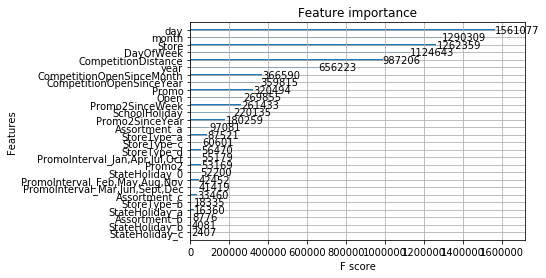

In [81]:
from matplotlib import pyplot
xgb.plot_importance(model)
pyplot.show()